In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [10]:
df = pd.read_csv("D:/Documents/Materials/Jan29/CH22_Demand_XY_Train.csv")
df['DateTime'] = pd.to_datetime(df['DateTime'])
print(df.head())
print(df.shape)
print(df.describe())

             DateTime        X1     X2      X3      X4             Y
0 2022-01-01 00:00:00  2.186333  13.76  0.0663  0.1547  521163.83540
1 2022-01-01 00:10:00  2.138000  13.90  0.0910  0.1105  449066.62018
2 2022-01-01 00:20:00  2.104333  13.90  0.0806  0.1300  437394.72159
3 2022-01-01 00:30:00  2.040333  14.00  0.1183  0.1248  422107.63292
4 2022-01-01 00:40:00  1.973667  14.14  0.0624  0.1105  406923.83540
(41932, 6)
                 X1            X2            X3            X4              Y
count  41932.000000  41932.000000  41932.000000  41932.000000   41932.000000
mean       6.520033     12.528736    261.430021    106.260820  504322.861242
std        1.982503      3.212579    363.704356    169.071949  121948.222159
min        1.082333      1.268000      0.005200      0.024700  178443.835400
25%        4.960000     10.464000      0.085800      0.163800  401060.773570
50%        6.640000     12.870000     18.219500     15.860000  506391.834490
75%        7.983333     15.260000   

In [3]:
cols = list(df)[1:6]
print(cols)

['X1', 'X2', 'X3', 'X4', 'Y']


In [4]:
df_for_training = df[cols].astype(float)
df_for_training = df_for_training.values
print(df_for_training[:5])

[[2.18633333e+00 1.37600000e+01 6.63000000e-02 1.54700000e-01
  5.21163835e+05]
 [2.13800000e+00 1.39000000e+01 9.10000000e-02 1.10500000e-01
  4.49066620e+05]
 [2.10433333e+00 1.39000000e+01 8.06000000e-02 1.30000000e-01
  4.37394722e+05]
 [2.04033333e+00 1.40000000e+01 1.18300000e-01 1.24800000e-01
  4.22107633e+05]
 [1.97366667e+00 1.41400000e+01 6.24000000e-02 1.10500000e-01
  4.06923835e+05]]


In [5]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
print(df_for_training_scaled[:5])

[[-2.18599974  0.38326794 -0.71862444 -0.62758717  0.13810103]
 [-2.21037998  0.42684716 -0.71855652 -0.6278486  -0.45311772]
 [-2.22736208  0.42684716 -0.71858512 -0.62773326 -0.54883078]
 [-2.25964488  0.45797516 -0.71848146 -0.62776402 -0.67418948]
 [-2.2932728   0.50155438 -0.71863516 -0.6278486  -0.79870117]]


In [6]:
trainX = []
trainY = []
n_future = 1
n_past = 288
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 4])
trainX, trainY = np.array(trainX), np.array(trainY)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (41644, 288, 5).
trainY shape == (41644, 1).


In [7]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 288, 64)           17920     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(trainX, trainY, epochs=3, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/3
2343/2343 [==============================] - 628s 267ms/step - loss: 0.0956 - val_loss: 0.0050
Epoch 2/3
2343/2343 [==============================] - 714s 305ms/step - loss: 0.0261 - val_loss: 0.0040
Epoch 3/3
2343/2343 [==============================] - 515s 220ms/step - loss: 0.0233 - val_loss: 0.0038


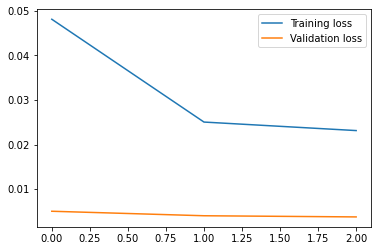

In [9]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [6]:
test_df = pd.read_csv("D:/Documents/Materials/Jan29/CH22_Demand_raw_X_Test.csv")
test_df['DateTime'] = pd.to_datetime(test_df['DateTime'])
test_df['Y'] = 0
print(test_df.head())
print(test_df.shape)

             DateTime        X1     X2      X3      X4  Y
0 2022-10-19 04:40:00  5.943333  17.72  0.1001  0.1690  0
1 2022-10-19 04:50:00  5.990000  17.68  0.1092  0.1872  0
2 2022-10-19 05:00:00  5.993333  17.66  0.1235  0.1014  0
3 2022-10-19 05:10:00  6.000000  17.68  0.0949  0.1690  0
4 2022-10-19 05:20:00  6.013333  17.68  0.1326  0.1300  0
(10484, 6)


In [11]:
test_cols = list(test_df)[1:6]
df_for_testing = test_df[test_cols].astype(float)
print(df_for_testing[:5])

         X1     X2      X3      X4    Y
0  5.943333  17.72  0.1001  0.1690  0.0
1  5.990000  17.68  0.1092  0.1872  0.0
2  5.993333  17.66  0.1235  0.1014  0.0
3  6.000000  17.68  0.0949  0.1690  0.0
4  6.013333  17.68  0.1326  0.1300  0.0


In [12]:
df_for_testing_scaled = scaler.transform(df_for_testing)
df_for_testing_scaled = pd.DataFrame(df_for_testing_scaled, columns = ['X1','X2','X3','X4','Y'])
df_for_testing_scaled['Y'] = 0
df_for_testing_scaled = df_for_testing_scaled.values
print(df_for_testing_scaled[:5])

[[-0.29089835  1.61593711 -0.7185315  -0.62750259  0.        ]
 [-0.2673588   1.60348591 -0.71850648 -0.62739494  0.        ]
 [-0.26567741  1.59726031 -0.71846716 -0.62790242  0.        ]
 [-0.26231462  1.60348591 -0.7185458  -0.62750259  0.        ]
 [-0.25558903  1.60348591 -0.71844214 -0.62773326  0.        ]]


In [17]:
df_for_predict_scaled = np.concatenate((df_for_training_scaled[-288:], df_for_testing_scaled), axis=0)

In [18]:
length_for_prediction = len(df_for_testing_scaled)
prediction = []

In [19]:
from tqdm import tqdm
for i in tqdm(range(n_past, len(df_for_predict_scaled) - n_future + 1)):
    testX = []
    testX.append(df_for_predict_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    testX = np.array(testX)
    df_for_predict_scaled[i,4] = model.predict(testX)[0,0]
    y_pred = scaler.inverse_transform(df_for_predict_scaled[i,:])[4]
    prediction.append(y_pred)
    print(y_pred)

  0%|                                                                                | 2/10484 [00:00<09:37, 18.16it/s]

382841.69752294396
389774.7003376734


  0%|                                                                                | 5/10484 [00:00<16:23, 10.65it/s]

396927.46181705024
404087.2592952158
410986.39773147757
417385.85668764485


  0%|                                                                                | 9/10484 [00:00<12:48, 13.62it/s]

423144.0802996571
428237.64188972895
432677.0082329182
436498.8566534892


  0%|                                                                               | 13/10484 [00:00<11:11, 15.60it/s]

439732.1452291013
442401.81977364194
444551.2846949281
446231.2166288638


  0%|▏                                                                              | 17/10484 [00:01<10:24, 16.76it/s]

447487.29505312245
448369.80409954325
448941.29001768935
449269.57605621533


  0%|▏                                                                              | 21/10484 [00:01<10:03, 17.33it/s]

450226.9080071106
452368.2030289768
455254.0055755666
458464.1800229265


  0%|▏                                                                              | 25/10484 [00:01<09:53, 17.61it/s]

461964.1787447725
465776.42535294686
470027.3497678331
474295.6679276588


  0%|▏                                                                              | 29/10484 [00:01<09:36, 18.13it/s]

478586.2170815913
483057.95774152124
487911.1832779263
493598.5662662868


  0%|▏                                                                              | 33/10484 [00:02<09:41, 17.98it/s]

500359.5741633116
508055.9378721947
517170.62955591705
527949.160052637


  0%|▎                                                                              | 37/10484 [00:02<09:39, 18.03it/s]

540533.7016940258
553083.6593661616
564491.1067577109
574926.4851244558


  0%|▎                                                                              | 41/10484 [00:02<09:33, 18.20it/s]

583817.2909451195
590527.3587197154
595324.5506665932
597846.970769542


  0%|▎                                                                              | 45/10484 [00:02<09:54, 17.56it/s]

598342.3545107066
598087.3140918026
596947.0025608375
594924.3418925151


  0%|▎                                                                              | 49/10484 [00:02<09:54, 17.55it/s]

592391.5204318529
589241.4499865426
585131.1983015714
580650.8661637817


  1%|▍                                                                              | 53/10484 [00:03<09:50, 17.67it/s]

575419.7464362337
569375.6490304603
563336.9848985448
557220.6740134676


  1%|▍                                                                              | 57/10484 [00:03<09:45, 17.81it/s]

552184.5161428524
548524.2667337179
547136.902968424
548897.7743285084


  1%|▍                                                                              | 61/10484 [00:03<09:45, 17.79it/s]

553077.3611296426
559430.7044925091
568660.2667610532
581378.8303690392


  1%|▍                                                                              | 65/10484 [00:03<09:44, 17.83it/s]

596237.1589598985
611513.5043796216
628376.024141983
643485.7297804763


  1%|▌                                                                              | 69/10484 [00:04<09:50, 17.65it/s]

654067.7992727943
661137.3062789002
664209.9734689407
663583.7550395557

  1%|▌                                                                              | 73/10484 [00:04<09:55, 17.49it/s]


660679.7046882561
656002.9169975098
650400.6047222934


  1%|▌                                                                              | 77/10484 [00:04<09:44, 17.82it/s]

646040.7277207918
642829.9572487412
639626.8769489203
635931.800072641


  1%|▌                                                                              | 81/10484 [00:04<09:45, 17.76it/s]

633079.3858116256
630647.0817344855
627714.538495529
624450.6200656857


  1%|▋                                                                              | 85/10484 [00:04<09:46, 17.74it/s]

621846.0357785347
620397.1288296208
619135.4027079873
617607.6460536394


  1%|▋                                                                              | 89/10484 [00:05<09:53, 17.53it/s]

615531.4885350224
612615.7212105333
608615.3997380423
603743.1014115321


  1%|▋                                                                              | 93/10484 [00:05<09:52, 17.53it/s]

598266.259602319
592330.6386902677
586085.8336041706
579626.6486128308


  1%|▋                                                                              | 97/10484 [00:05<09:44, 17.78it/s]

572983.8589423551
566181.5599811577
559444.100510864
552880.7383990289


  1%|▊                                                                             | 101/10484 [00:05<09:38, 17.94it/s]

546522.2561403528
540386.2728061829
534496.8292704795
528822.5324766637


  1%|▊                                                                             | 105/10484 [00:06<09:35, 18.05it/s]

523502.81585940934
518498.59891563
513553.84179477574
508741.1786460159


  1%|▊                                                                             | 109/10484 [00:06<09:41, 17.83it/s]

504011.1585000742
499321.9369710759
494829.21733231953
490642.8707389607


  1%|▊                                                                             | 113/10484 [00:06<09:53, 17.49it/s]

486707.06076207873
482992.8965585068
479483.3977845772
476228.1362499379


  1%|▊                                                                             | 117/10484 [00:06<09:44, 17.74it/s]

473226.9411426347
470406.70131203084
467767.9073882071
465334.50211910775


  1%|▉                                                                             | 121/10484 [00:06<09:41, 17.83it/s]

463123.7774893594
461136.3295236526
459358.7622036325
457789.8762113237


  1%|▉                                                                             | 125/10484 [00:07<09:39, 17.86it/s]

456408.59625903214
455263.8545201521
454331.3048397839
453586.73553201306


  1%|▉                                                                             | 129/10484 [00:07<09:35, 18.00it/s]

452952.21273422305
452414.44218837196
452007.70621707034
451695.39291339787


  1%|▉                                                                             | 133/10484 [00:07<09:33, 18.04it/s]

451446.2146153855
451240.47343386227
451052.00243118405
450847.7694828722


  1%|█                                                                             | 137/10484 [00:07<09:37, 17.93it/s]

450620.4442120895
450368.86364382954
450057.455280084
449601.3510197606


  1%|█                                                                             | 141/10484 [00:08<09:29, 18.18it/s]

448983.4551302652
448227.5940620416
447367.3850613686
446428.16644619807
445438.4674471559


  1%|█                                                                             | 145/10484 [00:08<09:29, 18.15it/s]

444411.6840825971
443365.1374115232
442332.898967325


  1%|█                                                                             | 149/10484 [00:08<09:23, 18.33it/s]

441320.63825315866
440347.9768379603
439407.3408470007
438516.9962564743


  1%|█▏                                                                            | 153/10484 [00:08<09:33, 18.01it/s]

437691.41483661684
436947.0962953318
436273.7555724062
435678.74121616187


  1%|█▏                                                                            | 157/10484 [00:08<09:27, 18.21it/s]

435154.86458734033
434687.7193330499
434266.1699676042
433885.67361988453


  2%|█▏                                                                            | 161/10484 [00:09<09:26, 18.23it/s]

433553.80416462006
433256.6422447029
432997.29881827516
432772.1250512543


  2%|█▏                                                                            | 165/10484 [00:09<09:25, 18.24it/s]

432652.95645606704
432699.89703476295
433024.54150780017
434241.17327356036


  2%|█▎                                                                            | 169/10484 [00:09<09:34, 17.96it/s]

436844.3692592975
440452.52102244203
444815.3672445069
450759.3470394167


  2%|█▎                                                                            | 173/10484 [00:09<09:25, 18.23it/s]

458638.84069740365
467952.98395758535
478203.58740159427
488741.9108621871


  2%|█▎                                                                            | 177/10484 [00:10<09:27, 18.15it/s]

498899.46267707046
509207.52299212804
519503.0740572731
529092.9968515902


  2%|█▎                                                                            | 181/10484 [00:10<09:33, 17.98it/s]

537685.0307588122
545382.973115409
552049.0913376537
557827.2636053226


  2%|█▍                                                                            | 185/10484 [00:10<09:25, 18.22it/s]

562734.6547026508
566669.6896657199
569720.870892517
571905.6648139196


  2%|█▍                                                                            | 189/10484 [00:10<09:29, 18.09it/s]

573291.7202323312
573786.8423041194
573657.8901816908
572919.8298996589


  2%|█▍                                                                            | 193/10484 [00:10<09:25, 18.19it/s]

571785.849313885
570396.5593712367
568735.0024424022
567191.5165510926


  2%|█▍                                                                            | 197/10484 [00:11<09:27, 18.14it/s]

565557.79106788
564045.2039687718
562559.5579125463
561050.8377053343


  2%|█▍                                                                            | 201/10484 [00:11<09:30, 18.03it/s]

559419.7725274488
557642.1688644598
555781.554226092
553937.6791592224


  2%|█▌                                                                            | 203/10484 [00:11<09:38, 17.76it/s]

552061.1353975637
549835.4338303109


  2%|█▌                                                                            | 207/10484 [00:11<12:37, 13.57it/s]

547966.0932450981
546269.7524606815
543672.9637403702
540966.7826835193


  2%|█▌                                                                            | 211/10484 [00:12<11:00, 15.56it/s]

539137.2921637602
537891.2225931505
538103.1166393169
539376.8759179697


  2%|█▌                                                                            | 215/10484 [00:12<10:08, 16.86it/s]

540679.6659602199
543945.4051728075
550362.686720948
556863.2845254063
562694.4121331325


  2%|█▋                                                                            | 219/10484 [00:12<09:42, 17.63it/s]

568328.5935578211
574084.1132529434
580357.2077060713
587586.0640938358


  2%|█▋                                                                            | 223/10484 [00:12<09:33, 17.90it/s]

595992.7306879279
605684.2448004996
616649.9797474298
628846.4911436355


  2%|█▋                                                                            | 227/10484 [00:13<09:24, 18.17it/s]

641776.461802004
654892.7265192106
666107.919605014
673803.0344786266


  2%|█▋                                                                            | 231/10484 [00:13<09:27, 18.08it/s]

677375.3448057926
677211.8305198924
674661.1646614757
670660.7196228902


  2%|█▋                                                                            | 235/10484 [00:13<09:17, 18.39it/s]

664918.3124709651
657722.9134204162
649530.1033928137
640422.3518532995


  2%|█▊                                                                            | 239/10484 [00:13<09:26, 18.07it/s]

630601.1442217326
620439.868161106
610095.845115411
599685.4888827882


  2%|█▊                                                                            | 243/10484 [00:13<09:29, 17.97it/s]

589325.1260382533
579099.3920878969
569271.0685030096
560358.2570146467


  2%|█▊                                                                            | 247/10484 [00:14<09:22, 18.20it/s]

552778.8399826867
546579.7507172318
541486.2109329413
536963.9244717956


  2%|█▊                                                                            | 251/10484 [00:14<09:24, 18.13it/s]

532918.5667921817
529244.4125631269
526010.7932664973
523148.199339879


  2%|█▉                                                                            | 255/10484 [00:14<09:16, 18.37it/s]

520430.76649984106
517756.9434053948
514915.7336817067
511734.82622724236


  2%|█▉                                                                            | 259/10484 [00:14<09:13, 18.48it/s]

508133.9530522043
504136.4172682833
499600.76840602886
494765.7970343532


  3%|█▉                                                                            | 263/10484 [00:14<09:19, 18.27it/s]

489927.91186514194
485217.1516755954
480483.1928603937
475847.98879472015


  3%|█▉                                                                            | 267/10484 [00:15<09:26, 18.03it/s]

471459.3572361852
467285.02562836127
463354.66073680227
459731.2013151359


  3%|██                                                                            | 271/10484 [00:15<09:17, 18.32it/s]

456390.17764236825
453357.62218715803
450640.06941532256
448168.24599374615


  3%|██                                                                            | 275/10484 [00:15<09:22, 18.14it/s]

445899.79782641435
443839.1006067887
441967.921067347
440271.7801692595


  3%|██                                                                            | 279/10484 [00:15<09:27, 17.99it/s]

438753.908802466
437413.03496305307
436231.27064170357
435145.2627749437


  3%|██                                                                            | 283/10484 [00:16<09:17, 18.28it/s]

434145.9910378801
433266.63656116417
432509.11098496267
431817.6278519372


  3%|██▏                                                                           | 287/10484 [00:16<09:23, 18.10it/s]

431186.20510939864
430608.18472543533
430071.3627310738
429560.4968851364


  3%|██▏                                                                           | 291/10484 [00:16<09:17, 18.27it/s]

429075.46362152876
428623.93857529305
428192.3149388544
427787.43245896924


  3%|██▏                                                                           | 295/10484 [00:16<09:21, 18.13it/s]

427411.5153253373
427049.0814331858
426730.94235159067
426443.454930008


  3%|██▏                                                                           | 299/10484 [00:17<09:27, 17.95it/s]

426196.6062163053
425969.0992306779
425745.4445997591
425499.5698776243


  3%|██▎                                                                           | 303/10484 [00:17<09:15, 18.33it/s]

425210.19989025005
424883.10590110556
424536.41578310326
424195.86035825976


  3%|██▎                                                                           | 307/10484 [00:17<09:22, 18.08it/s]

423882.4531312219
423657.2939013886
423661.3497767234
424040.13073630864


  3%|██▎                                                                           | 311/10484 [00:17<09:22, 18.08it/s]

425170.9712895653
427642.3440583268
431727.4391401907
437805.7861599027


  3%|██▎                                                                           | 315/10484 [00:17<09:10, 18.47it/s]

445116.44693647686
453187.0682681722
461959.3233241208
471380.1877126244


  3%|██▎                                                                           | 319/10484 [00:18<09:13, 18.35it/s]

481077.4040370243
491168.3773499396
501607.5744541469
510516.1728838343


  3%|██▍                                                                           | 325/10484 [00:18<09:12, 18.39it/s]

518023.6244772535
524506.8085481395
529665.5621559141
534640.707450256
539198.9661820685


  3%|██▍                                                                           | 329/10484 [00:18<09:16, 18.24it/s]

543359.429312941
546974.1845935439
550069.289932614
552772.6834837465


  3%|██▍                                                                           | 333/10484 [00:18<09:22, 18.04it/s]

554945.0699155495
556550.0117673536
557672.3226257977
558317.3412730205


  3%|██▌                                                                           | 337/10484 [00:19<09:23, 18.02it/s]

558681.5341648692
558431.7998194318
557564.8491980185
556261.8011206889


  3%|██▌                                                                           | 341/10484 [00:19<09:32, 17.71it/s]

554735.807100335
553012.4598556915
551107.4813551262
549205.410292077


  3%|██▌                                                                           | 345/10484 [00:19<09:29, 17.81it/s]

547325.3703368052
545549.2094896836
543643.7548962251
540272.0941006325


  3%|██▌                                                                           | 349/10484 [00:19<09:17, 18.19it/s]

536553.619620943
535881.4382387269
537922.7610216053
542324.0835448976


  3%|██▋                                                                           | 353/10484 [00:19<09:21, 18.04it/s]

547139.0435692952
552628.8670870173
560006.9077280249
567406.4343322758


  3%|██▋                                                                           | 357/10484 [00:20<09:19, 18.10it/s]

573852.2741854171
580602.3410316396
588305.9310856112
596276.9036307423


  3%|██▋                                                                           | 361/10484 [00:20<09:10, 18.39it/s]

603961.2319111705
611096.0399638859
618834.4465821118
627162.0090699872


  3%|██▋                                                                           | 365/10484 [00:20<09:17, 18.13it/s]

635432.9128692695
642421.2006083659
647255.7603959183
651240.8977759818


  4%|██▋                                                                           | 369/10484 [00:20<09:11, 18.36it/s]

653404.0458250777
653822.3097861303
652679.9049001537
650809.8847014216


  4%|██▊                                                                           | 373/10484 [00:21<09:15, 18.20it/s]

648558.4523121521
645992.6677786523
642241.4628211264
637288.5848638603


  4%|██▊                                                                           | 377/10484 [00:21<09:23, 17.94it/s]

631341.8430033103
624674.15113051
617516.2289495424
610022.8320907903


  4%|██▊                                                                           | 381/10484 [00:21<09:12, 18.30it/s]

602239.7090835683
594288.819663079
586316.4806223153
578424.9610759028


  4%|██▊                                                                           | 385/10484 [00:21<09:23, 17.92it/s]

570839.0568239853
563658.8891117233
556943.4171376444
550629.3641585098


  4%|██▉                                                                           | 389/10484 [00:21<09:14, 18.20it/s]

544636.2123266106
538881.2959247727
533226.8169519255
527580.2898206845


  4%|██▉                                                                           | 393/10484 [00:22<09:17, 18.10it/s]

522039.3826258061
516413.7263530588
510672.35225002613
504693.79757160565


  4%|██▉                                                                           | 397/10484 [00:22<09:20, 18.01it/s]

498457.27504813223
492350.93576516066
486453.9864977949
480871.110442373


  4%|██▉                                                                           | 401/10484 [00:22<09:18, 18.04it/s]

475675.7740020533
470915.1939620958
466564.0392731422
462613.2023871736


  4%|██▉                                                                           | 403/10484 [00:22<09:11, 18.29it/s]

459026.52931867854
455819.6002984459
452957.8022828476


  4%|███                                                                           | 407/10484 [00:23<12:20, 13.61it/s]

450411.72654140927
448153.78149210406
446148.6017918465
444396.81253970275


  4%|███                                                                           | 411/10484 [00:23<10:43, 15.66it/s]

442878.6031832979
441553.98191959946
440380.9326422042
439335.5634833243


  4%|███                                                                           | 415/10484 [00:23<09:59, 16.80it/s]

438411.1001135475
437583.1491321146
436853.86204278725
436171.5591437186


  4%|███                                                                           | 419/10484 [00:23<09:34, 17.51it/s]

435564.3916986573
435032.03262088285
434594.2524855041
434288.4627447582


  4%|███▏                                                                          | 423/10484 [00:24<09:27, 17.72it/s]

434111.4434115962
434042.71158871776
434062.365866326
434165.9360592399


  4%|███▏                                                                          | 427/10484 [00:24<09:26, 17.76it/s]

434348.3486889941
434601.4265875748
434876.7100401841
435134.9413717619


  4%|███▏                                                                          | 431/10484 [00:24<09:20, 17.93it/s]

435353.64609030966
435492.96322748286
435542.6949461941
435493.71189264324


  4%|███▏                                                                          | 435/10484 [00:24<09:05, 18.43it/s]

435371.04710384295
435216.0225354895
435036.5754920016
434841.3774057708


  4%|███▎                                                                          | 439/10484 [00:24<09:19, 17.95it/s]

434629.94854960684
434412.80657872395
434192.8371248568
433973.34012958594


  4%|███▎                                                                          | 443/10484 [00:25<09:05, 18.41it/s]

433764.99315718893
433554.90899087617
433342.54248611326
433130.68478291575


  4%|███▎                                                                          | 447/10484 [00:25<09:07, 18.32it/s]

432928.95949946146
432743.57401484717
432547.87439564476
432328.86439615785


  4%|███▎                                                                          | 451/10484 [00:25<09:09, 18.26it/s]

432100.194435524
432018.5826644497
432174.755670622
432683.95700858143


  4%|███▍                                                                          | 455/10484 [00:25<09:14, 18.09it/s]

434106.22456125496
437133.48484588915
441671.81309352943
447227.21023012814


  4%|███▍                                                                          | 459/10484 [00:26<09:07, 18.31it/s]

454424.7317100638
462952.2532131026
472673.69212630775
483130.16395223123


  4%|███▍                                                                          | 463/10484 [00:26<09:16, 18.00it/s]

493377.93173608783
503459.52492871706
513338.09085102944
523043.57156656863


  4%|███▍                                                                          | 467/10484 [00:26<09:04, 18.41it/s]

531790.7790483168
539513.4055494245
546160.4001014077
551931.2892380989


  4%|███▌                                                                          | 471/10484 [00:26<09:18, 17.94it/s]

557048.3974377536
561394.9074952754
564940.2440708866
567731.6166812534


  5%|███▌                                                                          | 475/10484 [00:26<09:17, 17.94it/s]

569662.9402000107
570714.7129900195
571191.6708459265
571104.9928649806


  5%|███▌                                                                          | 479/10484 [00:27<09:17, 17.93it/s]

570464.9713759883
568147.598303856
564607.1898348343
560154.5146964156


  5%|███▌                                                                          | 483/10484 [00:27<09:21, 17.81it/s]

554221.7648789114
547536.0905050747
540448.7863470739
533306.066430018

  5%|███▌                                                                          | 487/10484 [00:27<09:19, 17.86it/s]


527088.3659301638
522069.29288925196
517736.28424469515


  5%|███▋                                                                          | 491/10484 [00:27<09:37, 17.32it/s]

515207.5659052274
513600.5416013024
512218.9463737551
511736.77784467494


  5%|███▋                                                                          | 495/10484 [00:28<09:14, 18.01it/s]

511687.559016113
512089.6826103677
512884.4987984347
514754.04290427367


  5%|███▋                                                                          | 499/10484 [00:28<09:18, 17.88it/s]

518081.2553402661
523462.60236426606
531297.1252324742
541114.5750010516


  5%|███▋                                                                          | 503/10484 [00:28<09:19, 17.85it/s]

552760.8683845409
565041.375650584
577206.2795666938
588450.2635524996


  5%|███▊                                                                          | 507/10484 [00:28<09:07, 18.24it/s]

598697.9777304769
608780.3313997315
618062.7181736446
626544.1059118981


  5%|███▊                                                                          | 511/10484 [00:28<09:20, 17.79it/s]

632973.0172101025
638329.0404533381
642200.9912909037
644981.3737874599


  5%|███▊                                                                          | 515/10484 [00:29<09:10, 18.10it/s]

646900.1081017728
647810.2232674081
647386.6968444516
645829.5605340044


  5%|███▊                                                                          | 519/10484 [00:29<09:15, 17.95it/s]

643279.5343118411
639411.7411099235
634273.0197466342
628117.3785005591


  5%|███▉                                                                          | 523/10484 [00:29<09:12, 18.03it/s]

621200.1776087291
613745.2970284704
605855.5800933179
597671.7685848275


  5%|███▉                                                                          | 527/10484 [00:29<09:08, 18.15it/s]

589304.3015170449
580937.466816922
572637.9102209194
564517.6080506693


  5%|███▉                                                                          | 531/10484 [00:30<09:02, 18.34it/s]

556855.2599978622
549812.3342392463
543504.226969832
538000.8947705511


  5%|███▉                                                                          | 535/10484 [00:30<09:11, 18.03it/s]

533258.885987727
529428.0099736688
526599.6547580984
524667.0737726155


  5%|████                                                                          | 539/10484 [00:30<09:04, 18.28it/s]

523475.3551120706
522925.36424291006
522897.81808959437
523321.63525630254


  5%|████                                                                          | 543/10484 [00:30<09:08, 18.11it/s]

524140.1697744805
525300.989642824
526759.9272511682
528415.280435203


  5%|████                                                                          | 547/10484 [00:30<09:16, 17.87it/s]

530148.8400541215
531874.1825277603
533543.5531949191
535031.1290627959


  5%|████                                                                          | 551/10484 [00:31<09:17, 17.82it/s]

536304.0924304287
537373.3425542057
538275.4840724533
539057.1014027719


  5%|████▏                                                                         | 555/10484 [00:31<09:04, 18.22it/s]

539803.0190346907
540471.6024629808
540994.5123688282
541312.3752438592


  5%|████▏                                                                         | 559/10484 [00:31<09:14, 17.89it/s]

541218.6976070936
540660.8621080852
539665.0865646345
538305.5360734782


  5%|████▏                                                                         | 563/10484 [00:31<09:13, 17.93it/s]

536607.8687706948
534565.7537110933
532315.3898051111
529650.9559166931


  5%|████▏                                                                         | 567/10484 [00:32<09:13, 17.92it/s]

526567.2513669825
523067.55792607565
519075.8406514836
514419.8938362818


  5%|████▏                                                                         | 571/10484 [00:32<09:05, 18.17it/s]

509023.59440628154
503054.2971906269
496750.3139396141
490490.9989231637


  5%|████▎                                                                         | 575/10484 [00:32<09:16, 17.82it/s]

484347.6316062773
478533.6869542709
473162.64679626515
468244.78528958233


  6%|████▎                                                                         | 579/10484 [00:32<08:57, 18.42it/s]

463747.6554315439
459709.6862775175
456141.07203029376
453050.44051070133


  6%|████▎                                                                         | 583/10484 [00:32<09:10, 17.97it/s]

450406.9292695079
448124.43817897374
446077.24600660993
444235.7623070974


  6%|████▎                                                                         | 587/10484 [00:33<09:12, 17.91it/s]

442570.85819082253
441075.00339461886
439898.2834773597
439044.7833887548


  6%|████▍                                                                         | 591/10484 [00:33<09:15, 17.80it/s]

438498.38865637186
438208.5898219639
438104.22008373315
438123.72172087175


  6%|████▍                                                                         | 595/10484 [00:33<09:04, 18.17it/s]

438243.5662952815
438381.1898501016
438416.0791002937
438387.4263035735


  6%|████▍                                                                         | 599/10484 [00:33<09:06, 18.10it/s]

438432.4334363212
438637.73486792017
439087.420959927
439836.56584748864


  6%|████▍                                                                         | 603/10484 [00:34<09:11, 17.93it/s]

440976.77561814064
442572.3046409867
444590.53510139417
447062.69287828496
450153.5824329569

  6%|████▌                                                                         | 605/10484 [00:34<09:09, 17.99it/s]


454078.2269412032


  6%|████▌                                                                         | 609/10484 [00:34<12:10, 13.52it/s]

458835.750537472
464365.1261083025
470343.2428539471
476804.65930358047


  6%|████▌                                                                         | 613/10484 [00:34<10:35, 15.53it/s]

484027.7262563912
492060.6699236018
501335.2765764369
511241.3014289395


  6%|████▌                                                                         | 617/10484 [00:34<09:48, 16.78it/s]

521767.2864515738
532761.7359782713
543504.3069243636
553823.0825095291


  6%|████▌                                                                         | 621/10484 [00:35<09:29, 17.33it/s]

562154.5300607854
568819.5289195863
574987.7157585429
582139.5977380711


  6%|████▋                                                                         | 625/10484 [00:35<09:08, 17.99it/s]

589452.0356858269
596200.7651107919
603500.4830194153
607592.8103521003


  6%|████▋                                                                         | 629/10484 [00:35<09:01, 18.19it/s]

609011.5235624104
609674.5428821542
610602.6914289825
611221.168805981


  6%|████▋                                                                         | 633/10484 [00:35<08:57, 18.33it/s]

611134.9632836315
610734.5437203334
610393.1233328287
609995.044256731


  6%|████▋                                                                         | 637/10484 [00:36<09:14, 17.74it/s]

609351.9263467845
609489.1792033212
611255.6582835147
614463.8629419574


  6%|████▊                                                                         | 641/10484 [00:36<09:09, 17.92it/s]

618728.0271004322
623435.6627032233
628006.9104121386
629655.4274837138
629138.9793577457


  6%|████▊                                                                         | 645/10484 [00:36<09:15, 17.70it/s]

627200.7797492632
623586.3624582717
619123.9692099557
614264.6089803918


  6%|████▊                                                                         | 649/10484 [00:36<09:11, 17.84it/s]

610810.0934841868
609362.2986301228
610732.5884686039
615023.1012795673


  6%|████▊                                                                         | 653/10484 [00:37<09:19, 17.58it/s]

621968.802327648
630757.5643600937
639923.7263193044
647021.0865768138


  6%|████▉                                                                         | 657/10484 [00:37<09:07, 17.95it/s]

651071.7866728634
652083.6912259341
650907.8217341483
648489.9094727123
645126.8764979484

  6%|████▉                                                                         | 661/10484 [00:37<09:05, 18.01it/s]


640472.5778363885
634631.8120732969
627859.2125863255


  6%|████▉                                                                         | 665/10484 [00:37<09:05, 18.00it/s]

620431.5238154351
612565.6842108828
604381.3639008271
596014.9580477378


  6%|████▉                                                                         | 669/10484 [00:37<09:09, 17.87it/s]

587603.813999871
579271.526926032
571122.6555478902
563326.2782598921
556177.8197880391

  6%|█████                                                                         | 673/10484 [00:38<09:05, 17.99it/s]


549716.9194085648
543925.1875791806
538626.7061586838


  6%|█████                                                                         | 677/10484 [00:38<09:03, 18.06it/s]

533613.9749658537
528769.1919011357
523996.2734232196
519416.44150503835


  6%|█████                                                                         | 681/10484 [00:38<09:01, 18.09it/s]

515104.50814817566
511002.3155165692
507116.24270984385
503368.1705162415


  7%|█████                                                                         | 685/10484 [00:38<08:59, 18.18it/s]

499657.66241534596
496002.9407717888
492519.5180780809
489152.19118153554


  7%|█████▏                                                                        | 689/10484 [00:39<09:10, 17.78it/s]

485828.6439339617
482538.918361867
479291.1798218003
476147.2513382426


  7%|█████▏                                                                        | 693/10484 [00:39<09:06, 17.92it/s]

472960.3363910108
469834.9500902114
466833.7731543927
464049.12035898474


  7%|█████▏                                                                        | 697/10484 [00:39<09:14, 17.64it/s]

461552.9289767273
459337.1199656227
457370.0204282311
455608.39676868945


  7%|█████▏                                                                        | 701/10484 [00:39<09:08, 17.85it/s]

454045.46738899156
452637.3081768645
451362.4259004711
450235.0124891864


  7%|█████▏                                                                        | 705/10484 [00:39<08:59, 18.11it/s]

449279.27236033126
448485.30205486657
447798.98689202586
447171.3365496643


  7%|█████▎                                                                        | 709/10484 [00:40<09:11, 17.72it/s]

446587.0361006664
446029.4041222841
445379.8680440208
444617.4943157614


  7%|█████▎                                                                        | 713/10484 [00:40<09:01, 18.06it/s]

443901.01448869205
443317.15378961846
442850.597291425
442461.82928397227


  7%|█████▎                                                                        | 717/10484 [00:40<09:15, 17.60it/s]

442083.535320171
441651.62820857455
441143.1319242127
440551.07588564086


  7%|█████▎                                                                        | 721/10484 [00:40<09:05, 17.89it/s]

439865.17503264616
439123.9020321591
438368.2081415927
437578.81705021573


  7%|█████▍                                                                        | 725/10484 [00:41<09:14, 17.61it/s]

436714.0579098301
435804.44427716633
434870.60442140047
433929.0598562171


  7%|█████▍                                                                        | 729/10484 [00:41<09:14, 17.60it/s]

432907.35723871755
431847.5599211645
430770.6305280484
429654.53795159166


  7%|█████▍                                                                        | 733/10484 [00:41<09:00, 18.03it/s]

428523.50841489644
427422.3527986782
426379.14968074777
425468.9909035497


  7%|█████▍                                                                        | 737/10484 [00:41<09:18, 17.45it/s]

424744.5810406555
424210.18675661983
423877.71400807076
423777.4074137686


  7%|█████▌                                                                        | 741/10484 [00:41<09:14, 17.56it/s]

423921.0857072158
424584.63563430624
426224.4449305211
428946.99122629024


  7%|█████▌                                                                        | 745/10484 [00:42<09:07, 17.78it/s]

432669.746907722
437095.1866252095
441937.8654320253
447733.0970893194


  7%|█████▌                                                                        | 749/10484 [00:42<09:14, 17.55it/s]

455837.1394152612
466635.9583743975
478004.28982846584
489073.765780264


  7%|█████▌                                                                        | 753/10484 [00:42<09:16, 17.50it/s]

499837.2103105727
510945.4751131312
523441.4980021968
538272.0096846217


  7%|█████▋                                                                        | 757/10484 [00:42<08:59, 18.02it/s]

554746.9353174275
572550.1128765298
592174.4584155016


  7%|█████▋                                                                        | 761/10484 [00:43<09:14, 17.53it/s]

613133.7829643227
631845.6583132712
645393.7647247302
652524.6331996114


  7%|█████▋                                                                        | 765/10484 [00:43<09:06, 17.79it/s]

653078.0784679707
650051.9884269368
645891.736085284
641169.0981049105


  7%|█████▋                                                                        | 769/10484 [00:43<08:57, 18.08it/s]

636364.8774278376
631025.5719503191
625557.7940775622
618952.7138716691


  7%|█████▊                                                                        | 773/10484 [00:43<08:57, 18.05it/s]

611405.4203899641
603538.8393888451
595406.0316029794
586650.9958457194


  7%|█████▊                                                                        | 777/10484 [00:43<09:10, 17.63it/s]

576979.6520809149
568686.0411946326
559198.062245369
550137.8364063507


  7%|█████▊                                                                        | 781/10484 [00:44<08:56, 18.08it/s]

542307.6819630105
534385.1509611929
527290.9198333102
521157.58953587356


  7%|█████▊                                                                        | 785/10484 [00:44<09:11, 17.58it/s]

517120.4271957579
515201.6910642966
515105.2132017733
517634.4339827868


  8%|█████▊                                                                        | 789/10484 [00:44<09:11, 17.59it/s]

520341.3210018096
523748.0872882596
530294.7134628933
539734.1127655614


  8%|█████▉                                                                        | 793/10484 [00:44<09:00, 17.93it/s]

553170.5154276554
569889.3132850068
588810.902101985
608716.0261504712


  8%|█████▉                                                                        | 797/10484 [00:45<09:15, 17.43it/s]

628846.7673501995
645937.397391473
659018.7437841124
667155.0477635912


  8%|█████▉                                                                        | 801/10484 [00:45<09:10, 17.60it/s]

669555.6026230565
668562.7853972784
666106.1315309417
663134.8466870844


  8%|█████▉                                                                        | 805/10484 [00:45<09:09, 17.62it/s]

659945.0097651491
656483.85077422
652806.0876883485
647948.268400668


  8%|██████                                                                        | 809/10484 [00:45<09:10, 17.59it/s]

641679.9639508477
634255.4878984126
625995.2180518452
617230.9657176594
608245.6609091318


  8%|██████                                                                        | 813/10484 [00:46<12:05, 13.32it/s]

599141.5800094815
590032.3674826154
581007.3834205881
572196.3576853636


  8%|██████                                                                        | 817/10484 [00:46<10:31, 15.32it/s]

563768.3795742791
556009.8789285207
548976.573153786
542724.5903313212


  8%|██████                                                                        | 821/10484 [00:46<09:52, 16.31it/s]

537205.3871574998
532179.4053181906
527626.0565214832
523487.17929701856


  8%|██████▏                                                                       | 825/10484 [00:46<09:21, 17.21it/s]

519667.1552934889
516007.30565701285
512408.276887649
508928.7460716285


  8%|██████▏                                                                       | 829/10484 [00:47<09:15, 17.37it/s]

505603.9236401316
502316.4713207448
498982.4663838555
495535.95542656176


  8%|██████▏                                                                       | 833/10484 [00:47<09:10, 17.53it/s]

492126.9940247872
488726.683158197
485348.4878967871
482010.49159333296


  8%|██████▏                                                                       | 837/10484 [00:47<08:53, 18.07it/s]

478729.8045176161
475587.6641081308
472579.1204525059
469653.40242311824


  8%|██████▎                                                                       | 841/10484 [00:47<09:12, 17.47it/s]

466841.59779560764
464217.235664754
461778.61881390726
459491.5485092854


  8%|██████▎                                                                       | 845/10484 [00:47<09:04, 17.69it/s]

457326.40886549104
455270.70516979916
453326.38177104853
451530.3958343646


  8%|██████▎                                                                       | 849/10484 [00:48<08:50, 18.15it/s]

449869.94009748916
448358.65407666937
446977.33051281504
445723.77429060155


  8%|██████▎                                                                       | 853/10484 [00:48<08:45, 18.33it/s]

444569.7251173734
443507.3692548062
442539.79948955774
441670.01048226946


  8%|██████▍                                                                       | 857/10484 [00:48<08:40, 18.48it/s]

440880.430407454
440175.5221816984
439547.5520212101
438998.61328100064


  8%|██████▍                                                                       | 861/10484 [00:48<08:46, 18.29it/s]

438525.93662683596
438136.47083437943
437824.5972806313
437579.90007069043


  8%|██████▍                                                                       | 865/10484 [00:49<08:45, 18.32it/s]

437388.9177688578
437247.8489005812
437158.64871759014
437108.32824278186


  8%|██████▍                                                                       | 869/10484 [00:49<08:49, 18.14it/s]

437097.2363686583
437145.31811657926
437262.3570137861
437430.0652783031


  8%|██████▍                                                                       | 873/10484 [00:49<08:47, 18.21it/s]

437618.64167559124
437820.2579301386
438027.8198944063
438223.79572017264


  8%|██████▌                                                                       | 877/10484 [00:49<08:41, 18.43it/s]

438403.2863752233
438556.4283777851
438693.29599885107
438820.438241426


  8%|██████▌                                                                       | 881/10484 [00:49<08:48, 18.18it/s]

438945.3490257074
439061.1667991575
439173.6264822766
439289.7422680721


  8%|██████▌                                                                       | 885/10484 [00:50<08:41, 18.40it/s]

439451.8609839645
439742.03778524953
440493.19607329095
441557.91422883986


  8%|██████▌                                                                       | 889/10484 [00:50<08:49, 18.12it/s]

444071.4121329113
448106.23762012355
452326.9610278122
457330.5083523886


  9%|██████▋                                                                       | 893/10484 [00:50<08:46, 18.21it/s]

463725.55890642223
471868.3283000773
481958.60110226605
492213.08870108146


  9%|██████▋                                                                       | 897/10484 [00:50<08:42, 18.35it/s]

501484.2945605971
510317.7675305936
518275.64933830895
527051.0762268726


  9%|██████▋                                                                       | 901/10484 [00:51<08:39, 18.45it/s]

535004.7731417133
540544.2702293964
543177.1075406092
544561.1604614317


  9%|██████▋                                                                       | 905/10484 [00:51<08:45, 18.24it/s]

545721.1008299267
546717.1816543165
547101.8211004965
547089.4172451939


  9%|██████▊                                                                       | 909/10484 [00:51<08:38, 18.46it/s]

549160.2069072969
554788.5698226567
562991.6794476595
569959.81864477


  9%|██████▊                                                                       | 913/10484 [00:51<08:48, 18.12it/s]

575655.6559162824
578820.9904085518
579685.4660737795
579030.8347112695


  9%|██████▊                                                                       | 917/10484 [00:51<08:54, 17.90it/s]

577979.149144386
579451.0829984267
582925.2309664586
587946.361019413


  9%|██████▊                                                                       | 921/10484 [00:52<08:53, 17.94it/s]

591855.3089993697
595499.6220166195
598248.9094689422
601993.9506589342


  9%|██████▉                                                                       | 925/10484 [00:52<08:51, 17.98it/s]

606827.3765458552
611943.6452229271
617674.4008190068
623776.8868386955


  9%|██████▉                                                                       | 929/10484 [00:52<08:43, 18.27it/s]

629801.0901032657
635859.5647875558
641104.7274383061
645596.4276567834


  9%|██████▉                                                                       | 933/10484 [00:52<08:36, 18.49it/s]

646844.7941030308
646748.2381031243
645280.3310500432
642330.7938388058


  9%|██████▉                                                                       | 938/10484 [00:53<08:42, 18.27it/s]

638457.0985387305
635752.4402522786
633379.5351235905
630808.8951694388


  9%|███████                                                                       | 942/10484 [00:53<08:38, 18.39it/s]

627727.1567743485
625640.4961377049
624489.2526416797
624317.793782767


  9%|███████                                                                       | 946/10484 [00:53<08:50, 17.98it/s]

625035.5092707806
626344.9464420517
628283.4367942859
630622.9645402902


  9%|███████                                                                       | 950/10484 [00:53<08:44, 18.17it/s]

632653.6061245941
634010.1583208122
634980.5737405294
635106.0587437202


  9%|███████                                                                       | 954/10484 [00:53<08:50, 17.96it/s]

633894.9511092404
631101.4415322993
627170.3679528458
622320.3696720834


  9%|███████▏                                                                      | 958/10484 [00:54<08:37, 18.42it/s]

616721.1320120402
610407.3043593131
603542.342851052
596190.9161662065


  9%|███████▏                                                                      | 962/10484 [00:54<08:37, 18.38it/s]

588623.8884523616
581024.1011863052
573598.7747083966
566715.9106536306


  9%|███████▏                                                                      | 966/10484 [00:54<08:49, 17.97it/s]

560591.1463939756
555301.031124931
550874.3775522804
547334.4088331831


  9%|███████▏                                                                      | 970/10484 [00:54<08:42, 18.22it/s]

544992.9985213872
543662.1226327324
543249.077522021
543588.2846227166


  9%|███████▏                                                                      | 974/10484 [00:55<08:49, 17.95it/s]

544433.3313367437
545536.0678721112
546858.4940204851
548269.6806019257


  9%|███████▎                                                                      | 978/10484 [00:55<08:42, 18.19it/s]

549729.1379147258
551116.8324010371
552439.0950060507
553719.1743270039


  9%|███████▎                                                                      | 982/10484 [00:55<08:47, 18.00it/s]

554947.6175576729
556104.7340774805
557183.378858731
558228.4391023748


  9%|███████▎                                                                      | 986/10484 [00:55<08:53, 17.81it/s]

559148.2142291571
559994.3839409247
560600.3629709013
560955.3792630901


  9%|███████▎                                                                      | 990/10484 [00:55<08:38, 18.29it/s]

561139.9361280124
561254.28201122
561288.1754640628
561465.5146153516


  9%|███████▍                                                                      | 994/10484 [00:56<08:49, 17.93it/s]

561681.5372227908
561831.586438695
561864.5204371575
561816.3332946266
561483.3117672465


 10%|███████▍                                                                      | 998/10484 [00:56<08:41, 18.19it/s]

560862.2903824213
560061.1241691046
559560.0091417365
559270.0176895933


 10%|███████▎                                                                     | 1002/10484 [00:56<08:45, 18.04it/s]

559001.3195829578
558697.2088873773
558501.6982516135
558731.0114827978


 10%|███████▍                                                                     | 1006/10484 [00:56<08:37, 18.32it/s]

559116.0507016362
559336.7542834763
559437.0572434815
559368.4562552914


 10%|███████▍                                                                     | 1010/10484 [00:57<08:37, 18.30it/s]

559794.1014733377
560880.2728834578
561886.8204829053
562716.7085445833


 10%|███████▍                                                                     | 1014/10484 [00:57<11:56, 13.21it/s]

563293.8239886197
563633.9432978359
563620.750800107
563322.6439629971


 10%|███████▍                                                                     | 1018/10484 [00:57<10:19, 15.29it/s]

562699.4092913631
561920.4486320748
561147.5536143043
560186.4274574507


 10%|███████▌                                                                     | 1022/10484 [00:57<09:30, 16.59it/s]

559033.4540361034
557850.8283863898
556789.2866063272
555856.7114858807


 10%|███████▌                                                                     | 1026/10484 [00:58<09:00, 17.51it/s]

555420.9483852787
555541.7960256315
556075.0564090358
556744.2140562353


 10%|███████▌                                                                     | 1030/10484 [00:58<09:03, 17.38it/s]

557501.4161800131
558824.8926401896
560401.8467716053
562452.4079371907


 10%|███████▌                                                                     | 1034/10484 [00:58<08:44, 18.01it/s]

564332.1498801172
566352.6263360057
568686.0775376016
571000.0052962776


 10%|███████▌                                                                     | 1038/10484 [00:58<08:45, 17.97it/s]

572909.2540956945
576270.5062649798
581906.3412947557
590697.9162729981


 10%|███████▋                                                                     | 1042/10484 [00:59<08:38, 18.22it/s]

602437.1022851237
615314.7172624228
628141.8300500688
638812.4455519367


 10%|███████▋                                                                     | 1046/10484 [00:59<08:36, 18.26it/s]

645191.828652056
647279.6740694874
647260.1506265674
646189.806579425


 10%|███████▋                                                                     | 1050/10484 [00:59<08:35, 18.29it/s]

644267.9467697825
641192.2558447254
637570.7226004135
634104.6645772699


 10%|███████▋                                                                     | 1054/10484 [00:59<08:39, 18.14it/s]

631741.0487114454
629790.797774459
625847.1131847799
620116.3067085436


 10%|███████▊                                                                     | 1058/10484 [00:59<08:28, 18.53it/s]

614258.8449855163
607453.0861736748
600466.1940045862
593327.846146695


 10%|███████▊                                                                     | 1062/10484 [01:00<08:39, 18.13it/s]

586870.5509897405
579639.7320816527
573469.2192926834
569397.2222168291


 10%|███████▊                                                                     | 1066/10484 [01:00<08:32, 18.38it/s]

567566.5832592512
568170.2181677305
571917.4617416408
579297.1559877356


 10%|███████▊                                                                     | 1070/10484 [01:00<08:40, 18.09it/s]

589283.804082557
600601.8332333016
611893.9135042159
621877.9812482418


 10%|███████▉                                                                     | 1074/10484 [01:00<08:37, 18.18it/s]

627371.5480917657
628157.3557664042
626828.9766397164
625649.7054460369


 10%|███████▉                                                                     | 1078/10484 [01:01<08:31, 18.40it/s]

623867.9841246657
621787.7561935263
619444.8848943786
617164.1091919789


 10%|███████▉                                                                     | 1082/10484 [01:01<08:39, 18.10it/s]

614377.2213039804
610923.5126216862
606756.5513679653
602744.2948644711


 10%|███████▉                                                                     | 1086/10484 [01:01<08:37, 18.17it/s]

598462.5770519935
593754.2145898234
588751.7139427528
583721.977874751


 10%|████████                                                                     | 1090/10484 [01:01<08:28, 18.48it/s]

578512.0024865383
573419.1822930329
568643.8978878382
564432.7181437957


 10%|████████                                                                     | 1094/10484 [01:01<08:28, 18.48it/s]

560788.088942716
557647.7220701154
555017.9920827479
552690.6864772014


 10%|████████                                                                     | 1098/10484 [01:02<08:32, 18.30it/s]

550539.3171843422
548387.0901974158
546076.2552253975
543627.1934052745


 11%|████████                                                                     | 1102/10484 [01:02<08:31, 18.34it/s]

541248.8259283532
539324.287641899
537667.7714828579
536250.6282888063


 11%|████████                                                                     | 1106/10484 [01:02<08:36, 18.17it/s]

535855.5620448345
536600.6365198737
538109.2804068509
539613.4032284906


 11%|████████▏                                                                    | 1110/10484 [01:02<08:30, 18.36it/s]

540759.5768803473
541343.2849389514
541729.112800216
542307.6528886353


 11%|████████▏                                                                    | 1114/10484 [01:02<08:32, 18.29it/s]

542934.3692166948
543152.3398072697
542715.7662584601
541554.3903426916


 11%|████████▏                                                                    | 1118/10484 [01:03<08:29, 18.40it/s]

539860.2773822716
537797.7557456046
535556.6338566263
533363.2157486919


 11%|████████▏                                                                    | 1122/10484 [01:03<08:24, 18.54it/s]

531162.7034932185
528794.2213038516
526185.2722261297
523205.8974373841


 11%|████████▎                                                                    | 1126/10484 [01:03<08:33, 18.23it/s]

519838.03811634367
516062.0508882908
511676.36856168613
506540.1412346411


 11%|████████▎                                                                    | 1130/10484 [01:03<08:27, 18.42it/s]

500649.2812317229
494550.54308070726
488517.03147321474
482455.32226468803


 11%|████████▎                                                                    | 1134/10484 [01:04<08:34, 18.18it/s]

476542.5065656529
470854.9082452014
465460.5758783956
460419.929651115


 11%|████████▎                                                                    | 1139/10484 [01:04<08:36, 18.11it/s]

455702.79399624036
451315.110989195
447255.30334512657
443480.8243502851


 11%|████████▍                                                                    | 1143/10484 [01:04<08:28, 18.38it/s]

439948.0370018523
436718.12832235254
433836.3344052379
431197.3842066477


 11%|████████▍                                                                    | 1147/10484 [01:04<08:39, 17.98it/s]

428795.5573432691
426673.7021754943
424799.1536428309
423117.1283538837


 11%|████████▍                                                                    | 1151/10484 [01:05<08:32, 18.20it/s]

421611.18474949955
420331.15630870283
419290.2718721914
418472.07534362463


 11%|████████▍                                                                    | 1155/10484 [01:05<08:31, 18.24it/s]

417873.01964923297
417396.6360122354
417022.5723700199
416728.586825589


 11%|████████▌                                                                    | 1159/10484 [01:05<08:37, 18.03it/s]

416451.58798484533
416122.8076819416
415764.21160731127
415544.82364094723


 11%|████████▌                                                                    | 1163/10484 [01:05<08:30, 18.25it/s]

415580.243498486
415766.6974663874
416103.9384124627
416498.65939822944


 11%|████████▌                                                                    | 1167/10484 [01:05<08:22, 18.53it/s]

416889.9568763211
417285.68092803087
417823.2152445838
418408.43153639924


 11%|████████▌                                                                    | 1171/10484 [01:06<08:35, 18.06it/s]

418819.23792022327
419131.4967094423
419337.5613433892
419576.09478579613


 11%|████████▋                                                                    | 1175/10484 [01:06<08:29, 18.28it/s]

420012.83551226294
420806.8712350717
422089.1020597868
423826.92834325996


 11%|████████▋                                                                    | 1179/10484 [01:06<08:26, 18.38it/s]

426235.4059699564
430368.1321469263
437076.7098597953
445493.1999583947


 11%|████████▋                                                                    | 1183/10484 [01:06<08:33, 18.13it/s]

455274.7501422433
466446.91315280984
477559.32105382875
487958.01119341847


 11%|████████▋                                                                    | 1187/10484 [01:07<08:28, 18.27it/s]

500144.3420154471
514044.89617976424
529995.9851610144
546982.6488710123


 11%|████████▋                                                                    | 1191/10484 [01:07<08:36, 17.98it/s]

563134.2710863352
576178.1369750963
585430.9114979089
590621.5306208589


 11%|████████▊                                                                    | 1195/10484 [01:07<08:30, 18.21it/s]

595563.8036997854
599959.783806642
603882.3822057364
606332.0436848471


 11%|████████▊                                                                    | 1199/10484 [01:07<08:26, 18.32it/s]

607475.8586780189
608772.4013639066
609669.0550938428
609031.4322408013


 11%|████████▊                                                                    | 1203/10484 [01:07<08:36, 17.97it/s]

606039.5845451121
602129.0011315526
597605.0792368042
592465.3039274153


 12%|████████▊                                                                    | 1207/10484 [01:08<08:27, 18.29it/s]

586728.7043819284
580416.3595223344
573059.4741235527
566078.9565112179


 12%|████████▉                                                                    | 1211/10484 [01:08<08:21, 18.50it/s]

558762.2555332042
553582.8373132846
549720.2157158486
545014.5208275995


 12%|████████▉                                                                    | 1213/10484 [01:08<08:32, 18.09it/s]

540463.1636255905
537968.3968877159


 12%|████████▉                                                                    | 1217/10484 [01:08<11:07, 13.89it/s]

536026.0287406949
533446.4266104001
531241.5931759184
529075.9519991525


 12%|████████▉                                                                    | 1221/10484 [01:09<09:42, 15.90it/s]

526594.4976908044
526932.645393955
530724.7089343229
539240.764230658


 12%|████████▉                                                                    | 1225/10484 [01:09<09:00, 17.12it/s]

554396.4873364357
576666.4483745033
604173.2858664003
632417.9583139219


 12%|█████████                                                                    | 1229/10484 [01:09<08:51, 17.41it/s]

652236.1863236486
662204.0160291477
665497.6920819671
664919.7952640983


 12%|█████████                                                                    | 1233/10484 [01:09<08:36, 17.91it/s]

663381.9643387573
661362.0075873248
659000.7758202634
656820.721022012


 12%|█████████                                                                    | 1237/10484 [01:09<08:38, 17.82it/s]

654683.9434311863
652127.8552018022
648451.4731487507
643482.4298388956


 12%|█████████                                                                    | 1241/10484 [01:10<08:28, 18.18it/s]

637585.4633086196
630828.5930586098
623361.3122573452
615427.6930157009


 12%|█████████▏                                                                   | 1245/10484 [01:10<08:36, 17.88it/s]

607115.9905994753
598548.8916032499
589910.4513589755
581262.6346287121


 12%|█████████▏                                                                   | 1249/10484 [01:10<08:28, 18.14it/s]

572873.1582589332
565086.40822341
557979.8604633501
551449.0725545848


 12%|█████████▏                                                                   | 1253/10484 [01:10<08:24, 18.31it/s]

545462.6441719413
539982.3279748966
534828.5751596496
529969.6728514945


 12%|█████████▏                                                                   | 1257/10484 [01:11<08:28, 18.15it/s]

525120.6503794485
520149.51553173026
514828.25070399855
508756.6198649485


 12%|█████████▎                                                                   | 1261/10484 [01:11<08:23, 18.32it/s]

501966.7383876671
494918.0032054645
487831.2759920958
480962.89097615954


 12%|█████████▎                                                                   | 1265/10484 [01:11<08:33, 17.94it/s]

474362.44449880766
468051.75324430095
462036.2577550912
456327.082613974
450930.9149272362


 12%|█████████▎                                                                   | 1269/10484 [01:11<08:26, 18.19it/s]

445806.2873673058
440938.39017433557
436322.76043173845
432016.4529664692


 12%|█████████▎                                                                   | 1273/10484 [01:11<08:18, 18.49it/s]

428100.6797769437
424614.6694638466
421561.52571672614
418948.3281459339


 12%|█████████▍                                                                   | 1277/10484 [01:12<08:24, 18.25it/s]

416764.8716457888
414982.59064269584
413568.6892414746
412493.4461621178


 12%|█████████▍                                                                   | 1281/10484 [01:12<08:22, 18.30it/s]

411730.4473347924
411231.2839248569
410960.8849672746
410895.6129950403


 12%|█████████▍                                                                   | 1285/10484 [01:12<08:18, 18.45it/s]

410971.119147331
411132.2566030618
411331.0163002497
411556.5098853974


 12%|█████████▍                                                                   | 1289/10484 [01:12<08:22, 18.28it/s]

411810.9688167982
412077.2246759202
412364.8865437538
412663.3786163345


 12%|█████████▍                                                                   | 1293/10484 [01:12<08:23, 18.25it/s]

412958.75973077316
413246.3997928254
413521.96672059246
413774.6157721395


 12%|█████████▌                                                                   | 1297/10484 [01:13<08:28, 18.07it/s]

414013.59259876766
414257.1922510462
414441.0149879957
414555.44446003187


 12%|█████████▌                                                                   | 1301/10484 [01:13<08:22, 18.27it/s]

414649.1802455479
414721.83710907283
414775.6610460879
414786.61481692945


 12%|█████████▌                                                                   | 1305/10484 [01:13<08:25, 18.15it/s]

414771.48160465865
414757.04617739166
414729.3528350517
414687.70379263494


 12%|█████████▌                                                                   | 1309/10484 [01:13<08:20, 18.34it/s]

414637.39785501425
414568.5206602601
414484.75011683017
414380.43125875585


 13%|█████████▋                                                                   | 1315/10484 [01:14<08:14, 18.56it/s]

414250.71593397926
414115.25115151476
414007.18896763865
413957.573546428
414069.92420064023


 13%|█████████▋                                                                   | 1319/10484 [01:14<08:14, 18.52it/s]

414484.9027572998
415486.3841468755
417721.7456752752
421250.7133776713


 13%|█████████▋                                                                   | 1323/10484 [01:14<08:25, 18.12it/s]

426264.1387212083
432606.59009628056
440068.404915015
448439.66255445906


 13%|█████████▋                                                                   | 1327/10484 [01:14<08:17, 18.41it/s]

457554.96616292116
467402.24260611593
477764.0373636276
488251.39344456483


 13%|█████████▊                                                                   | 1331/10484 [01:15<08:29, 17.96it/s]

498003.68572126015
507118.3015390349
515050.52884496836
521898.77894753206
527647.1499806619


 13%|█████████▊                                                                   | 1335/10484 [01:15<08:20, 18.26it/s]

532365.2668956982
536055.2993678872
538494.2469397514
539453.0943924518


 13%|█████████▊                                                                   | 1339/10484 [01:15<08:25, 18.09it/s]

539505.4028276617
539178.9884520366
538101.0923359464
536428.5889048642


 13%|█████████▊                                                                   | 1343/10484 [01:15<08:20, 18.26it/s]

534431.8480419968
531774.3193176793
528881.4662351132
526314.5114580131


 13%|█████████▉                                                                   | 1347/10484 [01:15<08:15, 18.43it/s]

523506.33749310055
521521.1827687346
519752.56308767
518530.7488145375


 13%|█████████▉                                                                   | 1351/10484 [01:16<08:12, 18.53it/s]

517665.3255063943
517164.115987307
516909.5707413549
516826.73784652393


 13%|█████████▉                                                                   | 1355/10484 [01:16<08:23, 18.14it/s]

516887.4778505302
517125.7314520762
517464.1262874156
517854.7287062261


 13%|█████████▉                                                                   | 1359/10484 [01:16<08:24, 18.07it/s]

518307.1459723495
518713.5966513449
519213.67045265256
519673.1282604358


 13%|██████████                                                                   | 1363/10484 [01:16<08:20, 18.22it/s]

520255.79691012786
520848.11098377925
521565.7519687065
522298.14274758217


 13%|██████████                                                                   | 1367/10484 [01:17<08:15, 18.42it/s]

523115.937686342
524117.3572928706
525369.6851227336
526808.3869659662


 13%|██████████                                                                   | 1371/10484 [01:17<08:14, 18.42it/s]

529060.6588778184
534217.5917028486
543430.7233151305
556599.9688124724


 13%|██████████                                                                   | 1375/10484 [01:17<08:21, 18.17it/s]

573116.4308244912
590271.5550984634
606335.9832626813
620225.3283468001


 13%|██████████▏                                                                  | 1379/10484 [01:17<08:15, 18.39it/s]

630403.4384706442
637077.9846273884
640822.2117348758
642206.7044056226


 13%|██████████▏                                                                  | 1383/10484 [01:17<08:20, 18.17it/s]

641967.1170171162
640553.8552521485
637650.7788924166
633265.1129201481


 13%|██████████▏                                                                  | 1387/10484 [01:18<08:18, 18.25it/s]

627581.8866588612
620853.1604040063
613366.9739902939
605331.0129480863


 13%|██████████▏                                                                  | 1391/10484 [01:18<08:18, 18.25it/s]

596801.9432345703
587965.5428384248
579066.0946597449
570293.432562544


 13%|██████████▏                                                                  | 1395/10484 [01:18<08:22, 18.09it/s]

561767.5792017801
553791.2424344319
546406.9689742494
539646.5116732041


 13%|██████████▎                                                                  | 1399/10484 [01:18<08:16, 18.29it/s]

533303.3879532064
527283.6984853798
521412.3210395415
515411.3700065056


 13%|██████████▎                                                                  | 1403/10484 [01:19<08:08, 18.59it/s]

509207.0101019788
502981.6221556174
496933.72963531135
491027.4393163512


 13%|██████████▎                                                                  | 1407/10484 [01:19<08:17, 18.26it/s]

485120.5302583447
479374.67052436934
473898.54467164446
468722.4627362745


 13%|██████████▎                                                                  | 1411/10484 [01:19<08:17, 18.23it/s]

463869.8041501851
459293.9045412442
454979.045575381
450893.4962064052


 13%|██████████▍                                                                  | 1413/10484 [01:19<08:16, 18.26it/s]

447026.3571779287
443365.7188990264


 14%|██████████▍                                                                  | 1417/10484 [01:19<10:53, 13.87it/s]

439921.23042795475
436709.4060098045
433719.1574047491
430976.7242363704


 14%|██████████▍                                                                  | 1421/10484 [01:20<09:39, 15.64it/s]

428513.48502406
426355.27961874136
424486.095308295
422885.4273896394


 14%|██████████▍                                                                  | 1426/10484 [01:20<08:54, 16.94it/s]

421544.80795100913
420451.4878788965
419627.9271281127
419067.5112783088


 14%|██████████▌                                                                  | 1430/10484 [01:20<08:25, 17.91it/s]

418727.13756831
418592.1234386605
418573.2614377754
418614.6197364406


 14%|██████████▌                                                                  | 1434/10484 [01:20<08:26, 17.86it/s]

418677.3477008484
418750.82591547165
418823.13388649473
418878.17894726654


 14%|██████████▌                                                                  | 1438/10484 [01:21<08:14, 18.30it/s]

418917.1095356058
418961.8622675709
419013.89813051367
419036.2199820428
419029.43111544295


 14%|██████████▌                                                                  | 1442/10484 [01:21<08:11, 18.38it/s]

418992.3685557076
418901.23492676846
418760.54402536893
418637.3849721909


 14%|██████████▌                                                                  | 1446/10484 [01:21<08:18, 18.14it/s]

418534.35265521746
418426.71931837493
418295.768332654
418134.48550504737


 14%|██████████▋                                                                  | 1450/10484 [01:21<08:12, 18.34it/s]

417965.8759349004
417795.23842708603
417625.5312992768
417471.06641264516


 14%|██████████▋                                                                  | 1454/10484 [01:22<08:16, 18.17it/s]

417339.42491051427
417241.16079106706
417172.0582699054
417116.1191720974


 14%|██████████▋                                                                  | 1458/10484 [01:22<08:11, 18.36it/s]

417109.03956174594
417129.0136574809
417173.6718977267
417309.3111264422


 14%|██████████▋                                                                  | 1462/10484 [01:22<08:19, 18.08it/s]

417729.3122814106
418648.06980506226
420472.70490416954
423356.42499863857


 14%|██████████▊                                                                  | 1466/10484 [01:22<08:19, 18.04it/s]

426997.77242962207
431984.3693934801
437426.18384921923
443872.1218283767


 14%|██████████▊                                                                  | 1470/10484 [01:22<08:25, 17.83it/s]

452102.45233712316
461331.9891655891
471262.09123502113
482272.1609697735


 14%|██████████▊                                                                  | 1474/10484 [01:23<08:28, 17.71it/s]

492968.81530032
502635.0428836704
510974.07384968514
518361.18342430715


 14%|██████████▊                                                                  | 1478/10484 [01:23<08:26, 17.80it/s]

525904.3701505208
533223.5315475324
540097.0227506062
546759.1977607197


 14%|██████████▉                                                                  | 1482/10484 [01:23<08:23, 17.90it/s]

552805.3231041606
558674.3564285015
564774.7563617724
571043.1225946399


 14%|██████████▉                                                                  | 1486/10484 [01:23<08:24, 17.82it/s]

577144.1985071333
583475.9577807405
589339.706837396
593946.0037055667


 14%|██████████▉                                                                  | 1490/10484 [01:24<08:14, 18.19it/s]

596890.5473928705
597252.290768612
595545.057996401
592616.1490543395


 14%|██████████▉                                                                  | 1494/10484 [01:24<08:16, 18.10it/s]

589063.340364312
585088.5389246178
580960.9153004886
576618.9190397103


 14%|███████████                                                                  | 1498/10484 [01:24<08:13, 18.22it/s]

571798.583890205
566443.9416797897
560863.7731755546
555779.1374186567


 14%|███████████                                                                  | 1502/10484 [01:24<08:11, 18.27it/s]

550264.0882461864
545187.298936285
540538.1973192849
536938.2808729043


 14%|███████████                                                                  | 1506/10484 [01:24<08:17, 18.04it/s]

533720.8051230825
530857.6115374764
528103.0761604374
525949.1810312362


 14%|███████████                                                                  | 1510/10484 [01:25<08:10, 18.28it/s]

524530.2861060813
523777.5269102576
523654.8748414964
524127.82770222507


 14%|███████████                                                                  | 1514/10484 [01:25<08:13, 18.17it/s]

525252.4245334162
527354.3928285815
530803.3405819433
535737.5019102002


 14%|███████████▏                                                                 | 1518/10484 [01:25<08:13, 18.18it/s]

542718.1503572232
552093.1898961777
563977.7659555881
578176.9639243813


 15%|███████████▏                                                                 | 1522/10484 [01:25<08:03, 18.52it/s]

594172.2677616561
611263.0431748054
628255.8016006962
641898.443342988


 15%|███████████▏                                                                 | 1526/10484 [01:26<08:14, 18.13it/s]

650882.0763749441
654845.39343645
655124.6091982997
653161.0712718652


 15%|███████████▏                                                                 | 1530/10484 [01:26<08:07, 18.35it/s]

649895.8154207645
645809.0776367041
640261.8758396036
633452.4681936795


 15%|███████████▎                                                                 | 1534/10484 [01:26<08:15, 18.05it/s]

625691.7687982996
617249.951284639
608536.1357227621
599388.4432603718


 15%|███████████▎                                                                 | 1538/10484 [01:26<08:09, 18.27it/s]

589754.532753586
579874.6821073212
569921.9274653426
559815.3621101736


 15%|███████████▎                                                                 | 1542/10484 [01:26<08:04, 18.47it/s]

549604.7068576346
539170.2915795669
528569.7344189439
517614.3136066018


 15%|███████████▎                                                                 | 1546/10484 [01:27<08:14, 18.07it/s]

506349.58323697094
495921.47982403566
486628.51633758383
478273.72206307406


 15%|███████████▍                                                                 | 1550/10484 [01:27<08:08, 18.30it/s]

470645.7762646751
463901.87318598665
457982.3085976175
452720.3627638061


 15%|███████████▍                                                                 | 1554/10484 [01:27<08:12, 18.15it/s]

448110.2135409267
444085.68765111495
440611.23076784704
437565.8716846757


 15%|███████████▍                                                                 | 1558/10484 [01:27<08:08, 18.26it/s]

435025.1129195948
432980.6973500588
431528.38143065735
430610.6778531053


 15%|███████████▍                                                                 | 1562/10484 [01:27<08:06, 18.35it/s]

430102.69037030876
429975.7661855475
430212.10451262986
430744.2528011844


 15%|███████████▌                                                                 | 1566/10484 [01:28<08:14, 18.02it/s]

431462.0627809173
432294.97821190883
433176.6295642624
434060.57779225364


 15%|███████████▌                                                                 | 1570/10484 [01:28<08:20, 17.82it/s]

434912.82041413285
435733.3574299
436495.643935034
437145.66700908117


 15%|███████████▌                                                                 | 1574/10484 [01:28<08:10, 18.17it/s]

437631.06370237836
437903.75953559834
437930.81324168475
437640.5710230557


 15%|███████████▌                                                                 | 1578/10484 [01:28<08:13, 18.05it/s]

437111.5845727998
436399.25511278457
435507.5731010008
434440.9723796603


 15%|███████████▌                                                                 | 1582/10484 [01:29<08:12, 18.08it/s]

433240.3896689884
431981.6800137778
430743.63497071224
429557.30597246264


 15%|███████████▋                                                                 | 1586/10484 [01:29<08:06, 18.28it/s]

428434.18466581096
427392.8059649218
426434.76896042895
425592.7459814185


 15%|███████████▋                                                                 | 1590/10484 [01:29<08:10, 18.12it/s]

424846.51579996664
424186.22220289416
423619.5408252433
423131.1567398984


 15%|███████████▋                                                                 | 1594/10484 [01:29<08:06, 18.27it/s]

422703.6398589511
422341.4676361761
422051.261760516
421827.07652225054


 15%|███████████▋                                                                 | 1598/10484 [01:29<08:02, 18.41it/s]

421635.5054643209
421472.66715764324
421360.5781728074
421311.55877628754


 15%|███████████▊                                                                 | 1602/10484 [01:30<08:04, 18.32it/s]

421323.91538573056
421387.2829863919
421507.23658970854
421720.93324713496


 15%|███████████▊                                                                 | 1606/10484 [01:30<08:07, 18.19it/s]

422120.40789324034
422840.1585875152
424178.5611050395
426619.9799987923


 15%|███████████▊                                                                 | 1610/10484 [01:30<08:31, 17.35it/s]

430217.534152191
435135.6754997347
441810.0035986652
450042.467439689


 15%|███████████▊                                                                 | 1614/10484 [01:30<08:15, 17.89it/s]

459386.0739447985
469343.7530590698
479664.82915416977
490125.45407287


 15%|███████████▊                                                                 | 1616/10484 [01:30<08:19, 17.74it/s]

500493.7896562185


 15%|███████████▉                                                                 | 1620/10484 [01:31<10:57, 13.49it/s]

510374.43530492904
519493.06520362425
528008.2900631188
535539.2110373117


 15%|███████████▉                                                                 | 1623/10484 [01:31<10:00, 14.77it/s]

542363.6283294122
548494.5454537105
553574.7037568336
557688.4225610426


 16%|███████████▉                                                                 | 1627/10484 [01:31<09:01, 16.35it/s]

560759.1235964628
563184.5479495807
565143.0523748156
567574.7531586712


 16%|███████████▉                                                                 | 1631/10484 [01:31<08:32, 17.29it/s]

571231.7498720846
577596.4940243107
585067.7434777846
593646.5376414182


 16%|████████████                                                                 | 1635/10484 [01:32<08:14, 17.91it/s]

602294.7614129339
609161.663635737
613891.6065528697
616526.7116653449


 16%|████████████                                                                 | 1639/10484 [01:32<08:11, 18.01it/s]

618432.0863042717
620182.0874823432
619783.7031253063
617063.824403458


 16%|████████████                                                                 | 1643/10484 [01:32<08:09, 18.05it/s]

614442.5005448086
611230.3199655627
606730.8859632928
601210.27995087


 16%|████████████                                                                 | 1647/10484 [01:32<08:10, 18.02it/s]

594880.7157925875
588871.9292154459
583543.4975542373
579443.5890782293


 16%|████████████▏                                                                | 1651/10484 [01:33<08:11, 17.97it/s]

576688.8429119703
577225.4395799243
581951.7409315682
590262.0114348172


 16%|████████████▏                                                                | 1656/10484 [01:33<08:04, 18.23it/s]

600932.496101997
612872.4406746028
625367.9238705793
636332.3286648459


 16%|████████████▏                                                                | 1660/10484 [01:33<07:59, 18.41it/s]

644620.618940474
650023.873506157
652779.5718582025
653332.8862918735


 16%|████████████▏                                                                | 1664/10484 [01:33<07:59, 18.39it/s]

652419.8782259098
650793.7920347705
648994.4225676772
646953.6631008176


 16%|████████████▎                                                                | 1668/10484 [01:33<07:56, 18.49it/s]

644687.8970445943
641334.8947292606
636814.5998628134
631264.6505372602


 16%|████████████▎                                                                | 1672/10484 [01:34<07:59, 18.39it/s]

624925.2519715799
617982.8872080488
610500.8002812341
602674.9452111205


 16%|████████████▎                                                                | 1676/10484 [01:34<08:01, 18.31it/s]

594643.6288003448
586531.7472960004
578350.8722994012
570186.0972380469


 16%|████████████▎                                                                | 1680/10484 [01:34<08:02, 18.23it/s]

562171.4804215037
554432.4923157746
546974.2354737003
539832.9947154807


 16%|████████████▎                                                                | 1684/10484 [01:34<07:59, 18.34it/s]

532902.0670842783
526068.1824487663
519385.473661196
512505.8677535964


 16%|████████████▍                                                                | 1688/10484 [01:35<07:56, 18.47it/s]

505515.975926708
498543.83037155797
491994.652920504
485911.465925902


 16%|████████████▍                                                                | 1692/10484 [01:35<07:54, 18.53it/s]

480327.3687467234
475251.7278746408
470647.0300971039
466503.42646952724


 16%|████████████▍                                                                | 1696/10484 [01:35<07:53, 18.54it/s]

462888.6421145493
459816.1130277909
457223.91442445805
455056.895849169


 16%|████████████▍                                                                | 1700/10484 [01:35<07:56, 18.44it/s]

453263.3012798419
451820.32913775754
450699.6355414317
449852.2338030167


 16%|████████████▌                                                                | 1704/10484 [01:35<07:58, 18.35it/s]

449236.6565949404
448811.5020069748
448586.3427771416
448503.61891121743


 16%|████████████▌                                                                | 1708/10484 [01:36<07:58, 18.36it/s]

448522.93883351126
448549.60730412684
448570.0829328333
448574.14607676194


 16%|████████████▌                                                                | 1712/10484 [01:36<07:58, 18.34it/s]

448566.84114000294
448553.0380803957
448523.847407735
448467.36316539283


 16%|████████████▌                                                                | 1716/10484 [01:36<07:57, 18.36it/s]

448398.9148176723
448374.2742847241
448365.38479451893
448328.46760665945


 16%|████████████▋                                                                | 1720/10484 [01:36<07:55, 18.42it/s]

448215.25925838
447996.6344943639
447706.61760214233
447459.12925218616


 16%|████████████▋                                                                | 1724/10484 [01:37<08:00, 18.25it/s]

447289.4003185955
447146.1436035881
447032.7317346825
446712.6010583889


 16%|████████████▋                                                                | 1728/10484 [01:37<07:57, 18.33it/s]

446277.5829886503
445811.1282507699
445337.39038191194
444826.3646269112


 17%|████████████▋                                                                | 1732/10484 [01:37<07:58, 18.28it/s]

444317.01791707595
443830.2256537711
443335.05633612326
442743.7198883366


 17%|████████████▊                                                                | 1736/10484 [01:37<07:55, 18.39it/s]

442203.2054483298
441835.17473896
441572.4078048572
441272.39659617434


 17%|████████████▊                                                                | 1740/10484 [01:37<07:55, 18.40it/s]

440813.3267495846
440313.2983769881
439827.1094069678
439377.39424058585


 17%|████████████▊                                                                | 1744/10484 [01:38<07:55, 18.39it/s]

438966.3334559792
438569.57726395124
438240.40445698285
438000.0756719098


 17%|████████████▊                                                                | 1748/10484 [01:38<07:52, 18.48it/s]

437862.0523444312
437838.74923274043
437920.7244335042
438094.5891969614


 17%|████████████▊                                                                | 1752/10484 [01:38<07:55, 18.36it/s]

438363.1637375024
438942.79048069334
440055.8520535396
441620.9620113745


 17%|████████████▉                                                                | 1756/10484 [01:38<07:55, 18.35it/s]

443228.658660225
445005.7171786798
447541.80223795376
450817.0669427032


 17%|████████████▉                                                                | 1760/10484 [01:38<07:55, 18.34it/s]

454865.89174155495
458693.3733223132
462325.0825979312
466575.0148497651


 17%|████████████▉                                                                | 1764/10484 [01:39<07:52, 18.45it/s]

472025.3226573478
478812.6810240099
486976.15500707575
496707.2020926971


 17%|████████████▉                                                                | 1768/10484 [01:39<07:54, 18.39it/s]

508373.7521385049
521779.8992789479
535713.0212863154
549790.4303318601


 17%|█████████████                                                                | 1772/10484 [01:39<07:56, 18.28it/s]

565153.4101209664
580982.081445605
597163.0760484333
614552.9831704168


 17%|█████████████                                                                | 1776/10484 [01:39<07:52, 18.44it/s]

631048.7587645092
644219.0000592005
652609.3268544527
655782.9257378613


 17%|█████████████                                                                | 1780/10484 [01:40<07:55, 18.32it/s]

655794.3374301116
654323.4647907643
651767.7254538821
649102.2739623334


 17%|█████████████                                                                | 1784/10484 [01:40<07:51, 18.44it/s]

646563.6885067958
644026.2660262645
640850.9226803463
636198.5865391097


 17%|█████████████▏                                                               | 1788/10484 [01:40<07:57, 18.22it/s]

631767.1575003391
627542.883384584
624557.9699273704
624105.986959726


 17%|█████████████▏                                                               | 1792/10484 [01:40<07:55, 18.27it/s]

624752.4920343788
626032.2151942364
626696.5719352375
626410.6545299134


 17%|█████████████▏                                                               | 1796/10484 [01:40<07:54, 18.31it/s]

625115.7763520037
623235.2021550884
621189.0348544491
618517.8048308374


 17%|█████████████▏                                                               | 1800/10484 [01:41<07:50, 18.46it/s]

615002.1095807018
611011.3826520137
606838.8972670124
601936.3543217421


 17%|█████████████▏                                                               | 1804/10484 [01:41<07:51, 18.39it/s]

596916.3654380126
592684.771848311
589094.0647102625
585674.5692989378


 17%|█████████████▎                                                               | 1808/10484 [01:41<07:53, 18.31it/s]

582249.0409547673
578939.0977890457
575874.818556239
573406.6657745265


 17%|█████████████▎                                                               | 1812/10484 [01:41<07:52, 18.35it/s]

571350.7149466458
573820.0452405522
578806.8675308177
584173.2267144227


 17%|█████████████▎                                                               | 1816/10484 [01:42<07:50, 18.43it/s]

588324.6186402454
591407.9415887819
593395.6839325372
594358.6853865886
594598.8469940044


 17%|█████████████▎                                                               | 1820/10484 [01:42<10:16, 14.05it/s]

593578.9179133896
591175.6591370344
587699.4614255538
583287.286891733


 17%|█████████████▍                                                               | 1824/10484 [01:42<09:02, 15.95it/s]

578320.7512467353
573433.8139723322
569049.4418097582
565377.9805947026


 17%|█████████████▍                                                               | 1828/10484 [01:42<08:25, 17.12it/s]

562575.3162238831
560062.0545491098
557329.2631703935
553881.6928155549


 17%|█████████████▍                                                               | 1832/10484 [01:43<08:06, 17.79it/s]

549661.0929739606
544862.0475356663
539635.5251936906
534034.0815154321


 18%|█████████████▍                                                               | 1836/10484 [01:43<07:55, 18.19it/s]

528091.2901356069
521710.96211829496
514998.790994371
507591.1435537082


 18%|█████████████▌                                                               | 1840/10484 [01:43<07:54, 18.23it/s]

500093.4291502449
492688.62372975406
485519.19809053943
478586.11168698134


 18%|█████████████▌                                                               | 1844/10484 [01:43<07:49, 18.40it/s]

471951.30293248716
465677.58338029333
459701.4545950503
453983.4372095876


 18%|█████████████▌                                                               | 1848/10484 [01:43<07:48, 18.43it/s]

448791.77504342876
444038.51447741775
439675.50107769575
435611.063339383


 18%|█████████████▌                                                               | 1852/10484 [01:44<07:46, 18.50it/s]

431783.24740331044
428212.8414477174
424803.14410082164
421602.36794523225


 18%|█████████████▋                                                               | 1856/10484 [01:44<07:48, 18.42it/s]

418694.1672268785
416095.9429592937
413746.75525214244
411666.19296568865


 18%|█████████████▋                                                               | 1860/10484 [01:44<07:50, 18.34it/s]

409859.983751839
408284.4288247279
406914.5242217177
405825.51442572253


 18%|█████████████▋                                                               | 1864/10484 [01:44<07:52, 18.25it/s]

405002.20080712764
404463.03832556575
404153.7596598006
403901.66302138154


 18%|█████████████▋                                                               | 1868/10484 [01:45<07:48, 18.37it/s]

403621.82942905976
403367.2760059397
403161.82193387114
403057.7356707981


 18%|█████████████▋                                                               | 1872/10484 [01:45<07:50, 18.28it/s]

402997.74069765536
403249.6410840421
403407.73299897485
403506.60041170666


 18%|█████████████▊                                                               | 1876/10484 [01:45<07:49, 18.35it/s]

403596.4983797016
403733.62767014396
403970.74373676185
404134.4688118819


 18%|█████████████▊                                                               | 1880/10484 [01:45<07:52, 18.21it/s]

404268.632516058
404297.04544918315
404375.1028778941
404578.08562807407


 18%|█████████████▊                                                               | 1884/10484 [01:45<07:51, 18.25it/s]

404829.2373493004
405040.2737013997
405156.1132806312
405211.10019265267


 18%|█████████████▊                                                               | 1888/10484 [01:46<07:50, 18.27it/s]

405116.7901882272
404816.5027729803
404427.4367531822
404000.39233083127


 18%|█████████████▉                                                               | 1892/10484 [01:46<07:45, 18.46it/s]

403560.8095841926
403147.1103000401
402814.14328711334
402844.70045540656


 18%|█████████████▉                                                               | 1896/10484 [01:46<07:46, 18.40it/s]

403380.4321606996
404464.2812551038
406192.30220555427
409011.3100095107


 18%|█████████████▉                                                               | 1900/10484 [01:46<07:43, 18.51it/s]

413276.13561002037
418843.72581270186
425215.3896662161
432060.73323983804


 18%|█████████████▉                                                               | 1904/10484 [01:46<07:46, 18.40it/s]

439050.03858206497
446667.74656611076
456041.3832664637
466486.32346833934


 18%|██████████████                                                               | 1908/10484 [01:47<07:46, 18.40it/s]

475721.1372958968
485523.8972364247
498171.32856843306
508510.7296970519


 18%|██████████████                                                               | 1912/10484 [01:47<07:45, 18.40it/s]

515439.7874825019
518980.6784044363
519985.172626138
519238.4881575743


 18%|██████████████                                                               | 1916/10484 [01:47<07:48, 18.29it/s]

517188.199564256
514675.63204018964
512167.75639341475
509754.7131812439


 18%|██████████████                                                               | 1920/10484 [01:47<07:45, 18.39it/s]

507294.81843065115
505503.70154323225
503777.265146228
501309.1114559413


 18%|██████████████▏                                                              | 1924/10484 [01:48<07:42, 18.50it/s]

500473.6847257953
500406.79821716534
500054.5058304994
500586.62141038186


 18%|██████████████▏                                                              | 1928/10484 [01:48<07:42, 18.50it/s]

501014.79609906714
501232.18338499044
501615.2101119233
503038.976812066


 18%|██████████████▏                                                              | 1932/10484 [01:48<07:46, 18.34it/s]

504072.9933360201
504288.5180447847
504789.44454300136
505743.1126683393


 18%|██████████████▏                                                              | 1936/10484 [01:48<07:47, 18.30it/s]

506305.148051697
506633.1110920865
507891.5804294149
511942.9960276657


 19%|██████████████▏                                                              | 1940/10484 [01:48<07:48, 18.25it/s]

518995.2682893213
527761.7139216831
537545.6045927322
551242.3246728217


 19%|██████████████▎                                                              | 1944/10484 [01:49<07:45, 18.36it/s]

563320.5215336105
572898.8818123561
586016.3603847256
602946.9359907429


 19%|██████████████▎                                                              | 1948/10484 [01:49<07:40, 18.53it/s]

622761.0281706031
641537.7757191275
656998.4090658026
666091.0855417964


 19%|██████████████▎                                                              | 1952/10484 [01:49<07:42, 18.44it/s]

670437.602867912
671479.7302339615
669984.9584582327
667159.8450354926


 19%|██████████████▎                                                              | 1956/10484 [01:49<07:44, 18.35it/s]

664132.286738513
661054.3570865686
657082.5939190786
651797.599374359


 19%|██████████████▍                                                              | 1960/10484 [01:50<07:45, 18.31it/s]

645485.5525271106
638412.1059431704
630668.4368630406
622376.9556747387


 19%|██████████████▍                                                              | 1964/10484 [01:50<07:43, 18.36it/s]

613671.927842754
605017.7074813615
596418.9610277744
587898.9625193083


 19%|██████████████▍                                                              | 1968/10484 [01:50<07:44, 18.34it/s]

579644.5584279293
572068.9101618495
565849.1962615155
560972.7984481079


 19%|██████████████▍                                                              | 1972/10484 [01:50<07:43, 18.35it/s]

557809.9352777272
556306.1577142924
556105.2174389675
556729.5387653732


 19%|██████████████▌                                                              | 1976/10484 [01:50<07:41, 18.42it/s]

558052.6808702354
560172.0102016681
562932.5821458498
566503.6895207436

 19%|██████████████▌                                                              | 1980/10484 [01:51<07:56, 17.85it/s]


570454.7081215569
574416.8258650876
578198.5589165315


 19%|██████████████▌                                                              | 1984/10484 [01:51<08:01, 17.66it/s]

581596.2848894551
584623.1017898681
587169.0794052902
589101.8784485868


 19%|██████████████▌                                                              | 1988/10484 [01:51<08:03, 17.58it/s]

590388.0197767608
590885.845765439
590515.7943869955
589195.3889076953


 19%|██████████████▋                                                              | 1992/10484 [01:51<08:10, 17.33it/s]

587225.4618873193
584780.4668454218
582206.0762968746
579527.0906836889


 19%|██████████████▋                                                              | 1996/10484 [01:52<08:03, 17.55it/s]

576844.3108645449
574224.6878568423
571822.4684893991
569741.4628187241


 19%|██████████████▋                                                              | 2000/10484 [01:52<08:00, 17.65it/s]

568204.0898147919
567263.155811487
566880.7987037571
566684.2777334565
566595.5718148431


 19%|██████████████▋                                                              | 2004/10484 [01:52<07:52, 17.96it/s]

566558.4583749513
566692.7238394405
567105.0711651479
567656.6774792784


 19%|██████████████▋                                                              | 2008/10484 [01:52<07:51, 17.98it/s]

568276.6594551915
568678.9833900626
568508.6875061563
567847.7397356427


 19%|██████████████▊                                                              | 2012/10484 [01:52<07:49, 18.06it/s]

566881.009492977
565815.5499408615
564552.9661251608
563037.3625596298


 19%|██████████████▊                                                              | 2016/10484 [01:53<07:47, 18.12it/s]

561351.6738994124
559744.9439735359
558466.790829937
557806.9878629453
557251.4383366838

 19%|██████████████▊                                                              | 2018/10484 [01:53<07:44, 18.21it/s]

 19%|██████████████▊                                                              | 2022/10484 [01:53<10:47, 13.07it/s]

556691.3386707098
556224.7858068133
555841.4110959527
555299.1885364052


 19%|██████████████▉                                                              | 2026/10484 [01:53<09:19, 15.10it/s]

554648.958307435
553816.6352668373
552951.5090624653
552474.0714793683


 19%|██████████████▉                                                              | 2030/10484 [01:54<08:34, 16.42it/s]

552304.2734941366
552429.9511150628
552806.2389469781
553146.6017540862


 19%|██████████████▉                                                              | 2034/10484 [01:54<08:09, 17.27it/s]

553494.349452485
553556.7176215003
553409.7684608474
553125.3156771722


 19%|██████████████▉                                                              | 2038/10484 [01:54<07:51, 17.91it/s]

552757.815575149
552632.5377268812
552895.1919977803
553256.4992578943


 19%|██████████████▉                                                              | 2042/10484 [01:54<07:51, 17.89it/s]

553936.1454859327
555052.9612874716
556778.45640158
559229.8805146847


 20%|███████████████                                                              | 2046/10484 [01:54<07:44, 18.15it/s]

561984.7793214133
564905.9544796823
569047.6319299045
573976.3999615692


 20%|███████████████                                                              | 2050/10484 [01:55<07:36, 18.49it/s]

578530.5810122655
580983.8767882712
583132.8946910393
586764.8074872834


 20%|███████████████                                                              | 2054/10484 [01:55<07:50, 17.93it/s]

592711.7237940844
600178.9900581613
609315.8305100232
617554.003831469


 20%|███████████████                                                              | 2058/10484 [01:55<07:41, 18.24it/s]

616891.3188670396
612180.2161450107
609062.941594881
602065.3064441707


 20%|███████████████▏                                                             | 2062/10484 [01:55<07:45, 18.09it/s]

594092.1097093398
580732.06362501
565275.4643478882
553251.2331616934


 20%|███████████████▏                                                             | 2066/10484 [01:56<07:46, 18.05it/s]

538877.3381754542
527795.1167444452
519174.93884206825
513561.1022113978


 20%|███████████████▏                                                             | 2070/10484 [01:56<07:50, 17.89it/s]

510544.2587302389
507173.6546064685
504982.34575359453
503712.07131137693


 20%|███████████████▏                                                             | 2074/10484 [01:56<07:52, 17.79it/s]

502777.7435512529
501445.51479557896
499422.47797752783
497653.6384215011
497819.74214393896


 20%|███████████████▎                                                             | 2078/10484 [01:56<07:49, 17.91it/s]

497652.13745688344
498736.5353301188
502884.0276553731
508186.6244628165


 20%|███████████████▎                                                             | 2082/10484 [01:57<07:51, 17.82it/s]

517322.4750230616
530626.4411805789
549306.8689584949
568632.6751790263


 20%|███████████████▎                                                             | 2086/10484 [01:57<07:41, 18.21it/s]

583095.5486561462
592579.6897878888
602365.4484875418
608569.9128781044


 20%|███████████████▎                                                             | 2090/10484 [01:57<07:38, 18.32it/s]

611666.7408739027
614526.3655799578
620001.1721829098
628501.1166411092


 20%|███████████████▍                                                             | 2094/10484 [01:57<07:33, 18.51it/s]

639170.6563910963
649606.525387922
657215.5074251228
662359.389490003


 20%|███████████████▍                                                             | 2098/10484 [01:57<07:40, 18.21it/s]

665073.5841715074
665242.5644399377
663476.2816117766
660525.7994833463


 20%|███████████████▍                                                             | 2102/10484 [01:58<07:44, 18.03it/s]

656810.7775857071
651880.0688395005
645658.9375633775
638562.9583386884


 20%|███████████████▍                                                             | 2106/10484 [01:58<07:43, 18.08it/s]

630736.543586853
622324.7162911699
613501.0795457198
604402.1956906293


 20%|███████████████▍                                                             | 2110/10484 [01:58<07:32, 18.49it/s]

595132.5434930363
585805.8255655979
576596.1392667724
567707.6593961215


 20%|███████████████▌                                                             | 2114/10484 [01:58<07:40, 18.17it/s]

559409.2912152037
551861.7578699036
544913.563694153
538546.9006331663


 20%|███████████████▌                                                             | 2118/10484 [01:58<07:36, 18.35it/s]

532415.638250663
526354.7140502656
520003.86018077214
512983.11271895806


 20%|███████████████▌                                                             | 2122/10484 [01:59<07:41, 18.12it/s]

505321.4906169557
497563.6977505177
490060.7236108731
483006.99763045943


 20%|███████████████▌                                                             | 2126/10484 [01:59<07:46, 17.91it/s]

476480.49092343653
470379.48769688106
464608.5985601897
459124.27736796666


 20%|███████████████▋                                                             | 2130/10484 [01:59<07:42, 18.05it/s]

454003.50216274493
449235.82797524834
444818.96519843297
440832.0361100001


 20%|███████████████▋                                                             | 2134/10484 [01:59<07:33, 18.41it/s]

437202.2312059551
433907.04328562715
430956.62657454103
428372.8595400046


 20%|███████████████▋                                                             | 2139/10484 [02:00<07:37, 18.23it/s]

426061.53393790545
423995.01457465405
422153.4799949849
420556.6280880691


 20%|███████████████▋                                                             | 2143/10484 [02:00<07:47, 17.85it/s]

419204.5824200009
418107.0538320839
417223.57079409517
416554.4676613492


 20%|███████████████▊                                                             | 2147/10484 [02:00<07:34, 18.35it/s]

416073.9045829224
415760.6863393231
415555.7919489764
415431.92057360697


 21%|███████████████▊                                                             | 2151/10484 [02:00<07:44, 17.93it/s]

415390.59861791076
415424.15044684545
415536.283043244
415719.393458002


 21%|███████████████▊                                                             | 2155/10484 [02:01<07:38, 18.15it/s]

415924.87660444574
416124.4794585133
416298.1988500947
416426.37323298777


 21%|███████████████▊                                                             | 2159/10484 [02:01<07:52, 17.64it/s]

416486.8697391021
416472.99399355694
416401.50737363216
416282.4768817269


 21%|███████████████▉                                                             | 2163/10484 [02:01<07:50, 17.70it/s]

416110.5891757806
415892.9311347386
415656.0185887469
415434.6244904968


 21%|███████████████▉                                                             | 2167/10484 [02:01<07:47, 17.79it/s]

415223.80619621126
415019.0062975838
414831.20763983123
414692.1012918779


 21%|███████████████▉                                                             | 2171/10484 [02:01<07:45, 17.86it/s]

414604.38390202005
414560.1545088078
414560.423446778
414587.7242850533


 21%|███████████████▉                                                             | 2175/10484 [02:02<07:29, 18.48it/s]

414631.9900212345
414707.2199669611
414790.64888648293
414853.4495368287
414870.0001248885

 21%|████████████████                                                             | 2179/10484 [02:02<07:52, 17.57it/s]


414832.0217223357
414749.79212078924
414692.50833313016


 21%|████████████████                                                             | 2183/10484 [02:02<07:43, 17.93it/s]

414749.66128610104
415141.2204335691
416347.2982011462
419129.5850692755


 21%|████████████████                                                             | 2187/10484 [02:02<07:42, 17.95it/s]

423185.4676726974
428041.41893177375
433899.6802001179
441432.8071925262


 21%|████████████████                                                             | 2191/10484 [02:03<07:40, 18.03it/s]

451029.782339968
462965.03866957925
474945.50201826746
486162.34507486125


 21%|████████████████                                                             | 2195/10484 [02:03<07:43, 17.89it/s]

496382.21963004867
505416.957236368
512367.72812861716
515715.0545807751


 21%|████████████████▏                                                            | 2199/10484 [02:03<07:43, 17.86it/s]

519800.7429616071
523868.79682533036
526763.7287257204
529522.3454181725


 21%|████████████████▏                                                            | 2203/10484 [02:03<07:49, 17.64it/s]

532195.5488649982
532862.3732935911
529848.6834735628
526803.2135443363


 21%|████████████████▏                                                            | 2207/10484 [02:03<07:42, 17.88it/s]

524016.7708577075
520316.43151952414
516864.5617914587
514620.39072738553


 21%|████████████████▏                                                            | 2211/10484 [02:04<07:43, 17.84it/s]

512934.49672939355
512042.83379766846
511676.2368184237
511331.9235305907


 21%|████████████████▎                                                            | 2215/10484 [02:04<07:41, 17.92it/s]

512660.1645539966
517675.1390165851
524354.7204916773
527479.3799330976


 21%|████████████████▎                                                            | 2219/10484 [02:04<07:37, 18.07it/s]

528652.0984894754
527097.3026662286
524473.164044634
521041.1866406234


 21%|████████████████▎                                                            | 2223/10484 [02:04<07:38, 18.02it/s]

517209.70369898377
513830.35909118084
511473.41397730715
509525.0374289444


 21%|████████████████▎                                                            | 2227/10484 [02:05<09:59, 13.77it/s]

508605.0696844267
511263.3834168736
515110.51927524
522786.3651067152


 21%|████████████████▍                                                            | 2231/10484 [02:05<08:47, 15.63it/s]

535508.2177533911
552963.8802090959
574838.6805114724
600798.3396664147


 21%|████████████████▍                                                            | 2235/10484 [02:05<08:09, 16.86it/s]

629009.43847922
652343.339933301
668030.9133152879
675408.1871196507


 21%|████████████████▍                                                            | 2239/10484 [02:05<07:53, 17.40it/s]

676290.9142238852
674208.8836814859
670430.784926937
665719.1806719365


 21%|████████████████▍                                                            | 2243/10484 [02:06<07:43, 17.78it/s]

660573.4087726709
655173.6576691947
649633.8843749475
642934.8139827559


 21%|████████████████▌                                                            | 2247/10484 [02:06<07:41, 17.86it/s]

635179.7186731882
626449.6432670031
617223.6607809005
607605.0870070116


 21%|████████████████▌                                                            | 2251/10484 [02:06<07:42, 17.79it/s]

597783.1234416906
587960.58565746
578228.0476015375
568605.9558282543


 22%|████████████████▌                                                            | 2255/10484 [02:06<07:31, 18.24it/s]

559082.5933644208
549682.4553711094
540452.2571006087
531360.1439406336


 22%|████████████████▌                                                            | 2259/10484 [02:06<07:26, 18.43it/s]

522280.3910243985
512548.7987942429
502621.76770568715
493468.6401522903


 22%|████████████████▌                                                            | 2263/10484 [02:07<07:45, 17.65it/s]

485065.23806538404
477353.24188269424
470263.3791796793
463879.92566703766


 22%|████████████████▋                                                            | 2267/10484 [02:07<07:31, 18.20it/s]

458086.9036622558
452788.4731219154
447956.65722851886
443593.16046730976


 22%|████████████████▋                                                            | 2271/10484 [02:07<07:41, 17.80it/s]

439719.28708668676
436269.70696566516
433229.47950970964
430561.21507236426
428281.87855153496

 22%|████████████████▋                                                            | 2275/10484 [02:07<07:40, 17.83it/s]


426367.94150912354
424764.21351248235
423432.01110546093


 22%|████████████████▋                                                            | 2279/10484 [02:08<07:27, 18.32it/s]

422370.8545608691
421566.0831250325
420999.5398506636
420635.7321942858


 22%|████████████████▊                                                            | 2283/10484 [02:08<07:36, 17.96it/s]

420404.4455398875
420252.74271889613
420144.4697458001
420072.5397416541


 22%|████████████████▊                                                            | 2287/10484 [02:08<07:50, 17.42it/s]

420029.2261912594
419984.1899841365
419913.43749218446
419807.74486988387


 22%|████████████████▊                                                            | 2291/10484 [02:08<07:39, 17.83it/s]

419702.00136742677
419639.68771286495
419612.583126622
419599.2743313925


 22%|████████████████▊                                                            | 2295/10484 [02:09<07:35, 17.97it/s]

419566.8345973076
419482.0101077782
419346.91602359695
419184.79730770446


 22%|████████████████▉                                                            | 2299/10484 [02:09<07:36, 17.91it/s]

419024.0523560383
418859.73852482124
418681.25093571364
418491.66420388874
418327.6629222046

 22%|████████████████▉                                                            | 2303/10484 [02:09<07:37, 17.89it/s]


418187.0301695554
418056.63886555634
417933.21087440813


 22%|████████████████▉                                                            | 2307/10484 [02:09<07:33, 18.02it/s]

417798.6473975736
417647.8604193997
417505.6649190857
417377.64317666215


 22%|████████████████▉                                                            | 2311/10484 [02:09<07:40, 17.76it/s]

417258.1620319419
417149.16219946684
417053.34759612684
416971.0598458301


 22%|█████████████████                                                            | 2315/10484 [02:10<07:38, 17.83it/s]

416915.06986786565
416860.37369959574
416807.03675836464
416766.8123603307


 22%|█████████████████                                                            | 2319/10484 [02:10<07:33, 18.00it/s]

416737.42543563765
416714.8201089507
416688.3406217737
416642.8392246482


 22%|█████████████████                                                            | 2323/10484 [02:10<07:36, 17.89it/s]

416586.4349368377
416525.5750010339
416482.9374298617
416462.330966467


 22%|█████████████████                                                            | 2327/10484 [02:10<07:28, 18.18it/s]

416539.6833415803
416864.415037743
417948.02426855214
420301.07159900595


 22%|█████████████████                                                            | 2331/10484 [02:11<07:35, 17.89it/s]

424399.4609389118
430552.26743340876
438730.92550890194
448879.688685319


 22%|█████████████████▏                                                           | 2335/10484 [02:11<07:32, 18.01it/s]

460457.1884628826
472292.7996402265
483578.2436850105
493411.65982842195


 22%|█████████████████▏                                                           | 2339/10484 [02:11<07:27, 18.18it/s]

501607.53538545524
508150.4900116508
512615.5581024815
515245.69694824977


 22%|█████████████████▏                                                           | 2343/10484 [02:11<07:29, 18.10it/s]

516565.0484814505
516734.5357342976
516275.3296015743
515283.5072645712


 22%|█████████████████▏                                                           | 2345/10484 [02:11<07:30, 18.05it/s]

514108.44912956725
513108.88846590044
512200.1007272061
511333.2945690944


 22%|█████████████████▎                                                           | 2350/10484 [02:12<07:19, 18.51it/s]

510329.51721245516
509077.1766625531
508248.0059202247
507352.8617863613


 22%|█████████████████▎                                                           | 2354/10484 [02:12<07:27, 18.15it/s]

506843.2238784873
506599.81866109266
506403.5261972093
506310.26786744787


 22%|█████████████████▎                                                           | 2358/10484 [02:12<07:34, 17.89it/s]

506124.34814118996
505989.263142751
505727.05725323135
505367.34999232535


 23%|█████████████████▎                                                           | 2362/10484 [02:12<07:24, 18.26it/s]

504914.5833794129
504451.30456273165
503865.376857299
503684.0935853049
503735.57158367423


 23%|█████████████████▍                                                           | 2366/10484 [02:12<07:37, 17.72it/s]

504179.43825777795
504653.322407086
505267.8379461818


 23%|█████████████████▍                                                           | 2370/10484 [02:13<07:37, 17.73it/s]

506062.4896823143
507187.8192786168
508686.8767989591
510654.9971194911


 23%|█████████████████▍                                                           | 2374/10484 [02:13<07:33, 17.88it/s]

513354.57874746784
517074.15351054224
523224.20702514116
533152.3465742499


 23%|█████████████████▍                                                           | 2378/10484 [02:13<07:37, 17.73it/s]

546155.2466684105
562066.2311834242
581005.7407183916
601430.8963095845


 23%|█████████████████▌                                                           | 2383/10484 [02:13<07:27, 18.10it/s]

621270.3195388028
638454.4091590282
650212.6388868836
657060.700914583


 23%|█████████████████▌                                                           | 2387/10484 [02:14<07:31, 17.93it/s]

660284.1768885787
661324.0509905533
660934.9631649738
659527.9814650407


 23%|█████████████████▌                                                           | 2391/10484 [02:14<07:24, 18.20it/s]

657282.4075623661
653697.013766378
648441.1662827565
641850.1653430348


 23%|█████████████████▌                                                           | 2395/10484 [02:14<07:31, 17.90it/s]

634015.5080058415
625213.4880583229
615731.3021783099
605802.1704661488


 23%|█████████████████▌                                                           | 2399/10484 [02:14<07:19, 18.38it/s]

595599.7687018584
585343.6738352411
575138.7862118746
565013.438810352


 23%|█████████████████▋                                                           | 2403/10484 [02:15<07:27, 18.07it/s]

554917.9398892283
544833.0276749596
534681.171711885
524366.5937396332


 23%|█████████████████▋                                                           | 2407/10484 [02:15<07:28, 18.01it/s]

513559.4904007248
502758.4481604631
493013.9550849044
484133.73506252165


 23%|█████████████████▋                                                           | 2411/10484 [02:15<07:16, 18.50it/s]

476012.5352209385
468567.6416885472
461752.97521501605
455539.68675159244


 23%|█████████████████▋                                                           | 2415/10484 [02:15<07:33, 17.78it/s]

449920.52951026766
444838.53225291567
440344.3207352839
436360.0265120999
432820.3230966759


 23%|█████████████████▊                                                           | 2419/10484 [02:15<07:25, 18.10it/s]

429655.35203409614
426835.8281599806
424386.82812290476
422314.1522607132


 23%|█████████████████▊                                                           | 2423/10484 [02:16<07:25, 18.11it/s]

420602.80546441703
419219.83192977234
418144.05097447505
417321.9221366679


 23%|█████████████████▊                                                           | 2427/10484 [02:16<09:49, 13.67it/s]

416742.7533148858
416366.9597473482
416190.4710215329
416158.74360963947


 23%|█████████████████▊                                                           | 2431/10484 [02:16<08:36, 15.59it/s]

416245.6105740239
416439.42035884084
416664.9938985202
416915.93483052665


 23%|█████████████████▉                                                           | 2435/10484 [02:16<07:59, 16.79it/s]

417185.708689043
417490.8587935354
417801.52576071443
418078.1248287996
418312.0790571188


 23%|█████████████████▉                                                           | 2440/10484 [02:17<07:36, 17.62it/s]

418528.0943959643
418697.41628830263
418811.562285181
418867.9665729916


 23%|█████████████████▉                                                           | 2444/10484 [02:17<07:22, 18.16it/s]

418905.8359466375
418875.97656334814
418820.0229283526
418769.73152791953


 23%|█████████████████▉                                                           | 2448/10484 [02:17<07:21, 18.19it/s]

418729.1000886333
418660.38280294253
418551.52107374946
418388.20303988166


 23%|██████████████████                                                           | 2452/10484 [02:17<07:17, 18.35it/s]

418212.3757561012
418077.00546535593
417981.3725768607
417927.0471068742


 23%|██████████████████                                                           | 2456/10484 [02:18<07:14, 18.48it/s]

418035.3491543454
418123.03746982815
418199.2559443102
418279.6102486588


 23%|██████████████████                                                           | 2460/10484 [02:18<07:18, 18.29it/s]

418405.78576825967
418572.7671733977
418723.91031266726
418816.5412719272


 24%|██████████████████                                                           | 2464/10484 [02:18<07:17, 18.34it/s]

418903.6699056881
419026.02941354923
419106.9506682134
419139.99369558285


 24%|██████████████████▏                                                          | 2468/10484 [02:18<07:24, 18.02it/s]

419309.26470776467
419597.47172013257
420011.06924397196
420764.2336638995


 24%|██████████████████▏                                                          | 2472/10484 [02:18<07:15, 18.38it/s]

422191.77094707073
425029.3209337855
429958.6268413907
437227.6131354698


 24%|██████████████████▏                                                          | 2477/10484 [02:19<07:17, 18.32it/s]

446579.9855646901
457644.81688505644
469744.8413329966
482187.8125731372


 24%|██████████████████▏                                                          | 2481/10484 [02:19<07:17, 18.29it/s]

493372.5220851596
503172.6480690128
511253.2210141809
517347.45263704675


 24%|██████████████████▎                                                          | 2485/10484 [02:19<07:25, 17.96it/s]

521309.73210678925
523371.8939480636
523823.36447984586
523267.0081396737


 24%|██████████████████▎                                                          | 2489/10484 [02:19<07:22, 18.08it/s]

522092.933990554
520322.5716641283
518247.1609935232
516045.93369013566


 24%|██████████████████▎                                                          | 2493/10484 [02:20<07:21, 18.11it/s]

514113.2990987736
512603.9565182184
511428.02297194983
510415.72318909183


 24%|██████████████████▎                                                          | 2497/10484 [02:20<07:18, 18.23it/s]

509515.21574158565
508699.0403363796
507938.39289914526
507252.05456766183


 24%|██████████████████▎                                                          | 2501/10484 [02:20<07:23, 17.98it/s]

506603.9367737618
506005.09732003545
505344.5057106176
504758.6366082224


 24%|██████████████████▍                                                          | 2505/10484 [02:20<07:20, 18.11it/s]

504156.1433232552
503676.5115334077
503229.8864279607
502886.4480971052


 24%|██████████████████▍                                                          | 2509/10484 [02:21<07:22, 18.02it/s]

502627.44084314024
502525.4542950984
502683.11645442335
503006.16547112365


 24%|██████████████████▍                                                          | 2513/10484 [02:21<07:20, 18.08it/s]

503542.96475112956
504296.6207097121
505224.2668149947
506294.2683296547


 24%|██████████████████▍                                                          | 2517/10484 [02:21<07:18, 18.15it/s]

507641.97010435915
509375.04908751324
511457.0809927739
514114.9163608919


 24%|██████████████████▌                                                          | 2521/10484 [02:21<07:20, 18.09it/s]

517533.7276158261
522552.358181091
529803.1057562025
539210.8685043997


 24%|██████████████████▌                                                          | 2525/10484 [02:21<07:21, 18.02it/s]

551644.2488350343
567572.9432788175
586003.0370523086
605767.2884845505


 24%|██████████████████▌                                                          | 2529/10484 [02:22<07:14, 18.31it/s]

624993.3441582047
639778.7033360061
649205.9386469667
653755.3660373243


 24%|██████████████████▌                                                          | 2533/10484 [02:22<07:22, 17.97it/s]

654715.0675497951
653489.640785549
650988.343216154
647661.3333922134
643716.8710629987


 24%|██████████████████▋                                                          | 2537/10484 [02:22<07:13, 18.32it/s]

638517.8058340647
632244.4860545294
625329.1313855221
617639.8386555354


 24%|██████████████████▋                                                          | 2541/10484 [02:22<07:27, 17.73it/s]

609480.1588784278
601097.6167471247
592790.762482957
584561.6458293735


 24%|██████████████████▋                                                          | 2545/10484 [02:23<07:30, 17.61it/s]

576598.6178572548
569278.6859893015
562859.5763898229
557319.3887857298


 24%|██████████████████▋                                                          | 2549/10484 [02:23<07:27, 17.74it/s]

552477.0734086036
548246.0794778895
544477.0519283906
541012.3058864261


 24%|██████████████████▊                                                          | 2553/10484 [02:23<07:30, 17.59it/s]

537758.8615002342
534715.9555674671
531859.9215467443
529299.828322182


 24%|██████████████████▊                                                          | 2557/10484 [02:23<07:18, 18.06it/s]

527019.5941300197
524937.745302465
522994.56307293946
521162.9955525049


 24%|██████████████████▊                                                          | 2561/10484 [02:23<07:18, 18.07it/s]

519458.65386347385
517887.11483443173
516439.47625513416
515199.42780590523


 24%|██████████████████▊                                                          | 2565/10484 [02:24<07:22, 17.91it/s]

514179.27612460556
513124.2669932117
511867.9391653287
510289.0356879159


 25%|██████████████████▊                                                          | 2569/10484 [02:24<07:20, 17.98it/s]

508409.15200741065
506233.0704042397
503745.0943501134
500880.9458529983


 25%|██████████████████▉                                                          | 2573/10484 [02:24<07:22, 17.86it/s]

497574.36441190453
493872.0889020504
489906.19694119424
485685.1618925468


 25%|██████████████████▉                                                          | 2577/10484 [02:24<07:22, 17.86it/s]

481280.0669690775
476832.7306127975
472470.6294215961
468287.15028848744


 25%|██████████████████▉                                                          | 2581/10484 [02:25<07:21, 17.89it/s]

464327.9436167697
460611.97680193785
457172.24562550173
454028.1645014745


 25%|██████████████████▉                                                          | 2585/10484 [02:25<07:11, 18.31it/s]

451197.2761809682
448641.8748336973
446359.73990425887
444325.0933247766


 25%|███████████████████                                                          | 2589/10484 [02:25<07:19, 17.95it/s]

442555.64502402
441010.6908767648
439694.68289670756
438617.5427143715
437754.57164805825

 25%|███████████████████                                                          | 2593/10484 [02:25<07:18, 18.01it/s]


437046.98131119413
436481.08494167257
436039.3361540844


 25%|███████████████████                                                          | 2597/10484 [02:25<07:18, 18.00it/s]

435705.8312652172
435451.7793750686
435275.68315331795
435187.6604825209


 25%|███████████████████                                                          | 2601/10484 [02:26<07:17, 18.03it/s]

435149.2605015282
435138.76465209544
435127.14943921904
435106.14320316585


 25%|███████████████████▏                                                         | 2605/10484 [02:26<07:33, 17.37it/s]

435050.8001300487
434959.8845589232
434842.36593452626
434703.68116501276


 25%|███████████████████▏                                                         | 2609/10484 [02:26<07:28, 17.56it/s]

434541.8531928719
434345.6447721042
434113.9292706724
433868.91224260477


 25%|███████████████████▏                                                         | 2613/10484 [02:26<07:28, 17.55it/s]

433662.011720372
433568.7920050151
433718.8521238099
434340.3241614499


 25%|███████████████████▏                                                         | 2617/10484 [02:27<07:21, 17.84it/s]

435634.52636013716
438682.64024035493
444352.96838196134
452157.11579672096


 25%|███████████████████▎                                                         | 2621/10484 [02:27<07:12, 18.18it/s]

461938.7786437733
472851.0676205655
484298.8593419463
495691.9576207799


 25%|███████████████████▎                                                         | 2625/10484 [02:27<07:10, 18.25it/s]

506583.8572834169
517169.74823892006
526730.6929669448
534979.100468447


 25%|███████████████████▎                                                         | 2629/10484 [02:27<07:23, 17.71it/s]

541964.869639795
544042.4263627167
543033.6545735695


 25%|███████████████████▎                                                         | 2633/10484 [02:28<09:45, 13.41it/s]

541013.7450679966
536295.5772728038
530220.0177588102
524477.8613733709


 25%|███████████████████▎                                                         | 2637/10484 [02:28<08:27, 15.46it/s]

519555.16625181766
515217.6992335449
512398.98308191425
510863.0260909098


 25%|███████████████████▍                                                         | 2641/10484 [02:28<07:51, 16.64it/s]

509662.41021727875
508521.1351433494
507826.11720230646
507434.0883219647


 25%|███████████████████▍                                                         | 2645/10484 [02:28<07:31, 17.37it/s]

507102.50234185805
506779.59551702376
506237.0667679629
505756.2978974744


 25%|███████████████████▍                                                         | 2649/10484 [02:28<07:15, 17.99it/s]

505336.08322756336
504908.0829851291
504460.79098620184
504081.72655145876


 25%|███████████████████▍                                                         | 2653/10484 [02:29<07:09, 18.24it/s]

503839.8958931939
503787.5402121244
503829.7643820248
504030.0668382447
504433.89264630765


 25%|███████████████████▌                                                         | 2657/10484 [02:29<07:14, 18.00it/s]

505088.5435431635
505822.74147617025
506733.8242733538
508093.4787962588


 25%|███████████████████▌                                                         | 2661/10484 [02:29<07:14, 18.00it/s]

509820.0323993379
512057.85707245814
514842.40083895926
518473.9565655335


 25%|███████████████████▌                                                         | 2665/10484 [02:29<07:20, 17.75it/s]

523832.7936631399
531223.192730739
541870.0762738826
556982.096959498


 25%|███████████████████▌                                                         | 2669/10484 [02:30<07:07, 18.30it/s]

577057.4478402495
600363.6196090215
624341.5693530542
643773.9585986255


 25%|███████████████████▋                                                         | 2673/10484 [02:30<07:12, 18.08it/s]

656178.3517772256
662115.9497467878
663554.2736231434
662357.7177134312


 26%|███████████████████▋                                                         | 2677/10484 [02:30<07:06, 18.30it/s]

659764.5160441553
656285.8397421923
652289.2034467529
647725.9075794439


 26%|███████████████████▋                                                         | 2681/10484 [02:30<07:24, 17.55it/s]

641798.5728643133
634737.1049229391
626817.7684680922
618327.2731818197


 26%|███████████████████▋                                                         | 2685/10484 [02:31<07:19, 17.76it/s]

609435.3407291186
600186.5275899216
590881.9570677613
581689.4464560617


 26%|███████████████████▋                                                         | 2689/10484 [02:31<07:16, 17.85it/s]

572732.2274939386
564035.6275964534
555815.7166169051
548193.7892141641


 26%|███████████████████▊                                                         | 2693/10484 [02:31<07:10, 18.09it/s]

541202.379614035
534733.2148434215
528751.5183153353
523267.7822449123


 26%|███████████████████▊                                                         | 2697/10484 [02:31<07:11, 18.04it/s]

518164.3780702745
513064.7581072786
507948.198232168
502900.2902254041


 26%|███████████████████▊                                                         | 2701/10484 [02:31<07:03, 18.37it/s]

498011.42859079497
493340.16593990335
488849.28979824693
484402.89472486277


 26%|███████████████████▊                                                         | 2705/10484 [02:32<07:12, 17.99it/s]

480004.56686221197
475709.61294044275
471604.3511451084
467770.28058407956


 26%|███████████████████▉                                                         | 2709/10484 [02:32<07:12, 17.99it/s]

464240.85496027465
461072.0279086892
458297.3803326332
455869.5137320019


 26%|███████████████████▉                                                         | 2713/10484 [02:32<07:13, 17.92it/s]

453752.29592706513
451951.3746151977
450457.52595088014
449241.47567262314


 26%|███████████████████▉                                                         | 2717/10484 [02:32<07:15, 17.84it/s]

448290.6345759824
447546.4759437607
446971.27577418793
446539.0706502461


 26%|███████████████████▉                                                         | 2721/10484 [02:33<07:11, 17.98it/s]

446203.6105096494
445926.25550781
445736.668775985
445594.0953087939


 26%|████████████████████                                                         | 2725/10484 [02:33<07:02, 18.35it/s]

445461.22541431244
445322.32258698525
445163.33663501625
444984.4856162192


 26%|████████████████████                                                         | 2729/10484 [02:33<07:09, 18.04it/s]

444749.8917516465
444456.7784384703
444122.66298772476
443769.11131718464


 26%|████████████████████                                                         | 2733/10484 [02:33<07:09, 18.04it/s]

443410.0936641145
443067.8264854334
442755.06616324285
442469.56306776486


 26%|████████████████████                                                         | 2737/10484 [02:33<07:19, 17.64it/s]

442206.7743278807
441960.9068743396
441773.8786875288
441655.5169062522


 26%|████████████████████▏                                                        | 2741/10484 [02:34<07:14, 17.82it/s]

441552.1211595892
441493.95787208155
441492.8167028565
441375.5524792422


 26%|████████████████████▏                                                        | 2745/10484 [02:34<07:10, 17.96it/s]

441068.28721395694
440641.9405766098
440187.37725816993
439755.8989936071


 26%|████████████████████▏                                                        | 2749/10484 [02:34<07:03, 18.26it/s]

439398.3205221073
438974.6341900874
438531.1772829586
438187.4890941915


 26%|████████████████████▏                                                        | 2753/10484 [02:34<07:06, 18.13it/s]

437839.7086871207
437504.8082282458
437145.4562198613
436784.14169115346


 26%|████████████████████▏                                                        | 2757/10484 [02:35<07:21, 17.49it/s]

436409.47475565335
436093.55259516416
435903.54428489937
435979.1013173466


 26%|████████████████████▎                                                        | 2761/10484 [02:35<07:15, 17.73it/s]

436486.48550685856
437588.4115940186
439488.4510851035
442259.83506254776


 26%|████████████████████▎                                                        | 2765/10484 [02:35<07:14, 17.76it/s]

446028.5536968106
451021.3943827343
457426.3156871348
464951.101968169


 26%|████████████████████▎                                                        | 2769/10484 [02:35<07:08, 17.99it/s]

473251.72704745864
482344.74151306367
492358.019009809
504165.9095875863


 26%|████████████████████▎                                                        | 2773/10484 [02:35<07:08, 18.00it/s]

517490.65120330383
531830.7127025991
545673.4842720083
559270.8971894418


 26%|████████████████████▍                                                        | 2777/10484 [02:36<07:00, 18.32it/s]

574102.8734935154
589075.8641514123
602817.1189056532
614461.3262027247


 27%|████████████████████▍                                                        | 2781/10484 [02:36<07:11, 17.86it/s]

623128.0921569988
628863.4560415414
631185.9316665144
632472.9234201619


 27%|████████████████████▍                                                        | 2785/10484 [02:36<07:02, 18.24it/s]

630759.8321613562
627303.3977563906
622670.2797771348
617619.8282168314


 27%|████████████████████▍                                                        | 2789/10484 [02:36<07:07, 18.01it/s]

609714.3529703422
601405.158218974
588592.6407676584
576606.1481204213


 27%|████████████████████▌                                                        | 2793/10484 [02:37<07:11, 17.83it/s]

565408.4723456518
552731.4814598478
542227.1277723326
532167.9064028148
523986.326352618

 27%|████████████████████▌                                                        | 2797/10484 [02:37<07:08, 17.93it/s]


519628.25923097006
516504.567421098
513516.66748041095


 27%|████████████████████▌                                                        | 2801/10484 [02:37<07:12, 17.76it/s]

512321.1709682437
511196.1380214252
511848.3053306405
512393.6688312795


 27%|████████████████████▌                                                        | 2805/10484 [02:37<07:10, 17.83it/s]

513164.96657556464
514234.06769316894
516010.67101593764
517519.59837807255


 27%|████████████████████▋                                                        | 2809/10484 [02:37<07:08, 17.89it/s]

521135.7728516128
524830.3118519518
528794.1304464292
533645.4697827458


 27%|████████████████████▋                                                        | 2813/10484 [02:38<07:02, 18.15it/s]

540718.7273832475
551302.3523546365
566198.5975650015
584877.5316468937


 27%|████████████████████▋                                                        | 2817/10484 [02:38<07:07, 17.95it/s]

606271.4236126384
629349.8121892188
648978.4607357144
663078.0935067721


 27%|████████████████████▋                                                        | 2821/10484 [02:38<07:09, 17.82it/s]

670886.5693691336
672651.732833851
670764.1517125221
667016.5229031411


 27%|████████████████████▋                                                        | 2825/10484 [02:38<07:00, 18.21it/s]

662325.6922891925
657204.4155509992
651501.4477889787
644535.4019468798


 27%|████████████████████▊                                                        | 2829/10484 [02:39<06:57, 18.34it/s]

636404.8546936826
627516.8908931909
618273.0349349587
608946.1207554879


 27%|████████████████████▊                                                        | 2833/10484 [02:39<09:22, 13.59it/s]

599819.3691118065
590898.376821133
582132.7361855333
573503.6796958419


 27%|████████████████████▊                                                        | 2837/10484 [02:39<08:12, 15.53it/s]

565416.6931252283
558019.154481379
551429.5890889307
545672.492108956


 27%|████████████████████▊                                                        | 2841/10484 [02:39<07:39, 16.65it/s]

540891.0802791963
536952.0875668086
533431.4787472709
530352.9239962606


 27%|████████████████████▉                                                        | 2845/10484 [02:40<07:24, 17.19it/s]

527751.2980267821
525553.3479506196
523702.39327339863
522145.2115342402


 27%|████████████████████▉                                                        | 2849/10484 [02:40<07:08, 17.80it/s]

520929.99714426906
520070.76395231235
519683.82399619784
519667.98573032935


 27%|████████████████████▉                                                        | 2853/10484 [02:40<07:08, 17.79it/s]

519960.9554887781
520500.71581217926
521262.1137317224
522142.5094344988


 27%|████████████████████▉                                                        | 2857/10484 [02:40<07:08, 17.82it/s]

523140.7853742132
524152.94614521496
525069.5194564327
525896.0984907878


 27%|█████████████████████                                                        | 2861/10484 [02:40<07:01, 18.09it/s]

526552.7941339342
526938.8763959815
527048.9410774468
526806.8133154107


 27%|█████████████████████                                                        | 2865/10484 [02:41<07:06, 17.86it/s]

526245.8305152912
525367.9188544425
524145.8065689647
522579.43914440414


 27%|█████████████████████                                                        | 2869/10484 [02:41<06:57, 18.26it/s]

520708.1651132432
518623.146270222
516466.10202276125
514181.44034840656


 27%|█████████████████████                                                        | 2873/10484 [02:41<07:02, 18.03it/s]

511642.87033863063
508792.68526447326
505529.98568695114
501785.87669411284


 27%|█████████████████████▏                                                       | 2877/10484 [02:41<07:03, 17.98it/s]

497373.0616154643
492671.8950611463
487870.6027187967
483008.90200203244


 27%|█████████████████████▏                                                       | 2881/10484 [02:42<06:57, 18.20it/s]

478279.7622645136
473866.9371915486
469753.61089140427
465959.73201973725


 28%|█████████████████████▏                                                       | 2885/10484 [02:42<07:06, 17.84it/s]

462483.97405818093
459340.24546095246
456544.9405413452
454075.359480953


 28%|█████████████████████▏                                                       | 2889/10484 [02:42<07:01, 18.03it/s]

451929.4270962488
450100.65253297804
448529.247972921
447179.2665854892


 28%|█████████████████████▏                                                       | 2893/10484 [02:42<06:53, 18.34it/s]

445983.0959112479
444873.64682951523
443833.00952519267
442884.02555426524


 28%|█████████████████████▎                                                       | 2897/10484 [02:42<06:56, 18.21it/s]

442014.4473361969
441187.21594554913
440396.4292841645
439629.68713103724


 28%|█████████████████████▎                                                       | 2901/10484 [02:43<07:02, 17.93it/s]

438927.7299543604
438378.3478299297
438128.4099638663
438411.57257214386


 28%|█████████████████████▎                                                       | 2905/10484 [02:43<06:54, 18.26it/s]

439863.0889462284
442205.40783224814
446701.21844051377
453572.06387544796


 28%|█████████████████████▎                                                       | 2909/10484 [02:43<06:56, 18.19it/s]

462496.7304402824
472808.85889642686
483926.9253977113
495054.8671922336


 28%|█████████████████████▍                                                       | 2913/10484 [02:43<06:51, 18.42it/s]

505702.5125748638
515070.063190779
522620.4576363097
528029.2781276874


 28%|█████████████████████▍                                                       | 2917/10484 [02:44<07:03, 17.87it/s]

531286.4440338997
532426.8064450213
532165.6095271772
532645.9799878686


 28%|█████████████████████▍                                                       | 2921/10484 [02:44<06:57, 18.10it/s]

529734.6937514509
528508.0640349325
529653.310941081
533921.2111567638


 28%|█████████████████████▍                                                       | 2925/10484 [02:44<07:00, 17.97it/s]

535356.536738181
532960.2848862394
531675.8080660432
531797.7678012459


 28%|█████████████████████▌                                                       | 2929/10484 [02:44<06:55, 18.19it/s]

529069.6464940398
527779.6201024848
531551.0390193408
541142.3810065953


 28%|█████████████████████▌                                                       | 2933/10484 [02:44<07:06, 17.70it/s]

548970.2894544546
552694.3825571436
556102.9859806739
557243.9662222677


 28%|█████████████████████▌                                                       | 2937/10484 [02:45<07:02, 17.87it/s]

556607.0484228239
555416.0784274393
553191.2418228476
550330.7412512408
547511.0138564991

 28%|█████████████████████▌                                                       | 2941/10484 [02:45<06:59, 18.00it/s]


544871.3513357175
541622.9041077563
538238.148940451


 28%|█████████████████████▋                                                       | 2945/10484 [02:45<07:03, 17.79it/s]

534697.8676718207
530721.8959885262
526294.7427000527
522546.01451586076


 28%|█████████████████████▋                                                       | 2949/10484 [02:45<07:02, 17.85it/s]

520697.41849732463
519857.8050571556
519848.2668449547
520676.22691212985


 28%|█████████████████████▋                                                       | 2953/10484 [02:46<07:00, 17.90it/s]

523496.87560113444
528332.171333808
535296.6798683204
544896.8677342173


 28%|█████████████████████▋                                                       | 2957/10484 [02:46<06:56, 18.07it/s]

557740.9708598475
573934.8308736841
593617.0416878182
617008.2923469023


 28%|█████████████████████▋                                                       | 2961/10484 [02:46<06:52, 18.23it/s]

640957.7128603093
660379.1774094142
672636.8903653318
677159.8019255435


 28%|█████████████████████▊                                                       | 2965/10484 [02:46<06:47, 18.43it/s]

675970.1221055567
671692.5837345084
665971.0374467606
659709.492789165


 28%|█████████████████████▊                                                       | 2969/10484 [02:46<06:53, 18.16it/s]

653420.1821032916
647015.9985611608
639664.8190085042
631378.12782351


 28%|█████████████████████▊                                                       | 2973/10484 [02:47<06:54, 18.12it/s]

622401.8942200323
613122.3349291035
603659.13461607
594089.7546849519


 28%|█████████████████████▊                                                       | 2977/10484 [02:47<06:59, 17.88it/s]

584588.1689281133
575279.5352620244
566128.2157713327
557392.6307710549


 28%|█████████████████████▉                                                       | 2981/10484 [02:47<07:01, 17.81it/s]

549304.2631676212
541958.3242710872
535292.3187120463
529211.1950895065


 28%|█████████████████████▉                                                       | 2985/10484 [02:47<06:55, 18.07it/s]

523725.4310814161
518538.0528427223
513383.1942926449
508230.8988304528


 29%|█████████████████████▉                                                       | 2989/10484 [02:48<06:55, 18.05it/s]

503071.1303452703
497901.8154707189
492950.6274615089
488237.5649448793


 29%|█████████████████████▉                                                       | 2993/10484 [02:48<06:48, 18.35it/s]

483749.2736968895
479543.01479084295
475678.81227425754
472087.51274581515


 29%|██████████████████████                                                       | 2997/10484 [02:48<06:50, 18.22it/s]

468756.1853771633
465732.93735630123
463045.44385408435
460676.9543961237


 29%|██████████████████████                                                       | 3001/10484 [02:48<06:56, 17.98it/s]

458591.36224276724
456752.02277842275
455129.1493057386
453713.4670990389


 29%|██████████████████████                                                       | 3005/10484 [02:48<06:56, 17.94it/s]

452484.5877527425
451399.328551143
450447.7496922326
449604.3311432145


 29%|██████████████████████                                                       | 3009/10484 [02:49<07:00, 17.79it/s]

448867.09948087466
448231.9116067529
447693.5414019141
447235.39466673566


 29%|██████████████████████▏                                                      | 3013/10484 [02:49<06:59, 17.80it/s]

446851.0895758701
446539.732092281
446281.4862235156
446064.0317030997


 29%|██████████████████████▏                                                      | 3017/10484 [02:49<06:46, 18.37it/s]

445880.4488297453
445717.3633908788
445565.0645451966
445420.62304940145


 29%|██████████████████████▏                                                      | 3021/10484 [02:49<07:00, 17.74it/s]

445299.1285042013
445218.3453528191
445182.22044168273
445192.68721674033


 29%|██████████████████████▏                                                      | 3025/10484 [02:50<06:59, 17.79it/s]

445233.60213118437
445296.43912449904
445365.3163192532
445427.2738127193


 29%|██████████████████████▏                                                      | 3029/10484 [02:50<06:48, 18.25it/s]

445492.6330080791
445545.49749071384
445580.0596541854
445586.4996282833


 29%|██████████████████████▎                                                      | 3031/10484 [02:50<06:57, 17.86it/s]

445561.67738049047


 29%|██████████████████████▎                                                      | 3035/10484 [02:50<09:07, 13.60it/s]

445493.3889418332
445386.7732081213
445252.39871472534
445110.2250201926


 29%|██████████████████████▎                                                      | 3039/10484 [02:51<07:51, 15.78it/s]

444952.5038035431
444774.99020600336
444581.51477650076
444370.6165276835


 29%|██████████████████████▎                                                      | 3043/10484 [02:51<07:27, 16.62it/s]

444079.56749514374
443607.94478707865
442946.237448514
442148.64011474815


 29%|██████████████████████▍                                                      | 3047/10484 [02:51<07:03, 17.55it/s]

441359.1690688395
440676.56815742544
440337.22658774484
441445.59991759656


 29%|██████████████████████▍                                                      | 3051/10484 [02:51<06:59, 17.71it/s]

445165.92425440555
451581.8102325382
459948.7430586773
469587.0365275185


 29%|██████████████████████▍                                                      | 3055/10484 [02:51<07:05, 17.47it/s]

479857.81395359157
490224.1851994683
500046.51037733036
509443.11674263404


 29%|██████████████████████▍                                                      | 3059/10484 [02:52<06:57, 17.77it/s]

517732.13751193794
525014.9977344137
530855.2710502761
536897.1406320529


 29%|██████████████████████▍                                                      | 3063/10484 [02:52<06:55, 17.84it/s]

543953.6586610561
552130.4087306794
561188.682952265
569996.0453162193


 29%|██████████████████████▌                                                      | 3067/10484 [02:52<06:55, 17.86it/s]

578664.5193900341
588272.3501823014
597117.9017380284
603621.9412216464


 29%|██████████████████████▌                                                      | 3071/10484 [02:52<06:51, 18.02it/s]

607135.6376084897
609502.8805026154
611404.3082951142
613032.836733767


 29%|██████████████████████▌                                                      | 3075/10484 [02:53<06:50, 18.06it/s]

612895.4312367606
612142.3831143337
611904.7000974002
612101.7516750474


 29%|██████████████████████▌                                                      | 3079/10484 [02:53<06:51, 17.98it/s]

610246.5666762408
609298.5966741471
606400.5211069428
603717.7558249864
602203.2062055549


 29%|██████████████████████▋                                                      | 3083/10484 [02:53<06:52, 17.95it/s]

601069.2038139995
598740.7606735249
594415.0824058054
589196.849895047


 29%|██████████████████████▋                                                      | 3087/10484 [02:53<06:48, 18.10it/s]

583152.9923528687
577104.3448073827
570877.7548173233
567158.6770443494


 29%|██████████████████████▋                                                      | 3091/10484 [02:53<06:42, 18.37it/s]

566357.0238352487
567507.1043562675
569818.829731025
571660.2916247563


 30%|██████████████████████▋                                                      | 3095/10484 [02:54<06:53, 17.87it/s]

574282.5022518481
576173.5577610086
580254.9603972272
587939.3904379683


 30%|██████████████████████▊                                                      | 3099/10484 [02:54<06:52, 17.91it/s]

598691.7848885679
611011.404457795
623952.2780068485
635321.5144008438


 30%|██████████████████████▊                                                      | 3103/10484 [02:54<06:51, 17.94it/s]

643477.1528398041
649568.5687911505
653864.7002251137
656446.0104749491


 30%|██████████████████████▊                                                      | 3107/10484 [02:54<06:49, 18.00it/s]

656999.9063961233
655401.1937291973
652148.4834709782
647925.1106608531


 30%|██████████████████████▊                                                      | 3111/10484 [02:55<06:49, 18.01it/s]

643218.4490496299
637601.2797687066
630986.0308001015
623299.8126852879


 30%|██████████████████████▉                                                      | 3115/10484 [02:55<06:47, 18.07it/s]

614789.1252454668
605526.7198358824
595735.1462611974
585639.7818090587


 30%|██████████████████████▉                                                      | 3119/10484 [02:55<06:45, 18.17it/s]

575400.0267412814
565007.2241626616
554429.0760766933
543662.2316616393


 30%|██████████████████████▉                                                      | 3124/10484 [02:55<06:46, 18.09it/s]

532648.040634208
521320.4569169264
509509.7447618973
498418.6742722361


 30%|██████████████████████▉                                                      | 3128/10484 [02:56<06:43, 18.21it/s]

488641.99313765264
479861.4155418145
471948.26102598605
464774.0426577411


 30%|███████████████████████                                                      | 3132/10484 [02:56<06:48, 18.00it/s]

458269.91958529456
452366.9673680325
447043.96898068185
442289.42550786695


 30%|███████████████████████                                                      | 3136/10484 [02:56<06:49, 17.97it/s]

438073.9754649729
434353.4294360533
431109.6013994457
428302.57950664894


 30%|███████████████████████                                                      | 3140/10484 [02:56<06:41, 18.30it/s]

425922.13684620056
423940.7181790426
422334.8459472334
421058.9896792721


 30%|███████████████████████                                                      | 3144/10484 [02:56<06:48, 17.96it/s]

420066.45592865185
419326.20053129544
418801.48074559425
418470.6216248666


 30%|███████████████████████                                                      | 3148/10484 [02:57<06:48, 17.98it/s]

418285.1271113454
418206.44458356855
418226.89113789983
418315.70608542004


 30%|███████████████████████▏                                                     | 3152/10484 [02:57<06:47, 18.01it/s]

418492.4201376429
418714.15585980105
418981.2984873655
419267.368533159


 30%|███████████████████████▏                                                     | 3156/10484 [02:57<06:45, 18.06it/s]

419567.28525012266
419875.40094088134
420195.5970345191
420526.13633711997


 30%|███████████████████████▏                                                     | 3160/10484 [02:57<06:45, 18.07it/s]

420840.47394416295
421125.20656869916
421370.9795305209
421591.98112470633


 30%|███████████████████████▏                                                     | 3164/10484 [02:58<06:53, 17.70it/s]

421785.8417896798
421952.6342113792
422088.2516343134
422205.0652051127


 30%|███████████████████████▎                                                     | 3168/10484 [02:58<06:53, 17.70it/s]

422298.2631146882
422329.3436217343
422302.9368204952
422248.04440019303


 30%|███████████████████████▎                                                     | 3172/10484 [02:58<06:40, 18.25it/s]

422175.30031354254
422102.21460298396
422006.37092526886
421904.8795501789


 30%|███████████████████████▎                                                     | 3176/10484 [02:58<06:44, 18.05it/s]

421908.4847726987
421981.1707105988
422187.9767411123
422501.5729515887


 30%|███████████████████████▎                                                     | 3180/10484 [02:58<06:45, 17.99it/s]

422888.0513519976
423346.21262436354
423795.83329902624
424164.67809090053


 30%|███████████████████████▍                                                     | 3184/10484 [02:59<06:39, 18.28it/s]

424439.2782956935
424637.04219553224
424787.7564877682
424865.8357222605


 30%|███████████████████████▍                                                     | 3188/10484 [02:59<06:51, 17.72it/s]

424841.73306525283
424697.4442099272
424545.64689721656
424488.7846879973


 30%|███████████████████████▍                                                     | 3192/10484 [02:59<06:47, 17.90it/s]

424648.46842497017
425282.8131422123
427519.9482074967
431868.9513926885


 30%|███████████████████████▍                                                     | 3196/10484 [02:59<06:45, 17.98it/s]

438698.90735325695
447411.6580661435
457058.2995149526
467783.142360791


 31%|███████████████████████▌                                                     | 3200/10484 [03:00<06:46, 17.90it/s]

478748.55385529745
489566.99710909254
499746.8589640401
509150.1097326421


 31%|███████████████████████▌                                                     | 3204/10484 [03:00<06:42, 18.08it/s]

517402.30598865735
524830.2573374982
530789.366710382
535339.266559336


 31%|███████████████████████▌                                                     | 3208/10484 [03:00<06:34, 18.43it/s]

538600.390214867
541086.8998301962
542732.0442742528
543580.9142686134


 31%|███████████████████████▌                                                     | 3212/10484 [03:00<06:39, 18.20it/s]

543098.4613558013
541534.0818916423
539841.5244102933
538533.3992202013
537212.5721624612


 31%|███████████████████████▌                                                     | 3216/10484 [03:00<06:49, 17.76it/s]

535759.8746418859
533963.4780296527
532524.3509736833
531828.8337711045


 31%|███████████████████████▋                                                     | 3220/10484 [03:01<06:40, 18.12it/s]

531474.289937512
531433.1605995512
531461.2900575185
531677.7051690224


 31%|███████████████████████▋                                                     | 3224/10484 [03:01<06:50, 17.68it/s]

531876.2431740998
532062.6498961416
532084.7100782943
531942.107536728


 31%|███████████████████████▋                                                     | 3228/10484 [03:01<06:41, 18.05it/s]

531550.1740566797
530838.2589065105
529273.7013618037
526744.3452032309


 31%|███████████████████████▋                                                     | 3232/10484 [03:01<06:46, 17.86it/s]

523561.57698875625
520575.580511068
518094.26521457604
516093.3085673105


 31%|███████████████████████▊                                                     | 3236/10484 [03:02<06:49, 17.68it/s]

514845.07023002865
514240.1106203311
514234.8481584271
514728.89902120555


 31%|███████████████████████▊                                                     | 3240/10484 [03:02<08:48, 13.71it/s]

516041.5979739399
518635.9844240036
523380.1328991246
531699.074834765


 31%|███████████████████████▊                                                     | 3244/10484 [03:02<07:46, 15.51it/s]

544307.7082302708
560984.2355804364
580407.1211396273
602254.7332669323


 31%|███████████████████████▊                                                     | 3248/10484 [03:02<07:14, 16.67it/s]

626320.3495206663
647509.9867323177
663660.7875965424
673293.0990126943


 31%|███████████████████████▉                                                     | 3252/10484 [03:03<07:01, 17.17it/s]

676047.9978194229
673857.9414361164
668978.0110861268
662890.0695226119


 31%|███████████████████████▉                                                     | 3256/10484 [03:03<06:43, 17.91it/s]

656413.6652325835
649952.5540638894
643054.5858712278
635253.3059167183


 31%|███████████████████████▉                                                     | 3260/10484 [03:03<06:47, 17.71it/s]

626628.2616907989
617462.9501570616
608043.8629397396
598443.1699065742


 31%|███████████████████████▉                                                     | 3264/10484 [03:03<06:35, 18.25it/s]

588829.0808550537
579383.1143778963
570249.6610907406
561437.356083009


 31%|████████████████████████                                                     | 3268/10484 [03:03<06:42, 17.94it/s]

553167.1827774027
546047.9077096165
540199.971478751
535181.1528386219


 31%|████████████████████████                                                     | 3272/10484 [03:04<06:44, 17.84it/s]

530923.6939579183
527316.3780830597
524277.0119554682
521594.79545234295


 31%|████████████████████████                                                     | 3276/10484 [03:04<06:36, 18.20it/s]

519198.0929475863
516995.15479893546
514622.05250964075
511607.6967047065


 31%|████████████████████████                                                     | 3280/10484 [03:04<06:41, 17.96it/s]

507682.2408396785
502651.5743916716
496749.84148101776
490554.8480681636


 31%|████████████████████████                                                     | 3284/10484 [03:04<06:31, 18.41it/s]

484283.5807577997
478128.25569555454
472140.80970978044
466383.5673579299


 31%|████████████████████████▏                                                    | 3288/10484 [03:05<06:39, 17.99it/s]

460922.00413286337
455826.5127311402
451348.0776963296
447564.29853573383


 31%|████████████████████████▏                                                    | 3292/10484 [03:05<06:42, 17.89it/s]

444307.670505462
441446.9664132291
438964.13834065455
436819.08182150207


 31%|████████████████████████▏                                                    | 3296/10484 [03:05<06:42, 17.87it/s]

434924.5955360727
433188.25931432645
431617.8796259938
430299.81463389396


 31%|████████████████████████▏                                                    | 3300/10484 [03:05<06:39, 17.99it/s]

429316.77366676345
428551.5579183321
427951.40466627816
427483.4962096398


 32%|████████████████████████▎                                                    | 3304/10484 [03:05<06:42, 17.83it/s]

427130.71501004143
426916.9820096461
426842.61702658044
426799.08541837207

 32%|████████████████████████▎                                                    | 3308/10484 [03:06<06:46, 17.65it/s]


426814.1822876739
426905.19235051866
427079.39873788395


 32%|████████████████████████▎                                                    | 3312/10484 [03:06<06:36, 18.08it/s]

427306.7022028853
427557.15613910777
427805.8946871959
428025.1881618406


 32%|████████████████████████▎                                                    | 3316/10484 [03:06<06:42, 17.80it/s]

428190.5050590007
428328.68829554267
428460.4242893929
428594.98049763363


 32%|████████████████████████▍                                                    | 3320/10484 [03:06<06:41, 17.86it/s]

428732.38599464006
428855.9738948517
428977.76645239716
429071.10973384854
429156.7337686949


 32%|████████████████████████▍                                                    | 3324/10484 [03:07<06:31, 18.28it/s]

429193.25845248974
429127.75388525415
428894.352070063
428531.47479369026


 32%|████████████████████████▍                                                    | 3328/10484 [03:07<06:33, 18.20it/s]

428071.5472530333
427552.7295654897
427012.71665845433
426486.42685649457


 32%|████████████████████████▍                                                    | 3332/10484 [03:07<06:41, 17.81it/s]

425991.8208548655
425551.7365752552
425194.7177854773
424982.7437847791


 32%|████████████████████████▌                                                    | 3336/10484 [03:07<06:32, 18.23it/s]

425012.4650647865
425395.83977564704
426365.2303236399
428282.0239234108


 32%|████████████████████████▌                                                    | 3340/10484 [03:07<06:35, 18.05it/s]

431444.43644097645
436189.66521084955
442204.201245679
449222.51191142504


 32%|████████████████████████▌                                                    | 3344/10484 [03:08<06:30, 18.29it/s]

457334.5206161607
466417.54803389823
476605.1327697477
487816.15368271567


 32%|████████████████████████▌                                                    | 3348/10484 [03:08<06:35, 18.05it/s]

500075.2594829183
512199.5328683162
521996.17083572445
529512.5110107746


 32%|████████████████████████▌                                                    | 3352/10484 [03:08<06:36, 18.01it/s]

534494.5142233574
539008.910625944
543393.3918174249
547037.8938181134


 32%|████████████████████████▋                                                    | 3356/10484 [03:08<06:42, 17.69it/s]

549466.6726272653
550369.6645709864
549226.3438421922
547369.4216494696

 32%|████████████████████████▋                                                    | 3360/10484 [03:09<06:41, 17.73it/s]


544675.4227558108
541626.3348840252
538286.5614093894


 32%|████████████████████████▋                                                    | 3364/10484 [03:09<06:29, 18.27it/s]

535035.1776695369
533000.8618110722
532292.0176417793
533387.0567363233


 32%|████████████████████████▋                                                    | 3368/10484 [03:09<06:36, 17.93it/s]

536122.3448770063
540650.3517214648
546128.8943816248
552918.8694420513
560642.1646537876

 32%|████████████████████████▊                                                    | 3372/10484 [03:09<06:40, 17.75it/s]


570745.953406129
581541.3125146212
592048.413730589


 32%|████████████████████████▊                                                    | 3376/10484 [03:09<06:38, 17.82it/s]

599950.2110686206
605657.6199414468
607376.9113107554
606045.7265068647


 32%|████████████████████████▊                                                    | 3380/10484 [03:10<06:41, 17.68it/s]

604204.5771626664
601412.0997260434
598815.1401937781
594572.5782960474


 32%|████████████████████████▊                                                    | 3384/10484 [03:10<06:41, 17.70it/s]

588226.151000172
582156.3155037881
575479.966735784
568132.7412981492


 32%|████████████████████████▉                                                    | 3388/10484 [03:10<06:31, 18.12it/s]

560686.9973402845
554188.6418970103
549566.8774612544
548086.4102781042


 32%|████████████████████████▉                                                    | 3392/10484 [03:10<06:34, 17.96it/s]

551194.0902844311
560404.590665761
576269.532273412
598423.9880875623


 32%|████████████████████████▉                                                    | 3396/10484 [03:11<06:34, 17.96it/s]

625488.604333275
650413.2956870508
667466.4052471803
674655.9021995717


 32%|████████████████████████▉                                                    | 3400/10484 [03:11<06:28, 18.22it/s]

674202.4727817631
669866.4803794554
663887.6113343535
657319.1430353809


 32%|█████████████████████████                                                    | 3404/10484 [03:11<06:37, 17.83it/s]

650691.2757879561
644154.4985579079
636577.6146308838
628139.1115959913


 33%|█████████████████████████                                                    | 3408/10484 [03:11<06:28, 18.23it/s]

619000.868305528
609445.7711612072
599657.6210941974
589794.9679408398


 33%|█████████████████████████                                                    | 3412/10484 [03:11<06:36, 17.86it/s]

580037.3605049355
570547.884225351
561265.493817141
552342.233725205


 33%|█████████████████████████                                                    | 3416/10484 [03:12<06:35, 17.88it/s]

543768.8001494915
535524.9827649677
527319.583532921
518936.7906351322


 33%|█████████████████████████                                                    | 3420/10484 [03:12<06:28, 18.20it/s]

509850.9811631215
500579.718972004
491897.6898793452
483755.24848098494


 33%|█████████████████████████▏                                                   | 3424/10484 [03:12<06:28, 18.16it/s]

476166.74207249057
469097.8056509971
462462.97509072156
456208.47006621165


 33%|█████████████████████████▏                                                   | 3428/10484 [03:12<06:33, 17.95it/s]

450348.9695026263
444907.54028235807
439955.66902533185
435422.29795865633


 33%|█████████████████████████▏                                                   | 3432/10484 [03:13<06:40, 17.60it/s]

431307.24173318996
427608.7413492355
424355.45687210705
421541.1155053638


 33%|█████████████████████████▏                                                   | 3436/10484 [03:13<06:36, 17.78it/s]

419149.4065245409
417093.75370900554
415358.1152722632
413935.17900896096
412815.52482154715


 33%|█████████████████████████▎                                                   | 3438/10484 [03:13<06:37, 17.73it/s]

411998.59302829986


 33%|█████████████████████████▎                                                   | 3442/10484 [03:13<08:36, 13.63it/s]

411448.1496891758
411144.504183598
411079.53022370907
411163.24988698243


 33%|█████████████████████████▎                                                   | 3446/10484 [03:14<07:25, 15.81it/s]

411346.9199834623
411611.9547188276
411940.8585878257
412299.1639187045


 33%|█████████████████████████▎                                                   | 3450/10484 [03:14<07:06, 16.50it/s]

412575.37775131885
412742.4681853637
412825.3010801947
412941.5985808349


 33%|█████████████████████████▎                                                   | 3454/10484 [03:14<06:44, 17.37it/s]

413058.40488304046
413208.44319605397
413357.8564100015
413437.4039004394


 33%|█████████████████████████▍                                                   | 3458/10484 [03:14<06:33, 17.84it/s]

413510.2642845905
413566.8938988085
413652.2853386536
413768.13945507264


 33%|█████████████████████████▍                                                   | 3462/10484 [03:14<06:29, 18.04it/s]

413906.3299602084
414058.7741777664
414176.59081450873
414288.6434563756


 33%|█████████████████████████▍                                                   | 3466/10484 [03:15<06:33, 17.84it/s]

414380.0532918788
414421.6296483577
414428.7528702719
414430.54094434425


 33%|█████████████████████████▍                                                   | 3470/10484 [03:15<06:25, 18.18it/s]

414445.37614426966
414447.59306537564
414428.4766637079
414374.2238796592


 33%|█████████████████████████▌                                                   | 3474/10484 [03:15<06:29, 18.01it/s]

414271.0316536224
414117.9914113736
413909.25920350576
413634.6808044942


 33%|█████████████████████████▌                                                   | 3478/10484 [03:15<06:37, 17.62it/s]

413320.2923172947
413060.3092546135
413036.3955810443
413262.5215338516


 33%|█████████████████████████▌                                                   | 3482/10484 [03:16<06:32, 17.82it/s]

414024.1465969507
415944.8361629931
419899.60535820207
424801.9738572214


 33%|█████████████████████████▌                                                   | 3486/10484 [03:16<06:30, 17.93it/s]

431800.0087805902
440589.27961460117
450092.4753649643
460341.4506439642


 33%|█████████████████████████▋                                                   | 3490/10484 [03:16<06:26, 18.09it/s]

471127.47687803005
482223.7993809916
492726.371354454
502172.52681505
510574.258942533


 33%|█████████████████████████▋                                                   | 3494/10484 [03:16<06:29, 17.95it/s]

517765.9401073584
524136.46279164765
529639.4824413955
534411.2888244617


 33%|█████████████████████████▋                                                   | 3498/10484 [03:16<06:25, 18.10it/s]

538774.8582716087
542501.3645474361
545557.9899509819
547941.4963237128


 33%|█████████████████████████▋                                                   | 3502/10484 [03:17<06:29, 17.93it/s]

549795.8199941554
551156.885987117
552018.2688656871
552382.5417120674


 33%|█████████████████████████▋                                                   | 3506/10484 [03:17<06:31, 17.84it/s]

552270.616270592
551460.7459162116
549176.4776544959
546638.4337091955


 33%|█████████████████████████▊                                                   | 3510/10484 [03:17<06:20, 18.32it/s]

544013.2066156808
540859.6363424606
537172.3804730994
534181.0161388972


 34%|█████████████████████████▊                                                   | 3514/10484 [03:17<06:30, 17.87it/s]

531545.805631812
530041.4356779833
530221.1262193632
531734.8871963684


 34%|█████████████████████████▊                                                   | 3518/10484 [03:18<06:25, 18.09it/s]

534667.6085158729
539678.6933722094
545896.521072455
553386.0328678262


 34%|█████████████████████████▊                                                   | 3522/10484 [03:18<06:29, 17.87it/s]

564100.6233621237
578381.3785875379
592791.7873546814
605250.440585924


 34%|█████████████████████████▉                                                   | 3526/10484 [03:18<06:28, 17.90it/s]

613001.7998382837
615044.5799742169
615259.9266024337
614572.085034897


 34%|█████████████████████████▉                                                   | 3530/10484 [03:18<06:24, 18.09it/s]

612941.6449560774
611355.1362581248
609641.3908258779
609397.456818285


 34%|█████████████████████████▉                                                   | 3534/10484 [03:18<06:27, 17.95it/s]

610638.3002699597
613646.6040619896
618826.2185339415
626336.4131129422


 34%|█████████████████████████▉                                                   | 3538/10484 [03:19<06:18, 18.34it/s]

635766.9483654834
645046.3986275054
652442.2364204079
656598.665481727


 34%|██████████████████████████                                                   | 3542/10484 [03:19<06:21, 18.21it/s]

657294.8077833719
655273.6880569329
651907.6894959026
648062.8069016112


 34%|██████████████████████████                                                   | 3546/10484 [03:19<06:25, 18.02it/s]

643654.3320820294
638189.9777169476
631846.7486023398
624770.2419404141


 34%|██████████████████████████                                                   | 3550/10484 [03:19<06:26, 17.94it/s]

617116.1946217151
609112.9931317191
600916.7886708167
592469.9849018161


 34%|██████████████████████████                                                   | 3554/10484 [03:20<06:27, 17.90it/s]

583871.6382208874
575361.481388413
567097.3228441678
559158.4447749165


 34%|██████████████████████████▏                                                  | 3558/10484 [03:20<06:21, 18.14it/s]

551629.2500917487
544466.4397814572
537726.3672516961
531160.1485825013


 34%|██████████████████████████▏                                                  | 3562/10484 [03:20<06:28, 17.81it/s]

524629.0117812342
517838.047283478
510564.1297027995
503060.9997426755


 34%|██████████████████████████▏                                                  | 3566/10484 [03:20<06:23, 18.06it/s]

495859.07349490304
488993.30608130543
482474.65308987256
476354.83510829165


 34%|██████████████████████████▏                                                  | 3570/10484 [03:20<06:23, 18.02it/s]

470616.7818440467
465264.1057882515
460291.17014642176
455759.5508108497


 34%|██████████████████████████▏                                                  | 3574/10484 [03:21<06:17, 18.29it/s]

451606.63974892494
447828.45377125056
444332.0275632523
441143.2845646823


 34%|██████████████████████████▎                                                  | 3578/10484 [03:21<06:24, 17.95it/s]

438269.8131874573
435728.2112654967
433476.0374796607
431407.3593440536


 34%|██████████████████████████▎                                                  | 3582/10484 [03:21<06:29, 17.74it/s]

429535.9871868765
427840.0498094152
426349.9153965243
425066.1727043009


 34%|██████████████████████████▎                                                  | 3586/10484 [03:21<06:28, 17.77it/s]

424029.2641885926
423160.6672306859
422425.8414728906
421824.84506395704


 34%|██████████████████████████▎                                                  | 3590/10484 [03:22<06:29, 17.69it/s]

421346.4771008548
420989.93803826696
420697.35533243755
420413.7856829077


 34%|██████████████████████████▍                                                  | 3594/10484 [03:22<06:25, 17.85it/s]

420165.657696698
419972.6183828228
419870.6908921054
419877.71962230036


 34%|██████████████████████████▍                                                  | 3598/10484 [03:22<06:18, 18.21it/s]

419998.0729982754
420216.12354338204
420477.1024034125
420774.220711767


 34%|██████████████████████████▍                                                  | 3602/10484 [03:22<06:28, 17.74it/s]

421085.716298638
421339.5719367543
421541.9295878683
421707.39912549796

 34%|██████████████████████████▍                                                  | 3606/10484 [03:22<06:29, 17.65it/s]


421832.81144275086
421918.3918660345
421985.37922640325


 34%|██████████████████████████▌                                                  | 3610/10484 [03:23<06:26, 17.76it/s]

422061.0307505698
422144.0090172765
422276.0575606597
422434.1640127801


 34%|██████████████████████████▌                                                  | 3614/10484 [03:23<06:24, 17.85it/s]

422615.8352459677
422816.9136245747
423027.0704768254
423292.25785266026


 35%|██████████████████████████▌                                                  | 3618/10484 [03:23<06:23, 17.90it/s]

423709.2352726121
424123.5233128615
424415.98245259654
424597.1303470313


 35%|██████████████████████████▌                                                  | 3622/10484 [03:23<06:18, 18.15it/s]

424665.1062361555
424700.257155724
424834.13738474227
425255.4468865929


 35%|██████████████████████████▋                                                  | 3626/10484 [03:24<06:24, 17.86it/s]

426190.1226306446
428496.63642365474
432690.6804578372
438739.39342066733


 35%|██████████████████████████▋                                                  | 3630/10484 [03:24<06:21, 17.98it/s]

446120.47233387915
454680.182804517
463995.1401472032
473630.0028397755


 35%|██████████████████████████▋                                                  | 3634/10484 [03:24<06:22, 17.89it/s]

483628.41878794297
493600.219871374
503371.02525645256
512837.35469911265


 35%|██████████████████████████▋                                                  | 3638/10484 [03:24<06:25, 17.78it/s]

521995.23318712553
530545.3563825543
538203.1034154923
544743.6094341549


 35%|██████████████████████████▋                                                  | 3640/10484 [03:24<06:22, 17.90it/s]

550232.7533383577
554757.5038527981


 35%|██████████████████████████▊                                                  | 3644/10484 [03:25<08:27, 13.47it/s]

558212.3936815833
560699.4520757437
562401.0335162829
563263.3940207178


 35%|██████████████████████████▊                                                  | 3648/10484 [03:25<07:21, 15.50it/s]

563532.0666872751
563308.0050151041
562625.0624797819
561563.7133174547


 35%|██████████████████████████▊                                                  | 3652/10484 [03:25<06:50, 16.63it/s]

560265.2917000724
558720.5265362557
557031.9268042254
555140.4896938909


 35%|██████████████████████████▊                                                  | 3656/10484 [03:25<06:33, 17.35it/s]

553180.186291693
551122.7635735697
549007.9807475526
546848.7795448847


 35%|██████████████████████████▉                                                  | 3660/10484 [03:26<06:22, 17.84it/s]

544824.3344367868
542759.6067819046
540922.9785030438
539276.587495152
537620.7146066612

 35%|██████████████████████████▉                                                  | 3664/10484 [03:26<06:19, 17.96it/s]


536075.2661950284
534082.3849554636
531685.5043701591


 35%|██████████████████████████▉                                                  | 3668/10484 [03:26<06:22, 17.80it/s]

528524.4074680693
525339.589510146
522995.21361208364
521382.47255914286


 35%|██████████████████████████▉                                                  | 3672/10484 [03:26<06:14, 18.17it/s]

520526.50478294626
520618.11995622405
522312.39100855903
526853.032486173


 35%|██████████████████████████▉                                                  | 3676/10484 [03:27<06:20, 17.91it/s]

535409.1649915177
548649.431918782
567604.2854552399
591688.4002801696


 35%|███████████████████████████                                                  | 3680/10484 [03:27<06:18, 17.99it/s]

620222.4717894405
647534.8453230796
668467.1161658142
680900.496496449
684677.5776478671


 35%|███████████████████████████                                                  | 3684/10484 [03:27<06:09, 18.40it/s]

682725.3787277451
677797.0686174892
671583.1332492182
664985.5615007103
658458.7858557173

 35%|███████████████████████████                                                  | 3688/10484 [03:27<06:18, 17.93it/s]


652197.4156443726
644960.1931051558
636841.8861639011
628100.8933298434

 35%|███████████████████████████                                                  | 3692/10484 [03:27<06:19, 17.89it/s]


618909.552961744
609489.7170792617
599992.943131512


 35%|███████████████████████████▏                                                 | 3696/10484 [03:28<06:18, 17.92it/s]

590454.6582446278
580995.4411209911
571801.1787781881
563148.2413235996


 35%|███████████████████████████▏                                                 | 3700/10484 [03:28<06:19, 17.85it/s]

555222.766541297
548082.750541131
541758.5833137376
536092.7980432499


 35%|███████████████████████████▏                                                 | 3704/10484 [03:28<06:17, 17.98it/s]

530993.9303797113
526487.9782659602
522368.6099472279
518585.4949543897


 35%|███████████████████████████▏                                                 | 3708/10484 [03:28<06:23, 17.68it/s]

514838.6865875326
511058.80430178245
507461.01210193714
504042.03003504884


 35%|███████████████████████████▎                                                 | 3712/10484 [03:29<06:22, 17.70it/s]

500697.7173235911
497184.2762461047
493549.8648707453
489875.2926975476


 35%|███████████████████████████▎                                                 | 3716/10484 [03:29<06:29, 17.38it/s]

486019.03021110356
481944.0748175767
477810.42916349234
473721.74339629617


 35%|███████████████████████████▎                                                 | 3720/10484 [03:29<06:24, 17.57it/s]

469796.92444179894
466144.6595829428
462808.01160363667
459686.4013373112


 36%|███████████████████████████▎                                                 | 3724/10484 [03:29<06:21, 17.71it/s]

456792.8613726319
454170.4290534295
451811.2470298169
449672.4233298393


 36%|███████████████████████████▍                                                 | 3728/10484 [03:29<06:18, 17.84it/s]

447752.65687520825
445918.223711672
444158.7370187046
442532.68353623734


 36%|███████████████████████████▍                                                 | 3732/10484 [03:30<06:17, 17.87it/s]

441063.4608676804
439762.5788313001
438655.92088958283
437719.52248880285


 36%|███████████████████████████▍                                                 | 3736/10484 [03:30<06:09, 18.24it/s]

436855.8172945168
436024.7989665044
435222.9858483403
434442.644156232
433670.9884337027

 36%|███████████████████████████▍                                                 | 3740/10484 [03:30<06:17, 17.87it/s]


432916.29034048546
432149.6208732961
431383.83090595534


 36%|███████████████████████████▍                                                 | 3744/10484 [03:30<06:18, 17.82it/s]

430636.77210481145
429954.87624699506
429297.5991163454
428617.3750351007


 36%|███████████████████████████▌                                                 | 3748/10484 [03:31<06:26, 17.44it/s]

427930.1367608486
427249.06952272425
426592.6718919232
425966.12637581775


 36%|███████████████████████████▌                                                 | 3752/10484 [03:31<06:30, 17.22it/s]

425329.6156176262
424636.2135758402
423906.49763947923
423213.6407422275


 36%|███████████████████████████▌                                                 | 3756/10484 [03:31<06:29, 17.27it/s]

422554.25571937877
421877.54963752837
421204.5723442923
420605.7565134958


 36%|███████████████████████████▌                                                 | 3760/10484 [03:31<06:21, 17.64it/s]

420182.3972681964
419771.6272273413
419389.02298742253
418967.17560963146


 36%|███████████████████████████▋                                                 | 3764/10484 [03:32<06:19, 17.69it/s]

418580.50822578405
418196.99541164155
417868.1278856123
417673.431332353


 36%|███████████████████████████▋                                                 | 3768/10484 [03:32<06:15, 17.89it/s]

417709.7088839589
418032.9941299574
418954.12121518457
420658.2284920659


 36%|███████████████████████████▋                                                 | 3772/10484 [03:32<06:25, 17.42it/s]

423378.8631476683
427449.0794180441
432904.53702432703
439763.0949014592

 36%|███████████████████████████▋                                                 | 3776/10484 [03:32<06:32, 17.09it/s]


447605.06080970826
457479.18016976956
468708.52520768216


 36%|███████████████████████████▊                                                 | 3780/10484 [03:32<06:16, 17.81it/s]

480546.0407565991
492163.61138315283
502824.502415104
512673.424286218


 36%|███████████████████████████▊                                                 | 3784/10484 [03:33<06:16, 17.79it/s]

521870.4968490951
530011.19469352
536921.3196092953
542378.8742048867


 36%|███████████████████████████▊                                                 | 3788/10484 [03:33<06:08, 18.16it/s]

546751.0460327842
550163.5054453202
552621.6021275242
554237.6431220457


 36%|███████████████████████████▊                                                 | 3792/10484 [03:33<06:11, 17.99it/s]

555178.217329958
555529.3485587661
555379.7936072396
554713.725112401


 36%|███████████████████████████▉                                                 | 3796/10484 [03:33<06:15, 17.82it/s]

553738.9776107848
552529.9996742855
551106.7290556689
549624.5864616502


 36%|███████████████████████████▉                                                 | 3800/10484 [03:34<06:06, 18.25it/s]

547966.1477595516
546254.5647339573
544461.773344244
542653.4889468673


 36%|███████████████████████████▉                                                 | 3804/10484 [03:34<06:08, 18.11it/s]

540799.4523858794
538867.1039953978
536967.1081158756
534840.8627174516


 36%|███████████████████████████▉                                                 | 3808/10484 [03:34<06:10, 18.01it/s]

532711.1465654928
530665.6334382946
528656.09621606
526509.255257132
523906.64439319493


 36%|███████████████████████████▉                                                 | 3812/10484 [03:34<06:15, 17.75it/s]

521503.3456395739
519621.0378830397
518589.42272075894
518390.24689657654


 36%|████████████████████████████                                                 | 3816/10484 [03:34<06:03, 18.35it/s]

518961.1931216337
520905.5728519862
525202.1731102489
532964.7841457954


 36%|████████████████████████████                                                 | 3820/10484 [03:35<06:07, 18.12it/s]

545393.70519414
563248.954959154
586867.0766019089
615630.777526194


 36%|████████████████████████████                                                 | 3824/10484 [03:35<06:09, 18.01it/s]

644204.9135244355
666476.5536076685
679515.698544763
683008.1561005518


 37%|████████████████████████████                                                 | 3828/10484 [03:35<06:06, 18.17it/s]

680600.4925563599
675273.1947957824
668720.6011056472
661759.7014279516


 37%|████████████████████████████▏                                                | 3832/10484 [03:35<06:11, 17.90it/s]

654798.9471221318
647964.3029185688
640062.8908160081
631360.784958727


 37%|████████████████████████████▏                                                | 3836/10484 [03:36<06:12, 17.83it/s]

622007.7401845811
612133.2392233459
601831.9409719484
591152.8866326903


 37%|████████████████████████████▏                                                | 3840/10484 [03:36<08:08, 13.59it/s]

580211.6541154262
569263.2111531226
558210.3584753221
546919.8046091038


 37%|████████████████████████████▏                                                | 3844/10484 [03:36<07:10, 15.41it/s]

535230.1758694386
522936.1199445708
510142.3918082024
498333.07295174536


 37%|████████████████████████████▎                                                | 3848/10484 [03:36<06:34, 16.84it/s]

487952.1672440113
478617.29032004357
470100.8643254253
462273.96984639985


 37%|████████████████████████████▎                                                | 3852/10484 [03:37<06:21, 17.39it/s]

455066.5630789097
448462.892980212
442444.115720906
437001.6688975072


 37%|████████████████████████████▎                                                | 3856/10484 [03:37<06:18, 17.53it/s]

432113.176144033
427814.9150120893
424094.37625176355
420936.33215906564


 37%|████████████████████████████▎                                                | 3860/10484 [03:37<06:07, 18.04it/s]

418290.4622591873
416123.9125081977
414418.16979771364
413127.0858257623


 37%|████████████████████████████▍                                                | 3864/10484 [03:37<06:09, 17.92it/s]

412203.7854309919
411599.53269204043
411259.6459778256
411142.47624593053


 37%|████████████████████████████▍                                                | 3868/10484 [03:37<06:02, 18.24it/s]

411257.91605250357
411501.137737905
411815.79516307474
412171.0840275307


 37%|████████████████████████████▍                                                | 3872/10484 [03:38<06:08, 17.97it/s]

412529.9853831002
412859.1727272562
413147.31432227994
413420.4535397211


 37%|████████████████████████████▍                                                | 3876/10484 [03:38<06:01, 18.27it/s]

413665.29612153774
413866.68704967765
414029.00928619626
414165.3826428845


 37%|████████████████████████████▍                                                | 3880/10484 [03:38<06:04, 18.13it/s]

414257.2285940151
414305.7682633449
414315.32646417874
414314.22163792263


 37%|████████████████████████████▌                                                | 3884/10484 [03:38<06:07, 17.97it/s]

414289.22494387877
414276.5121733401
414264.606216712
414250.9776033557


 37%|████████████████████████████▌                                                | 3888/10484 [03:39<06:01, 18.26it/s]

414242.175336276
414224.9415003999
414198.74548838066
414152.23375671834


 37%|████████████████████████████▌                                                | 3892/10484 [03:39<06:04, 18.07it/s]

414092.20244060666
414021.784303969
413927.3071218864
413829.18110572116


 37%|████████████████████████████▌                                                | 3896/10484 [03:39<06:07, 17.92it/s]

413728.8672428252
413612.10455218237
413508.7524170822
413432.63570291316


 37%|████████████████████████████▋                                                | 3900/10484 [03:39<06:05, 18.03it/s]

413390.04174330365
413399.7380474196
413446.3806137701
413494.8839401308


 37%|████████████████████████████▋                                                | 3904/10484 [03:39<05:59, 18.31it/s]

413523.4422451318
413554.55909514683
413593.3951917669
413610.3964326418


 37%|████████████████████████████▋                                                | 3908/10484 [03:40<06:16, 17.46it/s]

413602.044818377
413584.20768921636
413603.52034291637
413794.11014068435


 37%|████████████████████████████▋                                                | 3912/10484 [03:40<06:12, 17.63it/s]

414393.0422689816
415823.07994841656
418525.40501626197
422705.0935777091


 37%|████████████████████████████▊                                                | 3916/10484 [03:40<06:13, 17.58it/s]

428917.0373512816
436826.0015227901
445965.08433583623
456047.67060009204


 37%|████████████████████████████▊                                                | 3920/10484 [03:40<06:13, 17.56it/s]

467059.98269602866
478672.1500316737
489826.367792747
499206.8033540163


 37%|████████████████████████████▊                                                | 3924/10484 [03:41<06:11, 17.68it/s]

507159.3113994852
513566.30470740295
518603.9653597843
522441.28861653426


 37%|████████████████████████████▊                                                | 3928/10484 [03:41<06:11, 17.63it/s]

525446.8321600723
527795.5310542912
529609.3686573235
530970.9725262255


 38%|████████████████████████████▉                                                | 3932/10484 [03:41<06:12, 17.60it/s]

531956.579306964
532550.2526076541
532880.1922512673
533207.1408685358


 38%|████████████████████████████▉                                                | 3936/10484 [03:41<06:10, 17.69it/s]

533482.4570298172
533274.8768940651
532833.7931828087
532341.9201724447


 38%|████████████████████████████▉                                                | 3940/10484 [03:42<06:05, 17.88it/s]

531502.7864594657
530520.3996657763
529399.895052889
528012.6730251741


 38%|████████████████████████████▉                                                | 3944/10484 [03:42<06:12, 17.57it/s]

526548.9308763348
525021.0397530016
523347.65682207077
521741.3757318608


 38%|████████████████████████████▉                                                | 3948/10484 [03:42<06:07, 17.79it/s]

520064.9708830617
518416.16670203174
516786.9786384925
515205.5579561929


 38%|█████████████████████████████                                                | 3952/10484 [03:42<06:07, 17.78it/s]

513832.767721448
512766.8093620837
512200.5650086344
512513.68512621755


 38%|█████████████████████████████                                                | 3956/10484 [03:42<06:13, 17.46it/s]

513850.7702111174
516381.51467110415
520520.2519751384
526196.7965815838


 38%|█████████████████████████████                                                | 3960/10484 [03:43<06:14, 17.42it/s]

534505.1590789629
546260.4268548489
562801.801972083
584384.5320044922


 38%|█████████████████████████████                                                | 3964/10484 [03:43<06:07, 17.74it/s]

611711.6099033685
642489.4672412417
669495.4332036627
689023.1791311653


 38%|█████████████████████████████▏                                               | 3968/10484 [03:43<06:09, 17.66it/s]

699324.5936800633
700751.6803104195
696740.6231249007
690628.3026978142


 38%|█████████████████████████████▏                                               | 3972/10484 [03:43<06:04, 17.85it/s]

683814.6211187416
676730.3152556791
669655.3713414182
662720.9438823059


 38%|█████████████████████████████▏                                               | 3976/10484 [03:44<06:04, 17.88it/s]

654703.4087253559
645682.7640138211
636107.0604061058
625950.6470347248


 38%|█████████████████████████████▏                                               | 3980/10484 [03:44<06:06, 17.74it/s]

615516.1954136882
604991.2061884031
594503.672026918
584181.3384650924


 38%|█████████████████████████████▎                                               | 3984/10484 [03:44<06:05, 17.77it/s]

574215.0933130395
564746.8813045877
555772.4939239327
547294.3043669468


 38%|█████████████████████████████▎                                               | 3988/10484 [03:44<06:01, 17.98it/s]

539332.7228449923
531431.3470854006
523430.96035834966
515037.82606874604


 38%|█████████████████████████████▎                                               | 3992/10484 [03:44<06:00, 18.03it/s]

506161.7477819623
497363.45162589964
489037.89163561334
481272.04607583024


 38%|█████████████████████████████▎                                               | 3996/10484 [03:45<05:59, 18.02it/s]

474071.42454064306
467337.45036107174
460973.8437437737
454988.33483824466


 38%|█████████████████████████████▍                                               | 4000/10484 [03:45<06:04, 17.80it/s]

449389.7767917208
444142.4989801777
439203.5294771287
434539.70895770384


 38%|█████████████████████████████▍                                               | 4004/10484 [03:45<06:05, 17.72it/s]

430223.92324613244
426297.3634634225
422775.19916481385
419648.14108744275


 38%|█████████████████████████████▍                                               | 4008/10484 [03:45<06:08, 17.55it/s]

416935.77082297957
414646.6071633462
412767.1232554994
411262.57522112294


 38%|█████████████████████████████▍                                               | 4012/10484 [03:46<06:05, 17.71it/s]

410130.67345317296
409339.34164725407
408848.2100334566
408568.0057428515


 38%|█████████████████████████████▍                                               | 4016/10484 [03:46<06:02, 17.82it/s]

408440.2529383983
408428.81217177276
408497.2314451182
408599.64593161945


 38%|█████████████████████████████▌                                               | 4020/10484 [03:46<06:10, 17.45it/s]

408745.5411461727
408906.99115143646
409070.1420076471
409218.69752752746


 38%|█████████████████████████████▌                                               | 4024/10484 [03:46<06:09, 17.46it/s]

409355.5724171872
409519.5591616837
409711.66809555376
409892.5688577997


 38%|█████████████████████████████▌                                               | 4028/10484 [03:46<06:08, 17.52it/s]

410004.0036691944
410026.5363099434
410010.0147962587
409983.3826686121


 38%|█████████████████████████████▌                                               | 4032/10484 [03:47<06:10, 17.44it/s]

409951.26275265403
409911.4526644661
409846.6458822343
409797.124952743


 38%|█████████████████████████████▋                                               | 4036/10484 [03:47<06:08, 17.50it/s]

409781.17765796767
409767.6580735183
409737.0790994437
409684.3454514971


 39%|█████████████████████████████▋                                               | 4038/10484 [03:47<06:08, 17.47it/s]

409610.67098484153


 39%|█████████████████████████████▋                                               | 4042/10484 [03:47<08:18, 12.92it/s]

409500.44276001595
409400.49959540326
409252.0603730236
409100.5683412521


 39%|█████████████████████████████▋                                               | 4046/10484 [03:48<07:24, 14.47it/s]

408938.72583192366
408743.9129811637
408507.35659626767
408265.34149743535


 39%|█████████████████████████████▋                                               | 4048/10484 [03:48<07:08, 15.01it/s]

408046.1352459161
407939.490437829
407909.23128188116
407894.7740488328

 39%|█████████████████████████████▊                                               | 4052/10484 [03:48<06:36, 16.21it/s]


407841.90956619807
407803.6404198936
407952.2250141491


 39%|█████████████████████████████▊                                               | 4056/10484 [03:48<06:08, 17.47it/s]

408501.0256510766
409782.76221141394
412220.01620092505
416133.5724693446


 39%|█████████████████████████████▊                                               | 4060/10484 [03:49<06:04, 17.64it/s]

421772.98364726524
429072.6216013569
437608.78546241194
446930.9641530285


 39%|█████████████████████████████▊                                               | 4064/10484 [03:49<05:58, 17.91it/s]

456645.6178339307
467076.48240393196
477780.8568896577
488212.2157240367


 39%|█████████████████████████████▉                                               | 4068/10484 [03:49<05:58, 17.88it/s]

497213.87214286916
505271.6671322478
511935.3203926234
517349.59051219525


 39%|█████████████████████████████▉                                               | 4072/10484 [03:49<05:53, 18.14it/s]

521656.84380323143
525009.6825752048
527569.6704051573
529505.5113549549


 39%|█████████████████████████████▉                                               | 4076/10484 [03:49<05:47, 18.45it/s]

530835.8675391537
531590.7400786218
531941.8931132111
531751.2015551302


 39%|█████████████████████████████▉                                               | 4080/10484 [03:50<05:46, 18.46it/s]

531282.6934395041
530450.7047542208
529607.2280564524
528673.2137544354


 39%|█████████████████████████████▉                                               | 4084/10484 [03:50<05:46, 18.47it/s]

527673.1933522115
526475.6380108532
524895.3112519189
523195.9976126421


 39%|██████████████████████████████                                               | 4088/10484 [03:50<05:48, 18.34it/s]

521585.3444632675
520042.25289317104
518553.7375595469
517075.8016641841


 39%|██████████████████████████████                                               | 4092/10484 [03:50<05:47, 18.39it/s]

515691.3053591404
514502.8993602153
513402.78860435437
512520.8819426439


 39%|██████████████████████████████                                               | 4096/10484 [03:51<06:02, 17.60it/s]

511888.2298991806
511445.65385476174
511104.3756591232
510938.6062919997


 39%|██████████████████████████████                                               | 4100/10484 [03:51<05:55, 17.95it/s]

511182.21503002045
512033.1901908575
513762.5803626632
516471.396284763


 39%|██████████████████████████████▏                                              | 4104/10484 [03:51<05:53, 18.07it/s]

520411.9808191908
526463.5321678959
535477.0318517351
548390.2447671207


 39%|██████████████████████████████▏                                              | 4108/10484 [03:51<05:47, 18.37it/s]

566483.9262142285
589959.0927886183
618421.8957357781
647378.23620128


 39%|██████████████████████████████▏                                              | 4112/10484 [03:51<05:51, 18.14it/s]

670406.4060633653
684249.3266389471
688159.4521310979
685675.1049224213


 39%|██████████████████████████████▏                                              | 4116/10484 [03:52<05:51, 18.11it/s]

679811.7483698302
672380.9486407979
664415.2094831956
656480.4345351387


 39%|██████████████████████████████▎                                              | 4120/10484 [03:52<05:51, 18.10it/s]

648797.0075603405
640749.5839457259
632007.5880457252
622555.4723382215


 39%|██████████████████████████████▎                                              | 4124/10484 [03:52<06:02, 17.54it/s]

612441.7837611382
602033.760747122
591438.2879678552
580801.6240675803


 39%|██████████████████████████████▎                                              | 4128/10484 [03:52<06:05, 17.39it/s]

570161.9800438517
559451.3945447323
548473.7754469555
537015.5823678612


 39%|██████████████████████████████▎                                              | 4132/10484 [03:53<06:01, 17.59it/s]

525066.9809000515
512411.2506510833
500472.34730453795
489710.9825006274


 39%|██████████████████████████████▍                                              | 4136/10484 [03:53<06:07, 17.27it/s]

479912.248452485
470909.68800229987
462644.5627350806
454949.00084295


 39%|██████████████████████████████▍                                              | 4140/10484 [03:53<05:59, 17.63it/s]

447712.68687795696
440950.47057721455
434803.41354040557
429368.0390587644


 40%|██████████████████████████████▍                                              | 4144/10484 [03:53<05:52, 17.96it/s]

424736.46928998583
420764.2191267119
417358.1124651484
414408.0591837517


 40%|██████████████████████████████▍                                              | 4148/10484 [03:53<05:45, 18.35it/s]

411879.60614795727
409745.40890792705
407995.16059766675
406614.7383394423


 40%|██████████████████████████████▍                                              | 4152/10484 [03:54<05:45, 18.34it/s]

405577.02300982334
404785.05883624475
404215.92067389283
403798.5071383136


 40%|██████████████████████████████▌                                              | 4156/10484 [03:54<05:44, 18.34it/s]

403447.434058256
403157.67156681704
402956.2224899268
402855.1890362456


 40%|██████████████████████████████▌                                              | 4160/10484 [03:54<05:41, 18.51it/s]

402943.4588392315
403148.6585105174
403391.73482404306
403672.92037480976


 40%|██████████████████████████████▌                                              | 4164/10484 [03:54<05:39, 18.63it/s]

403974.35622787545
404280.087819871
404586.7134489028
404897.51125077007


 40%|██████████████████████████████▌                                              | 4168/10484 [03:54<05:44, 18.33it/s]

405157.82140017184
405384.2744396997
405585.3673554943
405789.13511380355


 40%|██████████████████████████████▋                                              | 4172/10484 [03:55<05:42, 18.40it/s]

405924.8252226755
405989.59566193837
406018.4374420971
405959.53275802283


 40%|██████████████████████████████▋                                              | 4176/10484 [03:55<05:44, 18.29it/s]

405791.53374975425
405550.26731608226
405285.3052666549
405041.3131103117

 40%|██████████████████████████████▋                                              | 4180/10484 [03:55<05:44, 18.30it/s]


404805.91243182827
404551.80966152315
404277.0495476668


 40%|██████████████████████████████▋                                              | 4184/10484 [03:55<05:38, 18.60it/s]

404016.1797165432
403811.8304707307
403626.6557753363
403456.2872054922


 40%|██████████████████████████████▊                                              | 4188/10484 [03:56<05:43, 18.35it/s]

403299.39460853476
403117.91235878563
402897.9501735122
402703.10097978334


 40%|██████████████████████████████▊                                              | 4192/10484 [03:56<05:58, 17.57it/s]

402554.06573271286
402450.873506676
402380.74611378997
402350.10172237124


 40%|██████████████████████████████▊                                              | 4196/10484 [03:56<05:54, 17.73it/s]

402384.0460553706
402455.6198984209
402549.33387815556
402690.8170562782


 40%|██████████████████████████████▊                                              | 4200/10484 [03:56<05:51, 17.90it/s]

402881.38504826475
403316.795622068
404374.8339399239
406783.1298517756


 40%|██████████████████████████████▉                                              | 4204/10484 [03:56<05:54, 17.73it/s]

410964.77366495226
416722.9682025893
423723.19824128266
431853.46928791574


 40%|██████████████████████████████▉                                              | 4208/10484 [03:57<05:54, 17.71it/s]

440894.2625414364
450727.58328455436
460947.0226326886
470948.5168303261


 40%|██████████████████████████████▉                                              | 4212/10484 [03:57<05:54, 17.71it/s]

480723.54345124814
489841.69543990167
498043.3368089589
505330.66994233825


 40%|██████████████████████████████▉                                              | 4214/10484 [03:57<05:59, 17.43it/s]

510984.44840445905
515300.329516324
518592.6772336284
520517.98962532124

 40%|██████████████████████████████▉                                              | 4218/10484 [03:57<06:13, 16.77it/s]


521080.00093146204
520258.4535811581
518664.43642582034

 40%|███████████████████████████████                                              | 4222/10484 [03:58<06:11, 16.85it/s]


518282.1429182861
519809.95590423595
522827.07286623615


 40%|███████████████████████████████                                              | 4226/10484 [03:58<06:08, 16.98it/s]

527529.4496414202
534233.0629047306
542733.7487594966
551851.6072786759


 40%|███████████████████████████████                                              | 4230/10484 [03:58<06:18, 16.50it/s]

560944.6617215467
570562.4577559001
578805.2539029964
586382.7483918988


 40%|███████████████████████████████                                              | 4234/10484 [03:58<06:11, 16.84it/s]

592943.759113643
598536.9420350591
603921.3854800137
608874.7649702514


 40%|███████████████████████████████                                              | 4236/10484 [03:58<06:05, 17.09it/s]

613574.9502644077
618234.496850684
623051.6992362657
627593.7926154892


 40%|███████████████████████████████▏                                             | 4240/10484 [03:59<06:11, 16.79it/s]

631397.4186714287
634346.4470811009


 40%|███████████████████████████████▏                                             | 4242/10484 [03:59<09:21, 11.11it/s]

636219.9562048523
637343.2592263487
637888.4182977874
638236.205973452

 40%|███████████████████████████████▏                                             | 4246/10484 [03:59<08:09, 12.73it/s]


638426.5413704374
638373.073594518


 41%|███████████████████████████████▏                                             | 4248/10484 [03:59<08:15, 12.58it/s]

638121.7110840717
638130.2298759936
638226.2916115224


 41%|███████████████████████████████▏                                             | 4252/10484 [04:00<07:48, 13.31it/s]

638217.6129105372
637977.5603320282
637486.9593255774
636817.2020193902


 41%|███████████████████████████████▏                                             | 4254/10484 [04:00<07:24, 14.00it/s]

635667.0778868087
634390.2621644671


 41%|███████████████████████████████▎                                             | 4258/10484 [04:00<07:20, 14.14it/s]

633310.1636644586
632120.1204147822
630298.5526622543
627422.3700995456


 41%|███████████████████████████████▎                                             | 4262/10484 [04:00<06:50, 15.14it/s]

623349.3118089979
618269.2407290003
612338.1699566615
605662.8533289756

 41%|███████████████████████████████▎                                             | 4264/10484 [04:00<07:18, 14.19it/s]


598345.3055597855
590608.4398834431


 41%|███████████████████████████████▎                                             | 4268/10484 [04:01<07:49, 13.23it/s]

582510.9211204278
574108.2086413574
565425.8006732472


 41%|███████████████████████████████▎                                             | 4270/10484 [04:01<07:32, 13.74it/s]

556474.3493402965
547088.9847638634
537085.408114105


 41%|███████████████████████████████▍                                             | 4274/10484 [04:01<07:27, 13.88it/s]

526466.3523822865
514983.72955946386
503345.96223649033
492930.8187262827


 41%|███████████████████████████████▍                                             | 4278/10484 [04:01<06:58, 14.84it/s]

483515.30493138277
474847.7866776514
466826.37372591445
459369.6650943175


 41%|███████████████████████████████▍                                             | 4282/10484 [04:02<06:36, 15.64it/s]

452466.01286131213
446151.04403935996
440429.32693965815
435274.0404511214

 41%|███████████████████████████████▍                                             | 4286/10484 [04:02<06:45, 15.29it/s]


430622.7509873905
426534.31235238316
423083.06772338366


 41%|███████████████████████████████▍                                             | 4288/10484 [04:02<06:40, 15.47it/s]

420224.3879345213
417861.528002451
415979.23841740127
414531.5162492751

 41%|███████████████████████████████▌                                             | 4292/10484 [04:02<06:44, 15.29it/s]


413480.8773598975
412799.7665102104
412382.5419580698

 41%|███████████████████████████████▌                                             | 4296/10484 [04:03<06:30, 15.83it/s]


412213.48173510784
412232.6562855259
412365.6788204769


 41%|███████████████████████████████▌                                             | 4298/10484 [04:03<06:24, 16.10it/s]

412615.3695543515
412969.7934561464
413375.4464069733
413816.0104137737

 41%|███████████████████████████████▌                                             | 4302/10484 [04:03<06:29, 15.86it/s]


414271.4750378436
414730.588495996
415165.2576732327

 41%|███████████████████████████████▌                                             | 4304/10484 [04:03<06:30, 15.84it/s]


415569.2243103003
415924.0043731909
416198.3865201702

 41%|███████████████████████████████▋                                             | 4308/10484 [04:03<06:30, 15.82it/s]


416375.39858473843
416464.2208008524
416476.06134013634

 41%|███████████████████████████████▋                                             | 4312/10484 [04:04<06:14, 16.48it/s]


416428.9027036267
416345.44470972975
416215.53313292086


 41%|███████████████████████████████▋                                             | 4314/10484 [04:04<06:25, 16.02it/s]

416071.34603790834
415957.4326360312
415879.00450903695
415791.0036440212

 41%|███████████████████████████████▋                                             | 4318/10484 [04:04<06:23, 16.06it/s]


415729.56948930805
415634.9760097248
415558.86656414956


 41%|███████████████████████████████▋                                             | 4322/10484 [04:04<06:13, 16.50it/s]

415442.2201710074
415271.8879441322
415068.20014035463
414830.626152328


 41%|███████████████████████████████▊                                             | 4326/10484 [04:04<05:59, 17.14it/s]

414550.1529237527
414217.51299754647
413879.72690693696
413537.5723914596


 41%|███████████████████████████████▊                                             | 4330/10484 [04:05<05:54, 17.36it/s]

413135.2048450258
412794.05339549144
412529.3602840343
412226.3398775224


 41%|███████████████████████████████▊                                             | 4334/10484 [04:05<05:56, 17.25it/s]

411919.6342939589
411664.79739568103
411528.06060930324
411479.05574997095


 41%|███████████████████████████████▊                                             | 4338/10484 [04:05<05:55, 17.27it/s]

411504.27777042234
411529.9867866576
411605.70372816816
411674.9588897994

 41%|███████████████████████████████▉                                             | 4342/10484 [04:05<06:19, 16.18it/s]


411740.12183312693
411976.4165486465
412550.59184649494


 41%|███████████████████████████████▉                                             | 4346/10484 [04:06<06:15, 16.33it/s]

413766.5549016264
416336.43165343016
420453.52308515774
426134.1617270553


 41%|███████████████████████████████▉                                             | 4348/10484 [04:06<06:22, 16.02it/s]

433172.5300773649
441327.75420647906
450324.59790764836
459907.66096657614

 42%|███████████████████████████████▉                                             | 4352/10484 [04:06<06:07, 16.69it/s]


469990.3707969264
480395.6462824899
490438.13444052887


 42%|███████████████████████████████▉                                             | 4356/10484 [04:06<06:06, 16.74it/s]

499110.5317378418
506917.53162137687
513396.81382025895
518688.3355622019


 42%|████████████████████████████████                                             | 4360/10484 [04:06<05:52, 17.39it/s]

523100.43195863947
526784.5859556008
529943.5022795536
532718.2697874071


 42%|████████████████████████████████                                             | 4364/10484 [04:07<05:43, 17.80it/s]

535105.1342504689
537106.1926580475
538810.3508150853
540158.9911469629


 42%|████████████████████████████████                                             | 4368/10484 [04:07<05:41, 17.90it/s]

541224.8650089244
541941.4502306037
542331.7555456429
542439.5197171738


 42%|████████████████████████████████                                             | 4372/10484 [04:07<05:39, 18.00it/s]

542204.7950179128
541634.6247152427
540907.6490387406
539785.3163745152


 42%|████████████████████████████████▏                                            | 4376/10484 [04:07<05:37, 18.09it/s]

538399.6534601682
536454.138012036
534782.2560457228
532763.7421101574


 42%|████████████████████████████████▏                                            | 4380/10484 [04:08<05:48, 17.49it/s]

530635.196201799
528680.8348750243
526867.1789868368
525049.6671096437


 42%|████████████████████████████████▏                                            | 4384/10484 [04:08<05:59, 16.95it/s]

523410.8245364029
522020.03362913703
520876.9146038206


 42%|████████████████████████████████▏                                            | 4388/10484 [04:08<05:53, 17.27it/s]

519957.864519269
519234.0952012025
518593.9492375417
518037.78733225336


 42%|████████████████████████████████▎                                            | 4392/10484 [04:08<05:56, 17.08it/s]

517776.9493012276
518371.6556508101
519955.6058037487
523179.2871155189


 42%|████████████████████████████████▎                                            | 4396/10484 [04:09<05:52, 17.25it/s]

529089.6024182902
538645.7098971477
553097.0626531104
571850.6633647105


 42%|████████████████████████████████▎                                            | 4400/10484 [04:09<05:47, 17.51it/s]

593598.1578811518
617629.430029228
638958.8786424304
654605.4862298168


 42%|████████████████████████████████▎                                            | 4404/10484 [04:09<05:46, 17.56it/s]

663214.9465906504
665251.5774962374
663059.2678488558
658581.1744379534


 42%|████████████████████████████████▎                                            | 4408/10484 [04:09<05:39, 17.89it/s]

653007.5004222697
647023.1799318253
641029.5847157049
634425.8637368507


 42%|████████████████████████████████▍                                            | 4412/10484 [04:09<05:35, 18.10it/s]

626617.4750976146
617716.6967662709
607971.6276546544
597570.640639427


 42%|████████████████████████████████▍                                            | 4416/10484 [04:10<05:33, 18.19it/s]

586616.2010872465
575637.2736425875
564333.9779314552
552607.6318902598


 42%|████████████████████████████████▍                                            | 4420/10484 [04:10<05:37, 17.95it/s]

540314.2083330518
527527.9377739119
513939.83501654916
501188.4936848671


 42%|████████████████████████████████▍                                            | 4424/10484 [04:10<05:36, 18.02it/s]

490192.5286563643
480320.35091941914
471332.0696217345
463108.2990188835


 42%|████████████████████████████████▌                                            | 4428/10484 [04:10<05:36, 18.00it/s]

455690.0775914047
448939.04402220825
442787.18607920094
437241.64152148453


 42%|████████████████████████████████▌                                            | 4432/10484 [04:11<05:35, 18.05it/s]

432271.5006539671
427851.74497682333
423965.1551913647
420674.19759262254


 42%|████████████████████████████████▌                                            | 4436/10484 [04:11<05:33, 18.11it/s]

417951.0043920061
415762.75061995944
414056.8189260368
412749.48237837106


 42%|████████████████████████████████▌                                            | 4440/10484 [04:11<05:34, 18.08it/s]

411825.5060043782
411241.2709727244
410950.3455062791
410883.94690200733
410990.606247282


 42%|████████████████████████████████▋                                            | 4444/10484 [04:11<07:26, 13.53it/s]

411234.4457631556
411563.85116512526
411955.26494071755
412343.6695184808


 42%|████████████████████████████████▋                                            | 4448/10484 [04:12<06:29, 15.51it/s]

412707.8842161108
413038.6052335565
413347.25880025566
413636.5851760672
413817.64584737644

 42%|████████████████████████████████▋                                            | 4452/10484 [04:12<06:04, 16.53it/s]


413918.59207793215
413973.2300974517
413944.06849916617


 43%|████████████████████████████████▋                                            | 4456/10484 [04:12<05:49, 17.26it/s]

413807.56430778967
413637.3992585717
413474.9461873648
413262.44884791377


 43%|████████████████████████████████▊                                            | 4460/10484 [04:12<05:58, 16.81it/s]

413047.8944964201
412874.2332535891
412754.2651130849
412647.56942484126

 43%|████████████████████████████████▊                                            | 4464/10484 [04:13<06:00, 16.68it/s]


412580.98183713097
412575.6975694456
412607.54854743346


 43%|████████████████████████████████▊                                            | 4466/10484 [04:13<05:58, 16.78it/s]

412697.4973955849
412829.8003397507
412983.10951996973
413142.05912896973

 43%|████████████████████████████████▊                                            | 4470/10484 [04:13<05:57, 16.81it/s]


413307.2597286292
413503.33004611486
413908.6704474088


 43%|████████████████████████████████▊                                            | 4474/10484 [04:13<05:57, 16.81it/s]

414236.5131017136
414448.0509867844
414612.1249544064
414644.8627008366


 43%|████████████████████████████████▉                                            | 4478/10484 [04:13<06:03, 16.55it/s]

414586.09612004436
414508.4602697732
414440.8260045571
414378.40332108847

 43%|████████████████████████████████▉                                            | 4482/10484 [04:14<05:48, 17.23it/s]


414266.474245316
414120.2446754485
413961.934702702


 43%|████████████████████████████████▉                                            | 4486/10484 [04:14<05:48, 17.21it/s]

413745.3814879161
413557.5028756318
413483.31233881717
413729.57229642285


 43%|████████████████████████████████▉                                            | 4488/10484 [04:14<05:44, 17.43it/s]

414577.7154314045
416527.7628477647
420072.0018657136
425293.7669130538

 43%|████████████████████████████████▉                                            | 4492/10484 [04:14<05:52, 17.00it/s]


431755.64855268976
438503.45486624347
446138.3167316337


 43%|█████████████████████████████████                                            | 4496/10484 [04:14<05:46, 17.30it/s]

454713.6147016542
463512.788994704
472543.19906199566
481722.45539291913


 43%|█████████████████████████████████                                            | 4500/10484 [04:15<05:45, 17.34it/s]

490493.5392966933
498083.74928185716
504968.4545622876
510920.9218033086


 43%|█████████████████████████████████                                            | 4504/10484 [04:15<05:42, 17.44it/s]

515925.12330132606
519953.2453279154
523219.7422914057
525756.5614786524


 43%|█████████████████████████████████                                            | 4508/10484 [04:15<05:43, 17.39it/s]

527650.4499222426
529036.581660889
530084.3967015792
531245.1148096097


 43%|█████████████████████████████████▏                                           | 4512/10484 [04:15<05:39, 17.58it/s]

532038.8270799948
532373.611241369
532700.7343048886
532823.0829098591


 43%|█████████████████████████████████▏                                           | 4516/10484 [04:16<05:35, 17.76it/s]

532760.3004309979
532445.475828171
531518.6574340062
530007.1497210758


 43%|█████████████████████████████████▏                                           | 4520/10484 [04:16<05:32, 17.93it/s]

527655.7778014906
524816.421569219
521714.50919206446
518739.65728580474


 43%|█████████████████████████████████▏                                           | 4524/10484 [04:16<05:40, 17.48it/s]

516269.5047322258
514512.6837960309
513383.5450022953
512585.8395481968


 43%|█████████████████████████████████▎                                           | 4528/10484 [04:16<05:29, 18.10it/s]

512107.61604839616
511862.0366128841
511910.321427144
511791.45129858924


 43%|█████████████████████████████████▎                                           | 4532/10484 [04:16<05:39, 17.54it/s]

511926.9692326458
513018.93325772946
515509.4151595649
518922.65503735904


 43%|█████████████████████████████████▎                                           | 4536/10484 [04:17<05:36, 17.69it/s]

523632.8837109847
530060.6938172299
537378.6050161097
546400.0783473365


 43%|█████████████████████████████████▎                                           | 4540/10484 [04:17<05:35, 17.74it/s]

558780.8958419787
575698.3879791739
597299.6238513725
623216.4709888916


 43%|█████████████████████████████████▎                                           | 4544/10484 [04:17<05:38, 17.53it/s]

648240.8583750913
668583.3119061415
681417.1481430432
685143.1456173052


 43%|█████████████████████████████████▍                                           | 4548/10484 [04:17<05:48, 17.03it/s]

682470.2365485281
676380.5650596912
668770.14384092


 43%|█████████████████████████████████▍                                           | 4552/10484 [04:18<05:38, 17.50it/s]

660659.3090140813
652555.4375000936
644728.8628391948
636130.0582368574


 43%|█████████████████████████████████▍                                           | 4556/10484 [04:18<05:32, 17.80it/s]

626772.6305006562
616836.6081615821
606268.2326999645
595180.1745881422


 43%|█████████████████████████████████▍                                           | 4560/10484 [04:18<05:37, 17.53it/s]

583909.2023135942
573287.5189851206
563766.5006427844
555651.6608207675


 44%|█████████████████████████████████▌                                           | 4564/10484 [04:18<05:32, 17.81it/s]

548643.3989859362
541936.6020785457
535288.8843014805
528508.1766981363


 44%|█████████████████████████████████▌                                           | 4568/10484 [04:18<05:30, 17.89it/s]

521714.7853986285
514467.152415956
506382.50360682013
498081.9284991128


 44%|█████████████████████████████████▌                                           | 4572/10484 [04:19<05:26, 18.12it/s]

489954.4676725537
482157.0119069521
474664.2764902349
467514.7349979071


 44%|█████████████████████████████████▌                                           | 4576/10484 [04:19<05:29, 17.91it/s]

460609.687194894
453877.9553765069
447381.82048863557
441157.5092027293


 44%|█████████████████████████████████▋                                           | 4580/10484 [04:19<05:29, 17.90it/s]

435304.6993797277
429821.9627409508
424787.5965787048
420160.7732016711


 44%|█████████████████████████████████▋                                           | 4584/10484 [04:19<05:33, 17.69it/s]

415956.7348510274
412241.18961463537
409036.41573246144
406340.16720902454


 44%|█████████████████████████████████▋                                           | 4588/10484 [04:20<05:33, 17.67it/s]

404165.29491814534
402374.1026190659
401010.8778537487
399981.6377044888


 44%|█████████████████████████████████▋                                           | 4592/10484 [04:20<05:33, 17.69it/s]

399191.7886917031
398646.367950888
398349.35867144045
398268.1248672432


 44%|█████████████████████████████████▋                                           | 4594/10484 [04:20<05:51, 16.77it/s]

398291.70418549806
398356.4673561671
398569.3935426518
398850.62270498124

 44%|█████████████████████████████████▊                                           | 4598/10484 [04:20<05:47, 16.96it/s]


399167.3662165687
399479.94482391444
399774.40282694175


 44%|█████████████████████████████████▊                                           | 4602/10484 [04:20<05:42, 17.17it/s]

400075.5115932869
400394.2321623852
400735.9142192662
401018.3354309772


 44%|█████████████████████████████████▊                                           | 4606/10484 [04:21<05:49, 16.81it/s]

401509.3943588368
401999.3629976279
402412.12463318143
402692.3361923803


 44%|█████████████████████████████████▊                                           | 4610/10484 [04:21<05:48, 16.85it/s]

402866.3099847443
402844.43151743634
402635.5539376927
402374.22618516034


 44%|█████████████████████████████████▉                                           | 4614/10484 [04:21<05:44, 17.03it/s]

401939.61515667394
401428.284120734
400825.71042694803
400119.3848254034

 44%|█████████████████████████████████▉                                           | 4616/10484 [04:21<05:46, 16.96it/s]


399376.0548128738
398845.7309413605
398445.48582431336


 44%|█████████████████████████████████▉                                           | 4620/10484 [04:21<05:55, 16.49it/s]

398182.4063406776
397934.45280071883
397663.690413447


 44%|█████████████████████████████████▉                                           | 4624/10484 [04:22<05:51, 16.65it/s]

397440.72629893833
397331.1159045849
397376.58822733525
397557.7288531762

 44%|█████████████████████████████████▉                                           | 4628/10484 [04:22<05:50, 16.73it/s]


397888.38445327774
398309.6794179408
398775.4872509738


 44%|██████████████████████████████████                                           | 4632/10484 [04:22<05:47, 16.82it/s]

399329.5067382425
400188.974342349
401557.5851356646
404130.3911307657


 44%|██████████████████████████████████                                           | 4636/10484 [04:22<05:46, 16.87it/s]

407978.05759647884
412995.76414175815
418952.2604551744
425776.00176805235


 44%|██████████████████████████████████                                           | 4640/10484 [04:23<05:50, 16.67it/s]

433073.09571431746
441290.9024359637
450084.5962092959
459660.01270755654


 44%|██████████████████████████████████                                           | 4642/10484 [04:23<05:47, 16.83it/s]

469224.17742263025
478660.71289934515


 44%|██████████████████████████████████                                           | 4646/10484 [04:23<07:49, 12.42it/s]

487702.76725388836
496336.3457174914
504453.88763924973
511687.5840019041


 44%|██████████████████████████████████▏                                          | 4648/10484 [04:23<07:15, 13.41it/s]

517759.3792928887
522385.8510516978
525780.8440333564
528055.8266665054

 44%|██████████████████████████████████▏                                          | 4652/10484 [04:24<06:26, 15.10it/s]


529556.217065234
530439.1295186102
530716.9969563117


 44%|██████████████████████████████████▏                                          | 4656/10484 [04:24<06:03, 16.05it/s]

530140.8118922804
528837.2441104947
527127.563639325
525413.3203084035


 44%|██████████████████████████████████▏                                          | 4660/10484 [04:24<06:01, 16.13it/s]

523358.5669813496
521246.3645061279
519375.5756536024
517508.33569199493


 44%|██████████████████████████████████▎                                          | 4664/10484 [04:24<06:00, 16.15it/s]

515926.0963843197
514545.88945818634
513243.8508068192
512061.4931865016

 45%|██████████████████████████████████▎                                          | 4668/10484 [04:25<06:00, 16.15it/s]


510840.129111897
509727.2378967177
509023.421777179


 45%|██████████████████████████████████▎                                          | 4670/10484 [04:25<05:55, 16.35it/s]

508743.0625746688
511622.2202636732
520589.9487038424
537732.2402754783

 45%|██████████████████████████████████▎                                          | 4674/10484 [04:25<05:59, 16.17it/s]


564325.3246705483
596921.475259447
628602.6007476053


 45%|██████████████████████████████████▎                                          | 4678/10484 [04:25<06:00, 16.10it/s]

649199.2370034923
660155.8716709974
665163.6565857533
666899.8183612486

 45%|██████████████████████████████████▎                                          | 4680/10484 [04:25<05:57, 16.25it/s]


665971.6189342637
662699.9231090652
657768.1676853527

 45%|██████████████████████████████████▍                                          | 4684/10484 [04:26<05:52, 16.44it/s]


652157.8744941549
647052.1089351096
642682.2884973031


 45%|██████████████████████████████████▍                                          | 4688/10484 [04:26<05:57, 16.20it/s]

638701.4395875756
634447.1171050926
629750.0209632971
624548.8914537267

 45%|██████████████████████████████████▍                                          | 4690/10484 [04:26<05:58, 16.17it/s]


618735.477409067
612547.4182346885
605885.48308817

 45%|██████████████████████████████████▍                                          | 4694/10484 [04:26<05:58, 16.17it/s]


598934.047119589
591718.6667047113
584473.2524602931

 45%|██████████████████████████████████▍                                          | 4696/10484 [04:26<06:04, 15.86it/s]


576887.195567906
569341.6465487106
561958.4742804873

 45%|██████████████████████████████████▌                                          | 4700/10484 [04:27<05:58, 16.15it/s]


554924.6124583276
548267.9979224633
541963.2923549426


 45%|██████████████████████████████████▌                                          | 4704/10484 [04:27<05:49, 16.52it/s]

535777.2647525285
529591.9022264461
523397.5884271113
517132.8973769789


 45%|██████████████████████████████████▌                                          | 4708/10484 [04:27<05:40, 16.97it/s]

510466.0182238219
503777.6676446091
497146.7648507029
490535.2555736026


 45%|██████████████████████████████████▌                                          | 4712/10484 [04:27<05:37, 17.09it/s]

483951.373312924
477628.8778621023
471637.9138769338
465870.4155392455


 45%|██████████████████████████████████▋                                          | 4716/10484 [04:27<05:36, 17.14it/s]

460375.51490876114
455096.57510266866
449937.1237098903
444853.890791594


 45%|██████████████████████████████████▋                                          | 4720/10484 [04:28<05:32, 17.31it/s]

439878.0840552172
435079.3002862993
430519.1299143201
426107.3042730012


 45%|██████████████████████████████████▋                                          | 4724/10484 [04:28<05:35, 17.16it/s]

421908.50657848007
418027.23740367574
414433.36115873477
411200.30517812393


 45%|██████████████████████████████████▋                                          | 4728/10484 [04:28<05:42, 16.79it/s]

408310.8647003422
405801.8115413733
403675.25359341636
401848.44518476585

 45%|██████████████████████████████████▊                                          | 4732/10484 [04:28<05:36, 17.11it/s]


400280.06435972545
398936.8282273308
397783.0261862915


 45%|██████████████████████████████████▊                                          | 4734/10484 [04:29<05:39, 16.95it/s]

396790.41248113953
395982.86444247514
395329.5268896597
394791.2802509153

 45%|██████████████████████████████████▊                                          | 4738/10484 [04:29<05:42, 16.78it/s]


394366.91067107907
394030.9998776674
393811.2266758325


 45%|██████████████████████████████████▊                                          | 4742/10484 [04:29<05:40, 16.86it/s]

393720.2529559567
393725.0356906705
393765.0929110473
393793.3023235463

 45%|██████████████████████████████████▊                                          | 4746/10484 [04:29<05:40, 16.87it/s]


393815.5732949189
393878.4902427653
393918.12588470225


 45%|██████████████████████████████████▉                                          | 4750/10484 [04:29<05:39, 16.91it/s]

393943.90758687543
394032.40998486266
394114.37791703263
394167.845692952


 45%|██████████████████████████████████▉                                          | 4754/10484 [04:30<05:38, 16.94it/s]

394211.8715655381
394244.28222524776
394272.796918686
394228.28405031597


 45%|██████████████████████████████████▉                                          | 4758/10484 [04:30<05:33, 17.19it/s]

394221.567869654
394267.08380396705
394280.8795949805
394285.2116768793


 45%|██████████████████████████████████▉                                          | 4762/10484 [04:30<05:34, 17.11it/s]

394262.98431706947
394274.6867530714
394260.5566067436
394255.42497952783


 45%|███████████████████████████████████                                          | 4766/10484 [04:30<05:29, 17.35it/s]

394249.3557037132
394230.3701367337
394247.2260057327
394307.7079746594


 45%|███████████████████████████████████                                          | 4768/10484 [04:31<05:29, 17.37it/s]

394360.7905151079
394389.9739191748
394373.51055424043


 46%|███████████████████████████████████                                          | 4772/10484 [04:31<06:10, 15.40it/s]

394354.9174913256
394397.1116782766
394461.8167001953


 46%|███████████████████████████████████                                          | 4774/10484 [04:31<06:27, 14.75it/s]

394615.83093401196
394964.2146343673
395619.25303812965
397253.2838022814

 46%|███████████████████████████████████                                          | 4778/10484 [04:31<06:24, 14.84it/s]


400310.6433338
404587.7964693775
409959.3090859796

 46%|███████████████████████████████████                                          | 4780/10484 [04:31<06:44, 14.10it/s]


416376.09636974224
423600.83146482776


 46%|███████████████████████████████████▏                                         | 4784/10484 [04:32<06:42, 14.16it/s]

431524.3255553225
440049.0995299087
448948.64583460486
458033.69028711907

 46%|███████████████████████████████████▏                                         | 4788/10484 [04:32<06:18, 15.06it/s]


466937.2815642594
475503.91537048225
483673.24784014287


 46%|███████████████████████████████████▏                                         | 4790/10484 [04:32<06:05, 15.60it/s]

491465.64648161514
498587.65544924064
505399.57257717074
511523.2474563315

 46%|███████████████████████████████████▏                                         | 4794/10484 [04:32<05:54, 16.06it/s]


516803.596461045
521203.18905901525
524563.6562201713

 46%|███████████████████████████████████▏                                         | 4798/10484 [04:33<05:49, 16.27it/s]


526913.5762381469
528429.7340339544
529157.9708114791


 46%|███████████████████████████████████▎                                         | 4802/10484 [04:33<05:40, 16.69it/s]

529275.0387830611
529123.5358483989
528486.9415013788
527598.9737410217


 46%|███████████████████████████████████▎                                         | 4806/10484 [04:33<05:44, 16.46it/s]

526612.5674149664
525496.2676835867
524093.7525345375
522513.78193669894


 46%|███████████████████████████████████▎                                         | 4810/10484 [04:33<05:41, 16.63it/s]

520686.8590476962
518694.4566267473
516660.79221600096
514597.11487292143


 46%|███████████████████████████████████▎                                         | 4814/10484 [04:33<05:42, 16.56it/s]

512680.51934233133
510761.7904794638
508471.7882058219
506263.41769188724


 46%|███████████████████████████████████▎                                         | 4816/10484 [04:34<05:50, 16.16it/s]

504214.9580584813
502200.35099207814
500386.5152061943
498694.41201195726

 46%|███████████████████████████████████▍                                         | 4820/10484 [04:34<05:56, 15.87it/s]


496892.8810467857
495535.67740284925
495414.21193202434


 46%|███████████████████████████████████▍                                         | 4824/10484 [04:34<05:49, 16.18it/s]

496802.7441237699
502148.51138116774
511785.7926983237
525043.8704060961

 46%|███████████████████████████████████▍                                         | 4828/10484 [04:34<05:45, 16.37it/s]


543728.2413961433
567752.9718098085
595194.5591352527


 46%|███████████████████████████████████▍                                         | 4832/10484 [04:35<05:45, 16.38it/s]

622110.5471751471
644424.6721890827
659723.4921008046
667315.4074797864


 46%|███████████████████████████████████▌                                         | 4834/10484 [04:35<05:45, 16.33it/s]

667896.2117351713
664706.5492594868
660031.2298246862
654926.2783481453

 46%|███████████████████████████████████▌                                         | 4838/10484 [04:35<05:44, 16.39it/s]


649815.9917237626
644772.1109722455
639400.6346986124

 46%|███████████████████████████████████▌                                         | 4842/10484 [04:35<05:45, 16.34it/s]


633003.603452771
625890.0705740788
618208.7442228859


 46%|███████████████████████████████████▌                                         | 4844/10484 [04:35<05:44, 16.37it/s]

610078.6258167224
601676.0296351527
593085.2786347346
584349.4537708616

 46%|███████████████████████████████████▌                                         | 4846/10484 [04:35<05:44, 16.38it/s]

 46%|███████████████████████████████████▌                                         | 4850/10484 [04:36<08:02, 11.68it/s]

575297.9175357193
566029.9807262607
556669.7436785597
547592.6874106206


 46%|███████████████████████████████████▋                                         | 4852/10484 [04:36<07:21, 12.74it/s]

538325.7027869485
528842.390274898
518922.21165313787
508380.0349292621

 46%|███████████████████████████████████▋                                         | 4856/10484 [04:36<06:28, 14.48it/s]


497964.78420729603
488125.47596004355
478801.0294681645


 46%|███████████████████████████████████▋                                         | 4860/10484 [04:37<06:10, 15.16it/s]

469904.0744171544
461439.29541571107
453370.0115052731
445531.6726253253


 46%|███████████████████████████████████▋                                         | 4864/10484 [04:37<05:54, 15.85it/s]

438138.4987720468
431076.2022109806
424398.64685640734
418214.287396268


 46%|███████████████████████████████████▊                                         | 4868/10484 [04:37<05:49, 16.07it/s]

412508.76108923333
407279.2622581006
402601.06446015905
398491.8303783185


 46%|███████████████████████████████████▊                                         | 4872/10484 [04:37<05:43, 16.36it/s]

395042.0903482335
392209.6356457656
389907.4248602791
388206.355855602


 47%|███████████████████████████████████▊                                         | 4876/10484 [04:38<05:37, 16.62it/s]

387022.91248908703
386362.74972670275
386127.0873788429


 47%|███████████████████████████████████▊                                         | 4880/10484 [04:38<05:33, 16.80it/s]

386149.46011052857
386441.0179446336
386889.46110710234
387446.67150704487


 47%|███████████████████████████████████▊                                         | 4884/10484 [04:38<05:29, 16.99it/s]

388088.86630558025
388736.67245852144
389454.9403596631
390186.54613040946


 47%|███████████████████████████████████▉                                         | 4888/10484 [04:38<05:34, 16.73it/s]

391024.5568456478
392155.68814265606
393470.5767592697
394681.16832359036


 47%|███████████████████████████████████▉                                         | 4892/10484 [04:38<05:33, 16.75it/s]

395667.4147405823
396424.03901115386
397015.97875222506
397430.2667924745


 47%|███████████████████████████████████▉                                         | 4896/10484 [04:39<05:32, 16.83it/s]

397658.48610029335
397822.7999315104
397928.04190099606
398008.9922300354


 47%|███████████████████████████████████▉                                         | 4900/10484 [04:39<05:32, 16.77it/s]

398118.8352193901
398187.5961166437
398190.00928978197
398149.058032369


 47%|████████████████████████████████████                                         | 4902/10484 [04:39<05:30, 16.89it/s]

398035.8642212771
397871.9428941247
397691.45644172485
397485.61713418545


 47%|████████████████████████████████████                                         | 4906/10484 [04:39<05:32, 16.78it/s]

397225.6122657228
396930.0348992519
396599.21939008695


 47%|████████████████████████████████████                                         | 4910/10484 [04:40<05:31, 16.79it/s]

396285.57956804783
395979.5354265193
395691.26299680735
395406.0869880499


 47%|████████████████████████████████████                                         | 4914/10484 [04:40<05:33, 16.72it/s]

395187.7893107544
395041.2689971353
394956.4590447934
394884.1147308014


 47%|████████████████████████████████████                                         | 4918/10484 [04:40<05:29, 16.91it/s]

394886.81137909746
394991.5663527992
395279.75882797944


 47%|████████████████████████████████████▏                                        | 4922/10484 [04:40<05:32, 16.72it/s]

396015.03523858974
397314.46355621197
399851.0138054885
403473.55738433724


 47%|████████████████████████████████████▏                                        | 4926/10484 [04:41<05:31, 16.77it/s]

408700.47586467455
415222.8976219875
422915.29404152255
431705.40076381934


 47%|████████████████████████████████████▏                                        | 4930/10484 [04:41<05:29, 16.85it/s]

441553.8874278802
452246.7230209643
460455.3785830289
467719.0297292661


 47%|████████████████████████████████████▏                                        | 4934/10484 [04:41<05:31, 16.75it/s]

476314.50531564775
484491.81506699295
491471.2487502788
498836.9073417651


 47%|████████████████████████████████████▎                                        | 4938/10484 [04:41<05:28, 16.87it/s]

503649.1516378079
508380.09398658667
512406.0699608595
515378.04986399796


 47%|████████████████████████████████████▎                                        | 4942/10484 [04:41<05:28, 16.89it/s]

517641.63443351
519153.9798518747
519956.27269722894
520170.18741246907


 47%|████████████████████████████████████▎                                        | 4946/10484 [04:42<05:27, 16.91it/s]

519538.6656353401
518462.272301016
517340.06956290454
517093.10909457237


 47%|████████████████████████████████████▎                                        | 4950/10484 [04:42<05:24, 17.05it/s]

517425.1284645838
518531.30395338824
520877.0545242511
522404.2006167207


 47%|████████████████████████████████████▍                                        | 4954/10484 [04:42<05:23, 17.10it/s]

522739.9842097411
522325.09651050396
521385.71071767627
520121.556885717


 47%|████████████████████████████████████▍                                        | 4958/10484 [04:42<05:23, 17.06it/s]

518952.9832449479
516834.185429436
516356.3689708876
518606.6610995062


 47%|████████████████████████████████████▍                                        | 4962/10484 [04:43<05:23, 17.07it/s]

523658.32378924976
532295.5065667985
544656.2482053927
558584.5783923041


 47%|████████████████████████████████████▍                                        | 4966/10484 [04:43<05:21, 17.14it/s]

575244.5006399564
594079.6222652085
611780.5961270295
627207.5250043003


 47%|████████████████████████████████████▌                                        | 4970/10484 [04:43<05:23, 17.02it/s]

639599.2272181431
647772.1358359484
651264.3462595484
651190.7880903935


 47%|████████████████████████████████████▌                                        | 4974/10484 [04:43<05:24, 16.96it/s]

649554.2496613842
646414.5369622246
642493.9301578288
639476.6787268434


 47%|████████████████████████████████████▌                                        | 4978/10484 [04:44<05:20, 17.15it/s]

635758.5749454374
632388.9566246998
628040.680298887
622713.3898069033


 48%|████████████████████████████████████▌                                        | 4982/10484 [04:44<05:19, 17.22it/s]

616477.8012977319
609331.9086394866
601437.1545688376
592891.5415358555


 48%|████████████████████████████████████▌                                        | 4986/10484 [04:44<05:24, 16.94it/s]

583857.8569670615
574494.0982856692
564873.3330307526
554790.9575557167


 48%|████████████████████████████████████▋                                        | 4990/10484 [04:44<05:25, 16.90it/s]

544013.2211528684
532378.6556454593
519539.4978893291
506192.4553192895


 48%|████████████████████████████████████▋                                        | 4994/10484 [04:44<05:21, 17.10it/s]

493924.9043216771
482613.34149368294
471963.5178043513
461986.0208691115


 48%|████████████████████████████████████▋                                        | 4998/10484 [04:45<05:21, 17.08it/s]

452769.07324508985
444208.19979944563
436263.25245437963
428926.8717586795


 48%|████████████████████████████████████▋                                        | 5002/10484 [04:45<05:27, 16.74it/s]

422208.80853091454
416091.3710137998
410613.79507661384
405911.1675349441


 48%|████████████████████████████████████▊                                        | 5006/10484 [04:45<05:22, 16.97it/s]

401870.1346686352
398438.159081773
395718.68013258325
393745.91836062924


 48%|████████████████████████████████████▊                                        | 5010/10484 [04:45<05:21, 17.01it/s]

392453.1989550751
391616.2421859363
391202.28123240743
391233.73970633064


 48%|████████████████████████████████████▊                                        | 5014/10484 [04:46<05:19, 17.11it/s]

391567.37542988604
392192.9251486423
393079.91891743155
394193.5183662183


 48%|████████████████████████████████████▊                                        | 5018/10484 [04:46<05:20, 17.06it/s]

395466.1110355678
396825.0618677365
398208.3334147266
399546.2343992794


 48%|████████████████████████████████████▉                                        | 5022/10484 [04:46<05:19, 17.09it/s]

400800.88091056136
401969.33643668133
403036.4895711499
404012.8870435563


 48%|████████████████████████████████████▉                                        | 5026/10484 [04:46<05:21, 16.98it/s]

404939.66182615835
405781.69934235635
406565.14472401305
407129.020424461


 48%|████████████████████████████████████▉                                        | 5030/10484 [04:47<05:18, 17.14it/s]

407610.15772179724
408101.08581496857
408702.43111640407
409130.6385137614


 48%|████████████████████████████████████▉                                        | 5034/10484 [04:47<05:22, 16.89it/s]

409560.3577786271
410000.8709052709
410351.53694407636
410711.28145652555


 48%|████████████████████████████████████▉                                        | 5036/10484 [04:47<05:24, 16.79it/s]

411062.6961604914
411427.79035797
411758.43868947774
412172.0362133172

 48%|█████████████████████████████████████                                        | 5040/10484 [04:47<05:19, 17.06it/s]


412580.0005769693
412983.0441026256
413401.70783633663


 48%|█████████████████████████████████████                                        | 5044/10484 [04:47<05:19, 17.05it/s]

413827.14589945995
414317.7323687232
414776.9911987515
415256.05694685754

 48%|█████████████████████████████████████                                        | 5048/10484 [04:48<05:19, 17.00it/s]


415763.39025621297
416255.8447540803
416755.5823829251


 48%|█████████████████████████████████████                                        | 5050/10484 [04:48<05:17, 17.09it/s]

417221.30299283273
417572.39787867176
417853.41625178134


 48%|█████████████████████████████████████                                        | 5054/10484 [04:48<07:09, 12.65it/s]

418197.082634767
418502.0074128519
418736.21604195377
418875.358732876


 48%|█████████████████████████████████████▏                                       | 5058/10484 [04:48<06:09, 14.68it/s]

418940.15097792016
418980.5352850175
418989.74459334946
418847.57816741057


 48%|█████████████████████████████████████▏                                       | 5062/10484 [04:49<05:41, 15.89it/s]

418675.90125068417
418520.25158326485
418435.5651970174
418508.21479194856


 48%|█████████████████████████████████████▏                                       | 5066/10484 [04:49<05:27, 16.53it/s]

418932.8751155364
420029.5823523551
422038.31639497593
424529.21260665735


 48%|█████████████████████████████████████▏                                       | 5070/10484 [04:49<05:18, 17.00it/s]

427571.09003340325
432847.3331911996
439889.11051199667
448532.5333773141


 48%|█████████████████████████████████████▎                                       | 5074/10484 [04:49<05:16, 17.07it/s]

458044.72401249234
467045.6344918872
475760.57668580144
483726.5811470771


 48%|█████████████████████████████████████▎                                       | 5078/10484 [04:50<05:18, 16.95it/s]

490725.38018136803
496578.7478689431
501097.1992382903
505193.99221328506


 48%|█████████████████████████████████████▎                                       | 5082/10484 [04:50<05:15, 17.14it/s]

508378.186889291
510661.9127321952
512283.26979449985
513448.0419607168


 49%|█████████████████████████████████████▎                                       | 5086/10484 [04:50<05:15, 17.09it/s]

514245.02146401047
514751.8241660192
514966.92184489866
515040.042989852


 49%|█████████████████████████████████████▍                                       | 5090/10484 [04:50<05:16, 17.03it/s]

514940.6049925077
514820.52782309667
514679.2572513424
514324.7606636096


 49%|█████████████████████████████████████▍                                       | 5094/10484 [04:51<05:14, 17.12it/s]

513936.7104297937
513382.40292449604
512553.5079344446
511761.8308703207


 49%|█████████████████████████████████████▍                                       | 5098/10484 [04:51<05:11, 17.27it/s]

510851.64847019286
509878.24702128925
509024.19997100165
508424.4555773484


 49%|█████████████████████████████████████▍                                       | 5102/10484 [04:51<05:10, 17.33it/s]

507761.42308327847
509837.9513001787
512248.9265974163
517557.8975073264


 49%|█████████████████████████████████████▌                                       | 5106/10484 [04:51<05:10, 17.34it/s]

527944.0938427653
544682.0081017845
567115.2035848913
587607.8844123934


 49%|█████████████████████████████████████▌                                       | 5110/10484 [04:51<05:10, 17.31it/s]

602211.0998984108
611446.756882848
616053.0392138311
617211.6748697407


 49%|█████████████████████████████████████▌                                       | 5114/10484 [04:52<05:16, 16.94it/s]

616000.8652476063
615021.3931600268
615739.6174496056
618278.1665621744


 49%|█████████████████████████████████████▌                                       | 5118/10484 [04:52<05:13, 17.14it/s]

622388.6144991779
627358.5809204443
632384.8426006145
636781.4841495061


 49%|█████████████████████████████████████▌                                       | 5122/10484 [04:52<05:11, 17.19it/s]

639752.9579768019
640195.3682064249
638162.0517796063
634718.7299178379


 49%|█████████████████████████████████████▋                                       | 5126/10484 [04:52<05:10, 17.26it/s]

630543.8095539169
625331.4427983472
618995.4968147171
611696.4258109411


 49%|█████████████████████████████████████▋                                       | 5130/10484 [04:53<05:09, 17.29it/s]

603608.0364017261
594872.6767278557
585591.0822306657
575967.6021559685


 49%|█████████████████████████████████████▋                                       | 5134/10484 [04:53<05:07, 17.40it/s]

566038.6739644336
555565.0482571657
544217.0579628187
532002.6258486237


 49%|█████████████████████████████████████▋                                       | 5138/10484 [04:53<05:07, 17.37it/s]

518640.4727806689
505404.4806951274
493590.6180589774
482625.23291312344


 49%|█████████████████████████████████████▊                                       | 5142/10484 [04:53<05:09, 17.28it/s]

472401.4905574655
462759.8826098561
453649.92868642346
445083.5202066081


 49%|█████████████████████████████████████▊                                       | 5146/10484 [04:54<05:08, 17.32it/s]

436991.46379182604
429417.9306865391
422500.60622861463
416242.46327291284


 49%|█████████████████████████████████████▊                                       | 5150/10484 [04:54<05:06, 17.38it/s]

410620.98371587216
405676.74084802857
401411.1811195461
397808.37177283724


 49%|█████████████████████████████████████▊                                       | 5154/10484 [04:54<05:06, 17.40it/s]

394863.7481310017
392590.92427020834
391008.071674932
390067.26123772154


 49%|█████████████████████████████████████▉                                       | 5158/10484 [04:54<05:08, 17.24it/s]

389674.4082805588
389741.45378967794
390122.64792240143
390847.85733061255


 49%|█████████████████████████████████████▉                                       | 5162/10484 [04:55<05:17, 16.78it/s]

391867.313952631
393054.0281863515
394337.9453248259
395642.35262919427


 49%|█████████████████████████████████████▉                                       | 5166/10484 [04:55<05:15, 16.87it/s]

396943.808884484
398204.8154153322
399402.9994900534
400509.7519234899


 49%|█████████████████████████████████████▉                                       | 5170/10484 [04:55<05:12, 16.98it/s]

401522.9793606303
402423.4491023063
403184.4708721208
403832.64045475156


 49%|██████████████████████████████████████                                       | 5174/10484 [04:55<05:09, 17.14it/s]

404389.2839043784
404833.26415026013
405211.23102734087
405553.3128568803


 49%|██████████████████████████████████████                                       | 5178/10484 [04:55<05:08, 17.18it/s]

405863.4056051499
406121.41887891403
406247.17282007507
406304.74735148577


 49%|██████████████████████████████████████                                       | 5182/10484 [04:56<05:08, 17.18it/s]

406335.9441560325
406237.37475564616
406119.6453420293
405834.498407647


 49%|██████████████████████████████████████                                       | 5186/10484 [04:56<05:09, 17.10it/s]

405348.3385120019
404749.2101316724
404070.9776451261
403243.18657275656


 50%|██████████████████████████████████████                                       | 5190/10484 [04:56<05:08, 17.18it/s]

402420.9196316674
401551.17423594184
400731.20417049027
399985.6645054485


 50%|██████████████████████████████████████▏                                      | 5194/10484 [04:56<05:09, 17.11it/s]

399243.22126136126
398476.9224924552
397755.4927530149
397127.8278734658


 50%|██████████████████████████████████████▏                                      | 5198/10484 [04:57<05:08, 17.13it/s]

396379.5770229403
395676.667660477
395176.81373413146
394805.9046616208


 50%|██████████████████████████████████████▏                                      | 5202/10484 [04:57<05:06, 17.23it/s]

394502.12832135474
394284.12138781085
394052.57306403614
393822.1368351113


 50%|██████████████████████████████████████▏                                      | 5206/10484 [04:57<05:11, 16.96it/s]

393612.6123505203
393458.73621998576
393497.30337863555
393879.1880277691


 50%|██████████████████████████████████████▎                                      | 5210/10484 [04:57<05:10, 16.98it/s]

395092.46897179214
397455.14718901773
400864.9971763831
405368.3344135182


 50%|██████████████████████████████████████▎                                      | 5214/10484 [04:58<05:09, 17.05it/s]

410831.07515077875
417145.8259149172
424032.8984854876
431535.58460710326


 50%|██████████████████████████████████████▎                                      | 5218/10484 [04:58<05:06, 17.19it/s]

439355.69021952886
447359.4550255437
455207.21400304337
462654.2554048996


 50%|██████████████████████████████████████▎                                      | 5222/10484 [04:58<05:05, 17.23it/s]

469388.41129931563
475756.26277538703
481102.14269598864
486371.92043960874


 50%|██████████████████████████████████████▍                                      | 5226/10484 [04:58<05:04, 17.25it/s]

491225.4885084962
495586.7683485993
498841.37570979755


 50%|██████████████████████████████████████▍                                      | 5230/10484 [04:58<05:03, 17.31it/s]

501739.60210032295
504237.49069923034
507182.801223179
510600.65211515874


 50%|██████████████████████████████████████▍                                      | 5234/10484 [04:59<05:04, 17.25it/s]

513655.9646289513
516495.66884515056
518780.77481230063
520211.5166367591


 50%|██████████████████████████████████████▍                                      | 5238/10484 [04:59<05:04, 17.22it/s]

519818.7363655343
520270.31229192653
521364.2320230268
521780.96594508656


 50%|██████████████████████████████████████▌                                      | 5242/10484 [04:59<05:05, 17.14it/s]

521983.64341432735
521985.4278541028
521745.0245659434
521198.6843480139


 50%|██████████████████████████████████████▌                                      | 5246/10484 [04:59<05:05, 17.17it/s]

520606.37572580785
519834.48740827723
518896.61620868056
517936.3259401128


 50%|██████████████████████████████████████▌                                      | 5250/10484 [05:00<05:02, 17.31it/s]

516970.8395355594
516124.2427939066
515245.70966828894
514503.1137837321


 50%|██████████████████████████████████████▌                                      | 5254/10484 [05:00<05:03, 17.24it/s]

513817.47278296534
513364.04972517624
513040.574587165
513186.408018671


 50%|██████████████████████████████████████▌                                      | 5256/10484 [05:00<05:09, 16.88it/s]

514425.9113233657
517579.7041972706


 50%|██████████████████████████████████████▋                                      | 5260/10484 [05:00<06:56, 12.55it/s]

523401.9005203772
532954.0920443303
547336.2405188183
567139.9531467463


 50%|██████████████████████████████████████▋                                      | 5264/10484 [05:01<05:56, 14.64it/s]

592044.3869296294
620236.7255018627
645533.1908908102
664213.8985095873


 50%|██████████████████████████████████████▋                                      | 5268/10484 [05:01<05:30, 15.78it/s]

673693.8165883378
674744.9133991243
671675.4443903514
667004.064533385


 50%|██████████████████████████████████████▋                                      | 5272/10484 [05:01<05:13, 16.60it/s]

661727.6905409005
656306.206341992
650886.1177130912
644855.4526686417


 50%|██████████████████████████████████████▋                                      | 5276/10484 [05:01<05:07, 16.95it/s]

637621.4864594429
629601.7997987311
621062.4304878146
612095.0354943855


 50%|██████████████████████████████████████▊                                      | 5280/10484 [05:02<05:04, 17.08it/s]

602815.883244709
593538.4972633234
584297.2870732306
575121.7631652183


 50%|██████████████████████████████████████▊                                      | 5284/10484 [05:02<05:04, 17.10it/s]

566071.8914380539
557037.9851771494
547891.4229810934
538380.0246226382


 50%|██████████████████████████████████████▊                                      | 5288/10484 [05:02<05:02, 17.16it/s]

528352.5524707952
518161.54422727064
507822.97080976964
498056.29762026074


 50%|██████████████████████████████████████▊                                      | 5292/10484 [05:02<05:01, 17.25it/s]

488990.59853011864
480615.4739987782
472904.05566929467
465864.59702991665


 51%|██████████████████████████████████████▉                                      | 5296/10484 [05:03<05:03, 17.08it/s]

459482.96793431626
453581.26954948297
448097.2391010115
442979.82562041766


 51%|██████████████████████████████████████▉                                      | 5300/10484 [05:03<05:04, 17.04it/s]

438225.5111083071
433777.6405103835
429546.94095771806
425639.63567995786


 51%|██████████████████████████████████████▉                                      | 5304/10484 [05:03<05:00, 17.23it/s]

422087.0450477442
418887.04663169035
416011.75083742396
413478.36242644617


 51%|██████████████████████████████████████▉                                      | 5308/10484 [05:03<05:02, 17.09it/s]

411303.26480915945
409471.8771864212
407967.1619743876
406755.8435506879


 51%|███████████████████████████████████████                                      | 5312/10484 [05:03<05:01, 17.17it/s]

405814.4443573804
405138.4215233463
404703.7378089221
404491.8437627555


 51%|███████████████████████████████████████                                      | 5316/10484 [05:04<05:01, 17.16it/s]

404450.9215797178
404560.11766422517
404796.5795574019
405125.9631535902


 51%|███████████████████████████████████████                                      | 5320/10484 [05:04<04:58, 17.29it/s]

405528.5560264315
405980.3500106374
406467.222228474
406962.1044366671


 51%|███████████████████████████████████████                                      | 5324/10484 [05:04<04:59, 17.22it/s]

407455.88908719795
407909.24581906875
408302.59304060915
408667.32380839833


 51%|███████████████████████████████████████▏                                     | 5328/10484 [05:04<04:58, 17.29it/s]

409010.23425762984
409070.62900343107
409034.1915427617
408914.9502616365


 51%|███████████████████████████████████████▏                                     | 5330/10484 [05:04<05:00, 17.14it/s]

408701.82782311947
408342.7084097363
407902.8857995025
407168.08184748853

 51%|███████████████████████████████████████▏                                     | 5334/10484 [05:05<05:00, 17.14it/s]


406211.89833441214
405128.4126696974
404023.14302939404


 51%|███████████████████████████████████████▏                                     | 5338/10484 [05:05<05:08, 16.70it/s]

402863.7732455116
401912.83038855775
401262.78550872917
400721.5805523123


 51%|███████████████████████████████████████▏                                     | 5342/10484 [05:05<05:04, 16.91it/s]

400213.1133423256
399907.2073040791
399832.71148632525
399997.7012967648


 51%|███████████████████████████████████████▎                                     | 5346/10484 [05:05<05:06, 16.77it/s]

400317.38132024335
400695.24643701105
401076.3388094215
401419.3655561537


 51%|███████████████████████████████████████▎                                     | 5350/10484 [05:06<05:03, 16.91it/s]

401626.71673120145
401731.60980818514
402130.79371053894
402877.69987121323


 51%|███████████████████████████████████████▎                                     | 5354/10484 [05:06<05:01, 17.02it/s]

404327.5953488826
407372.05312642397
411675.4386169896
417147.91200133495

 51%|███████████████████████████████████████▎                                     | 5358/10484 [05:06<05:00, 17.06it/s]


423647.1614816453
431036.03596169694
439267.64574295044


 51%|███████████████████████████████████████▍                                     | 5362/10484 [05:06<04:57, 17.22it/s]

448026.6174437477
457342.94491636334
466963.9791092501
476641.224972212


 51%|███████████████████████████████████████▍                                     | 5366/10484 [05:07<04:56, 17.25it/s]

486083.4154148955
495163.8870133416
503937.08698648284
512213.8283751527


 51%|███████████████████████████████████████▍                                     | 5370/10484 [05:07<04:57, 17.18it/s]

519836.4717343819
526709.5777019848
532681.8650354098
537544.6633098363


 51%|███████████████████████████████████████▍                                     | 5374/10484 [05:07<04:55, 17.29it/s]

541473.6798772473
544476.0524967444
546657.7063856297
548035.2466464164


 51%|███████████████████████████████████████▍                                     | 5378/10484 [05:07<04:54, 17.31it/s]

548813.0225249168
549046.4025343267
548704.0226924418
548034.3816837553


 51%|███████████████████████████████████████▌                                     | 5382/10484 [05:08<04:54, 17.35it/s]

546694.9979060694
544600.3490848506
542044.6860682033
539733.7311643874


 51%|███████████████████████████████████████▌                                     | 5386/10484 [05:08<04:54, 17.33it/s]

536727.2990352586
533985.4582572738
531657.6620216465
529418.6807335394


 51%|███████████████████████████████████████▌                                     | 5390/10484 [05:08<04:54, 17.28it/s]

527509.4064940442
525885.8152477234
524506.1543746984
523443.32241923804


 51%|███████████████████████████████████████▌                                     | 5394/10484 [05:08<04:53, 17.36it/s]

522516.02066358627
521730.54007566837
521041.0230972631
520453.0592769951


 51%|███████████████████████████████████████▋                                     | 5398/10484 [05:08<04:56, 17.18it/s]

520044.85504974786
519890.21753401373
519986.4155556761
520752.1728143448


 52%|███████████████████████████████████████▋                                     | 5402/10484 [05:09<04:56, 17.16it/s]

522836.14770558296
526959.7190886744
533700.1477795312
544059.0787110896


 52%|███████████████████████████████████████▋                                     | 5406/10484 [05:09<04:54, 17.23it/s]

559044.2915094444
579187.7709197897
604453.7881693508
632251.1295492535


 52%|███████████████████████████████████████▋                                     | 5410/10484 [05:09<04:54, 17.25it/s]

656753.9371822693
674160.2713262183
682286.7917784557
682361.8182035561


 52%|███████████████████████████████████████▊                                     | 5414/10484 [05:09<04:53, 17.29it/s]

678569.574765492
673222.6808760567
667151.9804170118
660632.3861426831


 52%|███████████████████████████████████████▊                                     | 5418/10484 [05:10<04:53, 17.27it/s]

653937.2117167629
646398.1971633848
637822.5066892996
628561.0970770644


 52%|███████████████████████████████████████▊                                     | 5422/10484 [05:10<05:03, 16.68it/s]

618892.6462125884
608800.596239218
598520.4277899682
588189.5100188765


 52%|███████████████████████████████████████▊                                     | 5426/10484 [05:10<04:59, 16.87it/s]

578022.5717236876
568144.1893333684
558422.3978933644
548714.2677753888


 52%|███████████████████████████████████████▉                                     | 5430/10484 [05:10<04:55, 17.09it/s]

538640.2766232897
528110.7190868076
517125.0073184198
505894.1535930087


 52%|███████████████████████████████████████▉                                     | 5434/10484 [05:11<04:55, 17.11it/s]

495676.5754591718
486193.749034331
477302.3181146014
468936.6282180004


 52%|███████████████████████████████████████▉                                     | 5436/10484 [05:11<04:53, 17.21it/s]

461149.08954005095
453871.6644085816
447030.98727217293
440571.5151713784


 52%|███████████████████████████████████████▉                                     | 5440/10484 [05:11<04:52, 17.24it/s]

434611.5008585678
429092.9082466248
424008.5414276973


 52%|███████████████████████████████████████▉                                     | 5444/10484 [05:11<04:56, 17.00it/s]

419364.1789338483
415101.5993288198
411309.16690731695
408061.79906553356


 52%|████████████████████████████████████████                                     | 5448/10484 [05:11<04:53, 17.18it/s]

405347.3063716837
403227.39918704465
401595.67256712425
400388.03205188236

 52%|████████████████████████████████████████                                     | 5452/10484 [05:12<04:52, 17.19it/s]


399525.08279135043
398953.6404847671
398766.7358640507


 52%|████████████████████████████████████████                                     | 5454/10484 [05:12<04:53, 17.11it/s]

398805.2812169191
398935.9269217008


 52%|████████████████████████████████████████                                     | 5458/10484 [05:12<06:41, 12.51it/s]

399134.31592060544
399424.0129947003
399793.09038157586
400220.38920470944


 52%|████████████████████████████████████████                                     | 5462/10484 [05:12<05:44, 14.59it/s]

400766.37689584016
401293.42263155413
401809.04940642393
402273.4980124183


 52%|████████████████████████████████████████▏                                    | 5466/10484 [05:13<05:16, 15.88it/s]

402665.3842466069
403019.6918509012
403286.4347058071
403482.1343250095


 52%|████████████████████████████████████████▏                                    | 5470/10484 [05:13<05:02, 16.59it/s]

403615.68019871344
403710.09196345194
403742.74975535047
403677.7903326491


 52%|████████████████████████████████████████▏                                    | 5472/10484 [05:13<05:00, 16.68it/s]

403519.1750789634
403329.050471198
403123.37107272196
402892.142567074


 52%|████████████████████████████████████████▏                                    | 5478/10484 [05:13<04:50, 17.22it/s]

402645.70816321735
402368.4839960662
402120.9011543907
401954.4140136305


 52%|████████████████████████████████████████▎                                    | 5482/10484 [05:14<04:51, 17.13it/s]

401826.72662652127
401692.6646826582
401588.42577911564
401439.2887717321


 52%|████████████████████████████████████████▎                                    | 5486/10484 [05:14<04:49, 17.24it/s]

401272.3073665941
401166.8328021072
400997.28558336134
400793.2052755191


 52%|████████████████████████████████████████▎                                    | 5490/10484 [05:14<04:47, 17.37it/s]

400581.55109294766
400429.38308195374
400335.7853997197
400282.0050742674


 52%|████████████████████████████████████████▎                                    | 5494/10484 [05:14<04:48, 17.32it/s]

400236.46006557916
400191.2421436115
400241.49720107566
400442.0522409297


 52%|████████████████████████████████████████▍                                    | 5498/10484 [05:14<04:48, 17.31it/s]

400925.8425749993
401978.4803276692
404131.3869281149
407456.8994217348


 52%|████████████████████████████████████████▍                                    | 5502/10484 [05:15<04:46, 17.38it/s]

411978.93148209783
417696.51638623007
424519.1892158209
432311.17990746675


 52%|████████████████████████████████████████▍                                    | 5504/10484 [05:15<04:49, 17.22it/s]

440865.8859512802
449851.7104642638
459043.17076416075
468353.9559340115

 53%|████████████████████████████████████████▍                                    | 5508/10484 [05:15<04:54, 16.90it/s]


477668.6079957585
486759.10389361525
495302.72442332463


 53%|████████████████████████████████████████▍                                    | 5512/10484 [05:15<04:50, 17.11it/s]

503592.6346867936
511411.0885112804
518409.38692117407
524718.7571087595


 53%|████████████████████████████████████████▌                                    | 5516/10484 [05:16<04:49, 17.14it/s]

530086.3156103397
534458.8181592546
537880.1597934021
540381.2393049833


 53%|████████████████████████████████████████▌                                    | 5520/10484 [05:16<04:50, 17.11it/s]

542191.3117764323
543333.0661232647
543958.8120940533


 53%|████████████████████████████████████████▌                                    | 5522/10484 [05:16<04:49, 17.12it/s]

543991.8841957978
543569.9677663657
542771.9633913477
541745.6779254634

 53%|████████████████████████████████████████▌                                    | 5526/10484 [05:16<04:47, 17.25it/s]


540443.5783996233
539019.0539485781
537500.6047285781


 53%|████████████████████████████████████████▌                                    | 5530/10484 [05:16<04:47, 17.21it/s]

536002.8710008798
534476.5644309929
532925.5773508921
531508.074361448

 53%|████████████████████████████████████████▋                                    | 5534/10484 [05:17<04:47, 17.24it/s]


529874.4361013608
528276.6211057678
526797.4568180545


 53%|████████████████████████████████████████▋                                    | 5538/10484 [05:17<04:45, 17.31it/s]

525344.6375485332
524048.9325680798
522779.20190753514
521494.21265147673


 53%|████████████████████████████████████████▋                                    | 5542/10484 [05:17<04:46, 17.23it/s]

520270.80292200734
519465.92154868966
519455.85727201315
520548.52317068464


 53%|████████████████████████████████████████▋                                    | 5546/10484 [05:17<04:45, 17.32it/s]

523453.86188023357
529258.1465710931
539638.1237159704
555014.1760710081


 53%|████████████████████████████████████████▊                                    | 5550/10484 [05:18<04:45, 17.29it/s]

574798.4706506261
599206.3359115567
626797.561777356
651941.0232670236


 53%|████████████████████████████████████████▊                                    | 5554/10484 [05:18<04:44, 17.34it/s]

671206.8672230844
682497.3920149276
685393.8539543104
683048.5694820243


 53%|████████████████████████████████████████▊                                    | 5558/10484 [05:18<04:46, 17.21it/s]

678278.4821213895
672393.8431261813
665859.7116642727
659019.2525856777


 53%|████████████████████████████████████████▊                                    | 5562/10484 [05:18<04:44, 17.28it/s]

651780.605402078
643353.1360925587
634089.429604686
624373.1223186966


 53%|████████████████████████████████████████▉                                    | 5566/10484 [05:18<04:44, 17.28it/s]

614273.4839334094
603966.3344640111
593637.611808244
583298.4151088255


 53%|████████████████████████████████████████▉                                    | 5570/10484 [05:19<04:46, 17.16it/s]

572997.7274193065
562907.2619993823
552815.5100383572
542356.6577479675


 53%|████████████████████████████████████████▉                                    | 5574/10484 [05:19<04:46, 17.17it/s]

531489.7684079878
519924.06192384847
507919.21698586585
496960.83603870275


 53%|████████████████████████████████████████▉                                    | 5578/10484 [05:19<04:43, 17.30it/s]

486961.2689269938
477741.9844500687
469193.48215105507
461261.1094732458


 53%|████████████████████████████████████████▉                                    | 5582/10484 [05:19<04:45, 17.19it/s]

453867.1760519163
446844.44608114596
440154.75580924033
433832.8454802187


 53%|█████████████████████████████████████████                                    | 5586/10484 [05:20<04:47, 17.06it/s]

427921.8432953342
422565.4420852216
417770.8813692957
413629.4837599343


 53%|█████████████████████████████████████████                                    | 5590/10484 [05:20<04:46, 17.08it/s]

410086.1605848029
407119.60032690916
404700.46694171656
402755.50754100934


 53%|█████████████████████████████████████████                                    | 5594/10484 [05:20<04:44, 17.21it/s]

401264.7480290525
400208.9266323026
399575.44687772146
399311.8949354893


 53%|█████████████████████████████████████████                                    | 5596/10484 [05:20<04:44, 17.19it/s]

399331.360229659
399632.5562191296
400165.22057784325
400847.93778675795

 53%|█████████████████████████████████████████▏                                   | 5600/10484 [05:20<04:48, 16.92it/s]


401623.2568805574
402472.77377976535
403383.2451064963


 53%|█████████████████████████████████████████▏                                   | 5604/10484 [05:21<04:45, 17.08it/s]

404272.1359782648
405127.7076160998
405944.26871106384
406684.4877654513


 53%|█████████████████████████████████████████▏                                   | 5608/10484 [05:21<04:44, 17.13it/s]

407353.54728663457
407974.70677474164
408555.00949715497
409086.8234303952


 54%|█████████████████████████████████████████▏                                   | 5612/10484 [05:21<04:42, 17.27it/s]

409521.2600126306
409885.5037846358
410204.77676686214
410458.6542107598


 54%|█████████████████████████████████████████▏                                   | 5616/10484 [05:21<04:40, 17.33it/s]

410651.0974999442
410773.2752929606
410831.6348325006
410871.7211272525


 54%|█████████████████████████████████████████▎                                   | 5620/10484 [05:22<04:39, 17.42it/s]

410910.6081040291
410976.1998943902
411119.91453080636
411263.3529606585


 54%|█████████████████████████████████████████▎                                   | 5624/10484 [05:22<04:41, 17.24it/s]

411457.56978672766
411725.68640585995
411907.6992629557
412261.37449959025


 54%|█████████████████████████████████████████▎                                   | 5628/10484 [05:22<04:41, 17.28it/s]

412662.7317114872
413065.00476620183
413475.37503439846
413869.5944871937


 54%|█████████████████████████████████████████▎                                   | 5632/10484 [05:22<04:40, 17.30it/s]

414215.14343597094
414485.66595964774
414698.5121916007
414851.915863539


 54%|█████████████████████████████████████████▍                                   | 5636/10484 [05:23<04:44, 17.05it/s]

414941.9592034097
415049.46170556394
415083.27520387515
415048.3059991514


 54%|█████████████████████████████████████████▍                                   | 5640/10484 [05:23<04:41, 17.23it/s]

415130.2375883524
415462.27422127407
416394.9220276584
418625.90786259645


 54%|█████████████████████████████████████████▍                                   | 5644/10484 [05:23<04:39, 17.30it/s]

422316.9797436975
427538.77386541286
435326.0254339076
444914.11835973803


 54%|█████████████████████████████████████████▍                                   | 5648/10484 [05:23<04:39, 17.30it/s]

454390.4966333129
462988.378124239
472656.74539988633
482858.02053213934


 54%|█████████████████████████████████████████▌                                   | 5652/10484 [05:23<04:39, 17.29it/s]

491843.7133018605
499126.72616480594
505687.12359894905
510818.92298951466


 54%|█████████████████████████████████████████▌                                   | 5654/10484 [05:24<04:39, 17.26it/s]

514184.6294439319


 54%|█████████████████████████████████████████▌                                   | 5658/10484 [05:24<06:17, 12.78it/s]

516983.44236861705
519116.777371709
520490.0491507924
521282.5275773817


 54%|█████████████████████████████████████████▌                                   | 5662/10484 [05:24<05:25, 14.80it/s]

521662.32068865217
521877.66731686896
522066.0983422813
522045.20476943185


 54%|█████████████████████████████████████████▌                                   | 5666/10484 [05:24<04:59, 16.08it/s]

521815.5789887146
521683.0543524382
521642.11218076746
521648.2668625592


 54%|█████████████████████████████████████████▋                                   | 5670/10484 [05:25<04:48, 16.72it/s]

521771.9746945683
521878.22518144234
521906.12749585375
521657.9195551123


 54%|█████████████████████████████████████████▋                                   | 5674/10484 [05:25<04:44, 16.91it/s]

521709.8209490699
521646.7749836838
521641.9940661184
521498.9772147061


 54%|█████████████████████████████████████████▋                                   | 5678/10484 [05:25<04:39, 17.20it/s]

521144.8731310379
521068.5856049149
521058.8929350959
521205.9765647337


 54%|█████████████████████████████████████████▋                                   | 5682/10484 [05:25<04:37, 17.34it/s]

521460.50091347867
521773.6773626637
522263.3934178205
522807.6148406603


 54%|█████████████████████████████████████████▊                                   | 5686/10484 [05:26<04:39, 17.19it/s]

523546.1802899605
524508.8982688541
525777.8275669336
527291.5703724544


 54%|█████████████████████████████████████████▊                                   | 5690/10484 [05:26<04:38, 17.22it/s]

529316.4297903983
532354.9382239225
536759.3498995756
543214.4099639396


 54%|█████████████████████████████████████████▊                                   | 5694/10484 [05:26<04:41, 17.01it/s]

552546.2740557813
565398.8778018489
582139.1761596312
602516.2718086846


 54%|█████████████████████████████████████████▊                                   | 5698/10484 [05:26<04:38, 17.22it/s]

624387.5577459636
643226.2264449851
655965.2802188651
661298.5382263503


 54%|█████████████████████████████████████████▉                                   | 5702/10484 [05:27<04:36, 17.32it/s]

661038.5406264815
657603.3450525703
652374.3622915967
646146.747429813


 54%|█████████████████████████████████████████▉                                   | 5706/10484 [05:27<04:35, 17.34it/s]

639485.3865022039
632554.5933399865
624571.0897391614
615798.8637575881


 54%|█████████████████████████████████████████▉                                   | 5710/10484 [05:27<04:36, 17.30it/s]

606207.9905946329
595901.8950713342
585084.6356897526
574011.2819431674


 55%|█████████████████████████████████████████▉                                   | 5714/10484 [05:27<04:37, 17.19it/s]

562639.3634380638
550760.9983920469
538160.2586893971
524878.2972910049


 55%|█████████████████████████████████████████▉                                   | 5718/10484 [05:27<04:36, 17.23it/s]

510949.84717229597
498263.07003352797
486995.9728280442
476733.7650740496


 55%|██████████████████████████████████████████                                   | 5722/10484 [05:28<04:35, 17.31it/s]

467233.51310417143
458436.44670332066
450253.3438827249
442609.5707213481


 55%|██████████████████████████████████████████                                   | 5726/10484 [05:28<04:36, 17.22it/s]

435408.7929113945
428803.53099065676
422766.6658357043
417272.4302815517


 55%|██████████████████████████████████████████                                   | 5730/10484 [05:28<04:37, 17.11it/s]

412384.7298048006
408228.05361129256
404759.34255141567
401987.74051615765


 55%|██████████████████████████████████████████                                   | 5734/10484 [05:28<04:37, 17.14it/s]

399916.2058231911
398465.3581597353
397564.82300071523
397124.7314525112


 55%|██████████████████████████████████████████▏                                  | 5738/10484 [05:29<04:36, 17.15it/s]

397145.2216184053
397553.14237049466
398294.0882842612
399211.384820561


 55%|██████████████████████████████████████████▏                                  | 5742/10484 [05:29<04:35, 17.19it/s]

400583.60083639645
401973.8938449877
403498.5613469749
405252.763772257


 55%|██████████████████████████████████████████▏                                  | 5746/10484 [05:29<04:35, 17.23it/s]

406953.2367522433
408436.6695216598
409729.46161315177
411003.0718856319


 55%|██████████████████████████████████████████▏                                  | 5750/10484 [05:29<04:34, 17.27it/s]

412118.68473489844
413028.4582766256
413775.466197613
414351.1242885945


 55%|██████████████████████████████████████████▎                                  | 5754/10484 [05:30<04:32, 17.38it/s]

414835.16902344674
415200.72114233417
415472.42117820494
415688.5237401758


 55%|██████████████████████████████████████████▎                                  | 5758/10484 [05:30<04:34, 17.20it/s]

415874.9122907332
416079.55228029727
416347.89422583696
416655.55199518695


 55%|██████████████████████████████████████████▎                                  | 5762/10484 [05:30<04:39, 16.89it/s]

416967.8471273749
417284.98314302706
417572.0053746071
417777.4303723005


 55%|██████████████████████████████████████████▎                                  | 5766/10484 [05:30<04:37, 17.00it/s]

417874.37160767795
417875.71629752906
417812.49406874354
417659.5047066513


 55%|██████████████████████████████████████████▍                                  | 5770/10484 [05:30<04:34, 17.15it/s]

417439.96409981773
417190.4114692252
416888.575843501
416565.4432379721


 55%|██████████████████████████████████████████▍                                  | 5774/10484 [05:31<04:34, 17.19it/s]

416233.8572578655
415837.66074755933
415389.62462634285
414915.1744352935


 55%|██████████████████████████████████████████▍                                  | 5778/10484 [05:31<04:33, 17.23it/s]

414382.3937790792
413779.72559357394
413203.27522586926
412771.33903989766


 55%|██████████████████████████████████████████▍                                  | 5782/10484 [05:31<04:37, 16.92it/s]

412447.13068248786
412219.33295310877
412094.86555304856
412162.99408264237


 55%|██████████████████████████████████████████▍                                  | 5786/10484 [05:31<04:34, 17.12it/s]

412489.19403475063
413418.08397814556
415188.15374367125
417908.9773827122


 55%|██████████████████████████████████████████▌                                  | 5790/10484 [05:32<04:34, 17.13it/s]

422124.8199296709
427311.73933838174
434170.9586575488
441312.2430273312


 55%|██████████████████████████████████████████▌                                  | 5794/10484 [05:32<04:32, 17.21it/s]

449991.80534097255
459838.1514041622
470161.2045567731
480778.8574499902


 55%|██████████████████████████████████████████▌                                  | 5796/10484 [05:32<04:31, 17.28it/s]

491491.1865030448
501626.4837008916
511248.7540090098
520467.1803375806

 55%|██████████████████████████████████████████▌                                  | 5800/10484 [05:32<04:33, 17.13it/s]


528854.30350012
536238.6750863186
542434.2281808946


 55%|██████████████████████████████████████████▋                                  | 5804/10484 [05:32<04:32, 17.19it/s]

547606.243338039
551791.5287167045
555004.2726119692
557359.5623036072


 55%|██████████████████████████████████████████▋                                  | 5808/10484 [05:33<04:33, 17.08it/s]

558914.7288251374
559744.4642463457
559951.1721508431
559588.0913538443


 55%|██████████████████████████████████████████▋                                  | 5812/10484 [05:33<04:31, 17.19it/s]

558848.5155700071
557563.7189316843
556009.0975546883
554195.5834040798


 55%|██████████████████████████████████████████▋                                  | 5816/10484 [05:33<04:30, 17.25it/s]

552075.6544136592
549837.3963506343
547399.8152744026
544912.8877149306


 56%|██████████████████████████████████████████▋                                  | 5820/10484 [05:33<04:30, 17.23it/s]

542251.5611503577
539433.4001375778
536496.5538910977
533936.8349991154


 56%|██████████████████████████████████████████▊                                  | 5824/10484 [05:34<04:32, 17.09it/s]

531586.6442260211
529559.4515894706
527999.593190649
526974.7432720383


 56%|██████████████████████████████████████████▊                                  | 5828/10484 [05:34<04:30, 17.20it/s]

526407.9819398557
525989.93240232
525753.1724967977
525843.9354274537


 56%|██████████████████████████████████████████▊                                  | 5832/10484 [05:34<04:30, 17.21it/s]

527076.3291388475
530603.7086535005
536042.8628039125
542369.2396838181


 56%|██████████████████████████████████████████▊                                  | 5836/10484 [05:34<04:31, 17.15it/s]

550999.5500059383
562189.015904022
576345.8234338319
593680.1766934784


 56%|██████████████████████████████████████████▉                                  | 5840/10484 [05:35<04:30, 17.14it/s]

613900.074464635
633511.2711174407
649947.7131804252
661074.4620169918


 56%|██████████████████████████████████████████▉                                  | 5844/10484 [05:35<04:30, 17.17it/s]

665919.7647861658
665676.659398265
662684.7898967944
658427.7489602338


 56%|██████████████████████████████████████████▉                                  | 5848/10484 [05:35<04:29, 17.23it/s]

653665.5552924549
648753.8321132278
643183.0946094352
636454.237519892


 56%|██████████████████████████████████████████▉                                  | 5852/10484 [05:35<04:30, 17.14it/s]

628903.3170098858
620693.8546339106
611950.9428910923
602835.3776132538


 56%|███████████████████████████████████████████                                  | 5856/10484 [05:35<04:29, 17.15it/s]

593598.3832075594
584340.3098798738
575121.079917402
566193.4732063796


 56%|███████████████████████████████████████████                                  | 5860/10484 [05:36<04:30, 17.11it/s]

557481.7764395925
549066.4456817026
540884.4767617381


 56%|███████████████████████████████████████████                                  | 5862/10484 [05:36<06:59, 11.01it/s]

532841.8395161342
524854.6252981793
516451.56210945855
507540.2075198634


 56%|███████████████████████████████████████████                                  | 5868/10484 [05:36<05:18, 14.50it/s]

498732.21778540756
490405.2077106601
482678.25730482157
475496.03258051694


 56%|███████████████████████████████████████████▏                                 | 5872/10484 [05:37<04:51, 15.81it/s]

468844.4951574151
462700.2183577308
457136.6367845244
452020.3681074525


 56%|███████████████████████████████████████████▏                                 | 5876/10484 [05:37<04:37, 16.59it/s]

447327.8947913074
442988.62788749737
438998.38068599935
435366.5042327242


 56%|███████████████████████████████████████████▏                                 | 5880/10484 [05:37<04:30, 17.00it/s]

432077.21114196
429064.2554499046
426348.6143182359
423901.278789138


 56%|███████████████████████████████████████████▏                                 | 5884/10484 [05:37<04:26, 17.23it/s]

421683.97971630655
419672.16378991876
417903.60589190136
416373.4287958213


 56%|███████████████████████████████████████████▏                                 | 5888/10484 [05:38<04:28, 17.13it/s]

415076.90791571507
414041.6202964219
413259.9411830562
412753.99617511465


 56%|███████████████████████████████████████████▎                                 | 5892/10484 [05:38<04:26, 17.25it/s]

412463.9792828931
412296.14018368785
412191.2834496731
412149.5689899122


 56%|███████████████████████████████████████████▎                                 | 5896/10484 [05:38<04:25, 17.29it/s]

412149.85973366385
412177.54580741
412225.9473734577
412286.858189418


 56%|███████████████████████████████████████████▎                                 | 5900/10484 [05:38<04:25, 17.28it/s]

412364.0579240618
412441.8318776149
412525.1154252609
412614.5845462222


 56%|███████████████████████████████████████████▎                                 | 5904/10484 [05:38<04:24, 17.34it/s]

412699.13282918767
412793.50098236336
412886.86606959614
412939.1345275401


 56%|███████████████████████████████████████████▍                                 | 5908/10484 [05:39<04:27, 17.09it/s]

412910.7579373839
412875.2508567197
412877.67856704554
412914.79927553114


 56%|███████████████████████████████████████████▍                                 | 5912/10484 [05:39<04:27, 17.07it/s]

412990.7633492306
413110.8695930168
413286.07904632506
413520.51300183445


 56%|███████████████████████████████████████████▍                                 | 5916/10484 [05:39<04:24, 17.24it/s]

413757.9125436101
413963.7518511495
414127.9784592411
414231.5704579364


 56%|███████████████████████████████████████████▍                                 | 5920/10484 [05:39<04:24, 17.23it/s]

414249.82189694315
414199.53049651
414066.0718459316
413864.05581872567


 57%|███████████████████████████████████████████▌                                 | 5924/10484 [05:40<04:24, 17.23it/s]

413538.8880069356
413095.02405855455
412544.79150865047
411973.75624331937


 57%|███████████████████████████████████████████▌                                 | 5928/10484 [05:40<04:28, 16.97it/s]

411458.2021543874
411009.36648785404
410742.8562279494
410964.2575947932


 57%|███████████████████████████████████████████▌                                 | 5932/10484 [05:40<04:25, 17.15it/s]

412074.3172384042
414283.8316472866
417624.3319813014
421870.65174202167


 57%|███████████████████████████████████████████▌                                 | 5936/10484 [05:40<04:23, 17.23it/s]

426242.58007202717
430456.19842928613
434813.0880387401
440410.9301287756


 57%|███████████████████████████████████████████▋                                 | 5940/10484 [05:41<04:22, 17.30it/s]

447705.6799535434
456822.31008037215
466692.35539361415
476451.7690750753


 57%|███████████████████████████████████████████▋                                 | 5944/10484 [05:41<04:23, 17.23it/s]

486096.4516378579
495618.75379557227
504604.3788765138
513029.48725591257


 57%|███████████████████████████████████████████▋                                 | 5948/10484 [05:41<04:23, 17.24it/s]

520280.2957054971
526704.9039961778
532314.1068983071
537052.9756486139


 57%|███████████████████████████████████████████▋                                 | 5950/10484 [05:41<04:22, 17.28it/s]

540904.5417148954
544020.8459077541
546391.3487661947
548311.5513364531

 57%|███████████████████████████████████████████▋                                 | 5954/10484 [05:41<04:22, 17.26it/s]


549428.883208151
549564.0100010042
548564.520206127


 57%|███████████████████████████████████████████▊                                 | 5958/10484 [05:42<04:27, 16.95it/s]

547325.5774917284
545669.5265226897
542504.653586126
539809.066504724


 57%|███████████████████████████████████████████▊                                 | 5962/10484 [05:42<04:25, 17.02it/s]

536388.0628601878
533447.5350709531
531275.0868561028
529882.1117364031


 57%|███████████████████████████████████████████▊                                 | 5966/10484 [05:42<04:23, 17.18it/s]

528756.1375066888
528122.2180021835
527738.4180785862
527384.3757779653


 57%|███████████████████████████████████████████▊                                 | 5970/10484 [05:42<04:20, 17.33it/s]

527099.5631988973
526657.0366717736
526394.0117025913
526073.5793796554


 57%|███████████████████████████████████████████▉                                 | 5974/10484 [05:43<04:22, 17.20it/s]

526098.3689187763
526525.5078328465
527287.7434578239
528674.6529360058


 57%|███████████████████████████████████████████▉                                 | 5978/10484 [05:43<04:23, 17.07it/s]

532714.8608169196
540220.6179194115
550267.217375813
562774.7228259183


 57%|███████████████████████████████████████████▉                                 | 5982/10484 [05:43<04:22, 17.15it/s]

578880.069538877
598550.7669004478
618374.8533967691
635698.013021979


 57%|███████████████████████████████████████████▉                                 | 5986/10484 [05:43<04:25, 16.96it/s]

648771.3348870741
656112.6873009267
657893.2747216665
656249.0025088645


 57%|███████████████████████████████████████████▉                                 | 5990/10484 [05:43<04:22, 17.10it/s]

652681.7511229764
648050.1304740413
642901.6255835107
637456.9981819749


 57%|████████████████████████████████████████████                                 | 5994/10484 [05:44<04:21, 17.20it/s]

630909.2163009286
623347.196648205
615167.5791183315
606266.9243530823

 57%|████████████████████████████████████████████                                 | 5998/10484 [05:44<04:23, 17.04it/s]


596892.3790785056
587148.3203014259
577144.7727260428


 57%|████████████████████████████████████████████                                 | 6002/10484 [05:44<04:22, 17.07it/s]

567026.0542820567
556578.0612707894
545596.7606302579
533975.2676887801


 57%|████████████████████████████████████████████                                 | 6006/10484 [05:44<04:22, 17.06it/s]

521440.065262038
508367.9259062951
496663.7268160906
486160.62968672684


 57%|████████████████████████████████████████████▏                                | 6010/10484 [05:45<04:21, 17.08it/s]

476293.9315609251
467128.8017420325
458713.1002858593
450884.6285219814


 57%|████████████████████████████████████████████▏                                | 6014/10484 [05:45<04:24, 16.87it/s]

443687.8411700185
437021.6793362111
430824.77428319014
425159.4142254392


 57%|████████████████████████████████████████████▏                                | 6018/10484 [05:45<04:22, 17.01it/s]

420000.2899193814
415374.37511657143
411320.60040534864
407877.05321717274


 57%|████████████████████████████████████████████▏                                | 6022/10484 [05:45<04:20, 17.11it/s]

405064.37635840743
402799.07549218665
401010.9141967176
399676.6475090598


 57%|████████████████████████████████████████████▎                                | 6026/10484 [05:46<04:18, 17.22it/s]

398748.8115117645
398153.0266845784
397829.63967826683
397729.7910053734


 58%|████████████████████████████████████████████▎                                | 6030/10484 [05:46<04:19, 17.16it/s]

397850.42785650626
398159.1831835185
398593.85236075515
399094.3968035107


 58%|████████████████████████████████████████████▎                                | 6034/10484 [05:46<04:18, 17.24it/s]

399628.08603394876
400158.49712858745
400699.63666766026
401230.323968863


 58%|████████████████████████████████████████████▎                                | 6038/10484 [05:46<04:19, 17.16it/s]

401720.2780704665
402113.34181684913
402427.2723826398
402667.8192255266


 58%|████████████████████████████████████████████▍                                | 6042/10484 [05:47<04:18, 17.19it/s]

402821.3028519965
402923.11404521327
402963.5492324671
402946.6570204991


 58%|████████████████████████████████████████████▍                                | 6046/10484 [05:47<04:17, 17.26it/s]

402924.94573084835
402966.5729674838
403040.53817789094
403148.047948639


 58%|████████████████████████████████████████████▍                                | 6048/10484 [05:47<04:23, 16.83it/s]

403277.2253974752
403440.33991071687
403716.30661114235
404145.4080455359


 58%|████████████████████████████████████████████▍                                | 6052/10484 [05:47<04:20, 17.02it/s]

404500.4715835843
404802.96138274955
405006.9544674663


 58%|████████████████████████████████████████████▍                                | 6056/10484 [05:47<04:18, 17.13it/s]

405144.9777949449
405202.85760729475
405161.85546972527
405103.5031987791

 58%|████████████████████████████████████████████▌                                | 6060/10484 [05:48<04:15, 17.30it/s]


405038.12219763786
405003.1893358831
404983.3606120239
404948.8856716779


 58%|████████████████████████████████████████████▌                                | 6064/10484 [05:48<05:47, 12.72it/s]

404931.57188127004
404932.81481080817
404922.3771101257
404964.44773098227


 58%|████████████████████████████████████████████▌                                | 6068/10484 [05:48<04:57, 14.82it/s]

405070.2784565649
405139.8897792919
405244.8555422135
405425.25477148785


 58%|████████████████████████████████████████████▌                                | 6072/10484 [05:48<04:35, 16.01it/s]

405704.23793833615
406174.84304327064
407070.0866660116
408896.6188680981


 58%|████████████████████████████████████████████▋                                | 6076/10484 [05:49<04:23, 16.73it/s]

411715.85199846205
416032.4663297255
422386.5837978307
430235.7201738536


 58%|████████████████████████████████████████████▋                                | 6080/10484 [05:49<04:19, 17.00it/s]

439418.7743450324
449565.3714805
459704.85266264714
470118.3234877089

 58%|████████████████████████████████████████████▋                                | 6084/10484 [05:49<04:15, 17.21it/s]


480825.7798572016
490494.69318595744
498510.3021655531


 58%|████████████████████████████████████████████▋                                | 6088/10484 [05:49<04:14, 17.29it/s]

505580.9158150636
511155.9009033522
515476.39848084794
518805.19547028665


 58%|████████████████████████████████████████████▋                                | 6092/10484 [05:50<04:12, 17.42it/s]

521534.9858283418
523659.1051630822
525571.890133378
527237.0740905137


 58%|████████████████████████████████████████████▊                                | 6096/10484 [05:50<04:15, 17.20it/s]

528562.807449062
529734.6937514509
530617.9478287352
531273.1606787485


 58%|████████████████████████████████████████████▊                                | 6100/10484 [05:50<04:12, 17.34it/s]

531683.3346949128
531924.0596183473
531903.2641715142
531662.419316282


 58%|████████████████████████████████████████████▊                                | 6104/10484 [05:50<04:12, 17.32it/s]

531162.4599953266
530472.4487525435
529572.6368186057
527836.0680018582


 58%|████████████████████████████████████████████▊                                | 6108/10484 [05:51<04:12, 17.32it/s]

526098.169032447
524707.3417822123
523570.5010047819
522703.2123937574


 58%|████████████████████████████████████████████▉                                | 6112/10484 [05:51<04:11, 17.36it/s]

521954.6744337772
521347.41976559046
520869.0536196367
520521.2277838547


 58%|████████████████████████████████████████████▉                                | 6116/10484 [05:51<04:12, 17.33it/s]

520147.25863335846
519704.31779638876
519369.3228457946
519286.53901397163


 58%|████████████████████████████████████████████▉                                | 6120/10484 [05:51<04:11, 17.37it/s]

519475.87497931084
520178.32460321696
521694.06990632694
524410.357942843


 58%|████████████████████████████████████████████▉                                | 6122/10484 [05:51<04:12, 17.30it/s]

528448.3598055413
533651.2301433244
540380.1199415396
549898.2490178443

 58%|████████████████████████████████████████████▉                                | 6126/10484 [05:52<04:11, 17.34it/s]


563830.9803382956
580479.4727222131
601164.8076281196


 58%|█████████████████████████████████████████████                                | 6130/10484 [05:52<04:10, 17.36it/s]

622377.5080878667
639255.2192112493
649636.1085646474
653288.5769441295


 59%|█████████████████████████████████████████████                                | 6134/10484 [05:52<04:13, 17.19it/s]

652636.4968580399
649619.33265018
645361.2886476764
640495.1540887003


 59%|█████████████████████████████████████████████                                | 6138/10484 [05:52<04:11, 17.27it/s]

635377.8460027163
629058.93760293
621790.0167261951
613720.2203798948


 59%|█████████████████████████████████████████████                                | 6142/10484 [05:53<04:19, 16.75it/s]

604809.069765213
595277.1812408637
585501.0606965764
575629.7506480148


 59%|█████████████████████████████████████████████▏                               | 6146/10484 [05:53<04:13, 17.13it/s]

565527.9971019347
555034.288270025
544047.8160250119


 59%|█████████████████████████████████████████████▏                               | 6150/10484 [05:53<04:10, 17.29it/s]

532480.0452602362
520059.03607623215
507177.936716785
495587.4915736814


 59%|█████████████████████████████████████████████▏                               | 6154/10484 [05:53<04:09, 17.34it/s]

485223.64979844366
475795.5749649003
467123.02320996945
459072.44865994697


 59%|█████████████████████████████████████████████▏                               | 6158/10484 [05:53<04:09, 17.34it/s]

451631.82179211045
444727.1410530837
438361.4628865555
432567.06348325044


 59%|█████████████████████████████████████████████▎                               | 6162/10484 [05:54<04:10, 17.26it/s]

427394.4559357121
422815.67069503665
418834.2112234307
415486.6240104706


 59%|█████████████████████████████████████████████▎                               | 6166/10484 [05:54<04:09, 17.31it/s]

412758.1247363874
410625.0541283946
409058.3523485197
408377.5249739904


 59%|█████████████████████████████████████████████▎                               | 6170/10484 [05:54<04:11, 17.17it/s]

408696.47813809005
409359.766395804
410122.6343884412
410937.2329630819


 59%|█████████████████████████████████████████████▎                               | 6174/10484 [05:54<04:09, 17.25it/s]

411819.9600673164
412748.0068538317
413708.6387463076
414647.1813822556


 59%|█████████████████████████████████████████████▎                               | 6178/10484 [05:55<04:09, 17.28it/s]

415560.29847712617
416443.0183127669
417297.1871120005
418137.95262428524


 59%|█████████████████████████████████████████████▍                               | 6182/10484 [05:55<04:07, 17.36it/s]

418982.214330183
419775.3269415804
420441.85699212475
420975.8006233454


 59%|█████████████████████████████████████████████▍                               | 6186/10484 [05:55<04:08, 17.28it/s]

421295.8876880763
421455.9493919262
421438.3230519854
421208.9916493167


 59%|█████████████████████████████████████████████▍                               | 6190/10484 [05:55<04:07, 17.33it/s]

420866.2629149299
420497.92692462093
420192.55876231485
419940.91277671076


 59%|█████████████████████████████████████████████▍                               | 6194/10484 [05:56<04:07, 17.31it/s]

419882.4078652949
419619.5682452542
419329.3478324065
419002.0721284173


 59%|█████████████████████████████████████████████▌                               | 6198/10484 [05:56<04:07, 17.34it/s]

418587.3770469156
418110.8407694485
417570.6534161622
416904.0579482737


 59%|█████████████████████████████████████████████▌                               | 6202/10484 [05:56<04:07, 17.31it/s]

416264.58887240966
415704.21663416846
415216.5085280461
414813.40685363946


 59%|█████████████████████████████████████████████▌                               | 6206/10484 [05:56<04:07, 17.30it/s]

414469.46426408977
414208.0565570257
414004.5504680929
413867.0359421796


 59%|█████████████████████████████████████████████▌                               | 6210/10484 [05:56<04:12, 16.94it/s]

413773.8671069792
413733.1411759737
413699.2113801619
413646.86296768626


 59%|█████████████████████████████████████████████▋                               | 6214/10484 [05:57<04:11, 17.00it/s]

413570.5427328911
413477.1994514397
413372.6843413331
413325.1477379464


 59%|█████████████████████████████████████████████▋                               | 6218/10484 [05:57<04:09, 17.08it/s]

413498.44555108796
414348.26046264125
416731.40703997953
421752.9077912172


 59%|█████████████████████████████████████████████▋                               | 6222/10484 [05:57<04:07, 17.23it/s]

428903.4378123005
437131.37695369
446115.6605247902
456132.8875936862


 59%|█████████████████████████████████████████████▋                               | 6226/10484 [05:57<04:06, 17.25it/s]

466481.25725846767
477015.39764333435
487675.8698225684
497518.07914731733


 59%|█████████████████████████████████████████████▊                               | 6230/10484 [05:58<04:06, 17.27it/s]

506816.8157143869
515033.7338504423
522345.1760008489
528411.0719193986


 59%|█████████████████████████████████████████████▊                               | 6234/10484 [05:58<04:05, 17.28it/s]

532949.8726256352
535914.8301585983
537619.9077927505
538662.0896732535


 60%|█████████████████████████████████████████████▊                               | 6238/10484 [05:58<04:07, 17.16it/s]

538965.578904065
538834.0864081066
538203.7757604179
537054.4111958875


 60%|█████████████████████████████████████████████▊                               | 6242/10484 [05:58<04:07, 17.15it/s]

535538.1389197276
533950.2237488767
532284.861711193
530668.5590472951


 60%|█████████████████████████████████████████████▊                               | 6246/10484 [05:59<04:06, 17.20it/s]

529035.2260681471
527487.607981268
525931.520165475
524399.833019035


 60%|█████████████████████████████████████████████▉                               | 6250/10484 [05:59<04:05, 17.25it/s]

523030.855161733
521775.8524893553
520657.8373698411
519741.6529283912


 60%|█████████████████████████████████████████████▉                               | 6254/10484 [05:59<04:05, 17.22it/s]

518959.5940309999
517983.59996554884
516530.49449514697
515088.7652826007


 60%|█████████████████████████████████████████████▉                               | 6258/10484 [05:59<04:05, 17.25it/s]

515648.6568850775
518188.30355530855
522538.74592207075
530767.1357162753


 60%|█████████████████████████████████████████████▉                               | 6262/10484 [05:59<04:06, 17.12it/s]

545444.3963672315
566560.2900605864
593655.9504703762
622885.9389548844


 60%|██████████████████████████████████████████████                               | 6266/10484 [06:00<05:32, 12.68it/s]

646995.8209447997
660332.1205332177
666250.398580486
666539.5577786403


 60%|██████████████████████████████████████████████                               | 6270/10484 [06:00<04:46, 14.72it/s]

663512.0430932235
659213.8473786239
654615.1098479948
650331.4658581628


 60%|██████████████████████████████████████████████                               | 6274/10484 [06:00<04:24, 15.92it/s]

646436.1973717189
642908.4435244857
639077.7492252723
634268.803962236


 60%|██████████████████████████████████████████████                               | 6278/10484 [06:01<04:12, 16.64it/s]

628418.5890272174
621751.4713733266
614261.9559436585
606121.6469690013


 60%|██████████████████████████████████████████████▏                              | 6282/10484 [06:01<04:09, 16.83it/s]

597558.5675051418
588736.0355859478
579882.132415956
571058.8154886325


 60%|██████████████████████████████████████████████▏                              | 6286/10484 [06:01<04:05, 17.10it/s]

562146.0548804261
553011.1515088093
543527.2211662866
533767.7493360753


 60%|██████████████████████████████████████████████▏                              | 6290/10484 [06:01<04:02, 17.30it/s]

523515.60495018284
512403.0480429913
501276.72532773565
491049.670310458


 60%|██████████████████████████████████████████████▏                              | 6294/10484 [06:02<04:04, 17.16it/s]

481570.3818736445
472723.2275929867
464456.59045825916
456743.72204431455


 60%|██████████████████████████████████████████████▎                              | 6298/10484 [06:02<04:02, 17.23it/s]

449565.32060034346
442927.2082699718
436827.52792748605
431281.76531195594


 60%|██████████████████████████████████████████████▎                              | 6302/10484 [06:02<04:09, 16.77it/s]

426267.9329271667
421870.1865520191
418167.1651027273
415036.9233812762


 60%|██████████████████████████████████████████████▎                              | 6306/10484 [06:02<04:04, 17.06it/s]

412405.2490450698
410238.8228601746
408621.8587542418
407412.0085864876


 60%|██████████████████████████████████████████████▎                              | 6310/10484 [06:02<04:02, 17.21it/s]

406569.1933307541
406007.7526092258
405674.371286453
405465.9516281181


 60%|██████████████████████████████████████████████▎                              | 6314/10484 [06:03<04:01, 17.25it/s]

405325.9149001597
405312.47527024196
405463.45850044815
405805.6566274882


 60%|██████████████████████████████████████████████▍                              | 6318/10484 [06:03<04:02, 17.18it/s]

406277.34475289745
406921.37123706785
407537.9224367121
408037.34751602396


 60%|██████████████████████████████████████████████▍                              | 6322/10484 [06:03<04:01, 17.21it/s]

408403.71371741587
408792.3508901803
409485.1859816507
410100.66869800776


 60%|██████████████████████████████████████████████▍                              | 6326/10484 [06:03<04:01, 17.23it/s]

410597.3898604298
410692.3685754839
410584.9242220799
410296.15752799023


 60%|██████████████████████████████████████████████▍                              | 6330/10484 [06:04<04:01, 17.22it/s]

409916.0754901166
409497.3536076552
409077.22161799856
408638.2276274569


 60%|██████████████████████████████████████████████▌                              | 6334/10484 [06:04<04:01, 17.16it/s]

408096.3539604113
407512.7876393862
406965.68058481184
406553.0061723837


 60%|██████████████████████████████████████████████▌                              | 6338/10484 [06:04<04:00, 17.23it/s]

406287.37541232764
406208.409409393
406377.0625911027
406765.1618879267


 60%|██████████████████████████████████████████████▌                              | 6342/10484 [06:04<04:00, 17.23it/s]

407158.9379565007
407536.63589561125
407843.4650452691
408028.46529441257


 61%|██████████████████████████████████████████████▌                              | 6346/10484 [06:05<04:00, 17.23it/s]

407993.88859375345
407684.0938578292
407461.93655723124
407253.2043493634


 61%|██████████████████████████████████████████████▋                              | 6350/10484 [06:05<04:01, 17.13it/s]

407078.7362926217
406795.4501182497
406376.95356219576
405957.0614361343


 61%|██████████████████████████████████████████████▋                              | 6354/10484 [06:05<04:01, 17.14it/s]

405477.74128724553
404955.3910631199
404422.37781190436
403941.5457955073


 61%|██████████████████████████████████████████████▋                              | 6358/10484 [06:05<04:00, 17.18it/s]

403537.6591129714
403233.9554586432
402974.2413339322
402895.13722771546


 61%|██████████████████████████████████████████████▋                              | 6362/10484 [06:05<04:01, 17.10it/s]

403035.5809969262
403424.3271985975
404256.39220411563
405936.404092583


 61%|██████████████████████████████████████████████▊                              | 6366/10484 [06:06<03:59, 17.16it/s]

408360.3492868646
411500.97782884166
416411.40719837416
423558.0994019363


 61%|██████████████████████████████████████████████▊                              | 6370/10484 [06:06<03:59, 17.16it/s]

433980.35432259325
445892.1076541845
457735.64159875957
469534.8298526217


 61%|██████████████████████████████████████████████▊                              | 6374/10484 [06:06<03:58, 17.25it/s]

480625.25025742577
491019.01683329704
500417.0814602298
509227.1790868847


 61%|██████████████████████████████████████████████▊                              | 6378/10484 [06:06<03:58, 17.22it/s]

517008.9396870582
523676.2953873956
529285.6836386665
533738.714938181


 61%|██████████████████████████████████████████████▊                              | 6382/10484 [06:07<03:57, 17.25it/s]

536881.1170170428
538991.2770174094
540185.3179936704
540513.1497450845


 61%|██████████████████████████████████████████████▉                              | 6386/10484 [06:07<04:00, 17.03it/s]

538993.3449323428
538005.4739846388
538773.6444164457
542765.1127417005


 61%|██████████████████████████████████████████████▉                              | 6390/10484 [06:07<03:57, 17.23it/s]

551733.1982515396
561922.9453940417
570119.5169189303
576648.9964808135


 61%|██████████████████████████████████████████████▉                              | 6394/10484 [06:07<03:57, 17.22it/s]

584093.948161955
593984.7453104676
606550.6975232383
614902.7406349985


 61%|██████████████████████████████████████████████▉                              | 6398/10484 [06:08<04:02, 16.85it/s]

617593.2978494979
617203.6648793841
613492.5752909854
609828.4698928454


 61%|███████████████████████████████████████████████                              | 6402/10484 [06:08<03:59, 17.02it/s]

607528.9848300301
603573.910353882
600857.3024992392
600439.5182653768


 61%|███████████████████████████████████████████████                              | 6406/10484 [06:08<03:58, 17.11it/s]

601870.6244280989
604504.5592969741
608354.5953242627
613579.2605405251


 61%|███████████████████████████████████████████████                              | 6410/10484 [06:08<03:56, 17.20it/s]

619570.624298352
624949.5726864013
628759.9803403468
631609.5889241592


 61%|███████████████████████████████████████████████                              | 6414/10484 [06:09<03:57, 17.15it/s]

632794.0498938048
631974.0943655409
631278.678923275
631514.8936842629


 61%|███████████████████████████████████████████████▏                             | 6418/10484 [06:09<03:55, 17.24it/s]

632563.2429665967
632896.5079918689
631810.812674642
629363.5062199193


 61%|███████████████████████████████████████████████▏                             | 6422/10484 [06:09<03:57, 17.13it/s]

625757.7894356943
621207.1918017365
616235.0375337392
610924.0868405956


 61%|███████████████████████████████████████████████▏                             | 6426/10484 [06:09<03:57, 17.12it/s]

604840.6663424182
598084.0359560034
590670.1066331575
583030.4656673505


 61%|███████████████████████████████████████████████▏                             | 6430/10484 [06:09<03:54, 17.31it/s]

575297.0671102459
567601.0000508468
559827.4570502401
552018.7195185021


 61%|███████████████████████████████████████████████▎                             | 6434/10484 [06:10<03:54, 17.25it/s]

544113.1098030277
536041.009312496
527656.7154500895
518644.8730056345


 61%|███████████████████████████████████████████████▎                             | 6438/10484 [06:10<03:55, 17.16it/s]

508600.6458365313
498740.4894451406
489469.1872767572
480824.9476032126


 61%|███████████████████████████████████████████████▎                             | 6442/10484 [06:10<03:55, 17.20it/s]

472640.3438179992
464927.68619327445
457575.29278545495
450629.46453698294


 61%|███████████████████████████████████████████████▎                             | 6446/10484 [06:10<03:55, 17.16it/s]

443960.6460321453
437539.01423062163
431471.47560987534
425801.1292967844


 62%|███████████████████████████████████████████████▎                             | 6450/10484 [06:11<03:55, 17.13it/s]

420625.8905182941
415882.43528530584
411698.0512122703
408137.8358251709


 62%|███████████████████████████████████████████████▍                             | 6454/10484 [06:11<03:53, 17.23it/s]

405150.6109551322
402620.1808618268
400626.42012241343
399053.4310089102


 62%|███████████████████████████████████████████████▍                             | 6456/10484 [06:11<03:54, 17.21it/s]

397882.32971465064
397124.80413844914
396905.8159447436
397040.85914876824


 62%|███████████████████████████████████████████████▍                             | 6460/10484 [06:11<03:54, 17.14it/s]

397417.38684427855
397936.8659738571
398626.84450796805


 62%|███████████████████████████████████████████████▍                             | 6464/10484 [06:11<03:54, 17.14it/s]

399600.7706584859
400549.99812730524
401398.14126228687
402117.11421702616


 62%|███████████████████████████████████████████████▍                             | 6466/10484 [06:12<03:53, 17.22it/s]

402807.3471519197
403496.8895704032


 62%|███████████████████████████████████████████████▌                             | 6470/10484 [06:12<05:16, 12.69it/s]

404056.92018473626
404546.4817822751
404921.3449698075
405170.1416666459


 62%|███████████████████████████████████████████████▌                             | 6474/10484 [06:12<04:32, 14.72it/s]

405281.09675085044
405254.8643958623
405111.06253632065
404765.9351659832


 62%|███████████████████████████████████████████████▌                             | 6478/10484 [06:12<04:11, 15.92it/s]

404321.9113085388
403919.7908942938
403644.97990028095
403564.13860014844


 62%|███████████████████████████████████████████████▌                             | 6482/10484 [06:13<04:00, 16.64it/s]

403674.2796018485
403922.83643509186
404302.4096714002
404800.1847799218


 62%|███████████████████████████████████████████████▋                             | 6486/10484 [06:13<03:55, 17.01it/s]

405362.9047739571
405897.6043389319
406365.3601551007
406753.37949739303

 62%|███████████████████████████████████████████████▋                             | 6490/10484 [06:13<03:58, 16.73it/s]


407041.14312553976
407189.3933644809
407283.3617449982


 62%|███████████████████████████████████████████████▋                             | 6494/10484 [06:13<03:54, 16.99it/s]

407299.9414074332
407127.23235038866
406929.83914883324
406631.39068781526


 62%|███████████████████████████████████████████████▋                             | 6498/10484 [06:14<03:52, 17.17it/s]

406177.5178857854
405587.10454941005
404896.4500360767
404177.37532102433


 62%|███████████████████████████████████████████████▊                             | 6502/10484 [06:14<03:51, 17.18it/s]

403461.2007748942
402799.64244250226
402182.2262801971
401745.14392982214


 62%|███████████████████████████████████████████████▊                             | 6506/10484 [06:14<03:51, 17.22it/s]

401489.71827544726
401534.4346644434
401947.5306553113
402845.9143105695


 62%|███████████████████████████████████████████████▊                             | 6510/10484 [06:14<03:50, 17.26it/s]

404140.3054926953
406037.3212487636
409218.15965158696
414701.52865802357


 62%|███████████████████████████████████████████████▊                             | 6514/10484 [06:15<03:49, 17.33it/s]

422560.66661910154
432583.1706870891
445058.32726053195
456742.7226126684


 62%|███████████████████████████████████████████████▊                             | 6518/10484 [06:15<03:49, 17.31it/s]

467580.99549889687
477851.4349353587
487984.646955362
498795.91974138323


 62%|███████████████████████████████████████████████▉                             | 6522/10484 [06:15<03:51, 17.10it/s]

509073.2952334692
517524.11944340996
524351.9656946309
529740.4613806233


 62%|███████████████████████████████████████████████▉                             | 6526/10484 [06:15<03:51, 17.09it/s]

533869.6005065579
536692.8459006939
538417.1126224517
539310.5027537763


 62%|███████████████████████████████████████████████▉                             | 6530/10484 [06:15<03:50, 17.17it/s]

539375.3640504614
538622.8029238185
537375.2142171066
535174.0804968642


 62%|███████████████████████████████████████████████▉                             | 6534/10484 [06:16<03:50, 17.13it/s]

532539.9675474411
530121.2739121729
526487.035165916
525864.3383702222


 62%|████████████████████████████████████████████████                             | 6538/10484 [06:16<03:50, 17.09it/s]

527723.4665811601
528731.4460935842
529346.2092191561
530408.9648543816


 62%|████████████████████████████████████████████████                             | 6542/10484 [06:16<03:48, 17.24it/s]

529573.421826735
527860.6649232436
525482.3446921819
524576.4235051634


 62%|████████████████████████████████████████████████                             | 6546/10484 [06:16<03:47, 17.30it/s]

528088.2445948089
535827.7633078846
546971.7823232962
559844.4328510367


 62%|████████████████████████████████████████████████                             | 6550/10484 [06:17<03:51, 17.00it/s]

573105.9349750584
587750.0072267696
602403.0271174362
614040.3946677512


 63%|████████████████████████████████████████████████▏                            | 6554/10484 [06:17<03:50, 17.05it/s]

622048.0518057406
626858.3853701907
628376.9690591757
626407.3255139577


 63%|████████████████████████████████████████████████▏                            | 6558/10484 [06:17<03:49, 17.14it/s]

625205.7397373428
624002.3876924369
622585.3680644798
620995.3268299452


 63%|████████████████████████████████████████████████▏                            | 6562/10484 [06:17<03:51, 16.97it/s]

618622.7269821962
615029.068795069
610374.4721211636
604871.3616139933


 63%|████████████████████████████████████████████████▏                            | 6566/10484 [06:18<03:54, 16.72it/s]

598647.439197855
591736.8527263738
583980.2528178915
575541.9314978439


 63%|████████████████████████████████████████████████▎                            | 6570/10484 [06:18<03:50, 16.95it/s]

566728.1218911979
557390.5592218247
547873.3532569314
538395.3540869413


 63%|████████████████████████████████████████████████▎                            | 6574/10484 [06:18<03:50, 16.95it/s]

528111.4495804835
516737.1878624567
504907.8090500006
494519.5298081537


 63%|████████████████████████████████████████████████▎                            | 6578/10484 [06:18<03:47, 17.17it/s]

484726.2962683619
475133.7149858661
465981.2615945433
457358.88494254486


 63%|████████████████████████████████████████████████▎                            | 6582/10484 [06:19<03:46, 17.21it/s]

449291.36730039783
441736.17649154
434711.63300661906
428210.1593366089


 63%|████████████████████████████████████████████████▎                            | 6586/10484 [06:19<03:45, 17.31it/s]

422371.7195235301
417214.3469485757
412723.4172010401
408819.6880714246


 63%|████████████████████████████████████████████████▍                            | 6588/10484 [06:19<03:46, 17.23it/s]

405498.3186762651
402677.38469495426
400317.68660118256
398338.8337476325

 63%|████████████████████████████████████████████████▍                            | 6592/10484 [06:19<03:46, 17.20it/s]


396799.5927150963
395764.53769080446
395198.9902137848


 63%|████████████████████████████████████████████████▍                            | 6596/10484 [06:19<03:45, 17.23it/s]

395012.50717150816
395071.9715373043
395269.68455698644
395541.12292348075

 63%|████████████████████████████████████████████████▍                            | 6600/10484 [06:20<03:46, 17.15it/s]


395904.1237659479
396336.7504683295
396799.534566346


 63%|████████████████████████████████████████████████▌                            | 6604/10484 [06:20<03:45, 17.21it/s]

397292.7668037488
397805.0282196938
398318.6561312714
398816.96911573346


 63%|████████████████████████████████████████████████▌                            | 6606/10484 [06:20<03:45, 17.19it/s]

399301.22463980556
399778.25518165046
400246.7378571982
400703.2564273677

 63%|████████████████████████████████████████████████▌                            | 6610/10484 [06:20<03:44, 17.25it/s]


401117.2900668345
401457.4529876134
401742.4182071509


 63%|████████████████████████████████████████████████▌                            | 6614/10484 [06:20<03:43, 17.34it/s]

401970.2377423113
402139.80676683853
402286.7195845223
402398.08170997916


 63%|████████████████████████████████████████████████▌                            | 6618/10484 [06:21<03:42, 17.38it/s]

402438.5096286392
402461.1076867324
402527.70254303643
402651.89373653266


 63%|████████████████████████████████████████████████▋                            | 6622/10484 [06:21<03:42, 17.32it/s]

402858.946899235
403102.1467788551
403365.705989681
403702.8960555998


 63%|████████████████████████████████████████████████▋                            | 6626/10484 [06:21<03:42, 17.36it/s]

404092.5435629011
404504.5492647005
404849.0733417534
405127.5404384426


 63%|████████████████████████████████████████████████▋                            | 6630/10484 [06:21<03:46, 16.98it/s]

405327.2959329798
405419.50531379995
405442.33596689434
405339.31091851473


 63%|████████████████████████████████████████████████▋                            | 6634/10484 [06:22<03:45, 17.11it/s]

405128.76156219933
404831.44700181263
404526.04249653756
404260.81150913995


 63%|████████████████████████████████████████████████▊                            | 6638/10484 [06:22<03:44, 17.15it/s]

404024.4150333073
403873.78069560305
403853.9374345563
403917.6757335009


 63%|████████████████████████████████████████████████▊                            | 6642/10484 [06:22<03:43, 17.16it/s]

403982.51885870163
404017.0664849856
404055.63364363543
404107.3133454824


 63%|████████████████████████████████████████████████▊                            | 6646/10484 [06:22<03:43, 17.20it/s]

404225.7986928534
404322.078486196
404358.79215342936
404494.11156401807

 63%|████████████████████████████████████████████████▊                            | 6650/10484 [06:22<03:41, 17.32it/s]


404778.3208498014
405481.41192710947
406865.4539450413


 63%|████████████████████████████████████████████████▊                            | 6654/10484 [06:23<03:41, 17.31it/s]

409170.7974944512
412966.5807376912
418440.1226053237
424425.9113517137


 63%|████████████████████████████████████████████████▉                            | 6656/10484 [06:23<03:42, 17.20it/s]

432569.38216466946
442672.9964707598
451846.655984465
462551.5465403498

 64%|████████████████████████████████████████████████▉                            | 6660/10484 [06:23<03:42, 17.22it/s]


473386.18149538635
484631.6664458097
494857.79199165653


 64%|████████████████████████████████████████████████▉                            | 6664/10484 [06:23<03:48, 16.70it/s]

504172.5594423299
512278.1554301944
519091.13558996626
524867.1381823889

 64%|████████████████████████████████████████████████▉                            | 6668/10484 [06:24<03:44, 17.00it/s]


529283.9500790476
532142.6444050976
532960.2231031922


 64%|█████████████████████████████████████████████████                            | 6672/10484 [06:24<05:00, 12.67it/s]

533185.8257172466
532415.1694263635
530997.0740465255
528629.8347866967


 64%|█████████████████████████████████████████████████                            | 6676/10484 [06:24<04:20, 14.59it/s]

526008.2565272646
522693.7050730801
519974.2842726406
516764.47052924754


 64%|█████████████████████████████████████████████████                            | 6680/10484 [06:24<03:58, 15.96it/s]

514040.60134940856
511860.88544934255
509854.80535202933
508889.28169593273


 64%|█████████████████████████████████████████████████                            | 6684/10484 [06:25<03:48, 16.65it/s]

508247.0946202783
510746.09122545156
517610.793790059
529294.4241226991


 64%|█████████████████████████████████████████████████                            | 6688/10484 [06:25<03:44, 16.89it/s]

541709.5166713581
551900.0815306614
562657.0188523796
572040.577183256


 64%|█████████████████████████████████████████████████▏                           | 6692/10484 [06:25<03:42, 17.05it/s]

579324.3768714792
587236.8517737883
591334.2235105636
596937.8368640684


 64%|█████████████████████████████████████████████████▏                           | 6696/10484 [06:25<03:39, 17.26it/s]

604577.3688009686
612335.2843249269
619697.9991359282
626832.9307547382


 64%|█████████████████████████████████████████████████▏                           | 6700/10484 [06:26<03:39, 17.21it/s]

630028.669774831
630348.0227115891
630134.0498475987
631469.8429399524


 64%|█████████████████████████████████████████████████▏                           | 6704/10484 [06:26<03:39, 17.20it/s]

632600.7343733655
631821.9481603282
630336.2185152741
628521.3960177833


 64%|█████████████████████████████████████████████████▎                           | 6708/10484 [06:26<03:39, 17.22it/s]

626047.6682246339
622520.873831781
617939.2465709336
612332.231515535


 64%|█████████████████████████████████████████████████▎                           | 6712/10484 [06:26<03:39, 17.19it/s]

605860.6899147523
598560.1361178431
590724.054136267
582662.7693132949


 64%|█████████████████████████████████████████████████▎                           | 6716/10484 [06:27<03:40, 17.07it/s]

574413.3078656932
566068.8022856932
557460.744763461
548507.7452200331


 64%|█████████████████████████████████████████████████▎                           | 6720/10484 [06:27<03:37, 17.27it/s]

539014.4783687872
528870.9340427114
517747.63051960134
505982.6764339159


 64%|█████████████████████████████████████████████████▍                           | 6724/10484 [06:27<03:39, 17.09it/s]

494938.58059448405
484623.86361037614
474893.5533784502
465755.4372883782


 64%|█████████████████████████████████████████████████▍                           | 6728/10484 [06:27<03:39, 17.11it/s]

457202.45390129305
449195.77802346536
441732.57126902015
434797.2570414654


 64%|█████████████████████████████████████████████████▍                           | 6732/10484 [06:27<03:38, 17.19it/s]

428334.53951354366
422408.3750420131
417143.67441115534
412517.21446381113


 64%|█████████████████████████████████████████████████▍                           | 6736/10484 [06:28<03:38, 17.17it/s]

408525.25187417865
405174.8880583908
402464.36401675025
400426.5265245942


 64%|█████████████████████████████████████████████████▌                           | 6740/10484 [06:28<03:37, 17.25it/s]

399055.72788454784
398240.3443017778
397926.18840957957
398059.6615973456


 64%|█████████████████████████████████████████████████▌                           | 6744/10484 [06:28<03:36, 17.25it/s]

398556.1865077353
399316.9393395796
400312.7875689681
401438.0531107878


 64%|█████████████████████████████████████████████████▌                           | 6748/10484 [06:28<03:37, 17.18it/s]

402622.5431548086
403791.1803957733
404898.863209215
405959.8525761496


 64%|█████████████████████████████████████████████████▌                           | 6752/10484 [06:29<03:36, 17.22it/s]

406969.19858420617
407873.77508137346
408680.4363515955
409407.4774454417


 64%|█████████████████████████████████████████████████▌                           | 6756/10484 [06:29<03:35, 17.30it/s]

410010.7707300129
410478.84636430844
410828.6983206094
411138.9219035673


 64%|█████████████████████████████████████████████████▋                           | 6760/10484 [06:29<03:40, 16.91it/s]

411284.0103042097
411303.91898260056
411222.8959676233
411137.3518873086


 65%|█████████████████████████████████████████████████▋                           | 6764/10484 [06:29<03:37, 17.12it/s]

411114.67387468374
411021.4614279206
410897.40833770647
410775.23781328386


 65%|█████████████████████████████████████████████████▋                           | 6768/10484 [06:30<03:35, 17.28it/s]

410678.6163960332
410626.44969840226
410665.227646272
410745.3057440566


 65%|█████████████████████████████████████████████████▋                           | 6772/10484 [06:30<03:34, 17.31it/s]

410796.9854459036
410807.7575019004
410826.2996846587
410854.14566746826


 65%|█████████████████████████████████████████████████▊                           | 6776/10484 [06:30<03:37, 17.08it/s]

410885.42969514045
410973.35787421826
411056.35794670647
411111.03230919497


 65%|█████████████████████████████████████████████████▊                           | 6780/10484 [06:30<03:35, 17.16it/s]

411185.6226186681
411337.4490057539
411556.0883069575
411725.3665877332


 65%|█████████████████████████████████████████████████▊                           | 6784/10484 [06:30<03:33, 17.30it/s]

411935.1527417006
412258.72146285686
412579.0701969642
412832.1699013263


 65%|█████████████████████████████████████████████████▊                           | 6786/10484 [06:31<03:34, 17.23it/s]

413081.0320155088
413341.80008631933
413582.6304043639
413792.7145706767


 65%|█████████████████████████████████████████████████▊                           | 6790/10484 [06:31<03:34, 17.19it/s]

414024.9170678925
414261.38622966304
414683.8078263635
415592.34570714633

 65%|█████████████████████████████████████████████████▉                           | 6794/10484 [06:31<03:40, 16.75it/s]


417730.337153135
421636.79927401553
426871.6768645529


 65%|█████████████████████████████████████████████████▉                           | 6798/10484 [06:31<03:36, 17.05it/s]

433172.3120195512
440399.8600604334
448900.76760731003
459135.32926482434


 65%|█████████████████████████████████████████████████▉                           | 6802/10484 [06:32<03:33, 17.24it/s]

469811.16725133045
480074.15637915756
488476.14926744276
495755.40517597296


 65%|█████████████████████████████████████████████████▉                           | 6806/10484 [06:32<03:33, 17.23it/s]

502164.8566314531
508262.166503789
513623.4976376397
517437.21068461123


 65%|██████████████████████████████████████████████████                           | 6810/10484 [06:32<03:33, 17.22it/s]

520399.0681623228
522197.40912339475
523411.3642294918
524326.7836514454


 65%|██████████████████████████████████████████████████                           | 6814/10484 [06:32<03:34, 17.11it/s]

524884.0867259587
525085.6012201931
525021.5667260515
524764.2548715881


 65%|██████████████████████████████████████████████████                           | 6818/10484 [06:32<03:32, 17.22it/s]

524370.3388825835
523880.8917653969
523271.13488379796
522715.94333578064


 65%|██████████████████████████████████████████████████                           | 6822/10484 [06:33<03:31, 17.28it/s]

522455.09531043837
522427.3910652077
522312.496403169
522133.3673606594


 65%|██████████████████████████████████████████████████▏                          | 6826/10484 [06:33<03:32, 17.18it/s]

521900.58519308886
521686.49058015243
521299.4652180609
520739.6962731043


 65%|██████████████████████████████████████████████████▏                          | 6830/10484 [06:33<03:33, 17.10it/s]

519878.9857394597
518837.4253237258
517500.15852398117
516206.36518369464


 65%|██████████████████████████████████████████████████▏                          | 6834/10484 [06:33<03:32, 17.18it/s]

514763.63744807645
513203.5619000154
511605.1590568996
510419.8476617806


 65%|██████████████████████████████████████████████████▏                          | 6838/10484 [06:34<03:31, 17.23it/s]

509800.7415514192
509990.7616731489
511538.6132636036
515044.9174905624


 65%|██████████████████████████████████████████████████▎                          | 6842/10484 [06:34<03:32, 17.17it/s]

522000.1631108636
533594.1462419946
551237.4874236544
574977.7650536443


 65%|██████████████████████████████████████████████████▎                          | 6846/10484 [06:34<03:32, 17.11it/s]

604273.0182417932
634573.895917978
659012.0857522007
674113.9413094006


 65%|██████████████████████████████████████████████████▎                          | 6850/10484 [06:34<03:33, 17.04it/s]

678448.0584145105
675457.3954996091
669232.9352075302
662162.5705073569


 65%|██████████████████████████████████████████████████▎                          | 6854/10484 [06:35<03:33, 16.97it/s]

655320.1343712511
648848.0767003091
642733.7792157116
635995.0949873645


 65%|██████████████████████████████████████████████████▎                          | 6858/10484 [06:35<03:32, 17.09it/s]

628186.99709188
619741.4944011677
610752.4680726195
601397.3444806498


 65%|██████████████████████████████████████████████████▍                          | 6862/10484 [06:35<03:35, 16.83it/s]

591732.1862891606
582116.8179651331
572390.7344204962
562542.1859733881


 65%|██████████████████████████████████████████████████▍                          | 6866/10484 [06:35<03:35, 16.76it/s]

552519.0677092253
542187.7356282877
530943.2137665414
518732.3414461551

 66%|██████████████████████████████████████████████████▍                          | 6870/10484 [06:36<03:34, 16.83it/s]


506229.49289323366
494735.95037110295
484012.62938708934


 66%|██████████████████████████████████████████████████▍                          | 6874/10484 [06:36<04:50, 12.42it/s]

473994.650018736
464570.59108326177
455656.6166198924
447258.6614354575


 66%|██████████████████████████████████████████████████▌                          | 6878/10484 [06:36<04:09, 14.44it/s]

439305.63141409704
431941.9644173092
425163.02671655285
418891.76394906006


 66%|██████████████████████████████████████████████████▌                          | 6882/10484 [06:36<03:49, 15.71it/s]

413158.6605971861
407958.4905419961
403379.0729336609
399411.10397212923


 66%|██████████████████████████████████████████████████▌                          | 6886/10484 [06:37<03:39, 16.43it/s]

396119.45585697703
393509.65271948476
391412.5035020022
389916.10356126435


 66%|██████████████████████████████████████████████████▌                          | 6890/10484 [06:37<03:32, 16.94it/s]

389026.4858301169
388670.5427922199
388801.2175713768
389238.8159919108


 66%|██████████████████████████████████████████████████▋                          | 6894/10484 [06:37<03:29, 17.13it/s]

389841.9202930435
390731.52348700335
391783.42711170047
392920.1843003022


 66%|██████████████████████████████████████████████████▋                          | 6898/10484 [06:37<03:30, 17.07it/s]

394070.34477585275
395195.9228672054
396326.2618874906
397473.2096445859


 66%|██████████████████████████████████████████████████▋                          | 6902/10484 [06:38<03:28, 17.15it/s]

398672.7166033768
399803.8479003851
400884.7677514919
401852.29753947456


 66%|██████████████████████████████████████████████████▋                          | 6904/10484 [06:38<03:28, 17.18it/s]

402653.2456949776
403334.72724294796
404038.04364666354
404775.3189205661

 66%|██████████████████████████████████████████████████▋                          | 6908/10484 [06:38<03:26, 17.35it/s]


405461.22704215464
405982.857675495
406455.65062716027


 66%|██████████████████████████████████████████████████▊                          | 6912/10484 [06:38<03:31, 16.89it/s]

406691.9162683047
406740.71760701085
406676.28879165614
406454.0951480892


 66%|██████████████████████████████████████████████████▊                          | 6916/10484 [06:38<03:28, 17.09it/s]

405994.56011149695
405435.910529984
404752.05215184425
403987.2289074776


 66%|██████████████████████████████████████████████████▊                          | 6920/10484 [06:39<03:26, 17.23it/s]

403132.02069933206
402256.78024670127
401289.92643794115
400446.36978564097


 66%|██████████████████████████████████████████████████▊                          | 6924/10484 [06:39<03:26, 17.26it/s]

399821.227108137
399574.770898499
399492.214210232
399598.3720225352


 66%|██████████████████████████████████████████████████▉                          | 6928/10484 [06:39<03:25, 17.32it/s]

399998.2609784866
400728.8564146961
401740.2012860449
402925.6289786646


 66%|██████████████████████████████████████████████████▉                          | 6932/10484 [06:39<03:27, 17.14it/s]

404194.2239214296
405527.6329150202
406791.248871039
408071.6262043377


 66%|██████████████████████████████████████████████████▉                          | 6936/10484 [06:40<03:26, 17.15it/s]

409378.839185909
410746.2506612493
412200.7544273815
413919.3625488739


 66%|██████████████████████████████████████████████████▉                          | 6940/10484 [06:40<03:26, 17.20it/s]

416214.79900494806
419442.29451130953
423320.23467015807
428237.12581956986


 66%|███████████████████████████████████████████████████                          | 6944/10484 [06:40<03:26, 17.18it/s]

434174.0841528785
441181.67000848736
448319.2510297337
456416.66076384217


 66%|███████████████████████████████████████████████████                          | 6948/10484 [06:40<03:25, 17.19it/s]

464619.6722628288
472667.6155818993
480089.129682365
486816.711133698


 66%|███████████████████████████████████████████████████                          | 6952/10484 [06:40<03:24, 17.25it/s]

492824.47919913474
498152.6619110061
502698.55676478177
506649.4504366393


 66%|███████████████████████████████████████████████████                          | 6956/10484 [06:41<03:23, 17.31it/s]

509875.94378563203
512413.67654426076
514359.03844334907
515721.76258426905


 66%|███████████████████████████████████████████████████                          | 6960/10484 [06:41<03:25, 17.16it/s]

516550.74934031704
516897.1950518532
516876.7993776784
516731.34845592064


 66%|███████████████████████████████████████████████████▏                         | 6964/10484 [06:41<03:23, 17.26it/s]

516463.02377329115
516177.162699569
515897.86789176194
515511.98460746964


 66%|███████████████████████████████████████████████████▏                         | 6968/10484 [06:41<03:24, 17.23it/s]

515167.47325045586
514871.7641407225
514485.1149283596
513935.62468359625


 67%|███████████████████████████████████████████████████▏                         | 6972/10484 [06:42<03:23, 17.24it/s]

513272.875210397
512568.1632366737
511584.9151146202
510553.4389641957


 67%|███████████████████████████████████████████████████▏                         | 6976/10484 [06:42<03:22, 17.36it/s]

509359.5379083653
508094.0175807735
506983.39507543086
505873.672967144


 67%|███████████████████████████████████████████████████▎                         | 6980/10484 [06:42<03:22, 17.28it/s]

504470.4491302003
503134.2626252077
502283.35469886323
502257.5975281941


 67%|███████████████████████████████████████████████████▎                         | 6984/10484 [06:42<03:23, 17.24it/s]

503448.97002195974
508209.5178075324
517214.8389604964
532459.04265848


 67%|███████████████████████████████████████████████████▎                         | 6988/10484 [06:43<03:22, 17.22it/s]

555850.5767927219
585933.9417997407
619102.2070401483
646989.8461607043


 67%|███████████████████████████████████████████████████▎                         | 6992/10484 [06:43<03:22, 17.25it/s]

666239.6265244891
674325.4864630653
673623.5583607636
668950.7247850391


 67%|███████████████████████████████████████████████████▍                         | 6996/10484 [06:43<03:22, 17.21it/s]

663195.1324039788
657317.7765397483
651250.8121379114
644865.759534636


 67%|███████████████████████████████████████████████████▍                         | 7000/10484 [06:43<03:22, 17.19it/s]

638400.3598956057
631255.3903487718
623563.2701358008
615094.3625730847


 67%|███████████████████████████████████████████████████▍                         | 7004/10484 [06:44<03:21, 17.30it/s]

606037.9709172907
596298.5276972677
585828.8960822873
574954.5564336728


 67%|███████████████████████████████████████████████████▍                         | 7008/10484 [06:44<03:23, 17.07it/s]

563821.7710299636
552362.0152032045
540331.6529581478
527420.9295361353


 67%|███████████████████████████████████████████████████▍                         | 7012/10484 [06:44<03:22, 17.15it/s]

513895.8309497444
500877.5468768272
489001.1234539266
478007.82236504776


 67%|███████████████████████████████████████████████████▌                         | 7016/10484 [06:44<03:22, 17.10it/s]

467782.45184438094
458252.9982989514
449343.01065927587
440999.8534034239


 67%|███████████████████████████████████████████████████▌                         | 7020/10484 [06:44<03:21, 17.18it/s]

433229.5740014289
426035.18528541666
419400.60185733
413393.11635847687

 67%|███████████████████████████████████████████████████▌                         | 7024/10484 [06:45<03:20, 17.24it/s]


408014.1025530835
403297.89000962017
399270.8346491695


 67%|███████████████████████████████████████████████████▌                         | 7028/10484 [06:45<03:19, 17.35it/s]

395927.623129671
393250.89078056026
391264.29687462386
389889.92208643275


 67%|███████████████████████████████████████████████████▋                         | 7032/10484 [06:45<03:20, 17.23it/s]

389110.75790651835
388967.40669979167
389436.92878425145
390410.67321992456


 67%|███████████████████████████████████████████████████▋                         | 7036/10484 [06:45<03:19, 17.27it/s]

391745.608618211
393300.0119373932
394973.4748228558
396761.10551097814


 67%|███████████████████████████████████████████████████▋                         | 7040/10484 [06:46<03:20, 17.22it/s]

398561.8632794853
400276.6408520504
401920.1571310981
403452.87823500467


 67%|███████████████████████████████████████████████████▋                         | 7044/10484 [06:46<03:19, 17.28it/s]

404872.83437485294
406166.418743068
407299.221816648
408297.2869671425


 67%|███████████████████████████████████████████████████▊                         | 7048/10484 [06:46<03:18, 17.30it/s]

409265.54361450404
410148.7795203039
410922.310540031
411603.55949300015


 67%|███████████████████████████████████████████████████▊                         | 7052/10484 [06:46<03:19, 17.20it/s]

412213.24914010655
412775.04602273053
413310.901294118
413821.75987146155


 67%|███████████████████████████████████████████████████▊                         | 7056/10484 [06:47<03:17, 17.33it/s]

414347.25739669823
414869.38229441637
415326.45327771385
415714.4580828186


 67%|███████████████████████████████████████████████████▊                         | 7060/10484 [06:47<03:17, 17.31it/s]

416131.0429987057
416588.49194888026
417015.04937544727
417432.83360930975


 67%|███████████████████████████████████████████████████▉                         | 7064/10484 [06:47<03:16, 17.40it/s]

417841.4376092154
418246.1747172248
418614.89594300464
419030.6885821686


 67%|███████████████████████████████████████████████████▉                         | 7068/10484 [06:47<03:18, 17.24it/s]

419410.55983082234
419678.6764499546
419888.48440970335
420133.51597495854


 67%|███████████████████████████████████████████████████▉                         | 7070/10484 [06:47<03:17, 17.30it/s]

420425.42270156555
420641.8014701005
420900.3162768361


 67%|███████████████████████████████████████████████████▉                         | 7074/10484 [06:48<04:27, 12.74it/s]

421190.12964843155
421364.32149860926
421502.8827020283
421649.0468545517


 68%|███████████████████████████████████████████████████▉                         | 7078/10484 [06:48<03:50, 14.77it/s]

421850.71398925566
421993.60727457353
422165.2769227061
422444.4999531495


 68%|████████████████████████████████████████████████████                         | 7082/10484 [06:48<03:32, 15.98it/s]

423132.30517771724
424544.06234377035
427256.12005870056
431012.70377563103


 68%|████████████████████████████████████████████████████                         | 7086/10484 [06:48<03:23, 16.67it/s]

435661.3038596596
441133.6173349416
447275.7717052392
453893.28484081005


 68%|████████████████████████████████████████████████████                         | 7090/10484 [06:49<03:18, 17.10it/s]

460797.8601852268
467838.3691364075
474794.1589926687
481375.5036055404


 68%|████████████████████████████████████████████████████                         | 7094/10484 [06:49<03:16, 17.24it/s]

487326.11599228356
492629.47736493626
497264.66780199646
501243.82040364825

 68%|████████████████████████████████████████████████████▏                        | 7098/10484 [06:49<03:15, 17.31it/s]


504685.7239810534
507590.0864275989
509973.0044985199


 68%|████████████████████████████████████████████████████▏                        | 7102/10484 [06:49<03:15, 17.26it/s]

511810.7494151017
513134.7728369609
514077.9800929737
514655.9532310774


 68%|████████████████████████████████████████████████████▏                        | 7106/10484 [06:50<03:22, 16.72it/s]

514980.51956673135
515035.4855815457
514898.0501015899
514615.96597091586


 68%|████████████████████████████████████████████████████▏                        | 7110/10484 [06:50<03:17, 17.13it/s]

514267.87301431206
513856.97668163985
513384.0656153255
512787.15143037925


 68%|████████████████████████████████████████████████████▏                        | 7114/10484 [06:50<03:15, 17.22it/s]

512365.5975220625
512011.57066720334
511796.7428348684
511680.93596430897


 68%|████████████████████████████████████████████████████▎                        | 7118/10484 [06:50<03:14, 17.29it/s]

511583.0784318269
511526.9580734613
511583.98882319906
511659.82796794275


 68%|████████████████████████████████████████████████████▎                        | 7122/10484 [06:51<03:13, 17.37it/s]

511684.144139893
511738.64769042743
511869.54189025937
511825.50057191146


 68%|████████████████████████████████████████████████████▎                        | 7126/10484 [06:51<03:12, 17.44it/s]

511513.0078248298
511283.50924450386
511503.5286699534
512533.89272552804


 68%|████████████████████████████████████████████████████▎                        | 7130/10484 [06:51<03:13, 17.30it/s]

515100.8447769055
520087.10738544917
528354.6639972912
541476.1402962452


 68%|████████████████████████████████████████████████████▍                        | 7134/10484 [06:51<03:14, 17.26it/s]

560218.3220470012
584349.6500228939
612689.802718441
638067.35653971


 68%|████████████████████████████████████████████████████▍                        | 7138/10484 [06:51<03:12, 17.37it/s]

656100.0108733568
665175.606153944
665668.0243088424
661422.2351554688


 68%|████████████████████████████████████████████████████▍                        | 7142/10484 [06:52<03:12, 17.40it/s]

655180.257552356
648177.1418819281
641270.0443354661
634941.6286150025


 68%|████████████████████████████████████████████████████▍                        | 7146/10484 [06:52<03:11, 17.41it/s]

628407.5698390317
620969.6250823037
612504.7806635163
603252.820223208


 68%|████████████████████████████████████████████████████▌                        | 7150/10484 [06:52<03:11, 17.41it/s]

593592.059530962
583470.6589758674
573107.228784753
562361.0598847348


 68%|████████████████████████████████████████████████████▌                        | 7154/10484 [06:52<03:12, 17.26it/s]

551072.4467330584
539041.8736987818
526004.4841270875
512306.3221397049


 68%|████████████████████████████████████████████████████▌                        | 7158/10484 [06:53<03:12, 17.27it/s]

499438.8922794541
487740.9382741766
476967.44673010166
466951.9314150432


 68%|████████████████████████████████████████████████████▌                        | 7162/10484 [06:53<03:11, 17.36it/s]

457637.12307852966
448910.63835767686
440773.0078598314
433224.54413452616


 68%|████████████████████████████████████████████████████▋                        | 7166/10484 [06:53<03:10, 17.38it/s]

426315.25147273974
420008.38713286346
414305.1649700603
409175.5947663527


 68%|████████████████████████████████████████████████████▋                        | 7170/10484 [06:53<03:10, 17.35it/s]

404738.2708980184
401019.06955895
398106.9147255745
395839.0698515272


 68%|████████████████████████████████████████████████████▋                        | 7174/10484 [06:54<03:09, 17.44it/s]

394079.6703816853
392873.5053909827
392191.2824464458
391821.3982456595


 68%|████████████████████████████████████████████████████▋                        | 7178/10484 [06:54<03:10, 17.33it/s]

391817.16065547994
392224.64529194194
392827.11722541484
393486.1388185741


 69%|████████████████████████████████████████████████████▋                        | 7182/10484 [06:54<03:11, 17.22it/s]

394134.23571526696
394704.2606460613
395255.2491297195
395760.01662546705


 69%|████████████████████████████████████████████████████▊                        | 7186/10484 [06:54<03:11, 17.22it/s]

396234.61218839226
396660.59539604984
396971.87292510725
397280.366582743


 69%|████████████████████████████████████████████████████▊                        | 7190/10484 [06:54<03:11, 17.19it/s]

397520.6590248471
397787.18382193934
398023.2604796452
398156.2612088149


 69%|████████████████████████████████████████████████████▊                        | 7194/10484 [06:55<03:10, 17.30it/s]

398212.2511867794
398143.35218624386
398008.2362962813
397833.97176016564


 69%|████████████████████████████████████████████████████▊                        | 7198/10484 [06:55<03:09, 17.35it/s]

397573.76337107696
397292.3961054655
396928.0069615845
396528.99750548165


 69%|████████████████████████████████████████████████████▉                        | 7202/10484 [06:55<03:09, 17.28it/s]

396115.7706799255
395735.6886420519
395445.49730357935
395200.9600027019


 69%|████████████████████████████████████████████████████▉                        | 7206/10484 [06:55<03:09, 17.33it/s]

394928.16967776266
394752.50957163936
394720.6295192764
394783.14669446426


 69%|████████████████████████████████████████████████████▉                        | 7210/10484 [06:56<03:12, 17.02it/s]

394863.7990111583
394938.8399734464
395042.25025729695
395124.1600407166


 69%|████████████████████████████████████████████████████▉                        | 7214/10484 [06:56<03:10, 17.17it/s]

395197.29663143173
395276.10999389685
395336.53381407325
395382.5076697951


 69%|█████████████████████████████████████████████████████                        | 7218/10484 [06:56<03:09, 17.26it/s]

395350.6058116507
395271.2109616824
395108.97594828927
394926.0399797822


 69%|█████████████████████████████████████████████████████                        | 7222/10484 [06:56<03:08, 17.26it/s]

394726.8005554041
394584.7140839969
394407.72382521
394292.48027066933


 69%|█████████████████████████████████████████████████████                        | 7226/10484 [06:57<03:08, 17.24it/s]

394376.16359097377
394676.68360122194
395636.5377541623
397844.96187397616


 69%|█████████████████████████████████████████████████████                        | 7230/10484 [06:57<03:07, 17.34it/s]

401282.0109393038
405867.27249704616
411460.6298647133
417975.3905241715


 69%|█████████████████████████████████████████████████████▏                       | 7234/10484 [06:57<03:06, 17.39it/s]

425226.61964362167
432998.03294624796
441142.5867796785
449553.2401974645


 69%|█████████████████████████████████████████████████████▏                       | 7238/10484 [06:57<03:07, 17.34it/s]

458092.73307447537
466353.50445401436
474246.4595477004
481856.9316466282


 69%|█████████████████████████████████████████████████████▏                       | 7242/10484 [06:57<03:08, 17.18it/s]

489102.41221696464
495649.5544617574
501539.0443347462
506907.0089690045


 69%|█████████████████████████████████████████████████████▏                       | 7246/10484 [06:58<03:12, 16.80it/s]

511144.25252751657
514631.64160199824
517329.1448664382
519141.7104655572


 69%|█████████████████████████████████████████████████████▏                       | 7250/10484 [06:58<03:10, 16.98it/s]

520405.49541638163
520743.5922393757
520331.3866512471
519698.4284182704


 69%|█████████████████████████████████████████████████████▎                       | 7254/10484 [06:58<03:07, 17.23it/s]

518888.5771439488
517747.26799848606
516402.7335135257
515341.02273865737


 69%|█████████████████████████████████████████████████████▎                       | 7258/10484 [06:58<03:07, 17.23it/s]

514524.24903732503
513907.9031754554
513216.01845262304
512586.68724794756


 69%|█████████████████████████████████████████████████████▎                       | 7262/10484 [06:59<03:05, 17.36it/s]

512036.1148912838
511447.85305867036
510619.9138887023
509728.818815867


 69%|█████████████████████████████████████████████████████▎                       | 7264/10484 [06:59<03:11, 16.81it/s]

509227.9781779145
508856.43719203124
508584.77577056503
508256.87042463874

 69%|█████████████████████████████████████████████████████▍                       | 7268/10484 [06:59<03:08, 17.09it/s]


507900.28093618155
508229.63409513334
509727.19519372913


 69%|█████████████████████████████████████████████████████▍                       | 7272/10484 [06:59<03:05, 17.28it/s]

512861.167520943
519044.8619047506
526952.3451002744


 69%|█████████████████████████████████████████████████████▍                       | 7276/10484 [07:00<04:11, 12.77it/s]

539047.9829518623
557165.0620023801
581331.2356169022
609687.3864873812


 69%|█████████████████████████████████████████████████████▍                       | 7280/10484 [07:00<03:37, 14.74it/s]

634180.1998039357
652173.3275245525
663175.289142932
667837.6995551616


 69%|█████████████████████████████████████████████████████▍                       | 7284/10484 [07:00<03:19, 16.03it/s]

666910.7067147461
663047.042074101
657981.9661030923
652376.4701837958


 70%|█████████████████████████████████████████████████████▌                       | 7288/10484 [07:00<03:10, 16.77it/s]

646629.3965946576
640819.5514295487
634077.7126314965
626283.0034857732


 70%|█████████████████████████████████████████████████████▌                       | 7292/10484 [07:01<03:06, 17.13it/s]

617687.44794486
608493.6580606533
598662.3616209058
588418.6233637317


 70%|█████████████████████████████████████████████████████▌                       | 7296/10484 [07:01<03:03, 17.34it/s]

577933.7058960109
567385.7769887246
556611.2133270656
545431.1966009089


 70%|█████████████████████████████████████████████████████▌                       | 7300/10484 [07:01<03:02, 17.42it/s]

533547.710830567
520521.49127037957
507139.2918750391
495009.75466487586


 70%|█████████████████████████████████████████████████████▋                       | 7302/10484 [07:01<03:01, 17.53it/s]

483868.3877776234
473490.22051259974
463792.4844837438
454689.89364582044

 70%|█████████████████████████████████████████████████████▋                       | 7306/10484 [07:01<03:02, 17.40it/s]


446194.0741145969
438268.9118818273
430892.6992921579


 70%|█████████████████████████████████████████████████████▋                       | 7310/10484 [07:02<03:01, 17.51it/s]

424144.4932059457
418059.0156957257
412568.80694253265
407617.9859973091


 70%|█████████████████████████████████████████████████████▋                       | 7314/10484 [07:02<03:02, 17.35it/s]

403354.83217337116
399788.18408076756
396879.3001145976
394631.5819767549


 70%|█████████████████████████████████████████████████████▋                       | 7318/10484 [07:02<03:03, 17.28it/s]

393073.31903427024
392200.9351389989
391925.121079043
392125.9886684301


 70%|█████████████████████████████████████████████████████▊                       | 7322/10484 [07:02<03:02, 17.31it/s]

392760.754964112
393668.29704754567
394837.5957305453
396221.85580629075


 70%|█████████████████████████████████████████████████████▊                       | 7326/10484 [07:03<03:01, 17.44it/s]

397661.3499262466
399109.1447803107
400553.37802341755
401837.44053376775


 70%|█████████████████████████████████████████████████████▊                       | 7330/10484 [07:03<03:00, 17.47it/s]

402988.4732405731
404014.5733573156
404932.785736433
405797.35589338


 70%|█████████████████████████████████████████████████████▊                       | 7334/10484 [07:03<03:00, 17.46it/s]

406554.4308167666
407191.4867194924
407650.12045045476
408100.0609432442


 70%|█████████████████████████████████████████████████████▉                       | 7338/10484 [07:03<03:01, 17.37it/s]

408534.29400485347
408886.6608946058
409198.5489855415
409387.2707547054

 70%|█████████████████████████████████████████████████████▉                       | 7342/10484 [07:03<03:02, 17.21it/s]


409621.49392099486
409836.17183858296
410030.9047348112


 70%|█████████████████████████████████████████████████████▉                       | 7344/10484 [07:04<03:00, 17.36it/s]

410274.0173913058
410411.69182628253
410478.71552962024
410809.0149686261

 70%|█████████████████████████████████████████████████████▉                       | 7348/10484 [07:04<03:01, 17.30it/s]


411125.3514389613
411458.1294684495
411871.8796327585


 70%|█████████████████████████████████████████████████████▉                       | 7352/10484 [07:04<02:59, 17.41it/s]

412233.8774092826
412725.48148167646
413255.3547003747
413800.8408585339


 70%|██████████████████████████████████████████████████████                       | 7356/10484 [07:04<03:00, 17.30it/s]

414269.06913329905
414772.11397231836
415334.9211894792
415930.9458802604


 70%|██████████████████████████████████████████████████████                       | 7360/10484 [07:04<03:01, 17.25it/s]

416502.9187941904
417014.03904091043
417510.1641786417
417899.1429753143


 70%|██████████████████████████████████████████████████████                       | 7364/10484 [07:05<03:02, 17.10it/s]

418190.40279707394
418513.70258026
418790.66507803474
418956.8905494186


 70%|██████████████████████████████████████████████████████                       | 7368/10484 [07:05<03:01, 17.17it/s]

419075.15057038213
419318.90286313026
419894.1757186409
420981.39017196995


 70%|██████████████████████████████████████████████████████▏                      | 7372/10484 [07:05<02:59, 17.30it/s]

422953.6286051711
426236.2491268361
430707.2047786367
435973.1774134077


 70%|██████████████████████████████████████████████████████▏                      | 7376/10484 [07:05<03:00, 17.27it/s]

441992.3871540442
448448.42847856984
455425.9877732321
462456.833128969


 70%|██████████████████████████████████████████████████████▏                      | 7380/10484 [07:06<03:00, 17.22it/s]

469149.7470222205
476296.1448477342
483860.42139882955


 70%|██████████████████████████████████████████████████████▏                      | 7384/10484 [07:06<02:59, 17.27it/s]

490776.70372211933
497008.1327784944
502196.98472457915
506671.30210100766


 70%|██████████████████████████████████████████████████████▎                      | 7388/10484 [07:06<02:59, 17.26it/s]

510262.21094253386
512829.1593596144
514810.0901224142
516322.8752907032


 71%|██████████████████████████████████████████████████████▎                      | 7392/10484 [07:06<02:58, 17.28it/s]

517286.5163810082
517856.7948040109
517692.15206892486
517522.645736019


 71%|██████████████████████████████████████████████████████▎                      | 7396/10484 [07:07<02:59, 17.24it/s]

517343.97098062135
517114.26706252084
516735.08269598027
516059.68677816057


 71%|██████████████████████████████████████████████████████▎                      | 7400/10484 [07:07<02:59, 17.14it/s]

514774.8974084314
513475.96517233533
512628.8941549377
513002.5616587917


 71%|██████████████████████████████████████████████████████▍                      | 7404/10484 [07:07<02:58, 17.26it/s]

513933.97016993485
515409.0676794226
516907.0149220635
518872.5326317316


 71%|██████████████████████████████████████████████████████▍                      | 7408/10484 [07:07<02:57, 17.31it/s]

520880.5743407939
522823.73294738965
524473.0023184222
525941.2509954113


 71%|██████████████████████████████████████████████████████▍                      | 7412/10484 [07:08<02:58, 17.24it/s]

527032.4777125124
527948.2333069288
528496.2053241641
528672.3378888838


 71%|██████████████████████████████████████████████████████▍                      | 7416/10484 [07:08<02:58, 17.20it/s]

528547.2962699141
528732.2856161669
529761.554839802
532393.2110045239


 71%|██████████████████████████████████████████████████████▍                      | 7420/10484 [07:08<02:56, 17.32it/s]

537543.4458203765
546370.8549660037
559727.4775426585
578162.2595591441


 71%|██████████████████████████████████████████████████████▌                      | 7424/10484 [07:08<02:56, 17.31it/s]

601353.7111121283
625263.1761654714
645164.3533675298
658232.2673988452


 71%|██████████████████████████████████████████████████████▌                      | 7428/10484 [07:08<02:56, 17.31it/s]

662388.1004354735
660594.2405624731
655883.1014974753
649696.903083107


 71%|██████████████████████████████████████████████████████▌                      | 7432/10484 [07:09<02:56, 17.30it/s]

642837.7491812841
635828.0045533195
628912.3009918103
621034.1338521901


 71%|██████████████████████████████████████████████████████▌                      | 7436/10484 [07:09<02:57, 17.21it/s]

612120.9625684345
602317.2286363388
591804.0799503376
580771.6411181965


 71%|██████████████████████████████████████████████████████▋                      | 7440/10484 [07:09<02:57, 17.14it/s]

569266.5983178287
557244.1370342218
544729.8063745477
531534.517505656


 71%|██████████████████████████████████████████████████████▋                      | 7444/10484 [07:09<02:56, 17.24it/s]

517513.51456507033
503819.9826719319
491559.8165656101
480317.28357283975


 71%|██████████████████████████████████████████████████████▋                      | 7448/10484 [07:10<02:56, 17.20it/s]

469869.49771649536
460248.1255339973
451114.1707138701
442723.7167182265


 71%|██████████████████████████████████████████████████████▋                      | 7452/10484 [07:10<02:55, 17.30it/s]

435175.8344804245
428303.80063040566
422165.1315508303
416638.71066337544


 71%|██████████████████████████████████████████████████████▊                      | 7456/10484 [07:10<02:55, 17.23it/s]

411548.0347050382
406890.1962383025
402774.1950956434
399302.6783585636


 71%|██████████████████████████████████████████████████████▊                      | 7460/10484 [07:10<02:59, 16.88it/s]

396623.8671916289
394612.436500712
393141.34580355097
392273.62107689906


 71%|██████████████████████████████████████████████████████▊                      | 7464/10484 [07:11<02:55, 17.21it/s]

391925.6371492021
391938.4007998974
392253.6469811641
392849.6353289763


 71%|██████████████████████████████████████████████████████▊                      | 7468/10484 [07:11<02:55, 17.23it/s]

393626.2773068456
394583.3984685209
395764.8720461188
397050.9697627302


 71%|██████████████████████████████████████████████████████▉                      | 7472/10484 [07:11<02:54, 17.28it/s]

398282.9746043562
399410.9949432224
400514.46197226585
401742.14926918066


 71%|██████████████████████████████████████████████████████▉                      | 7476/10484 [07:11<02:53, 17.38it/s]

402767.52252654417
403739.0064295486
404670.25866592524
405580.11943077785
406360.2939452291


 71%|██████████████████████████████████████████████████████▉                      | 7480/10484 [07:12<03:56, 12.72it/s]

406996.88465795235
407562.6792671608
408077.5064967138
408541.99144567706


 71%|██████████████████████████████████████████████████████▉                      | 7484/10484 [07:12<03:23, 14.72it/s]

409040.5442937342
409600.7275485368
410183.1527003369
410657.7191888869


 71%|██████████████████████████████████████████████████████▉                      | 7488/10484 [07:12<03:07, 16.01it/s]

411207.7191437897
411782.7085241426
412342.6083037874
412784.8440871595


 71%|███████████████████████████████████████████████████████                      | 7492/10484 [07:12<02:59, 16.67it/s]

413242.29303733405
413795.14954959636
414341.3698357283
414864.1925184503


 71%|███████████████████████████████████████████████████████                      | 7496/10484 [07:13<02:55, 17.02it/s]

415318.7049567337
415800.04577469605
416345.88082535716
416809.65345212905


 72%|███████████████████████████████████████████████████████                      | 7500/10484 [07:13<02:54, 17.12it/s]

417252.1218305024
417677.75614565803
418076.831019105
418505.2273999009


 72%|███████████████████████████████████████████████████████                      | 7504/10484 [07:13<02:53, 17.21it/s]

418871.45549801074
419221.19842540484
419513.03973466775
419759.1906633666


 72%|███████████████████████████████████████████████████████▏                     | 7508/10484 [07:13<02:52, 17.25it/s]

419996.58293654845
420210.8683500719
420389.16695574095
420487.44561237574


 72%|███████████████████████████████████████████████████████▏                     | 7512/10484 [07:14<02:52, 17.19it/s]

420730.3329424628
421576.52809430874
422928.2394070626
425198.62828893634


 72%|███████████████████████████████████████████████████████▏                     | 7516/10484 [07:14<02:52, 17.20it/s]

429368.7731867372
434591.52676283283
440442.5121687932


 72%|███████████████████████████████████████████████████████▏                     | 7520/10484 [07:14<02:52, 17.18it/s]

446986.3799120836
453957.39383803797
461159.716224172
468639.5208125367


 72%|███████████████████████████████████████████████████████▎                     | 7524/10484 [07:14<02:51, 17.27it/s]

476214.6457398636
483329.2870791087
489846.1020248869
495332.41481180844


 72%|███████████████████████████████████████████████████████▎                     | 7528/10484 [07:14<02:51, 17.19it/s]

499899.30318159814
503724.06994257576
506413.0303378769
508165.50965214364


 72%|███████████████████████████████████████████████████████▎                     | 7532/10484 [07:15<02:51, 17.19it/s]

509313.2060743993
510142.5944202543
510589.31856029166
510877.47968966124


 72%|███████████████████████████████████████████████████████▎                     | 7536/10484 [07:15<02:51, 17.14it/s]

510822.6027151208
510803.4113560796
510510.99491933314
510335.17672129493


 72%|███████████████████████████████████████████████████████▍                     | 7540/10484 [07:15<02:52, 17.10it/s]

510158.70026123157
509996.3194216756
509989.8208445402
510172.2566429371


 72%|███████████████████████████████████████████████████████▍                     | 7544/10484 [07:15<02:52, 17.08it/s]

510549.01602487447
510835.8420044222
510955.9523367924
511041.6390632602


 72%|███████████████████████████████████████████████████████▍                     | 7548/10484 [07:16<02:51, 17.12it/s]

511331.5641894852
511953.33560233196
512963.3194294936
514353.7950615038


 72%|███████████████████████████████████████████████████████▍                     | 7552/10484 [07:16<02:53, 16.87it/s]

516191.5336180661
518504.54371677607
521353.79432234436
524479.1842574406


 72%|███████████████████████████████████████████████████████▍                     | 7556/10484 [07:16<02:52, 16.99it/s]

527856.4818475174
531835.6044662198
535790.3409527567
540254.6567441302


 72%|███████████████████████████████████████████████████████▌                     | 7560/10484 [07:16<02:49, 17.21it/s]

545883.9391366044
552891.0888765858
562431.1945462147
574830.8813103357


 72%|███████████████████████████████████████████████████████▌                     | 7564/10484 [07:17<02:50, 17.11it/s]

589573.6901400904
605658.339532232
620328.0263084591
632105.1761859499


 72%|███████████████████████████████████████████████████████▌                     | 7568/10484 [07:17<02:50, 17.12it/s]

640062.6582210069
643898.5568333738
643996.406642975
642030.2520227762


 72%|███████████████████████████████████████████████████████▌                     | 7572/10484 [07:17<02:50, 17.12it/s]

638962.8763690148
635134.5516313771
630786.769569942
625689.5228028186


 72%|███████████████████████████████████████████████████████▋                     | 7576/10484 [07:17<02:49, 17.16it/s]

619279.3208650296
611753.9712679767
603331.2483502023
593990.2549045603


 72%|███████████████████████████████████████████████████████▋                     | 7580/10484 [07:17<02:48, 17.26it/s]

583990.4724607604
573530.7188647407
562586.669767383
550974.6296321292


 72%|███████████████████████████████████████████████████████▋                     | 7584/10484 [07:18<02:47, 17.28it/s]

538484.499755479
525048.4041914727
510959.19730963255
498085.57915034384


 72%|███████████████████████████████████████████████████████▋                     | 7588/10484 [07:18<02:48, 17.21it/s]

486633.1973119846
476182.0679024968
466586.97532084654
457734.76573320787


 72%|███████████████████████████████████████████████████████▊                     | 7592/10484 [07:18<02:48, 17.19it/s]

449549.67858650733
442044.2849137049
435236.89066826063
428818.26443026913


 72%|███████████████████████████████████████████████████████▊                     | 7596/10484 [07:18<02:48, 17.12it/s]

422954.79884877126
417770.9467866398
413266.2866654349
409469.36952156364


 72%|███████████████████████████████████████████████████████▊                     | 7600/10484 [07:19<02:48, 17.16it/s]

406412.96217583155
404024.58221096447
402273.5706983562
401070.27680220065


 73%|███████████████████████████████████████████████████████▊                     | 7604/10484 [07:19<02:47, 17.24it/s]

400391.8189892469
400171.91495272383
400354.08771888295
400902.05973611836


 73%|███████████████████████████████████████████████████████▉                     | 7608/10484 [07:19<02:46, 17.32it/s]

401715.2191291887
402681.8403429475
403706.10877405497
404746.8769130658


 73%|███████████████████████████████████████████████████████▉                     | 7612/10484 [07:19<02:46, 17.26it/s]

405802.7782643474
406840.7916063118
407756.932436199
408657.7147274079


 73%|███████████████████████████████████████████████████████▉                     | 7614/10484 [07:19<02:46, 17.28it/s]

409580.1428909235
410416.83799068583
411149.8247942523
411770.5554353257

 73%|███████████████████████████████████████████████████████▉                     | 7618/10484 [07:20<02:49, 16.87it/s]


412296.5835679091
412759.694752646
413194.8291198852


 73%|███████████████████████████████████████████████████████▉                     | 7622/10484 [07:20<02:46, 17.15it/s]

413565.4547172381
413902.64478315687
414223.8075997686
414533.7186331935


 73%|████████████████████████████████████████████████████████                     | 7626/10484 [07:20<02:46, 17.14it/s]

414785.32100723486
415035.6586459567
415389.82814696897
415744.2084372011


 73%|████████████████████████████████████████████████████████                     | 7630/10484 [07:20<02:47, 16.99it/s]

416078.6291688859
416587.13272184157
417146.109390075
417652.37421614333


 73%|████████████████████████████████████████████████████████                     | 7634/10484 [07:21<02:46, 17.13it/s]

418112.0618932052
418627.1217177594
419214.51858771185
419838.04036880063


 73%|████████████████████████████████████████████████████████                     | 7638/10484 [07:21<02:45, 17.16it/s]

420514.27399205463
421132.27891045687
421782.52731091157
422407.72086857207


 73%|████████████████████████████████████████████████████████▏                    | 7642/10484 [07:21<02:45, 17.20it/s]

423053.4118607204
423590.5391360211
424084.1856832699
424634.4691133306


 73%|████████████████████████████████████████████████████████▏                    | 7646/10484 [07:21<02:44, 17.21it/s]

425152.92337118473
425571.10737770563
426163.5413831546
426748.9539270023


 73%|████████████████████████████████████████████████████████▏                    | 7650/10484 [07:22<02:44, 17.25it/s]

427270.3737711228
427782.6715300368
428316.3244175059
428857.31858470285


 73%|████████████████████████████████████████████████████████▏                    | 7654/10484 [07:22<02:45, 17.15it/s]

429355.0718874431
429832.0006689748
430280.8217983206
430807.56225309544


 73%|████████████████████████████████████████████████████████▏                    | 7658/10484 [07:22<02:43, 17.29it/s]

431570.139501981
432785.5864869534
435129.08288516715
438673.12565108377


 73%|████████████████████████████████████████████████████████▎                    | 7662/10484 [07:22<02:42, 17.33it/s]

443232.7508785288
448751.87773211533
455078.5380871787
461811.70908713626


 73%|████████████████████████████████████████████████████████▎                    | 7666/10484 [07:22<02:42, 17.32it/s]

468970.81968318863
476731.8425309921
483895.088956911
490733.07398789475


 73%|████████████████████████████████████████████████████████▎                    | 7670/10484 [07:23<02:43, 17.26it/s]

496664.60995023604
501667.3604552182
505800.3923674144
508956.89415536745


 73%|████████████████████████████████████████████████████████▎                    | 7674/10484 [07:23<02:42, 17.31it/s]

511334.70603915094
512985.0161819568
514111.1603150509
514862.4467120579

 73%|████████████████████████████████████████████████████████▍                    | 7678/10484 [07:23<02:42, 17.23it/s]


515378.98024400306
515685.6131416286
515872.04076087754


 73%|████████████████████████████████████████████████████████▍                    | 7682/10484 [07:24<03:39, 12.75it/s]

516024.88656824245
516211.4877251681
516401.42789236613
516598.5176301308


 73%|████████████████████████████████████████████████████████▍                    | 7686/10484 [07:24<03:09, 14.74it/s]

516711.74324132054
516827.97169031977
516794.2599523217
516652.8948888481


 73%|████████████████████████████████████████████████████████▍                    | 7690/10484 [07:24<02:54, 15.98it/s]

516673.3087345074
516540.79500112165
516264.41853372124
515944.8557163175


 73%|████████████████████████████████████████████████████████▌                    | 7694/10484 [07:24<02:47, 16.69it/s]

515477.2016604617
514941.8479220458
514410.202075037
513890.8147114551


 73%|████████████████████████████████████████████████████████▌                    | 7698/10484 [07:25<02:43, 17.08it/s]

513340.00794264156
512760.3448564817
512121.5054225547
511572.98371791386


 73%|████████████████████████████████████████████████████████▌                    | 7702/10484 [07:25<02:40, 17.29it/s]

511315.3111594836
511477.99001138506
512377.56526173773
514281.6497252668


 74%|████████████████████████████████████████████████████████▌                    | 7706/10484 [07:25<02:41, 17.23it/s]

518878.34205531824
525910.2177342249
535647.4476674388
548170.6314743492


 74%|████████████████████████████████████████████████████████▋                    | 7710/10484 [07:25<02:40, 17.32it/s]

562693.1001519533
579722.6812739844
597861.3771224339
614464.1028055525


 74%|████████████████████████████████████████████████████████▋                    | 7714/10484 [07:25<02:45, 16.78it/s]

627689.5054585162
636644.1513384376
640908.9260587906
641333.0775808131


 74%|████████████████████████████████████████████████████████▋                    | 7718/10484 [07:26<02:42, 16.98it/s]

639228.1364307877
635587.0797435557
631032.0991475426
625942.193660147


 74%|████████████████████████████████████████████████████████▋                    | 7722/10484 [07:26<02:39, 17.32it/s]

619800.4063538357
612333.0746724147
603702.9787738112
594012.2860123379


 74%|████████████████████████████████████████████████████████▋                    | 7726/10484 [07:26<02:38, 17.40it/s]

583560.7241215196
572390.080247055
560776.593661637
548604.6537467386


 74%|████████████████████████████████████████████████████████▊                    | 7730/10484 [07:26<02:38, 17.43it/s]

535607.844734174
521756.1945774502
507430.5848597579
494987.4382647921


 74%|████████████████████████████████████████████████████████▊                    | 7734/10484 [07:27<02:38, 17.40it/s]

484284.84912741603
475097.5500974639
466921.40332112514
459465.6250695333


 74%|████████████████████████████████████████████████████████▊                    | 7738/10484 [07:27<02:41, 16.97it/s]

452424.62912256864
445691.5453457366
439302.9420343947
433261.88290082547


 74%|████████████████████████████████████████████████████████▊                    | 7742/10484 [07:27<02:41, 17.03it/s]

427583.10501893813
422486.36705338
418008.1936879459
414198.48381900426


 74%|████████████████████████████████████████████████████████▉                    | 7746/10484 [07:27<02:38, 17.27it/s]

410899.3127092794
408085.1457887871
405871.1975376928
404185.0218816915


 74%|████████████████████████████████████████████████████████▉                    | 7750/10484 [07:28<02:37, 17.38it/s]

402980.63042787364
402271.6009094391
401932.0485505386
401826.2468993311


 74%|████████████████████████████████████████████████████████▉                    | 7754/10484 [07:28<02:37, 17.31it/s]

401894.21551986155
402073.37181959784
402543.84608984407
403093.36631755676


 74%|████████████████████████████████████████████████████████▉                    | 7758/10484 [07:28<02:37, 17.28it/s]

403724.1494238418
404278.05988220364
404811.0876706068
405299.55897907715


 74%|█████████████████████████████████████████████████████████                    | 7762/10484 [07:28<02:37, 17.33it/s]

405818.9799599053
406425.6531405889
407088.60704298853
407714.08407580684


 74%|█████████████████████████████████████████████████████████                    | 7766/10484 [07:28<02:37, 17.30it/s]

408304.3738460877
408770.6759434985
409186.83928094583
409562.48747660755


 74%|█████████████████████████████████████████████████████████                    | 7770/10484 [07:29<02:36, 17.32it/s]

409868.98953954485
410072.3066450391
410197.37006979017
410269.685309407


 74%|█████████████████████████████████████████████████████████                    | 7774/10484 [07:29<02:36, 17.27it/s]

410306.4716625783
410352.11843157955
410389.0138136577
410422.6674029054


 74%|█████████████████████████████████████████████████████████▏                   | 7778/10484 [07:29<02:37, 17.21it/s]

410435.09669828636
410426.38165433216
410485.70064825244
410709.7623204234


 74%|█████████████████████████████████████████████████████████▏                   | 7782/10484 [07:29<02:36, 17.25it/s]

410927.38401849644
411072.2034811687
411104.62867806596
411026.8765302942


 74%|█████████████████████████████████████████████████████████▏                   | 7786/10484 [07:30<02:36, 17.25it/s]

410898.912936621
410751.21511080785
410604.789288908
410868.7918839551


 74%|█████████████████████████████████████████████████████████▏                   | 7790/10484 [07:30<02:36, 17.25it/s]

411129.66171507875
411470.53695804905
411621.6800973186
411637.3366483423


 74%|█████████████████████████████████████████████████████████▏                   | 7794/10484 [07:30<02:36, 17.17it/s]

411646.54595667426
411711.83973469
411758.44595807156
411745.6968445639


 74%|█████████████████████████████████████████████████████████▎                   | 7798/10484 [07:30<02:35, 17.30it/s]

411702.5432032326
411671.5426507181
411621.8836179448
411551.0584400549


 74%|█████████████████████████████████████████████████████████▎                   | 7802/10484 [07:31<02:34, 17.34it/s]

411515.69673126645
411647.767080431
412112.15026908123
413152.19881730684


 74%|█████████████████████████████████████████████████████████▎                   | 7804/10484 [07:31<02:35, 17.23it/s]

415169.4589204433
418463.29488232627
424065.628963324
430395.3675678575


 74%|█████████████████████████████████████████████████████████▎                   | 7808/10484 [07:31<02:35, 17.21it/s]

437025.32090169995
444983.06824043015
453305.40460937057


 75%|█████████████████████████████████████████████████████████▍                   | 7812/10484 [07:31<02:37, 16.93it/s]

461242.20022650104
468744.3775465514
477270.4962109887
487181.8416741456


 75%|█████████████████████████████████████████████████████████▍                   | 7816/10484 [07:31<02:36, 17.03it/s]

497041.49289826787
506494.572603023
514998.4657247989
522349.65345462353


 75%|█████████████████████████████████████████████████████████▍                   | 7820/10484 [07:32<02:36, 16.99it/s]

528620.6690899275
533657.2485389826
537378.7431193917
539940.25735404


 75%|█████████████████████████████████████████████████████████▍                   | 7824/10484 [07:32<02:34, 17.20it/s]

541377.7380735159
541847.4091641485
541503.1903680348
540558.0224088471


 75%|█████████████████████████████████████████████████████████▍                   | 7828/10484 [07:32<02:34, 17.24it/s]

538896.7307836859
536967.0681386098
534416.4567946465
531759.1970082992


 75%|█████████████████████████████████████████████████████████▌                   | 7832/10484 [07:32<02:33, 17.31it/s]

528739.6232615979
525312.6829930838
521731.1179288747
518351.4217028472


 75%|█████████████████████████████████████████████████████████▌                   | 7836/10484 [07:33<02:33, 17.22it/s]

515091.41559361137
512079.7182768559
509685.1759073162
507730.6151484995


 75%|█████████████████████████████████████████████████████████▌                   | 7840/10484 [07:33<02:32, 17.33it/s]

506170.367425623
504975.57642134046
503972.00531105004
503433.377979706


 75%|█████████████████████████████████████████████████████████▌                   | 7844/10484 [07:33<02:33, 17.24it/s]

503305.17724816035
503956.3260456708
506438.87609453284
510669.99222847994


 75%|█████████████████████████████████████████████████████████▋                   | 7848/10484 [07:33<02:32, 17.25it/s]

520389.1901433622
537986.2957999238
561527.8319042103
590524.0660467285


 75%|█████████████████████████████████████████████████████████▋                   | 7852/10484 [07:33<02:32, 17.27it/s]

624904.6963883417
656710.9507185952
679942.4667605499
693155.9707254793


 75%|█████████████████████████████████████████████████████████▋                   | 7856/10484 [07:34<02:32, 17.27it/s]

696881.2558775499
693844.917119272
688193.0621087828
682211.2129402271


 75%|█████████████████████████████████████████████████████████▋                   | 7860/10484 [07:34<02:31, 17.29it/s]

676503.3461459922
671223.7448978648
665305.452313409
658289.5584550981


 75%|█████████████████████████████████████████████████████████▊                   | 7864/10484 [07:34<02:31, 17.35it/s]

650354.2165567256
641882.3070647742
633009.6073112414
623990.750673779


 75%|█████████████████████████████████████████████████████████▊                   | 7868/10484 [07:34<02:31, 17.25it/s]

614616.9976759255
605197.6415206334
596245.2270990055
586350.4540296898


 75%|█████████████████████████████████████████████████████████▊                   | 7872/10484 [07:35<02:32, 17.16it/s]

576173.2452114756
566085.6944976612
556555.0452685532
548396.9246048137


 75%|█████████████████████████████████████████████████████████▊                   | 7876/10484 [07:35<02:32, 17.14it/s]

541000.3853926104
534145.4000293261
527403.4049565075
520667.88256645895


 75%|█████████████████████████████████████████████████████████▊                   | 7878/10484 [07:35<02:32, 17.14it/s]

513648.46707445686
505867.3511076951


 75%|█████████████████████████████████████████████████████████▉                   | 7882/10484 [07:35<03:23, 12.76it/s]

497803.0216524992
489706.65041872853
481845.0874730474
474381.2955968021


 75%|█████████████████████████████████████████████████████████▉                   | 7886/10484 [07:36<02:57, 14.62it/s]

467059.0123387577
459992.71441680996
453212.75911292306
446813.4673344129


 75%|█████████████████████████████████████████████████████████▉                   | 7890/10484 [07:36<02:43, 15.88it/s]

440729.19277646515
434792.1762944062
429118.7553661421
423725.43696817


 75%|█████████████████████████████████████████████████████████▉                   | 7894/10484 [07:36<02:35, 16.63it/s]

418726.7305270578
414195.0385055478
410205.64899811696
406740.13611950766


 75%|██████████████████████████████████████████████████████████                   | 7898/10484 [07:36<02:32, 16.99it/s]

403808.2979341488
401473.21129895013
399602.1734970873
398135.2404355742


 75%|██████████████████████████████████████████████████████████                   | 7902/10484 [07:37<02:30, 17.12it/s]

397062.7230788886
396259.44170477893
395641.1969227817
395215.2137151241


 75%|██████████████████████████████████████████████████████████                   | 7906/10484 [07:37<02:32, 16.90it/s]

394907.8176151506
394757.41587244766
394814.7796146384
395114.1584556615


 75%|██████████████████████████████████████████████████████████                   | 7910/10484 [07:37<02:30, 17.09it/s]

395655.3924864536
396446.23729658854
397148.0636385772
397688.7016446784


 75%|██████████████████████████████████████████████████████████                   | 7914/10484 [07:37<02:30, 17.08it/s]

398061.3987912614
398254.7215802944
398454.0264220167
398536.11065168725


 76%|██████████████████████████████████████████████████████████▏                  | 7918/10484 [07:37<02:28, 17.24it/s]

398422.6915141879
398170.88561952044
397894.6572497185
397521.6257478212


 76%|██████████████████████████████████████████████████████████▏                  | 7922/10484 [07:38<02:28, 17.24it/s]

396975.0274948121
396437.78392201074
395953.44117481314
395596.153447065


 76%|██████████████████████████████████████████████████████████▏                  | 7926/10484 [07:38<02:29, 17.09it/s]

395316.13087130466
395055.3628004941
394866.9172378942
394671.1667385353


 76%|██████████████████████████████████████████████████████████▏                  | 7930/10484 [07:38<02:29, 17.14it/s]

394426.1933220305
394210.6940533441
394013.9259508546
393774.3312937544


 76%|██████████████████████████████████████████████████████████▎                  | 7934/10484 [07:38<02:27, 17.28it/s]

393560.6564421093
393379.9955434585
393303.4499822559
393286.6958735699


 76%|██████████████████████████████████████████████████████████▎                  | 7938/10484 [07:39<02:27, 17.30it/s]

393250.90531774785
393216.98279052984
393215.2165222389
393259.6058245145


 76%|██████████████████████████████████████████████████████████▎                  | 7942/10484 [07:39<02:27, 17.28it/s]

393341.50107074657
393471.6597797444
393627.9418148235
393818.09549696406


 76%|██████████████████████████████████████████████████████████▎                  | 7946/10484 [07:39<02:27, 17.25it/s]

394161.9581319821
394782.38349211635
395896.4117879367
397604.9020268734


 76%|██████████████████████████████████████████████████████████▍                  | 7950/10484 [07:39<02:26, 17.30it/s]

399859.7361180365
403391.88746451266
408284.34160160244
414485.4551704278


 76%|██████████████████████████████████████████████████████████▍                  | 7954/10484 [07:40<02:26, 17.32it/s]

420624.86564656976
427805.2623195362
436357.5115786485
445000.73819193366


 76%|██████████████████████████████████████████████████████████▍                  | 7958/10484 [07:40<02:25, 17.36it/s]

453726.8413116125
462914.28207914357
472257.7068694084
480870.1110107269


 76%|██████████████████████████████████████████████████████████▍                  | 7962/10484 [07:40<02:25, 17.29it/s]

487991.89374337066
495504.4224495522
505448.8381973052
518109.34936383873


 76%|██████████████████████████████████████████████████████████▌                  | 7966/10484 [07:40<02:27, 17.08it/s]

534310.3462282029
550767.434731848
565562.0286580597
580832.2902647804


 76%|██████████████████████████████████████████████████████████▌                  | 7970/10484 [07:41<02:28, 16.96it/s]

597232.1567638137
611744.4712158932
622675.5058960698
631042.3914763492


 76%|██████████████████████████████████████████████████████████▌                  | 7974/10484 [07:41<02:25, 17.23it/s]

634714.9357118795
633551.2774576609
630767.1152923338
625688.468856719


 76%|██████████████████████████████████████████████████████████▌                  | 7978/10484 [07:41<02:24, 17.33it/s]

622665.7441746098
620501.796580197
617516.9267345462
614240.7825299482


 76%|██████████████████████████████████████████████████████████▌                  | 7982/10484 [07:41<02:23, 17.44it/s]

611278.9686637992
608150.3478387634
604845.7543580711
601516.7456708383


 76%|██████████████████████████████████████████████████████████▋                  | 7986/10484 [07:41<02:24, 17.33it/s]

598757.1368153339
596984.9300832339
596632.3596728555
597809.0868587084


 76%|██████████████████████████████████████████████████████████▋                  | 7990/10484 [07:42<02:24, 17.21it/s]

599614.7436594301
602000.3979016258
603737.7008463462
605607.735582266


 76%|██████████████████████████████████████████████████████████▋                  | 7994/10484 [07:42<02:24, 17.22it/s]

606596.1698459886
606181.4456901117
604561.2470599425
601728.2472129401


 76%|██████████████████████████████████████████████████████████▋                  | 7998/10484 [07:42<02:24, 17.20it/s]

597917.5778896182
593020.0793484382
587144.3080376538
580392.3222826709


 76%|██████████████████████████████████████████████████████████▊                  | 8002/10484 [07:42<02:23, 17.27it/s]

573109.0750075758
565228.156705206
557079.3761844866
548577.7345096372


 76%|██████████████████████████████████████████████████████████▊                  | 8006/10484 [07:43<02:22, 17.38it/s]

539543.36305873
529856.5226519654
519072.94956830365
507490.6061815532


 76%|██████████████████████████████████████████████████████████▊                  | 8010/10484 [07:43<02:22, 17.39it/s]

496601.3422927393
486331.91046509164
476789.51518841897
467766.802561951


 76%|██████████████████████████████████████████████████████████▊                  | 8014/10484 [07:43<02:23, 17.23it/s]

459360.3213170005
451580.62181745353
444119.74101302115
436873.40002289484


 76%|██████████████████████████████████████████████████████████▉                  | 8018/10484 [07:43<02:22, 17.31it/s]

429887.2129074038
423214.18588676176
417047.9106879719
411557.24401337013


 77%|██████████████████████████████████████████████████████████▉                  | 8022/10484 [07:44<02:22, 17.32it/s]

406675.85994462256
402408.48306769266
398707.3223784111
395672.87345451856


 77%|██████████████████████████████████████████████████████████▉                  | 8026/10484 [07:44<02:21, 17.33it/s]

393122.45472829073
391055.49924941186
389531.3187432086
388460.1315391866


 77%|██████████████████████████████████████████████████████████▉                  | 8030/10484 [07:44<02:22, 17.27it/s]

387802.5563961916
387490.0795491588
387518.90679213003
387798.84941335866


 77%|███████████████████████████████████████████████████████████                  | 8034/10484 [07:44<02:21, 17.28it/s]

388200.7881127589
388761.2403055317
389244.03484225203
389914.7952143822


 77%|███████████████████████████████████████████████████████████                  | 8038/10484 [07:44<02:21, 17.28it/s]

390636.7337553878
391314.0285933351
391972.03258336376
392552.4588718716


 77%|███████████████████████████████████████████████████████████                  | 8042/10484 [07:45<02:23, 17.07it/s]

392996.64263837936
393381.4492622165
393677.68807072233
393917.4499054798


 77%|███████████████████████████████████████████████████████████                  | 8046/10484 [07:45<02:22, 17.15it/s]

394093.17542894714
394241.52742820134
394366.3727951386
394453.0435074908


 77%|███████████████████████████████████████████████████████████                  | 8050/10484 [07:45<02:21, 17.24it/s]

394546.1323881595
394635.84137271583
394695.1385608548
394774.5915595734


 77%|███████████████████████████████████████████████████████████▏                 | 8054/10484 [07:45<02:20, 17.29it/s]

394845.02423339867
394914.19217190443
394940.8679111138
394917.841005987


 77%|███████████████████████████████████████████████████████████▏                 | 8058/10484 [07:46<02:21, 17.16it/s]

394836.45456132025
394749.84199771844
394682.3894473471
394662.3426656742


 77%|███████████████████████████████████████████████████████████▏                 | 8062/10484 [07:46<02:20, 17.26it/s]

394640.20979758364
394622.34359404776
394679.2930263926
394818.1449735632


 77%|███████████████████████████████████████████████████████████▏                 | 8066/10484 [07:46<02:22, 16.96it/s]

394936.09971358755
395040.12782791024
395140.19455861737
395233.21802194195


 77%|███████████████████████████████████████████████████████████▎                 | 8070/10484 [07:46<02:21, 17.09it/s]

395322.8761263418
395397.57546472177
395433.6640328892
395463.2762839897


 77%|███████████████████████████████████████████████████████████▎                 | 8074/10484 [07:47<02:20, 17.18it/s]

395480.91716111806
395513.284209265
395560.1012218665
395627.757292864


 77%|███████████████████████████████████████████████████████████▎                 | 8078/10484 [07:47<02:19, 17.22it/s]

395702.3185279619
395830.79092320043
395985.4956734271
396158.9243212568


 77%|███████████████████████████████████████████████████████████▎                 | 8080/10484 [07:47<02:18, 17.33it/s]

396299.7460573446


 77%|███████████████████████████████████████████████████████████▎                 | 8084/10484 [07:47<03:08, 12.74it/s]

396493.30870997265
396725.4821328133
396939.6221744609
397133.1920956828


 77%|███████████████████████████████████████████████████████████▍                 | 8088/10484 [07:48<02:42, 14.74it/s]

397348.7422445257
397588.24967850046
397917.21896484273
398550.23352942127


 77%|███████████████████████████████████████████████████████████▍                 | 8092/10484 [07:48<02:29, 16.00it/s]

400077.4523078288
403222.3184399854
407947.51496537315
414512.55975667073


 77%|███████████████████████████████████████████████████████████▍                 | 8096/10484 [07:48<02:23, 16.69it/s]

422250.51572208165
430466.40353496734
438686.97232225374
446669.9707558105


 77%|███████████████████████████████████████████████████████████▍                 | 8100/10484 [07:48<02:19, 17.11it/s]

453885.601937174
459864.84168055916
464645.3194960169
468849.0998115811


 77%|███████████████████████████████████████████████████████████▌                 | 8104/10484 [07:48<02:16, 17.38it/s]

472902.47111584846
477984.8826830465
484350.08839097834
491531.9378741285


 77%|███████████████████████████████████████████████████████████▌                 | 8108/10484 [07:49<02:16, 17.41it/s]

500984.45244571654
511872.2190042096
523980.1516821934
536998.4430237043


 77%|███████████████████████████████████████████████████████████▌                 | 8112/10484 [07:49<02:16, 17.36it/s]

551677.1791992
565567.5019091835
574140.9827307565
578056.1744327788


 77%|███████████████████████████████████████████████████████████▌                 | 8116/10484 [07:49<02:16, 17.40it/s]

579194.0073732615
577979.1055328234
576513.5680413179
575842.1534957467


 77%|███████████████████████████████████████████████████████████▋                 | 8120/10484 [07:49<02:16, 17.29it/s]

573600.4828279372
570491.225536758
566854.8280181454
562183.6080702422


 77%|███████████████████████████████████████████████████████████▋                 | 8124/10484 [07:50<02:16, 17.26it/s]

556245.3304871607
550875.1843661912
548258.3997443636
548295.0661657373


 78%|███████████████████████████████████████████████████████████▋                 | 8128/10484 [07:50<02:15, 17.34it/s]

550817.8751384538
555085.8807487466
560489.2407090396
567437.3185872895


 78%|███████████████████████████████████████████████████████████▋                 | 8132/10484 [07:50<02:15, 17.35it/s]

576164.959014555
586062.3415090413
596052.0206074731
605599.3694308136


 78%|███████████████████████████████████████████████████████████▊                 | 8136/10484 [07:50<02:16, 17.19it/s]

613221.5803087123
618823.3401708007
622009.3247380274
622962.4409045244


 78%|███████████████████████████████████████████████████████████▊                 | 8140/10484 [07:51<02:15, 17.25it/s]

622516.2582747244
621121.713138766
619255.9232616195
617411.7647195923


 78%|███████████████████████████████████████████████████████████▊                 | 8144/10484 [07:51<02:15, 17.26it/s]

614939.8395377027
611826.1556729053
608618.0673119632
604806.9836787952


 78%|███████████████████████████████████████████████████████████▊                 | 8148/10484 [07:51<02:15, 17.24it/s]

600177.0711494008
594641.8261890848
588277.5254210798
581299.9225148548


 78%|███████████████████████████████████████████████████████████▊                 | 8152/10484 [07:51<02:14, 17.37it/s]

573936.4881130683
566153.7721470984
557928.2607160348
549362.113905596


 78%|███████████████████████████████████████████████████████████▉                 | 8156/10484 [07:51<02:13, 17.44it/s]

540276.9749613624
530482.8755503354
519704.70666615653
508046.5155032073


 78%|███████████████████████████████████████████████████████████▉                 | 8160/10484 [07:52<02:13, 17.41it/s]

497026.3551431259
486588.4227742381
476716.3676948132
467337.51214411895


 78%|███████████████████████████████████████████████████████████▉                 | 8164/10484 [07:52<02:16, 17.00it/s]

458509.4161163786
450250.35649067716
442529.165536843
435344.4658563529


 78%|███████████████████████████████████████████████████████████▉                 | 8168/10484 [07:52<02:15, 17.12it/s]

428719.68049269513
422654.1480038349
417278.4559458036
412620.7047021934


 78%|████████████████████████████████████████████████████████████                 | 8172/10484 [07:52<02:13, 17.27it/s]

408633.80105383875
405334.9861052096
402601.275249379
400459.1261677425


 78%|████████████████████████████████████████████████████████████                 | 8176/10484 [07:53<02:13, 17.27it/s]

398848.12230871746
397726.78180754435
396985.45065830695
396618.64107269386


 78%|████████████████████████████████████████████████████████████                 | 8180/10484 [07:53<02:13, 17.20it/s]

396548.6590516836
396748.0511165313
397140.6860158803
397636.760273455


 78%|████████████████████████████████████████████████████████████                 | 8184/10484 [07:53<02:13, 17.24it/s]

398196.3111605979
398813.53107087075
399459.99980255467
400072.40790373855


 78%|████████████████████████████████████████████████████████████▏                | 8188/10484 [07:53<02:14, 17.13it/s]

400634.1975177687
401134.0296383329
401633.60008952057
402063.88630470185


 78%|████████████████████████████████████████████████████████████▏                | 8192/10484 [07:54<02:13, 17.12it/s]

402426.8362670124
402700.66600086365
402881.1451846697
402990.4066865212


 78%|████████████████████████████████████████████████████████████▏                | 8196/10484 [07:54<02:12, 17.21it/s]

403091.9562103615
403090.7060122296
403114.9758468945
403147.8298908253


 78%|████████████████████████████████████████████████████████████▏                | 8200/10484 [07:54<02:11, 17.36it/s]

403351.77936397935
403503.3077387198
403612.89632729185
403697.73535400885


 78%|████████████████████████████████████████████████████████████▎                | 8204/10484 [07:54<02:10, 17.43it/s]

403718.69070990547
403711.7201284609
403587.62342668395
403607.975489296


 78%|████████████████████████████████████████████████████████████▎                | 8208/10484 [07:54<02:10, 17.39it/s]

403751.94452649483
403865.47269290104
403889.66257303423
403849.24192296795


 78%|████████████████████████████████████████████████████████████▎                | 8212/10484 [07:55<02:12, 17.20it/s]

403803.44978209084
403733.43141811166
403612.96174463595
403459.73978754244


 78%|████████████████████████████████████████████████████████████▎                | 8216/10484 [07:55<02:11, 17.19it/s]

403303.2106202745
403183.0244219566
403062.49659973057
402916.0707778307


 78%|████████████████████████████████████████████████████████████▎                | 8220/10484 [07:55<02:11, 17.27it/s]

402737.3869366908
402560.1713514965
402397.69647450827
402276.65985071694


 78%|████████████████████████████████████████████████████████████▍                | 8224/10484 [07:55<02:10, 17.32it/s]

402208.52405252936
402195.7749390217
402198.3916327861
402196.74166199577


 78%|████████████████████████████████████████████████████████████▍                | 8228/10484 [07:56<02:12, 17.00it/s]

402191.79901821853
402156.53180114937
402107.6214335364
402052.38738932606


 79%|████████████████████████████████████████████████████████████▍                | 8232/10484 [07:56<02:11, 17.17it/s]

401980.4501165863
401932.01947616343
402115.36248592276
402787.94727509416


 79%|████████████████████████████████████████████████████████████▍                | 8236/10484 [07:56<02:10, 17.26it/s]

404481.63138848054
407773.86099113594
412601.7409409952
417591.0927018997


 79%|████████████████████████████████████████████████████████████▌                | 8240/10484 [07:56<02:09, 17.39it/s]

422096.0217610749
426440.4602693665
431860.3671834225
438701.74210483505


 79%|████████████████████████████████████████████████████████████▌                | 8244/10484 [07:57<02:09, 17.25it/s]

447251.0875607283
456489.22676994477
466548.6880030577
477200.13258880447


 79%|████████████████████████████████████████████████████████████▌                | 8248/10484 [07:57<02:09, 17.25it/s]

488653.3139724806
502362.5641996899
517641.70711944794
534616.5611816855


 79%|████████████████████████████████████████████████████████████▌                | 8252/10484 [07:57<02:08, 17.40it/s]

552799.421006003
571329.105417308
589280.4314550385
606326.3305701282


 79%|████████████████████████████████████████████████████████████▌                | 8254/10484 [07:57<02:09, 17.23it/s]

620414.842392687
630370.0610879605
636443.6544473338
639185.7896033671


 79%|████████████████████████████████████████████████████████████▋                | 8258/10484 [07:57<02:08, 17.31it/s]

639184.7429258614
637276.9115022335
634247.1726271169


 79%|████████████████████████████████████████████████████████████▋                | 8262/10484 [07:58<02:08, 17.31it/s]

629880.0270318253
626073.1446458679
622026.6530656228
618265.78814695

 79%|████████████████████████████████████████████████████████████▋                | 8264/10484 [07:58<02:09, 17.15it/s]


614620.1159026613
611784.6956139271
609696.8574650895

 79%|████████████████████████████████████████████████████████████▋                | 8268/10484 [07:58<02:12, 16.76it/s]


607827.6513488619
606807.547821996
607016.6870711162


 79%|████████████████████████████████████████████████████████████▊                | 8272/10484 [07:58<02:09, 17.11it/s]

608308.4833652589
607235.3118351322
603523.5389989172
598674.6455444109


 79%|████████████████████████████████████████████████████████████▊                | 8276/10484 [07:58<02:07, 17.26it/s]

594411.7970014123
591029.9020257633
588865.4310925975
588867.357269952


 79%|████████████████████████████████████████████████████████████▊                | 8280/10484 [07:59<02:07, 17.30it/s]

592013.0956333634
598523.0008721699
607985.1036275411
619140.3235459832


 79%|████████████████████████████████████████████████████████████▊                | 8284/10484 [07:59<02:07, 17.27it/s]

629287.8983073155
636692.7200821424
641229.5291936806


 79%|████████████████████████████████████████████████████████████▊                | 8288/10484 [07:59<02:51, 12.83it/s]

642999.7370624883
642584.9038777046
640984.1269301422
638809.8724697351


 79%|████████████████████████████████████████████████████████████▉                | 8292/10484 [08:00<02:28, 14.73it/s]

635707.6657145321
631416.1716434069
625929.0956541374
619448.1412243965


 79%|████████████████████████████████████████████████████████████▉                | 8296/10484 [08:00<02:16, 15.98it/s]

611944.3866194937
603658.0952071579
594844.4600467628
585740.7716511772


 79%|████████████████████████████████████████████████████████████▉                | 8300/10484 [08:00<02:10, 16.71it/s]

576453.2096384856
567067.6742500984
557342.3902507783
547106.4984406003


 79%|████████████████████████████████████████████████████████████▉                | 8304/10484 [08:00<02:08, 17.03it/s]

536319.2401798872
524809.8035145731
512678.27607257286
501004.2057579151


 79%|█████████████████████████████████████████████████████████████                | 8308/10484 [08:00<02:06, 17.26it/s]

490382.83861327136
480548.1668202827
471354.2897129505
462779.18072636856


 79%|█████████████████████████████████████████████████████████████                | 8312/10484 [08:01<02:05, 17.32it/s]

454778.0689570871
447349.5188578327
440469.2315195653
434188.99930733565


 79%|█████████████████████████████████████████████████████████████                | 8316/10484 [08:01<02:04, 17.42it/s]

428472.6137211787
423374.5237971757
418956.38901644706
415186.9980372586


 79%|█████████████████████████████████████████████████████████████                | 8320/10484 [08:01<02:06, 17.04it/s]

412062.41128177615
409515.8376416632
407507.93221873447
405977.9150317178


 79%|█████████████████████████████████████████████████████████████▏               | 8324/10484 [08:01<02:05, 17.17it/s]

404881.1714519301
404174.41700335185
403804.54733975313
403713.3846364388


 79%|█████████████████████████████████████████████████████████████▏               | 8328/10484 [08:02<02:05, 17.17it/s]

403826.0405715902
404111.3328778483
404497.65863778756
404913.4076653888


 79%|█████████████████████████████████████████████████████████████▏               | 8332/10484 [08:02<02:05, 17.21it/s]

405391.9428061482
405878.57516038965
406333.2257019551
406736.2619590176


 80%|█████████████████████████████████████████████████████████████▏               | 8336/10484 [08:02<02:03, 17.32it/s]

407091.82703003753
407441.4681971186
407776.23055271147
408085.40745816357


 80%|█████████████████████████████████████████████████████████████▎               | 8340/10484 [08:02<02:03, 17.37it/s]

408336.8789975167
408568.64537910506
408736.86971378117
408847.81026079814


 80%|█████████████████████████████████████████████████████████████▎               | 8344/10484 [08:03<02:03, 17.31it/s]

408924.5956855959
408949.28709870053
408916.44032336347
408852.3240575418


 80%|█████████████████████████████████████████████████████████████▎               | 8348/10484 [08:03<02:03, 17.30it/s]

408785.54021779913
408736.2591519028
408672.67349342775
408604.6757985222


 80%|█████████████████████████████████████████████████████████████▎               | 8352/10484 [08:03<02:03, 17.26it/s]

408528.42098107113
408443.87996669946
408415.9685665458
408419.1522106258


 80%|█████████████████████████████████████████████████████████████▎               | 8356/10484 [08:03<02:05, 17.02it/s]

408454.0196550365
408549.885138533
408735.78669330647
408943.66120710707


 80%|█████████████████████████████████████████████████████████████▍               | 8360/10484 [08:03<02:03, 17.23it/s]

409136.63510363817
409310.2091233437
409477.89558207936
409598.9685488396


 80%|█████████████████████████████████████████████████████████████▍               | 8364/10484 [08:04<02:02, 17.29it/s]

409620.54173520836
409589.2213645672
409504.4840981632
409412.7253701581


 80%|█████████████████████████████████████████████████████████████▍               | 8368/10484 [08:04<02:03, 17.20it/s]

409319.578340739
409255.9854136702
409217.69446158444
409209.6844712278


 80%|█████████████████████████████████████████████████████████████▍               | 8372/10484 [08:04<02:02, 17.23it/s]

409277.58767441416
409313.21832117275
409335.3657264509
409323.61967888626


 80%|█████████████████████████████████████████████████████████████▌               | 8376/10484 [08:04<02:02, 17.26it/s]

409263.95906105783
409144.4706477438
409062.6626246372
409217.4982095521


 80%|█████████████████████████████████████████████████████████████▌               | 8380/10484 [08:05<02:01, 17.26it/s]

409756.9223604904
411191.81546057714
413741.1511663303
417552.6054977816


 80%|█████████████████████████████████████████████████████████████▌               | 8384/10484 [08:05<02:01, 17.31it/s]

422714.00487369567
429069.51791180857
436513.20485763066
444640.9791422969


 80%|█████████████████████████████████████████████████████████████▌               | 8388/10484 [08:05<02:01, 17.21it/s]

453283.01734049735
462260.5374850759
471597.5077640551
481070.6515133934


 80%|█████████████████████████████████████████████████████████████▋               | 8392/10484 [08:05<02:02, 17.12it/s]

490319.8071850728
498508.6558290596
506130.74995517056
512772.07182398764


 80%|█████████████████████████████████████████████████████████████▋               | 8396/10484 [08:06<02:01, 17.18it/s]

518355.1950115984
522996.81997131126
526745.4409437447
529675.640061204


 80%|█████████████████████████████████████████████████████████████▋               | 8400/10484 [08:06<02:00, 17.23it/s]

531848.437168556
533423.6613746497
534538.7835938355
535256.9824433362


 80%|█████████████████████████████████████████████████████████████▋               | 8404/10484 [08:06<02:00, 17.26it/s]

535562.8594072076
535511.4958891904
535186.9386392786
534739.356805174


 80%|█████████████████████████████████████████████████████████████▊               | 8408/10484 [08:06<02:00, 17.28it/s]

534067.3426006151
533287.7241335888
532428.9506801894
531527.0817342089


 80%|█████████████████████████████████████████████████████████████▊               | 8412/10484 [08:07<02:00, 17.26it/s]

530705.8941792975
529853.0664356182
529000.5948530346
528124.55122079


 80%|█████████████████████████████████████████████████████████████▊               | 8416/10484 [08:07<01:59, 17.27it/s]

527274.6127431423
526559.5030460024
525759.1073036273
525162.0940840907


 80%|█████████████████████████████████████████████████████████████▊               | 8418/10484 [08:07<02:02, 16.88it/s]

524558.2156777194
524202.60699513677
523882.4399758742
523674.58363355807

 80%|█████████████████████████████████████████████████████████████▊               | 8422/10484 [08:07<02:01, 16.95it/s]


523535.5318000582
524426.0435682418
526555.0528494545


 80%|█████████████████████████████████████████████████████████████▉               | 8426/10484 [08:07<01:59, 17.19it/s]

530705.2436401533
537742.8705938963
549180.177368735
565675.898448374


 80%|█████████████████████████████████████████████████████████████▉               | 8430/10484 [08:08<01:58, 17.35it/s]

586602.8414118605
610571.0585088084
632396.6031853668
649971.1035152415


 80%|█████████████████████████████████████████████████████████████▉               | 8434/10484 [08:08<01:58, 17.29it/s]

660652.3893127933
664098.4877773894
662683.9903514774
658682.7021560124


 80%|█████████████████████████████████████████████████████████████▉               | 8438/10484 [08:08<01:58, 17.23it/s]

653415.980856081
647569.342069207
641535.4788434899
635071.7509810313


 81%|██████████████████████████████████████████████████████████████               | 8442/10484 [08:08<01:58, 17.30it/s]

627311.3495979969
618541.8711448761
608983.8520258518
598820.8096969344


 81%|██████████████████████████████████████████████████████████████               | 8446/10484 [08:08<01:58, 17.25it/s]

588172.8722076912
577318.8482787198
566269.1392677336
554956.7832544422

 81%|██████████████████████████████████████████████████████████████               | 8450/10484 [08:09<01:58, 17.12it/s]


543136.7014277305
530829.6819658383
517514.0524410108


 81%|██████████████████████████████████████████████████████████████               | 8452/10484 [08:09<01:59, 17.06it/s]

504342.7526573489
492880.2583878793
482532.30394151807
473042.0608252888

 81%|██████████████████████████████████████████████████████████████               | 8456/10484 [08:09<02:03, 16.36it/s]


464260.10219663056
456186.0391857757
448691.69377553405


 81%|██████████████████████████████████████████████████████████████▏              | 8460/10484 [08:09<02:00, 16.78it/s]

441645.22457744554
434989.5767645554
428762.3689440239
423028.4442410517


 81%|██████████████████████████████████████████████████████████████▏              | 8464/10484 [08:10<01:59, 16.96it/s]

417992.9877897372
413674.76709924615
409958.53134644404
406821.9150682391

 81%|██████████████████████████████████████████████████████████████▏              | 8468/10484 [08:10<01:57, 17.20it/s]


404252.1764197174
402150.0409468949
400732.38895127806


 81%|██████████████████████████████████████████████████████████████▏              | 8472/10484 [08:10<01:57, 17.12it/s]

399848.47706625576
399312.57818330557
399153.72306602483
399232.5073541148


 81%|██████████████████████████████████████████████████████████████▎              | 8476/10484 [08:10<01:56, 17.21it/s]

399565.3871439161
399974.47087101184
400521.1781529278
401210.19723265845


 81%|██████████████████████████████████████████████████████████████▎              | 8480/10484 [08:10<01:56, 17.26it/s]

401950.8160597044
402732.4079499446
403574.3509744234
404478.7457567459


 81%|██████████████████████████████████████████████████████████████▎              | 8484/10484 [08:11<01:55, 17.29it/s]

405294.1584138911
406043.1070494204
406750.5229400336
407309.5504884236


 81%|██████████████████████████████████████████████████████████████▎              | 8488/10484 [08:11<01:55, 17.25it/s]

407735.7662910825
408044.29629168723
408248.52197140525
408358.4303781041
408437.25827775674


 81%|██████████████████████████████████████████████████████████████▎              | 8492/10484 [08:11<02:36, 12.74it/s]

408538.3862231572
408611.39924777794
408661.3780986781
408722.6741501093


 81%|██████████████████████████████████████████████████████████████▍              | 8496/10484 [08:12<02:14, 14.76it/s]

408696.40545215213
408605.03195961786
408469.8942638739
408320.72818211524


 81%|██████████████████████████████████████████████████████████████▍              | 8500/10484 [08:12<02:04, 15.91it/s]

408146.1002163101
407971.18877534725
407820.103784828
407654.5833670418


 81%|██████████████████████████████████████████████████████████████▍              | 8504/10484 [08:12<01:59, 16.62it/s]

407437.3469044396
407298.45134570624
407209.83991881215
407206.37279957434


 81%|██████████████████████████████████████████████████████████████▍              | 8508/10484 [08:12<01:56, 17.01it/s]

407289.3074547184
407392.49968075525
407491.4397794249
407640.92567931034


 81%|██████████████████████████████████████████████████████████████▌              | 8512/10484 [08:13<01:54, 17.18it/s]

407827.40145299316
408069.3729402628
408332.26344046
408553.6284643349


 81%|██████████████████████████████████████████████████████████████▌              | 8516/10484 [08:13<01:55, 17.05it/s]

408815.763030778
409062.1610916657
409305.51361175533
409481.5589533495


 81%|██████████████████████████████████████████████████████████████▌              | 8520/10484 [08:13<01:54, 17.15it/s]

409704.9083033291
410077.4382722549
410600.1737318514
411475.5377505766


 81%|██████████████████████████████████████████████████████████████▌              | 8524/10484 [08:13<01:53, 17.22it/s]

413038.1763865228
415245.74281226954
418549.5440162386
423225.88832276367


 81%|██████████████████████████████████████████████████████████████▋              | 8528/10484 [08:13<01:53, 17.27it/s]

429050.43058451597
435987.64918364363
443768.7115445262
452027.69848428975


 81%|██████████████████████████████████████████████████████████████▋              | 8532/10484 [08:14<01:52, 17.38it/s]

460532.95265025285
469270.93265218457
478084.13533124916
486771.5004803241


 81%|██████████████████████████████████████████████████████████████▋              | 8536/10484 [08:14<01:52, 17.35it/s]

494674.0364891996
501552.1777751505
507894.9357940232
513314.7895564871


 81%|██████████████████████████████████████████████████████████████▋              | 8540/10484 [08:14<01:52, 17.27it/s]

517775.3383991289
521316.6863338979
524191.5332924977
526440.6415489027

 81%|██████████████████████████████████████████████████████████████▊              | 8544/10484 [08:14<01:52, 17.32it/s]


528279.7066238316
529835.4982444277
530943.7625453726


 82%|██████████████████████████████████████████████████████████████▊              | 8548/10484 [08:15<01:52, 17.22it/s]

531638.0041097414
532098.5349436828
532255.2858030614
532229.4895637007


 82%|██████████████████████████████████████████████████████████████▊              | 8552/10484 [08:15<01:51, 17.29it/s]

532025.7508797665
531856.2327353959
531558.1040925046
531222.3786482345


 82%|██████████████████████████████████████████████████████████████▊              | 8556/10484 [08:15<01:51, 17.33it/s]

530593.031089223
529840.128338672
529086.9312100724
528501.2024823948


 82%|██████████████████████████████████████████████████████████████▊              | 8560/10484 [08:15<01:51, 17.28it/s]

527733.475434809
527263.35550851
526909.3077564437
526692.5001408751


 82%|██████████████████████████████████████████████████████████████▉              | 8564/10484 [08:16<01:50, 17.39it/s]

526557.6368345468
526530.7012431094
526528.3589387606
526652.7045898748


 82%|██████████████████████████████████████████████████████████████▉              | 8568/10484 [08:16<01:50, 17.33it/s]

526836.5127896367
527378.3028678537
529018.8790007134
532310.476235709


 82%|██████████████████████████████████████████████████████████████▉              | 8572/10484 [08:16<01:50, 17.25it/s]

537555.2173080194
545368.0179836861
556990.4049622
573070.8640100217


 82%|██████████████████████████████████████████████████████████████▉              | 8576/10484 [08:16<01:50, 17.21it/s]

593765.270120978
618133.6887234102
640203.2037505305
656737.9462759313


 82%|███████████████████████████████████████████████████████████████              | 8580/10484 [08:16<01:50, 17.24it/s]

664748.5035828429
665340.0508198494
661830.3812339657
656374.2258426789


 82%|███████████████████████████████████████████████████████████████              | 8584/10484 [08:17<01:50, 17.21it/s]

650053.3549225694
643487.227110797
636927.1903806208
629632.0662232727


 82%|███████████████████████████████████████████████████████████████              | 8588/10484 [08:17<01:50, 17.16it/s]

621424.348309807
612491.704463288
602896.2375490576
592820.2657051507


 82%|███████████████████████████████████████████████████████████████              | 8592/10484 [08:17<01:49, 17.25it/s]

582444.2390409982
571885.9523875611
561060.3959061683
549855.8513102671


 82%|███████████████████████████████████████████████████████████████▏             | 8596/10484 [08:17<01:49, 17.32it/s]

538060.3991136131
525606.8811438831
512444.1137807564
500061.2501769623


 82%|███████████████████████████████████████████████████████████████▏             | 8600/10484 [08:18<01:49, 17.26it/s]

489146.0964656426
479293.1823193895
470256.9137655031
461897.98729542375


 82%|███████████████████████████████████████████████████████████████▏             | 8604/10484 [08:18<01:48, 17.29it/s]

454156.5642107751
446925.7307654997
440231.126924192
434127.6523757479


 82%|███████████████████████████████████████████████████████████████▏             | 8608/10484 [08:18<01:48, 17.36it/s]

428623.9167695117
423707.956000105
419413.9033839657
415683.34850139735


 82%|███████████████████████████████████████████████████████████████▎             | 8612/10484 [08:18<01:47, 17.44it/s]

412469.9904099574
409807.04658326635
407671.1194179141
406034.7554351557


 82%|███████████████████████████████████████████████████████████████▎             | 8616/10484 [08:19<01:47, 17.37it/s]

404878.5547581657
404119.85893836396
403682.9655714276
403524.11772274063


 82%|███████████████████████████████████████████████████████████████▎             | 8620/10484 [08:19<01:49, 17.00it/s]

403558.0911301151
403810.6238841616
404231.88977444946
404778.65520511573


 82%|███████████████████████████████████████████████████████████████▎             | 8624/10484 [08:19<01:48, 17.11it/s]

405429.5795847929
406154.67996409716
406908.9855532497
407679.0421851452


 82%|███████████████████████████████████████████████████████████████▎             | 8628/10484 [08:19<01:48, 17.15it/s]

408380.2434280679
409015.36588484555
409596.17740882427
410100.55240050715


 82%|███████████████████████████████████████████████████████████████▍             | 8632/10484 [08:19<01:47, 17.25it/s]

410523.6354392425
410867.4035825413
411197.913810767
411531.2224476019


 82%|███████████████████████████████████████████████████████████████▍             | 8636/10484 [08:20<01:47, 17.18it/s]

411831.37902816053
412075.13132090867
412315.52552332584
412615.7402526348


 82%|███████████████████████████████████████████████████████████████▍             | 8640/10484 [08:20<01:46, 17.25it/s]

412989.8547750068
413435.9429130876
413832.71364230313
414212.9701264277


 82%|███████████████████████████████████████████████████████████████▍             | 8644/10484 [08:20<01:46, 17.20it/s]

414569.27659401426
414871.9844509932
415180.26731940906
415490.7307659619


 82%|███████████████████████████████████████████████████████████████▌             | 8648/10484 [08:20<01:46, 17.28it/s]

415814.87370602763
416178.0780691209
416567.18770048174
416946.8772342907


 83%|███████████████████████████████████████████████████████████████▌             | 8652/10484 [08:21<01:46, 17.23it/s]

417387.1504973395
417799.35971976497
418180.2631087369
418542.4135257306


 83%|███████████████████████████████████████████████████████████████▌             | 8656/10484 [08:21<01:45, 17.36it/s]

418910.98211104085
419288.5128724942
419638.0958908249
419964.6738098103


 83%|███████████████████████████████████████████████████████████████▌             | 8660/10484 [08:21<01:45, 17.35it/s]

420314.8601214256
420665.0246272596
421017.68952935725
421365.8260975238


 83%|███████████████████████████████████████████████████████████████▋             | 8664/10484 [08:21<01:44, 17.33it/s]

421707.42819987313
422093.86298871925
422656.26316462783
423513.49204184697


 83%|███████████████████████████████████████████████████████████████▋             | 8668/10484 [08:22<01:44, 17.35it/s]

424786.68073588726
426578.38183653203
429254.05297094944
433528.364086355


 83%|███████████████████████████████████████████████████████████████▋             | 8670/10484 [08:22<01:44, 17.28it/s]

438968.2160217708
446278.3534595921
454725.2626232027
464087.38950528915

 83%|███████████████████████████████████████████████████████████████▋             | 8674/10484 [08:22<01:47, 16.83it/s]


473506.66570604965
482665.4246024853
491495.7348256089


 83%|███████████████████████████████████████████████████████████████▋             | 8678/10484 [08:22<01:45, 17.05it/s]

498865.1867144794
505462.5799281523
510899.8097183584
514946.4734734189


 83%|███████████████████████████████████████████████████████████████▊             | 8682/10484 [08:22<01:45, 17.14it/s]

518031.0384429194
520139.5357524566
521574.6687161384
522480.88791550224


 83%|███████████████████████████████████████████████████████████████▊             | 8686/10484 [08:23<01:43, 17.33it/s]

523021.42779558734
523327.96620149363
523508.0419783443
523590.1080365305


 83%|███████████████████████████████████████████████████████████████▊             | 8690/10484 [08:23<01:43, 17.37it/s]

523572.67431432515
523509.86276108876
523446.5569434746


 83%|███████████████████████████████████████████████████████████████▊             | 8694/10484 [08:23<02:20, 12.74it/s]

523380.7034837371
523245.7874801037
523105.4563740968
523005.3060545611


 83%|███████████████████████████████████████████████████████████████▉             | 8698/10484 [08:24<02:01, 14.70it/s]

522822.39552613226
522678.47736908996
522413.33360481786
522111.3544243664


 83%|███████████████████████████████████████████████████████████████▉             | 8702/10484 [08:24<01:52, 15.88it/s]

521856.9754474972
521573.17138581764
521329.84794010315
520977.24482105265


 83%|███████████████████████████████████████████████████████████████▉             | 8706/10484 [08:24<01:48, 16.42it/s]

520559.6295819958
520188.2135250683
520081.5105682309
520087.66343287413


 83%|███████████████████████████████████████████████████████████████▉             | 8710/10484 [08:24<01:44, 16.94it/s]

520287.844140148
520613.7987772159
520987.63164157857
521946.166544746


 83%|████████████████████████████████████████████████████████████████             | 8714/10484 [08:24<01:43, 17.15it/s]

523607.3382381097
526403.2391824077
530933.5574396914
537572.3203092073


 83%|████████████████████████████████████████████████████████████████             | 8718/10484 [08:25<01:42, 17.25it/s]

547208.1097474878
560553.331534783
578268.1702392584
599730.7867592876


 83%|████████████████████████████████████████████████████████████████             | 8722/10484 [08:25<01:44, 16.86it/s]

621996.4447898314
640245.6232638891
651251.0738072878
654631.7403905863


 83%|████████████████████████████████████████████████████████████████             | 8726/10484 [08:25<01:43, 16.96it/s]

653120.1490888274
649012.0416390243
643592.5490348144
637605.6699993558


 83%|████████████████████████████████████████████████████████████████             | 8730/10484 [08:25<01:42, 17.09it/s]

631552.5740744703
624860.4379207543
617391.2745536983
609074.018931817


 83%|████████████████████████████████████████████████████████████████▏            | 8734/10484 [08:26<01:41, 17.25it/s]

600061.1952272003
590590.8716922526
580813.5372928022
570842.8437613499


 83%|████████████████████████████████████████████████████████████████▏            | 8738/10484 [08:26<01:40, 17.34it/s]

560519.6525054569
549786.6870060583
538407.9142170105
526333.9749350343


 83%|████████████████████████████████████████████████████████████████▏            | 8742/10484 [08:26<01:40, 17.40it/s]

513379.6899218639
500977.08027446497
490016.0871764086
480095.2098610703


 83%|████████████████████████████████████████████████████████████████▏            | 8746/10484 [08:26<01:39, 17.39it/s]

471007.94485315325
462583.4156898221
454759.4213797189
447584.7305528776


 83%|████████████████████████████████████████████████████████████████▎            | 8750/10484 [08:27<01:39, 17.47it/s]

440973.03956093255
434903.10230423557
429443.37076480413
424602.88707331294


 83%|████████████████████████████████████████████████████████████████▎            | 8754/10484 [08:27<01:39, 17.39it/s]

420399.2194209525
416834.2867164834
413879.5815350611
411496.23870569054


 84%|████████████████████████████████████████████████████████████████▎            | 8758/10484 [08:27<01:39, 17.33it/s]

409637.3031124881
408245.9634263912
407293.10166067677
406701.79428726534


 84%|████████████████████████████████████████████████████████████████▎            | 8762/10484 [08:27<01:39, 17.35it/s]

406430.24689186417
406416.80726194644
406609.9556047285
406976.72884737264


 84%|████████████████████████████████████████████████████████████████▍            | 8766/10484 [08:27<01:38, 17.40it/s]

407474.65659636375
408064.77918898745
408709.4525780052
409366.35901037155


 84%|████████████████████████████████████████████████████████████████▍            | 8768/10484 [08:28<01:39, 17.28it/s]

410014.4486384706
410623.71670713724
411163.43160182715
411632.80831441114


 84%|████████████████████████████████████████████████████████████████▍            | 8772/10484 [08:28<01:41, 16.88it/s]

411998.72386298806
412252.5867696981
412408.30185446155


 84%|████████████████████████████████████████████████████████████████▍            | 8776/10484 [08:28<01:40, 17.01it/s]

412477.76053671894
412485.0582048841
412444.0269929395
412367.26337392314


 84%|████████████████████████████████████████████████████████████████▍            | 8780/10484 [08:28<01:39, 17.21it/s]

412264.7471271088
412167.4497306357
412074.8260399695
411996.1798551616


 84%|████████████████████████████████████████████████████████████████▌            | 8784/10484 [08:29<01:38, 17.26it/s]

411945.58317378926
411917.9189058245
411921.39329365606
411970.9578347102


 84%|████████████████████████████████████████████████████████████████▌            | 8788/10484 [08:29<01:38, 17.26it/s]

412044.8503591795
412146.05825911165
412272.15382418083
412421.8505132862


 84%|████████████████████████████████████████████████████████████████▌            | 8792/10484 [08:29<01:37, 17.28it/s]

412567.67304190143
412711.05332300323
412850.23235689447
412990.9159897002


 84%|████████████████████████████████████████████████████████████████▌            | 8796/10484 [08:29<01:37, 17.24it/s]

413143.7236369477
413295.28108606325
413432.92644666473
413563.172378788


 84%|████████████████████████████████████████████████████████████████▋            | 8800/10484 [08:29<01:37, 17.30it/s]

413695.11189326434
413809.3015017055
413896.3356437471
413979.50289389247


 84%|████████████████████████████████████████████████████████████████▋            | 8804/10484 [08:30<01:36, 17.37it/s]

414034.40258278843
414062.31398294214
414070.4838823621
414030.6301826114


 84%|████████████████████████████████████████████████████████████████▋            | 8808/10484 [08:30<01:37, 17.27it/s]

413984.7944301716
414007.1453560759
414215.5359400356
414802.7947067061


 84%|████████████████████████████████████████████████████████████████▋            | 8812/10484 [08:30<01:36, 17.24it/s]

416439.5802679042
420011.3963306925
425888.5632114845
434021.7344270398


 84%|████████████████████████████████████████████████████████████████▋            | 8816/10484 [08:30<01:36, 17.30it/s]

443622.66368950345
454452.33419498143
465814.4546356562
476882.12070760067


 84%|████████████████████████████████████████████████████████████████▊            | 8820/10484 [08:31<01:35, 17.34it/s]

487031.7234066004
495545.7244166155
502985.50721899816
509252.5705564288


 84%|████████████████████████████████████████████████████████████████▊            | 8824/10484 [08:31<01:36, 17.25it/s]

514020.2792697459
517516.7163806348
520007.9360447399
521636.9115019107


 84%|████████████████████████████████████████████████████████████████▊            | 8828/10484 [08:31<01:35, 17.35it/s]

522645.8068571523
523091.75870909955
523252.04210506
523200.431454854


 84%|████████████████████████████████████████████████████████████████▊            | 8832/10484 [08:31<01:35, 17.34it/s]

522920.53244518815
522581.6342597287
522173.8152679524
521746.5346163033

 84%|████████████████████████████████████████████████████████████████▉            | 8836/10484 [08:32<01:35, 17.18it/s]


521293.2469360735
520798.31748202076
520279.86322416656


 84%|████████████████████████████████████████████████████████████████▉            | 8838/10484 [08:32<01:35, 17.31it/s]

519712.7003021771
519119.66482059204
518532.14165882254
517988.412683212

 84%|████████████████████████████████████████████████████████████████▉            | 8842/10484 [08:32<01:34, 17.31it/s]


517412.99354725133
516881.06513365894
516327.6643854366


 84%|████████████████████████████████████████████████████████████████▉            | 8846/10484 [08:32<01:34, 17.33it/s]

515803.16901756875
515361.58377334086
514976.53728590865
514741.0048641628


 84%|████████████████████████████████████████████████████████████████▉            | 8850/10484 [08:32<01:34, 17.23it/s]

514691.82101570844
514635.2204758656
514703.09823897365
514949.6925518937


 84%|█████████████████████████████████████████████████████████████████            | 8854/10484 [08:33<01:34, 17.29it/s]

515133.5452717925
515509.92305255594
516311.2037462249
517934.87948994857


 84%|█████████████████████████████████████████████████████████████████            | 8858/10484 [08:33<01:34, 17.26it/s]

520676.3068666615
524926.6643312322
531136.6964646379
539748.8425708768


 85%|█████████████████████████████████████████████████████████████████            | 8862/10484 [08:33<01:34, 17.25it/s]

551235.495828956
565791.8325193247
583601.3046806492
603897.6680584769

 85%|█████████████████████████████████████████████████████████████████            | 8866/10484 [08:33<01:33, 17.35it/s]


623716.4048697688
638222.6282402523
645775.64210527


 85%|█████████████████████████████████████████████████████████████████▏           | 8868/10484 [08:33<01:36, 16.74it/s]

647371.4037231173
645001.4932550706
640256.4825430114
634234.8450920491


 85%|█████████████████████████████████████████████████████████████████▏           | 8872/10484 [08:34<01:34, 17.06it/s]

627744.9939035091
621070.4695525464
613140.2229384207


 85%|█████████████████████████████████████████████████████████████████▏           | 8876/10484 [08:34<01:33, 17.12it/s]

603901.9928717818
593644.5751210948
582585.7222191208
570705.765351064


 85%|█████████████████████████████████████████████████████████████████▏           | 8880/10484 [08:34<01:33, 17.15it/s]

558313.7215133131
545219.0590568504
531396.0035480966
516754.83873390156


 85%|█████████████████████████████████████████████████████████████████▏           | 8884/10484 [08:34<01:32, 17.21it/s]

502875.7260126907
490971.1149830724
480378.96849403874
470858.6479367064


 85%|█████████████████████████████████████████████████████████████████▎           | 8888/10484 [08:35<01:32, 17.28it/s]

462118.53460249724
454182.0660720873
446896.2420804936
440204.1313668559


 85%|█████████████████████████████████████████████████████████████████▎           | 8892/10484 [08:35<01:33, 17.11it/s]

434083.7646064438
428751.3134128693
424139.49241341813


 85%|█████████████████████████████████████████████████████████████████▎           | 8896/10484 [08:35<02:05, 12.69it/s]

420303.5429208946
417152.3821865158
414683.18999589136
412833.0057896121


 85%|█████████████████████████████████████████████████████████████████▎           | 8900/10484 [08:35<01:48, 14.66it/s]

411505.7460263679
410611.054816755
410056.31573870115
409760.41128550965


 85%|█████████████████████████████████████████████████████████████████▍           | 8904/10484 [08:36<01:39, 15.91it/s]

409718.26071012137
409878.6858436607
410158.79564254655
410551.71401705337


 85%|█████████████████████████████████████████████████████████████████▍           | 8908/10484 [08:36<01:34, 16.67it/s]

410998.7034607641
411465.5797770843
411916.22532347136
412329.3213143393


 85%|█████████████████████████████████████████████████████████████████▍           | 8912/10484 [08:36<01:32, 17.01it/s]

412697.51193277247
413001.1865127255
413213.25500514294
413332.69980689423


 85%|█████████████████████████████████████████████████████████████████▍           | 8916/10484 [08:36<01:31, 17.19it/s]

413361.99223986804
413297.5852302947
413149.06605338334
412897.40553059167


 85%|█████████████████████████████████████████████████████████████████▌           | 8920/10484 [08:37<01:30, 17.24it/s]

412541.67328191455
412113.9819547163
411650.3546998202
411166.12825012323


 85%|█████████████████████████████████████████████████████████████████▌           | 8924/10484 [08:37<01:30, 17.25it/s]

410676.9446194615
410212.2052697156
409781.410252969
409397.59942648106


 85%|█████████████████████████████████████████████████████████████████▌           | 8928/10484 [08:37<01:30, 17.25it/s]

409049.00493690575
408780.9101235549
408609.40038448566
408499.78999013227


 85%|█████████████████████████████████████████████████████████████████▌           | 8932/10484 [08:37<01:29, 17.32it/s]

408412.52325308934
408300.40519387834
408167.9059976802
408000.64111738437


 85%|█████████████████████████████████████████████████████████████████▋           | 8936/10484 [08:38<01:28, 17.44it/s]

407828.71706846915
407660.2237958228
407467.56244882476
407258.9247326761


 85%|█████████████████████████████████████████████████████████████████▋           | 8940/10484 [08:38<01:28, 17.41it/s]

407037.4143369255
406823.0344316828
406633.2659850131
406481.25061448873


 85%|█████████████████████████████████████████████████████████████████▋           | 8944/10484 [08:38<01:28, 17.30it/s]

406448.1276325876
406472.3029755332
406453.2883341785
406391.7814935274


 85%|█████████████████████████████████████████████████████████████████▋           | 8948/10484 [08:38<01:28, 17.28it/s]

406302.7848311625
406209.8049794006
406132.84510835196
406067.28239236603


 85%|█████████████████████████████████████████████████████████████████▋           | 8952/10484 [08:38<01:28, 17.30it/s]

406050.3393002415
406063.24832281255
406092.75881360006
406176.8201007815


 85%|█████████████████████████████████████████████████████████████████▊           | 8956/10484 [08:39<01:27, 17.37it/s]

406446.28140976495
406972.5203315682
407841.9604463546
409375.5755872973


 85%|█████████████████████████████████████████████████████████████████▊           | 8960/10484 [08:39<01:27, 17.40it/s]

411760.8736683974
415116.8851815602
419755.7671556915
426116.8043250847


 86%|█████████████████████████████████████████████████████████████████▊           | 8964/10484 [08:39<01:27, 17.36it/s]

434148.4550911749
443383.96306943934
453724.91876855504
464743.794404684


 86%|█████████████████████████████████████████████████████████████████▊           | 8968/10484 [08:39<01:29, 16.94it/s]

475973.7027586153
487523.6509314179
498366.76197538787
508257.6372612836


 86%|█████████████████████████████████████████████████████████████████▉           | 8972/10484 [08:40<01:28, 17.05it/s]

516598.916494215
522616.63253882766
528074.0163224649
533266.1836558921


 86%|█████████████████████████████████████████████████████████████████▉           | 8976/10484 [08:40<01:27, 17.21it/s]

536845.9624631774
537840.9021183422
538422.2079066986
538517.1866217527


 86%|█████████████████████████████████████████████████████████████████▉           | 8980/10484 [08:40<01:27, 17.18it/s]

537702.413600861
535973.0515948563
534186.8637226012
532105.5673081747


 86%|█████████████████████████████████████████████████████████████████▉           | 8982/10484 [08:40<01:27, 17.10it/s]

529989.352569181
528043.5427430003
525873.5876558201
523939.30036794505

 86%|█████████████████████████████████████████████████████████████████▉           | 8986/10484 [08:40<01:26, 17.26it/s]


522311.73320082104
520835.432739061
519657.96960808674


 86%|██████████████████████████████████████████████████████████████████           | 8990/10484 [08:41<01:26, 17.30it/s]

518934.5909769365
518385.3060699478
518286.6240063576
519522.357636598


 86%|██████████████████████████████████████████████████████████████████           | 8994/10484 [08:41<01:26, 17.26it/s]

521834.6281558898
523671.3872694389
525121.3681530852
526314.945756492


 86%|██████████████████████████████████████████████████████████████████           | 8998/10484 [08:41<01:26, 17.12it/s]

527379.8946898937
528399.4785123036
529709.8278920953
531399.1653863953


 86%|██████████████████████████████████████████████████████████████████           | 9002/10484 [08:41<01:25, 17.29it/s]

533609.8318673933
537058.6669575515
540567.0463680375
544952.505185383


 86%|██████████████████████████████████████████████████████████████████▏          | 9006/10484 [08:42<01:25, 17.20it/s]

550809.4108609853
559040.1229709057
570017.8147546204
584249.2125939035


 86%|██████████████████████████████████████████████████████████████████▏          | 9010/10484 [08:42<01:25, 17.21it/s]

602344.5876233644
621568.0992891921
636854.1846245938
646106.523031779


 86%|██████████████████████████████████████████████████████████████████▏          | 9014/10484 [08:42<01:25, 17.21it/s]

648944.0802870876
647682.9938017076
644312.2561175264
639956.1297104204


 86%|██████████████████████████████████████████████████████████████████▏          | 9018/10484 [08:42<01:25, 17.16it/s]

635183.4547303963
629877.8319165007
623551.9529352697
616386.587714261


 86%|██████████████████████████████████████████████████████████████████▎          | 9022/10484 [08:43<01:24, 17.25it/s]

608476.3733446207
600053.9775135668
591315.6595220239
582455.803373718


 86%|██████████████████████████████████████████████████████████████████▎          | 9026/10484 [08:43<01:25, 17.08it/s]

573474.285502555
564366.9482728868
555060.0227263386
545476.1455849063


 86%|██████████████████████████████████████████████████████████████████▎          | 9030/10484 [08:43<01:25, 17.03it/s]

535931.6278788471
526714.0660586501
517199.7239197101
507053.93677816296


 86%|██████████████████████████████████████████████████████████████████▎          | 9034/10484 [08:43<01:24, 17.13it/s]

497192.780500839
487909.92581120064
479206.05731992546
471081.6665656685


 86%|██████████████████████████████████████████████████████████████████▍          | 9038/10484 [08:43<01:23, 17.23it/s]

463608.4582261682
456681.33933811175
450305.9466959832
444479.2820048442


 86%|██████████████████████████████████████████████████████████████████▍          | 9042/10484 [08:44<01:23, 17.25it/s]

439210.85621966905
434484.53306224383
430267.14957340166
426495.9341771719


 86%|██████████████████████████████████████████████████████████████████▍          | 9046/10484 [08:44<01:23, 17.29it/s]

423176.723554368
420306.2323005969
417865.33674559696
415792.5881974675


 86%|██████████████████████████████████████████████████████████████████▍          | 9050/10484 [08:44<01:23, 17.25it/s]

414099.33293111465
412753.6763569879
411728.4920830629
411010.1006158268


 86%|██████████████████████████████████████████████████████████████████▍          | 9054/10484 [08:44<01:22, 17.30it/s]

410558.34297458985
410324.4323578334
410265.50586797774
410348.4259859342


 86%|██████████████████████████████████████████████████████████████████▌          | 9058/10484 [08:45<01:22, 17.29it/s]

410519.01988218585
410726.0221647317
410949.4805436181
411178.56481409795


 86%|██████████████████████████████████████████████████████████████████▌          | 9062/10484 [08:45<01:22, 17.26it/s]

411417.0037647856
411629.421149705
411818.2374105882
411988.0099557416


 86%|██████████████████████████████████████████████████████████████████▌          | 9066/10484 [08:45<01:21, 17.33it/s]

412096.304734619
412114.3671901872
412074.4408044986
412005.2365230239


 87%|██████████████████████████████████████████████████████████████████▌          | 9070/10484 [08:45<01:21, 17.35it/s]

411902.0951771436
411774.79302550526
411643.1878663433
411510.20894295495


 87%|██████████████████████████████████████████████████████████████████▋          | 9074/10484 [08:46<01:21, 17.36it/s]

411351.0630819226
411171.4924723403
410983.1341328659
410764.56751760014


 87%|██████████████████████████████████████████████████████████████████▋          | 9078/10484 [08:46<01:21, 17.32it/s]

410529.1813763043
410237.39821579173
409916.1191016793
409585.3690098585


 87%|██████████████████████████████████████████████████████████████████▋          | 9082/10484 [08:46<01:20, 17.32it/s]

409300.3092986017
409079.7583572313
408949.47608213907


 87%|██████████████████████████████████████████████████████████████████▋          | 9086/10484 [08:46<01:21, 17.22it/s]

408906.85304815444
408911.679394431
408971.5871444483
409064.0000458945


 87%|██████████████████████████████████████████████████████████████████▊          | 9090/10484 [08:46<01:20, 17.28it/s]

409161.1738762733
409242.0951309375
409306.61843801144
409350.7533395044


 87%|██████████████████████████████████████████████████████████████████▊          | 9092/10484 [08:47<01:20, 17.32it/s]

409435.1489820003
409556.8252420451


 87%|██████████████████████████████████████████████████████████████████▊          | 9096/10484 [08:47<01:48, 12.76it/s]

409722.4983003009
409924.5215961006
410163.3239764777
410438.6510406497


 87%|██████████████████████████████████████████████████████████████████▊          | 9100/10484 [08:47<01:33, 14.74it/s]

410781.29255191097
411256.30969327595
411972.30252456135
413052.3937559761


 87%|██████████████████████████████████████████████████████████████████▊          | 9104/10484 [08:47<01:26, 15.94it/s]

414667.77330846275
416867.6204876044
419757.25721741846
423398.1976071497


 87%|██████████████████████████████████████████████████████████████████▉          | 9108/10484 [08:48<01:22, 16.70it/s]

427723.8177261191
432533.8096666611
438029.905980824
444204.34017614316


 87%|██████████████████████████████████████████████████████████████████▉          | 9112/10484 [08:48<01:20, 17.01it/s]

451196.3639724476
458775.59565526585
466712.12596872303
474933.0472828083


 87%|██████████████████████████████████████████████████████████████████▉          | 9116/10484 [08:48<01:21, 16.81it/s]

483863.59414001886
495197.72595173103
508149.5482744679
521713.1772222525


 87%|██████████████████████████████████████████████████████████████████▉          | 9120/10484 [08:48<01:20, 17.02it/s]

535420.7583986127
548591.588449401
561914.5065566514
575197.5600612606


 87%|███████████████████████████████████████████████████████████████████          | 9124/10484 [08:49<01:19, 17.15it/s]

588048.0995266918
600507.5232288762
612186.4235241074
622139.3380751493


 87%|███████████████████████████████████████████████████████████████████          | 9128/10484 [08:49<01:19, 17.02it/s]

628441.1943539043
631256.0590594005
630833.0269008216
628781.9751051554


 87%|███████████████████████████████████████████████████████████████████          | 9132/10484 [08:49<01:19, 17.05it/s]

626889.6839350506
624696.8291431349
620830.6641062262
616018.5570048912


 87%|███████████████████████████████████████████████████████████████████          | 9136/10484 [08:49<01:19, 16.96it/s]

610866.7449041861
606559.1581664099
601173.9805934826
596464.4042761496


 87%|███████████████████████████████████████████████████████████████████          | 9138/10484 [08:49<01:20, 16.63it/s]

591918.0151579962
589029.7449238147
587682.2057838963
586625.497618704

 87%|███████████████████████████████████████████████████████████████████▏         | 9142/10484 [08:50<01:25, 15.75it/s]


584750.4620902567
581710.9033449298
579016.384746815

 87%|███████████████████████████████████████████████████████████████████▏         | 9146/10484 [08:50<01:20, 16.63it/s]


577009.1407659211
576923.4513137306
579993.6544504762


 87%|███████████████████████████████████████████████████████████████████▏         | 9148/10484 [08:50<01:18, 16.93it/s]

585793.3381214666
593602.9333472719
602971.474763378
613838.6112355466

 87%|███████████████████████████████████████████████████████████████████▏         | 9152/10484 [08:50<01:20, 16.60it/s]


623736.1172961274
630896.7288567973
635114.8392050185


 87%|███████████████████████████████████████████████████████████████████▏         | 9156/10484 [08:51<01:17, 17.11it/s]

636052.6913245565
634741.8876576528
632242.2618648296
629154.0398840785


 87%|███████████████████████████████████████████████████████████████████▎         | 9160/10484 [08:51<01:16, 17.29it/s]

625010.2509073603
619706.2562584737
613547.0824758167
606696.7017666984


 87%|███████████████████████████████████████████████████████████████████▎         | 9164/10484 [08:51<01:14, 17.62it/s]

599206.2050768685
591186.4166558436
582933.2264196276
574658.8264267324


 87%|███████████████████████████████████████████████████████████████████▎         | 9168/10484 [08:51<01:14, 17.69it/s]

566427.1366909471
558150.9013781198
549573.466441525
540553.9628992154


 87%|███████████████████████████████████████████████████████████████████▎         | 9172/10484 [08:51<01:13, 17.94it/s]

531207.5834255749
521576.4349844294
511370.1549710649
501138.18774724647


 88%|███████████████████████████████████████████████████████████████████▍         | 9176/10484 [08:52<01:13, 17.81it/s]

491590.230179176
482629.65221814776
474221.87716350256
466372.3301119305


 88%|███████████████████████████████████████████████████████████████████▍         | 9180/10484 [08:52<01:13, 17.68it/s]

459096.1370071086
452363.2422137151
446151.92353920854
440432.5541953009


 88%|███████████████████████████████████████████████████████████████████▍         | 9184/10484 [08:52<01:14, 17.44it/s]

435182.9795081201
430383.7668921686
426076.53631548805
422294.70150373114


 88%|███████████████████████████████████████████████████████████████████▍         | 9188/10484 [08:52<01:13, 17.51it/s]

419018.3901214759
416200.02922236675
413814.2368768889
411806.52770599246


 88%|███████████████████████████████████████████████████████████████████▌         | 9192/10484 [08:53<01:15, 17.20it/s]

410178.36269702925
408895.3977443414
407936.7429093764
407267.56709069246


 88%|███████████████████████████████████████████████████████████████████▌         | 9196/10484 [08:53<01:29, 14.41it/s]

406839.86122630665
406618.9759296219
406557.3818658453


 88%|███████████████████████████████████████████████████████████████████▌         | 9198/10484 [08:53<01:34, 13.66it/s]

406614.9782030374
406776.5081628329
407029.607867195


 88%|███████████████████████████████████████████████████████████████████▌         | 9202/10484 [08:53<01:29, 14.38it/s]

407352.20986537717
407719.2157030226
408107.6784295362
408499.6155438813

 88%|███████████████████████████████████████████████████████████████████▌         | 9204/10484 [08:53<01:27, 14.58it/s]


408928.97137905745
409402.7310536968
409908.0509625724

 88%|███████████████████████████████████████████████████████████████████▋         | 9208/10484 [08:54<01:24, 15.12it/s]


410424.8043694797
410928.83773725445
411398.8904290609

 88%|███████████████████████████████████████████████████████████████████▋         | 9212/10484 [08:54<01:20, 15.86it/s]


411824.38664093456
412187.7727188725
412492.02878632874


 88%|███████████████████████████████████████████████████████████████████▋         | 9216/10484 [08:54<01:17, 16.45it/s]

412730.64945186116
412894.6725393266
412942.5943781842
412883.41348754585


 88%|███████████████████████████████████████████████████████████████████▋         | 9220/10484 [08:54<01:16, 16.62it/s]

412725.8812543349
412494.5291825925
412207.0272238223
411894.5285710082


 88%|███████████████████████████████████████████████████████████████████▋         | 9222/10484 [08:55<01:15, 16.82it/s]

411577.2471834803
411279.5909991854
410992.1399205717
410745.291206869

 88%|███████████████████████████████████████████████████████████████████▊         | 9226/10484 [08:55<01:19, 15.90it/s]


410528.35275661224
410322.11367641436
410137.14977023983

 88%|███████████████████████████████████████████████████████████████████▊         | 9230/10484 [08:55<01:14, 16.73it/s]


409962.68171349814
409789.41297473176
409618.73912394844


 88%|███████████████████████████████████████████████████████████████████▊         | 9234/10484 [08:55<01:15, 16.63it/s]

409458.08866400155
409304.69952925085
409167.0469000556
409041.19846717524


 88%|███████████████████████████████████████████████████████████████████▊         | 9238/10484 [08:56<01:13, 16.87it/s]

408885.88315507025
408666.815006833
408417.47316546034
408181.47646228614


 88%|███████████████████████████████████████████████████████████████████▉         | 9242/10484 [08:56<01:14, 16.69it/s]

408006.5286783543
407962.45919420547
408320.35021523817
409191.1422884695


 88%|███████████████████████████████████████████████████████████████████▉         | 9244/10484 [08:56<01:17, 16.09it/s]

410601.51842170255
412860.99714429746
416239.4904180527
421096.68460666714

 88%|███████████████████████████████████████████████████████████████████▉         | 9248/10484 [08:56<01:19, 15.63it/s]


427277.2062492854
434976.34792385757


 88%|███████████████████████████████████████████████████████████████████▉         | 9250/10484 [08:56<01:20, 15.41it/s]

443438.2376592694
452268.4851907716
461458.5571892546


 88%|███████████████████████████████████████████████████████████████████▉         | 9254/10484 [08:57<01:22, 14.98it/s]

470745.26514217595
479859.8855028217
489317.1755405298
500231.8050045223

 88%|███████████████████████████████████████████████████████████████████▉         | 9258/10484 [08:57<01:16, 16.01it/s]


511922.9996718622
525620.5824431772
542683.3410615629


 88%|████████████████████████████████████████████████████████████████████         | 9262/10484 [08:57<01:13, 16.62it/s]

560246.7640545015
573637.2691811086
582972.186082342
589472.0533931246


 88%|████████████████████████████████████████████████████████████████████         | 9266/10484 [08:57<01:13, 16.68it/s]

593529.5641615554
595710.0841498094
596291.7606364491
595481.0216851109


 88%|████████████████████████████████████████████████████████████████████         | 9268/10484 [08:57<01:16, 15.88it/s]

593295.064788702
590464.8996932779
587103.6765983676
583232.2418309612

 88%|████████████████████████████████████████████████████████████████████         | 9272/10484 [08:58<01:13, 16.49it/s]


579194.0364476367
574927.9170374324
570824.7595000003


 88%|████████████████████████████████████████████████████████████████████▏        | 9276/10484 [08:58<01:11, 16.92it/s]

566822.1702262468
562697.6648288534
558733.8498686728
555001.2234368742


 89%|████████████████████████████████████████████████████████████████████▏        | 9280/10484 [08:58<01:11, 16.75it/s]

551300.9676875195
547523.0942593782
543646.4152015522
540031.1184107121


 89%|████████████████████████████████████████████████████████████████████▏        | 9284/10484 [08:58<01:11, 16.82it/s]

536600.4838794041
533503.5141460268
531033.8240567278
529080.0405831594


 89%|████████████████████████████████████████████████████████████████████▏        | 9288/10484 [08:59<01:11, 16.75it/s]

528308.3957635208
529600.3047208673
532812.0746245641
537396.6056886306

 89%|████████████████████████████████████████████████████████████████████▏        | 9292/10484 [08:59<01:10, 16.92it/s]


544434.3416712804
553956.0250899484
566880.7405550068


 89%|████████████████████████████████████████████████████████████████████▎        | 9294/10484 [08:59<01:13, 16.28it/s]

583571.5034461102
603311.6086097817
623116.8985225622
639391.6071051251

 89%|████████████████████████████████████████████████████████████████████▎        | 9296/10484 [08:59<01:12, 16.29it/s]


649430.5381950781


 89%|████████████████████████████████████████████████████████████████████▎        | 9300/10484 [09:00<01:41, 11.67it/s]

652749.2036733478
651557.9392999148
647941.5376828185
643069.5737116227

 89%|████████████████████████████████████████████████████████████████████▎        | 9304/10484 [09:00<01:25, 13.88it/s]


637621.4719222554
631930.8316953026
625314.557854973


 89%|████████████████████████████████████████████████████████████████████▎        | 9308/10484 [09:00<01:17, 15.26it/s]

617720.2220342591
609141.7549573461
599766.5409721407
589752.10504326


 89%|████████████████████████████████████████████████████████████████████▍        | 9312/10484 [09:00<01:12, 16.25it/s]

579284.2833081335
568474.946693783
557243.853559064
545454.7068675227


 89%|████████████████████████████████████████████████████████████████████▍        | 9316/10484 [09:00<01:09, 16.84it/s]

533123.4757197159
519909.9681204896
506434.61124712654
494596.3970046316


 89%|████████████████████████████████████████████████████████████████████▍        | 9318/10484 [09:01<01:09, 16.84it/s]

484018.56055962195
474370.39634041395
465402.6124772171
457023.9154320289

 89%|████████████████████████████████████████████████████████████████████▍        | 9322/10484 [09:01<01:09, 16.72it/s]


449173.6088124058
441783.01530992286
434836.1294810544


 89%|████████████████████████████████████████████████████████████████████▍        | 9326/10484 [09:01<01:07, 17.20it/s]

428418.3754743177
422533.01688832435
417194.6127164358
412489.18676615687


 89%|████████████████████████████████████████████████████████████████████▌        | 9330/10484 [09:01<01:07, 17.01it/s]

408668.44317184197
405681.18922742805
403458.5986183174
401796.73640854366

 89%|████████████████████████████████████████████████████████████████████▌        | 9334/10484 [09:02<01:07, 17.15it/s]


400583.62264217786
399751.5721738473
399227.7100822134


 89%|████████████████████████████████████████████████████████████████████▌        | 9338/10484 [09:02<01:06, 17.15it/s]

398957.97256666597
398860.1809058151
398894.24153631506
399060.07450363424


 89%|████████████████████████████████████████████████████████████████████▌        | 9342/10484 [09:02<01:06, 17.19it/s]

399379.84901883214
399735.86474266707
400146.08237039414
400592.0178680053


 89%|████████████████████████████████████████████████████████████████████▋        | 9346/10484 [09:02<01:05, 17.37it/s]

401067.50746796664
401559.0824659853
402050.555703691
402537.98033465556


 89%|████████████████████████████████████████████████████████████████████▋        | 9350/10484 [09:02<01:05, 17.37it/s]

403063.83402098797
403363.38003966823
403524.3212433667
403675.55160576175


 89%|████████████████████████████████████████████████████████████████████▋        | 9354/10484 [09:03<01:06, 16.90it/s]

403819.7314321805
403974.2544675624
404140.9523975426
404330.975244995


 89%|████████████████████████████████████████████████████████████████████▋        | 9356/10484 [09:03<01:08, 16.58it/s]

404473.35246015375
404687.5361133641
404928.46092312795
405205.77958199836

 89%|████████████████████████████████████████████████████████████████████▋        | 9360/10484 [09:03<01:07, 16.60it/s]


405460.3548108998
405857.79425074405
406299.44854661287


 89%|████████████████████████████████████████████████████████████████████▊        | 9364/10484 [09:03<01:05, 17.10it/s]

406719.06446611043
407114.14888156665
407543.6718944
407988.06645012763


 89%|████████████████████████████████████████████████████████████████████▊        | 9368/10484 [09:04<01:03, 17.49it/s]

408413.67169090814
408794.34248487884
409149.16615933215
409444.3001415819


 89%|████████████████████████████████████████████████████████████████████▊        | 9372/10484 [09:04<01:05, 17.00it/s]

409760.9200870749
410035.8037670257
410281.15515040763
410512.3545816804


 89%|████████████████████████████████████████████████████████████████████▊        | 9376/10484 [09:04<01:03, 17.51it/s]

410715.2864517038
410905.40379087545
411083.05549169716
411241.77977428975


 89%|████████████████████████████████████████████████████████████████████▉        | 9380/10484 [09:04<01:02, 17.59it/s]

411381.7002047475
411500.75977102795
411595.2951018609
411645.0849693225


 90%|████████████████████████████████████████████████████████████████████▉        | 9384/10484 [09:04<01:02, 17.70it/s]

411681.42793827254
411810.387329295
412099.53199026175
412732.94632749876


 90%|████████████████████████████████████████████████████████████████████▉        | 9388/10484 [09:05<01:00, 18.04it/s]

414233.3876063839
417462.63484384876
422047.6783437775
428322.7789287914


 90%|████████████████████████████████████████████████████████████████████▉        | 9392/10484 [09:05<01:00, 18.02it/s]

435415.55270361924
443393.0415430831
452161.3279468223
461015.0494019693


 90%|█████████████████████████████████████████████████████████████████████        | 9396/10484 [09:05<01:00, 18.02it/s]

469829.29875853966
479425.88140191685
488586.25756047084
496334.59762068494


 90%|█████████████████████████████████████████████████████████████████████        | 9400/10484 [09:05<01:01, 17.68it/s]

502615.1242109631
507874.88855806325
511998.5735129326
514833.4586514491


 90%|█████████████████████████████████████████████████████████████████████        | 9404/10484 [09:06<01:01, 17.64it/s]

516934.53836102365
518457.61858384195
519325.4895909439
519670.2062857322


 90%|█████████████████████████████████████████████████████████████████████        | 9408/10484 [09:06<01:01, 17.55it/s]

519569.7906625232
519298.45405634196
518799.61591597856
518207.67072346207

 90%|█████████████████████████████████████████████████████████████████████▏       | 9412/10484 [09:06<01:03, 17.01it/s]


517695.0622321635
517261.0363254773
516334.78942449926


 90%|█████████████████████████████████████████████████████████████████████▏       | 9416/10484 [09:06<01:03, 16.86it/s]

515745.10839894833
516023.54732983664
517825.5734679601
520020.8541530532


 90%|█████████████████████████████████████████████████████████████████████▏       | 9420/10484 [09:07<01:02, 17.13it/s]

522751.34865613177
527349.7663686341
533538.0908466859
542088.0286929731


 90%|█████████████████████████████████████████████████████████████████████▏       | 9424/10484 [09:07<01:01, 17.34it/s]

552425.7753079305
563511.816384976
576374.5779908652
591012.7699502002


 90%|█████████████████████████████████████████████████████████████████████▏       | 9428/10484 [09:07<01:00, 17.49it/s]

607061.4398030812
620944.0905123194
630648.2010979292
636078.0005681333


 90%|█████████████████████████████████████████████████████████████████████▎       | 9430/10484 [09:07<01:00, 17.34it/s]

638051.6127655609
637593.3860758507
635724.1363480603
633133.5949841115

 90%|█████████████████████████████████████████████████████████████████████▎       | 9434/10484 [09:07<01:00, 17.31it/s]


630125.5601300519
627174.6128116192
624170.8446221143


 90%|█████████████████████████████████████████████████████████████████████▎       | 9438/10484 [09:08<00:59, 17.48it/s]

620683.1916068206
616640.9666911302
612530.540559908
608687.2207132813


 90%|█████████████████████████████████████████████████████████████████████▎       | 9442/10484 [09:08<00:59, 17.54it/s]

605089.8846176964
601181.8161375882
596741.3013565802
591564.4634874561


 90%|█████████████████████████████████████████████████████████████████████▍       | 9446/10484 [09:08<01:05, 15.89it/s]

585445.964755648
578262.3989757891
570028.4777817104
560830.0905119316

 90%|█████████████████████████████████████████████████████████████████████▍       | 9448/10484 [09:08<01:05, 15.86it/s]


550746.5811362645
539756.2020220893
527935.4660219366


 90%|█████████████████████████████████████████████████████████████████████▍       | 9452/10484 [09:08<01:03, 16.33it/s]

514946.6597311348
502203.85081998806
490955.75826154253


 90%|█████████████████████████████████████████████████████████████████████▍       | 9456/10484 [09:09<01:01, 16.75it/s]

480740.8318015777
471390.3564753366
462754.14768935577
454748.8383071606


 90%|█████████████████████████████████████████████████████████████████████▍       | 9460/10484 [09:09<01:01, 16.63it/s]

447368.1409951227
440551.9190425205
434186.94956388685
428484.5342149944


 90%|█████████████████████████████████████████████████████████████████████▌       | 9464/10484 [09:09<01:00, 16.97it/s]

423442.1725995793
419053.4029377624
415380.03008254006
412349.6079596072


 90%|█████████████████████████████████████████████████████████████████████▌       | 9468/10484 [09:09<00:59, 17.02it/s]

409974.47137262556
408220.5378853137
407038.4101342747
406350.8156989269


 90%|█████████████████████████████████████████████████████████████████████▌       | 9472/10484 [09:10<00:58, 17.25it/s]

406125.5837831557
406212.11639222584
406595.745503869
407198.52271828114


 90%|█████████████████████████████████████████████████████████████████████▌       | 9476/10484 [09:10<00:58, 17.34it/s]

407960.73653747723
408844.2341126535
409736.7302069418
410581.1663590905


 90%|█████████████████████████████████████████████████████████████████████▋       | 9480/10484 [09:10<00:57, 17.50it/s]

411351.44104879966
412047.4815901315
412673.3438584207
413237.27770761895


 90%|█████████████████████████████████████████████████████████████████████▋       | 9484/10484 [09:10<00:57, 17.30it/s]

413797.76624336076
414377.01501967455
414845.60672412923
415183.4364263015


 90%|█████████████████████████████████████████████████████████████████████▋       | 9488/10484 [09:10<00:57, 17.38it/s]

415388.8832297763
415515.71292281826
415580.53424223757
415717.3655203346


 91%|█████████████████████████████████████████████████████████████████████▋       | 9492/10484 [09:11<00:59, 16.74it/s]

415899.80722446396
416082.8667590655
416271.79931744933
416417.331102313

 91%|█████████████████████████████████████████████████████████████████████▋       | 9496/10484 [09:11<00:58, 16.95it/s]


416482.6902976728
416547.60610881145
416608.08080914436


 91%|█████████████████████████████████████████████████████████████████████▊       | 9498/10484 [09:11<00:58, 16.75it/s]

416625.3001078329
416616.17802262644


 91%|█████████████████████████████████████████████████████████████████████▊       | 9502/10484 [09:12<01:24, 11.65it/s]

416619.5433815512
416716.8843895871
416843.161669501
416891.9920825823


 91%|█████████████████████████████████████████████████████████████████████▊       | 9504/10484 [09:12<01:16, 12.73it/s]

416941.41852035443
417051.39961299114
417231.5662472642
417516.8294791471

 91%|█████████████████████████████████████████████████████████████████████▊       | 9508/10484 [09:12<01:07, 14.47it/s]


417811.2002590489
418100.73015548656
418417.5826959809

 91%|█████████████████████████████████████████████████████████████████████▊       | 9512/10484 [09:12<01:04, 15.16it/s]


418775.3937624819
419117.62823249097
419481.61760371353


 91%|█████████████████████████████████████████████████████████████████████▉       | 9516/10484 [09:12<01:02, 15.53it/s]

419857.06954734295
420259.88047799794
420666.2457510163
421100.7986307523


 91%|█████████████████████████████████████████████████████████████████████▉       | 9518/10484 [09:13<01:02, 15.57it/s]

421549.3290163465
422054.0020203748
422592.1468988061
423114.01739574154

 91%|█████████████████████████████████████████████████████████████████████▉       | 9522/10484 [09:13<01:00, 15.85it/s]


423630.3274184277
424161.0219882242
424625.1217017166


 91%|█████████████████████████████████████████████████████████████████████▉       | 9526/10484 [09:13<00:59, 16.14it/s]

425017.29141106305
425359.2060629453
425633.82807351963
425856.87941115384

 91%|█████████████████████████████████████████████████████████████████████▉       | 9528/10484 [09:13<01:00, 15.92it/s]


426148.46631963406
426732.91940910154
427851.686828073

 91%|██████████████████████████████████████████████████████████████████████       | 9532/10484 [09:13<00:58, 16.36it/s]


429727.54370761855
432723.41820426745
437398.0253168767


 91%|██████████████████████████████████████████████████████████████████████       | 9536/10484 [09:14<00:57, 16.37it/s]

444261.8856331787
454024.08682035824
464561.62890711863
475247.1486605531


 91%|██████████████████████████████████████████████████████████████████████       | 9540/10484 [09:14<00:58, 16.21it/s]

485677.80970992823
494385.5314644863
501656.83098853915
507712.53543002106


 91%|██████████████████████████████████████████████████████████████████████       | 9544/10484 [09:14<00:57, 16.28it/s]

512397.910055756
515890.0223533398
518349.77718350216
519924.96322947845


 91%|██████████████████████████████████████████████████████████████████████▏      | 9548/10484 [09:14<00:58, 15.94it/s]

520889.12584138784
521529.699743508
521874.1093402087
522092.6359782086

 91%|██████████████████████████████████████████████████████████████████████▏      | 9552/10484 [09:15<00:57, 16.21it/s]


522279.89676002075
522464.50450509955
522617.5338444576


 91%|██████████████████████████████████████████████████████████████████████▏      | 9554/10484 [09:15<00:57, 16.12it/s]

522670.3220068576
522587.35282589303
522297.0470070683


 91%|██████████████████████████████████████████████████████████████████████▏      | 9558/10484 [09:15<00:58, 15.83it/s]

521864.8418831265
521434.6283538831
520858.0798601622
520364.24432947487


 91%|██████████████████████████████████████████████████████████████████████▏      | 9562/10484 [09:15<00:58, 15.66it/s]

519828.6016644558
519420.33474558714
519002.22978502366
518560.60274638154

 91%|██████████████████████████████████████████████████████████████████████▏      | 9564/10484 [09:15<00:58, 15.80it/s]


518172.2236086966
517782.4389066875
517381.94029743195

 91%|██████████████████████████████████████████████████████████████████████▎      | 9568/10484 [09:16<00:57, 15.83it/s]


516956.7966123571
516620.22801120736
516281.86951883684


 91%|██████████████████████████████████████████████████████████████████████▎      | 9572/10484 [09:16<00:57, 15.81it/s]

515973.7792681564
515816.27156644943
515776.3588093743
516305.6905178352


 91%|██████████████████████████████████████████████████████████████████████▎      | 9576/10484 [09:16<00:56, 16.10it/s]

518332.6432907907
522933.0780380697
530676.5872091361
543078.5962889731

 91%|██████████████████████████████████████████████████████████████████████▎      | 9580/10484 [09:16<00:55, 16.15it/s]


558983.4642823125
578330.7819061656
601015.6924265175


 91%|██████████████████████████████████████████████████████████████████████▍      | 9582/10484 [09:17<00:56, 16.06it/s]

623668.1850185659
642791.0993463397
656311.1053742064
663235.3277276376

 91%|██████████████████████████████████████████████████████████████████████▍      | 9586/10484 [09:17<00:57, 15.60it/s]


663923.3873529879
661058.9799122191
656365.7361251322


 91%|██████████████████████████████████████████████████████████████████████▍      | 9590/10484 [09:17<00:57, 15.46it/s]

650787.3665978601
644892.9150010354
638901.0642474246


 91%|██████████████████████████████████████████████████████████████████████▍      | 9592/10484 [09:17<00:57, 15.42it/s]

632088.9090730479
624243.0217584491
615695.9840810841


 92%|██████████████████████████████████████████████████████████████████████▍      | 9594/10484 [09:17<01:01, 14.42it/s]

606425.9539166141
596703.4683259032
586644.6212889655

 92%|██████████████████████████████████████████████████████████████████████▍      | 9598/10484 [09:18<01:12, 12.19it/s]


576466.0532437125
566061.3810514336


 92%|██████████████████████████████████████████████████████████████████████▌      | 9600/10484 [09:18<01:11, 12.31it/s]

555287.6968896232
543850.9061849436
531764.6738937199
518693.48445232795

 92%|██████████████████████████████████████████████████████████████████████▌      | 9604/10484 [09:18<01:05, 13.43it/s]


505494.9978564558
493811.95219132875
483213.109510266

 92%|██████████████████████████████████████████████████████████████████████▌      | 9606/10484 [09:18<01:03, 13.74it/s]


473463.83915143885
464501.87379757094
456230.1668186748

 92%|██████████████████████████████████████████████████████████████████████▌      | 9610/10484 [09:19<01:01, 14.22it/s]


448560.05954199686
441393.3387282464
434758.9951637548

 92%|██████████████████████████████████████████████████████████████████████▌      | 9614/10484 [09:19<00:58, 14.89it/s]


428673.0306577508
423143.3025601215
418169.6509618035


 92%|██████████████████████████████████████████████████████████████████████▌      | 9616/10484 [09:19<00:58, 14.94it/s]

413882.43809242063
410221.45092101645
407149.45244160475
404691.67921182443

 92%|██████████████████████████████████████████████████████████████████████▋      | 9620/10484 [09:19<00:56, 15.19it/s]


402865.7793773976
401625.24120666203
400900.5987487666

 92%|██████████████████████████████████████████████████████████████████████▋      | 9622/10484 [09:19<00:56, 15.31it/s]


400625.14084990637
400692.8041894976
401023.6633102253

 92%|██████████████████████████████████████████████████████████████████████▋      | 9626/10484 [09:20<00:55, 15.35it/s]


401620.051430696
402496.3749038015
403505.8735523277

 92%|██████████████████████████████████████████████████████████████████████▋      | 9628/10484 [09:20<00:56, 15.23it/s]


404593.2697205014
405671.3112084674


 92%|██████████████████████████████████████████████████████████████████████▋      | 9632/10484 [09:20<00:56, 15.00it/s]

406767.81492466
407897.2162963463
408997.66685896687
410008.1176932795

 92%|██████████████████████████████████████████████████████████████████████▊      | 9634/10484 [09:20<00:56, 14.99it/s]


410927.0278574007
411792.5065885716


 92%|██████████████████████████████████████████████████████████████████████▊      | 9638/10484 [09:20<00:58, 14.35it/s]

412532.6674942087
413214.3670999928
413802.4690235429


 92%|██████████████████████████████████████████████████████████████████████▊      | 9640/10484 [09:21<00:57, 14.56it/s]

414301.22539222613
414728.2843517646
415075.5123457074
415371.1187865535

 92%|██████████████████████████████████████████████████████████████████████▊      | 9644/10484 [09:21<00:57, 14.51it/s]


415643.9018428989
415878.3866785648
416101.0527807281

 92%|██████████████████████████████████████████████████████████████████████▊      | 9646/10484 [09:21<00:57, 14.68it/s]


416271.8065860431
416529.7108309004
416778.87095742836

 92%|██████████████████████████████████████████████████████████████████████▊      | 9650/10484 [09:21<00:58, 14.31it/s]


417054.0526497245
417402.3854699234


 92%|██████████████████████████████████████████████████████████████████████▉      | 9652/10484 [09:21<00:56, 14.69it/s]

417748.1452079206
418075.0356764389
418460.84536621906


 92%|██████████████████████████████████████████████████████████████████████▉      | 9656/10484 [09:22<00:55, 14.79it/s]

418841.23995362566
419159.0083369375
419419.9072424363
419708.9574116838

 92%|██████████████████████████████████████████████████████████████████████▉      | 9660/10484 [09:22<00:54, 15.19it/s]


419905.769125736
420020.1767919909
420063.8973836378


 92%|██████████████████████████████████████████████████████████████████████▉      | 9662/10484 [09:22<00:53, 15.33it/s]

420056.9195335994
420081.5164549848
420077.148030117
420144.92039861507

 92%|██████████████████████████████████████████████████████████████████████▉      | 9666/10484 [09:22<00:52, 15.54it/s]


420108.1413140376
419982.03121178085
419869.9131525699

 92%|███████████████████████████████████████████████████████████████████████      | 9668/10484 [09:22<00:52, 15.65it/s]


419892.77288003947
420042.88387899083
420206.23098723387

 92%|███████████████████████████████████████████████████████████████████████      | 9672/10484 [09:23<00:51, 15.72it/s]


420414.8614347886
420773.99538535945
421548.6166941551

 92%|███████████████████████████████████████████████████████████████████████      | 9674/10484 [09:23<00:51, 15.65it/s]


423039.64514408214
425718.19464164035
429646.67333311087

 92%|███████████████████████████████████████████████████████████████████████      | 9678/10484 [09:23<00:51, 15.51it/s]


434830.1692341466
440819.2070419607
447545.52375797427

 92%|███████████████████████████████████████████████████████████████████████      | 9682/10484 [09:23<00:50, 15.74it/s]


454837.1153787403
462369.6136377857
469965.58489210246


 92%|███████████████████████████████████████████████████████████████████████▏     | 9686/10484 [09:24<00:51, 15.57it/s]

477553.70243082906
484840.9946783683
491483.5526624168
497280.10629520647


 92%|███████████████████████████████████████████████████████████████████████▏     | 9688/10484 [09:24<00:50, 15.79it/s]

502168.6844546577
506398.5753762641
509765.26536227856
512247.9853145205

 92%|███████████████████████████████████████████████████████████████████████▏     | 9692/10484 [09:24<00:49, 15.89it/s]


514150.7287224953
515588.0686129666
516524.5769512277


 92%|███████████████████████████████████████████████████████████████████████▏     | 9696/10484 [09:24<00:49, 15.97it/s]

517170.30792064185
517467.83781311964
517530.6048462191
517464.45519128465


 93%|███████████████████████████████████████████████████████████████████████▏     | 9700/10484 [09:24<00:49, 15.91it/s]

517239.75479143433
516915.2247987493
516510.11608388246


 93%|███████████████████████████████████████████████████████████████████████▎     | 9702/10484 [09:25<01:16, 10.20it/s]

516109.8964069135
515657.79350747156
515190.51832706714
515035.87808561034

 93%|███████████████████████████████████████████████████████████████████████▎     | 9706/10484 [09:25<01:01, 12.57it/s]


514744.74182994507
514403.668517794
514024.482334105


 93%|███████████████████████████████████████████████████████████████████████▎     | 9710/10484 [09:25<00:54, 14.11it/s]

513672.37893087754
513115.1712566577
512525.3412249341
511956.62191529927

 93%|███████████████████████████████████████████████████████████████████████▎     | 9712/10484 [09:25<00:53, 14.54it/s]


511552.6734497161
511208.3892362583
510883.16100428236

 93%|███████████████████████████████████████████████████████████████████████▎     | 9716/10484 [09:26<00:49, 15.39it/s]


510624.85108103417
510311.7114291052
510601.8532502825


 93%|███████████████████████████████████████████████████████████████████████▍     | 9720/10484 [09:26<00:48, 15.76it/s]

512059.85411860194
514605.29567523213
518964.3649542488
525847.867736694


 93%|███████████████████████████████████████████████████████████████████████▍     | 9724/10484 [09:26<00:47, 15.94it/s]

536173.9446243217
550717.3250462597
569856.2411832622
592952.2633683773

 93%|███████████████████████████████████████████████████████████████████████▍     | 9726/10484 [09:26<00:47, 15.82it/s]


617822.3312398213
639346.8180301911
654604.3232548104

 93%|███████████████████████████████████████████████████████████████████████▍     | 9730/10484 [09:27<00:47, 15.95it/s]


661555.5266283901
661522.5998985213
657717.9271650761

 93%|███████████████████████████████████████████████████████████████████████▍     | 9734/10484 [09:27<00:46, 16.00it/s]


652141.3457118764
645784.7569218826
639106.5764682435


 93%|███████████████████████████████████████████████████████████████████████▌     | 9736/10484 [09:27<00:48, 15.39it/s]

632335.7505181568
624990.1314397496
616520.0463648395
607090.594132773


 93%|███████████████████████████████████████████████████████████████████████▌     | 9740/10484 [09:27<00:47, 15.70it/s]

597042.0321560482
586347.0959393588
575082.5781760963


 93%|███████████████████████████████████████████████████████████████████████▌     | 9744/10484 [09:27<00:46, 15.80it/s]

563071.7393739596
549980.9619808778
536426.24114907
521737.4088967999


 93%|███████████████████████████████████████████████████████████████████████▌     | 9748/10484 [09:28<00:45, 16.02it/s]

507026.5014709025
494228.14460315113
482720.11350216134
472231.30370246613


 93%|███████████████████████████████████████████████████████████████████████▌     | 9752/10484 [09:28<00:45, 15.95it/s]

462741.27137545677
453956.9395509261
445899.9068553212
438468.7764052713


 93%|███████████████████████████████████████████████████████████████████████▋     | 9756/10484 [09:28<00:45, 15.87it/s]

431615.8226139512
425350.8617172744
419701.19455351605
414584.7005500367


 93%|███████████████████████████████████████████████████████████████████████▋     | 9760/10484 [09:28<00:45, 15.91it/s]

410117.85165372735
406255.0810501186
403013.28821977216
400372.535409922


 93%|███████████████████████████████████████████████████████████████████████▋     | 9764/10484 [09:29<00:45, 15.87it/s]

398329.609902113
396863.7671296683
395939.9506647389
395489.5449819468

 93%|███████████████████████████████████████████████████████████████████████▋     | 9768/10484 [09:29<00:44, 15.99it/s]


395506.9096525112
395843.6999457715
396415.0259548542


 93%|███████████████████████████████████████████████████████████████████████▊     | 9770/10484 [09:29<00:45, 15.69it/s]

397099.34952299646
397805.1445171945
398697.59699992003
399643.06660574995

 93%|███████████████████████████████████████████████████████████████████████▊     | 9774/10484 [09:29<00:44, 15.99it/s]


400527.54544108786
401428.7493107366
402303.46642461454


 93%|███████████████████████████████████████████████████████████████████████▊     | 9778/10484 [09:30<00:43, 16.23it/s]

403091.5346319217
403757.2869429305
404381.3829429287
405056.0320127365

 93%|███████████████████████████████████████████████████████████████████████▊     | 9780/10484 [09:30<00:43, 16.24it/s]


405707.52334272926
406344.2448901407
407014.71451851923


 93%|███████████████████████████████████████████████████████████████████████▊     | 9784/10484 [09:30<00:43, 16.19it/s]

407741.4357942387
408540.90842520236
409369.1065388242


 93%|███████████████████████████████████████████████████████████████████████▉     | 9788/10484 [09:30<00:42, 16.30it/s]

410212.11804659007
411028.72275311686
411792.2594563827
412398.43837268854

 93%|███████████████████████████████████████████████████████████████████████▉     | 9790/10484 [09:30<00:42, 16.26it/s]


413002.09508694924
413556.1727229683
413982.06870750035

 93%|███████████████████████████████████████████████████████████████████████▉     | 9794/10484 [09:31<00:42, 16.42it/s]


414259.83075059194
414532.58473256225
414695.07414673804

 93%|███████████████████████████████████████████████████████████████████████▉     | 9798/10484 [09:31<00:41, 16.36it/s]


414862.68065094197
414960.6176836686
414920.56773188565


 93%|███████████████████████████████████████████████████████████████████████▉     | 9802/10484 [09:31<00:41, 16.42it/s]

414816.0744275604
414575.9637003011
414230.72730105673
413895.44160671096


 94%|████████████████████████████████████████████████████████████████████████     | 9806/10484 [09:31<00:41, 16.30it/s]

413533.8581400329
413295.6735901279
413173.1541732034
413037.6603163638


 94%|████████████████████████████████████████████████████████████████████████     | 9810/10484 [09:32<00:41, 16.28it/s]

413056.15161896555
413196.3409873936
413378.49194777134
413702.2859953351


 94%|████████████████████████████████████████████████████████████████████████     | 9814/10484 [09:32<00:41, 16.14it/s]

414116.697601679
414528.35441097646
414953.02200315805
415456.0232306146


 94%|████████████████████████████████████████████████████████████████████████     | 9816/10484 [09:32<00:40, 16.34it/s]

416102.5064994861
416908.4627161105
418077.54334129643
420078.06387293455

 94%|████████████████████████████████████████████████████████████████████████     | 9820/10484 [09:32<00:40, 16.23it/s]


423788.36845320393
428986.86673182226
435543.69801213715

 94%|████████████████████████████████████████████████████████████████████████▏    | 9824/10484 [09:32<00:40, 16.14it/s]


442786.56824872876
450964.37953304546
459866.3971596302


 94%|████████████████████████████████████████████████████████████████████████▏    | 9826/10484 [09:33<00:41, 16.04it/s]

469156.2923909284
478272.65357978694
486544.396901652
493340.8164790476

 94%|████████████████████████████████████████████████████████████████████████▏    | 9830/10484 [09:33<00:40, 16.12it/s]


498863.65940120927
503378.79901751096
506563.11362531444

 94%|████████████████████████████████████████████████████████████████████████▏    | 9834/10484 [09:33<00:40, 16.14it/s]


508607.7645155744
509834.63545854914
510412.065269267


 94%|████████████████████████████████████████████████████████████████████████▏    | 9836/10484 [09:33<00:40, 16.01it/s]

510908.24628431303
511441.53119922144
511666.50735134864
511787.87969331566

 94%|████████████████████████████████████████████████████████████████████████▎    | 9840/10484 [09:33<00:40, 15.96it/s]


512177.872458822
512506.0512855896
512832.61830168427

 94%|████████████████████████████████████████████████████████████████████████▎    | 9842/10484 [09:34<00:40, 15.91it/s]


512882.2918716452
512774.7966380847
512417.6660936772

 94%|████████████████████████████████████████████████████████████████████████▎    | 9846/10484 [09:34<00:40, 15.92it/s]


512158.14186097897
511644.3567660607
511401.7997027039

 94%|████████████████████████████████████████████████████████████████████████▎    | 9848/10484 [09:34<00:39, 15.99it/s]


511007.0305625033
510150.8706228584
509670.57330239203

 94%|████████████████████████████████████████████████████████████████████████▎    | 9852/10484 [09:34<00:39, 16.11it/s]


509121.8126427304
508261.8743971761
507489.7970962069

 94%|████████████████████████████████████████████████████████████████████████▎    | 9854/10484 [09:34<00:39, 16.01it/s]


507966.39379386
509449.23417288257
510319.6800793346

 94%|████████████████████████████████████████████████████████████████████████▍    | 9858/10484 [09:35<00:39, 15.82it/s]


510869.9457921979
510959.61389091413
511716.6347541344


 94%|████████████████████████████████████████████████████████████████████████▍    | 9862/10484 [09:35<00:39, 15.85it/s]

513286.84363051294
515752.3297468787
519877.139516637
526614.1955799754


 94%|████████████████████████████████████████████████████████████████████████▍    | 9866/10484 [09:35<00:38, 16.01it/s]

538568.8735921935
555809.4837977301
577310.7728710191
601852.5401667494


 94%|████████████████████████████████████████████████████████████████████████▍    | 9870/10484 [09:35<00:38, 15.92it/s]

623945.1911279033
639751.9549108589
648334.8994415465
650818.0836752167


 94%|████████████████████████████████████████████████████████████████████████▌    | 9874/10484 [09:36<00:38, 15.95it/s]

649878.8941344214
647435.8616128472
644256.9857303471


 94%|████████████████████████████████████████████████████████████████████████▌    | 9876/10484 [09:36<00:38, 15.85it/s]

640588.8171882784
636612.0677654485
632093.7935680748
626333.2294688622

 94%|████████████████████████████████████████████████████████████████████████▌    | 9880/10484 [09:36<00:37, 15.92it/s]


619608.8207587185
612116.0708048139
604030.443461239


 94%|████████████████████████████████████████████████████████████████████████▌    | 9884/10484 [09:36<00:37, 16.00it/s]

595544.9053559314
586999.8011245145
578268.8098755119
569465.4525067359

 94%|████████████████████████████████████████████████████████████████████████▌    | 9888/10484 [09:36<00:37, 15.81it/s]


560737.6449018134
552447.010504688
544345.8247361056


 94%|████████████████████████████████████████████████████████████████████████▋    | 9892/10484 [09:37<00:36, 16.01it/s]

536325.5892965627
527961.1968439532
519117.7313746439
509566.72145146877


 94%|████████████████████████████████████████████████████████████████████████▋    | 9896/10484 [09:37<00:36, 16.19it/s]

499831.7734024178
490533.18765866937
481666.06200799934
473272.7296492149


 94%|████████████████████████████████████████████████████████████████████████▋    | 9900/10484 [09:37<00:35, 16.35it/s]

465308.6404624029
457696.6601302637
450458.085632602
443607.6031631705
437181.56659381004


 94%|████████████████████████████████████████████████████████████████████████▋    | 9904/10484 [09:38<00:48, 11.86it/s]

431140.1440305513
425471.84746090916
420351.95902412984
415599.68698687427


 95%|████████████████████████████████████████████████████████████████████████▊    | 9908/10484 [09:38<00:41, 13.93it/s]

411332.4409446326
407524.48280679435
404189.0922942138
401408.8769753147


 95%|████████████████████████████████████████████████████████████████████████▊    | 9912/10484 [09:38<00:37, 15.06it/s]

399144.15759659716
397367.53882806667
396052.962760986
395139.77298017754

 95%|████████████████████████████████████████████████████████████████████████▊    | 9914/10484 [09:38<00:36, 15.52it/s]


394573.88387924974
394289.98714299937
394252.1250379472

 95%|████████████████████████████████████████████████████████████████████████▊    | 9918/10484 [09:38<00:35, 15.89it/s]


394386.4341139991
394654.078274535
395014.2370968302


 95%|████████████████████████████████████████████████████████████████████████▊    | 9922/10484 [09:39<00:34, 16.11it/s]

395412.1489952708
395815.34516139666
396233.4346761983
396640.01073843654

 95%|████████████████████████████████████████████████████████████████████████▉    | 9924/10484 [09:39<00:34, 16.10it/s]


397024.75921352336
397390.0060514716
397720.6180400104

 95%|████████████████████████████████████████████████████████████████████████▉    | 9928/10484 [09:39<00:34, 16.32it/s]


398014.43640678417
398252.5046591885
398455.33476889884

 95%|████████████████████████████████████████████████████████████████████████▉    | 9932/10484 [09:39<00:33, 16.29it/s]


398629.73740829644
398776.5848086361
398891.17418973567


 95%|████████████████████████████████████████████████████████████████████████▉    | 9936/10484 [09:40<00:33, 16.25it/s]

398969.9948207946
399016.77549042716
399052.7550296877
399045.79171683686


 95%|█████████████████████████████████████████████████████████████████████████    | 9940/10484 [09:40<00:33, 16.12it/s]

399013.3229083769
398984.1249671224
398922.6544694402
398842.01668993384


 95%|█████████████████████████████████████████████████████████████████████████    | 9942/10484 [09:40<00:33, 15.98it/s]

398772.020131736
398748.5716481694
398753.95767616783
398794.53096670366


 95%|█████████████████████████████████████████████████████████████████████████    | 9946/10484 [09:40<00:33, 16.00it/s]

398856.90277001576
398932.13271574245
398993.0871432655

 95%|█████████████████████████████████████████████████████████████████████████    | 9950/10484 [09:40<00:33, 15.87it/s]


398977.8449020878
398906.1692987245
398815.4209052562


 95%|█████████████████████████████████████████████████████████████████████████    | 9954/10484 [09:41<00:33, 16.01it/s]

398769.99219406856
398771.46045001416
398774.9929865961
398757.21400618576


 95%|█████████████████████████████████████████████████████████████████████████    | 9956/10484 [09:41<00:33, 16.00it/s]

398765.1803849796
398783.41001820494
398787.7566372914
398712.1269189063

 95%|█████████████████████████████████████████████████████████████████████████▏   | 9960/10484 [09:41<00:32, 16.13it/s]


398549.08509160246
398489.2136845541
398884.58884376194


 95%|█████████████████████████████████████████████████████████████████████████▏   | 9964/10484 [09:41<00:32, 16.05it/s]

400336.22151534713
403635.5016539788
408968.99225646525
415890.9250028526


 95%|█████████████████████████████████████████████████████████████████████████▏   | 9968/10484 [09:42<00:32, 16.03it/s]

424190.68511948123
433792.0759376505
444031.8055653496
454289.176070177

 95%|█████████████████████████████████████████████████████████████████████████▏   | 9972/10484 [09:42<00:31, 16.01it/s]


464407.9999087729
474304.8772359908
483908.1833286237


 95%|█████████████████████████████████████████████████████████████████████████▎   | 9976/10484 [09:42<00:31, 16.12it/s]

493071.59866795613
501233.618932264
508294.90107020945
513437.8068720862


 95%|█████████████████████████████████████████████████████████████████████████▎   | 9978/10484 [09:42<00:31, 15.98it/s]

517317.82221446175
520028.2608501252
521528.696677565
522357.3872384161

 95%|█████████████████████████████████████████████████████████████████████████▎   | 9982/10484 [09:42<00:31, 16.16it/s]


522506.2371363449
522121.88116532273
521026.1951659315


 95%|█████████████████████████████████████████████████████████████████████████▎   | 9986/10484 [09:43<00:30, 16.15it/s]

518845.29539365193
516479.47986963176
514611.8519468307
513440.11465061456

 95%|█████████████████████████████████████████████████████████████████████████▎   | 9990/10484 [09:43<00:30, 16.37it/s]


512854.84293577145
512204.7153756885
511779.5339847834


 95%|█████████████████████████████████████████████████████████████████████████▍   | 9994/10484 [09:43<00:29, 16.39it/s]

510836.1372910449
511247.2312386108
512382.808643583
513168.9116048442


 95%|█████████████████████████████████████████████████████████████████████████▍   | 9998/10484 [09:43<00:29, 16.36it/s]

513165.6770806076
513165.5989432244
514323.2569732693
515132.2523706721


 95%|████████████████████████████████████████████████████████████████████████▍   | 10000/10484 [09:44<00:29, 16.17it/s]

514942.774667754
516825.8674324176
522966.31731747143
532380.7744405492

 95%|████████████████████████████████████████████████████████████████████████▌   | 10004/10484 [09:44<00:29, 16.19it/s]


548166.3248325286
569979.1094926887
596567.8072914063


 95%|████████████████████████████████████████████████████████████████████████▌   | 10008/10484 [09:44<00:29, 16.24it/s]

622425.5389556312
642014.3338023761
653807.4237060484
658684.7809738363

 95%|████████████████████████████████████████████████████████████████████████▌   | 10010/10484 [09:44<00:29, 16.23it/s]


658696.8613767154
656414.0577366482
653225.805368159

 96%|████████████████████████████████████████████████████████████████████████▌   | 10014/10484 [09:44<00:29, 15.83it/s]


649784.1262085872
646161.2410058302
642414.4698905164


 96%|████████████████████████████████████████████████████████████████████████▌   | 10018/10484 [09:45<00:28, 16.13it/s]

637585.8848870595
631316.6936687968
624090.0542021382
616305.3539100639


 96%|████████████████████████████████████████████████████████████████████████▋   | 10022/10484 [09:45<00:28, 16.12it/s]

607968.4876221372
599087.4144485584
589903.9386989397
580614.4868518626

 96%|████████████████████████████████████████████████████████████████████████▋   | 10026/10484 [09:45<00:28, 16.06it/s]


571380.2617804022
562486.8392659741
553665.4703217864


 96%|████████████████████████████████████████████████████████████████████████▋   | 10028/10484 [09:45<00:28, 16.05it/s]

544546.1108379895
535108.3833118931
525069.2050897513
514467.1860332023

 96%|████████████████████████████████████████████████████████████████████████▋   | 10032/10484 [09:46<00:28, 16.04it/s]


503727.15182634274
493838.86597698467
484539.83139756974


 96%|████████████████████████████████████████████████████████████████████████▊   | 10036/10484 [09:46<00:27, 16.07it/s]

475773.8963839216
467475.2265563615
459525.72180298914
451999.16561936704

 96%|████████████████████████████████████████████████████████████████████████▊   | 10038/10484 [09:46<00:27, 15.98it/s]


444848.352123126
438149.53976601386
431936.86913306237


 96%|████████████████████████████████████████████████████████████████████████▊   | 10042/10484 [09:46<00:27, 16.12it/s]

426345.2126163422
421339.44837065984
417016.8665238948
413306.62736096943

 96%|████████████████████████████████████████████████████████████████████████▊   | 10046/10484 [09:46<00:27, 16.19it/s]


410019.5366541236
407214.20834368
404872.5799740703


 96%|████████████████████████████████████████████████████████████████████████▊   | 10050/10484 [09:47<00:26, 16.32it/s]

403060.1706497178
401645.54965771135
400544.1541778981
399816.30627014115

 96%|████████████████████████████████████████████████████████████████████████▊   | 10052/10484 [09:47<00:26, 16.20it/s]


399336.89162953314
399069.0730227463
398921.8985356861

 96%|████████████████████████████████████████████████████████████████████████▉   | 10056/10484 [09:47<00:26, 16.17it/s]


398861.6128187917
398916.10546643543
399098.36545572005

 96%|████████████████████████████████████████████████████████████████████████▉   | 10060/10484 [09:47<00:26, 16.08it/s]


399427.102147061
399853.0853547186
400248.97658408555


 96%|████████████████████████████████████████████████████████████████████████▉   | 10064/10484 [09:48<00:26, 16.08it/s]

400710.2270088123
401137.34411710117
401635.43177515565
402214.31712178


 96%|████████████████████████████████████████████████████████████████████████▉   | 10068/10484 [09:48<00:26, 16.00it/s]

402823.98496310506
403460.9245683302
404176.53216414474
405000.7906999324


 96%|█████████████████████████████████████████████████████████████████████████   | 10072/10484 [09:48<00:25, 16.20it/s]

405952.91833767394
406956.55849960534
407919.5890280319
408805.3253300955


 96%|█████████████████████████████████████████████████████████████████████████   | 10076/10484 [09:48<00:25, 16.26it/s]

409618.95718176215
410338.40986369154
410957.02534397214
411480.5821546669


 96%|█████████████████████████████████████████████████████████████████████████   | 10078/10484 [09:48<00:24, 16.27it/s]

411903.6506562147
412218.9549862317
412418.7177493627
412480.9877923617

 96%|█████████████████████████████████████████████████████████████████████████   | 10082/10484 [09:49<00:24, 16.25it/s]


412417.56931154383
412254.38938095805
412023.07365218457


 96%|█████████████████████████████████████████████████████████████████████████   | 10086/10484 [09:49<00:24, 16.32it/s]

411737.65777983214
411433.08189424913
411091.5452092439
410715.1846913908


 96%|█████████████████████████████████████████████████████████████████████████▏  | 10090/10484 [09:49<00:24, 16.20it/s]

410324.11253970664
409920.17497701413
409494.6569593591
409029.1107957025

 96%|█████████████████████████████████████████████████████████████████████████▏  | 10092/10484 [09:49<00:24, 16.19it/s]


408510.7946411304
407976.08780756174
407447.9081712165

 96%|█████████████████████████████████████████████████████████████████████████▏  | 10096/10484 [09:50<00:24, 16.05it/s]


406976.2345829949
406559.4243407003
406202.107538577

 96%|█████████████████████████████████████████████████████████████████████████▏  | 10098/10484 [09:50<00:23, 16.20it/s]


405865.6879436
405508.6037364779
405158.8753462714

 96%|█████████████████████████████████████████████████████████████████████████▏  | 10102/10484 [09:50<00:23, 16.32it/s]


404796.0780244304
404397.79542770656
403993.87967079546


 96%|█████████████████████████████████████████████████████████████████████████▎  | 10106/10484 [09:50<00:32, 11.80it/s]

403740.6345945576
403838.25180915743
404447.1855225097
406177.0745015642


 96%|█████████████████████████████████████████████████████████████████████████▎  | 10110/10484 [09:51<00:27, 13.72it/s]

409226.70751788403
413747.1477562071
419758.50014695653
427031.84032871586


 96%|█████████████████████████████████████████████████████████████████████████▎  | 10114/10484 [09:51<00:24, 14.93it/s]

435306.938106615
444277.2514404508
453661.88915750495


 97%|█████████████████████████████████████████████████████████████████████████▎  | 10118/10484 [09:51<00:23, 15.74it/s]

463458.7179255001
473443.32717976347
483321.2080371111
492492.66244117526


 97%|█████████████████████████████████████████████████████████████████████████▍  | 10122/10484 [09:51<00:22, 16.13it/s]

500631.07340427896
507971.05568820203
514163.38607000635
519119.79020383494


 97%|█████████████████████████████████████████████████████████████████████████▍  | 10126/10484 [09:52<00:22, 16.27it/s]

522788.98906907334
524959.7909474302
526566.6208164713
527534.5013141042


 97%|█████████████████████████████████████████████████████████████████████████▍  | 10130/10484 [09:52<00:22, 15.97it/s]

527638.1732673312
526972.5699624951
525941.574447835
524424.8115415943


 97%|█████████████████████████████████████████████████████████████████████████▍  | 10134/10484 [09:52<00:21, 16.16it/s]

522988.0540472005
521868.6397233817
520565.85876687383
519212.8263871987


 97%|█████████████████████████████████████████████████████████████████████████▍  | 10138/10484 [09:52<00:21, 16.14it/s]

517420.102231978
516287.0420318927
516532.5378785762
516968.4063737882


 97%|█████████████████████████████████████████████████████████████████████████▌  | 10142/10484 [09:53<00:21, 16.20it/s]

517639.46203254105
518686.48933937924
519591.52739225223
520289.50319668057


 97%|█████████████████████████████████████████████████████████████████████████▌  | 10146/10484 [09:53<00:20, 16.14it/s]

520481.1996378531
520338.54985042714
519749.948211054
518774.9635715655


 97%|█████████████████████████████████████████████████████████████████████████▌  | 10150/10484 [09:53<00:20, 16.28it/s]

517459.09732908715
515681.2238195537
513985.84248951724
513344.57534526434


 97%|█████████████████████████████████████████████████████████████████████████▌  | 10154/10484 [09:53<00:20, 16.01it/s]

513879.3521390482
515905.60349270294
520429.28188955947
528495.0060061888


 97%|█████████████████████████████████████████████████████████████████████████▋  | 10158/10484 [09:54<00:20, 16.08it/s]

540531.6010704204
556212.5491291678
576570.7573372577
600342.2426746851


 97%|█████████████████████████████████████████████████████████████████████████▋  | 10162/10484 [09:54<00:20, 16.05it/s]

622844.7187595014
640258.604972398
651093.0109667302
654916.21861434


 97%|█████████████████████████████████████████████████████████████████████████▋  | 10166/10484 [09:54<00:20, 15.87it/s]

653968.5975047481
650790.448481627
646717.8844554571
642381.0925078326


 97%|█████████████████████████████████████████████████████████████████████████▋  | 10170/10484 [09:54<00:19, 16.04it/s]

638055.1889137055
633333.2632555233
626383.1065594493
617866.5824388148


 97%|█████████████████████████████████████████████████████████████████████████▊  | 10174/10484 [09:55<00:19, 16.03it/s]

608676.1143019702
599182.7347875205
589549.54387152
579724.8763893091


 97%|█████████████████████████████████████████████████████████████████████████▊  | 10176/10484 [09:55<00:19, 15.99it/s]

569909.0911287095
559955.1262658648
549739.4556836108
539165.6978282916

 97%|█████████████████████████████████████████████████████████████████████████▊  | 10180/10484 [09:55<00:19, 15.94it/s]


528136.1700679633
516582.5612496133
504795.2571465978


 97%|█████████████████████████████████████████████████████████████████████████▊  | 10184/10484 [09:55<00:18, 15.87it/s]

493910.10728186904
483757.4981107629
474244.03547167144
465282.0991921787

 97%|█████████████████████████████████████████████████████████████████████████▊  | 10188/10484 [09:55<00:18, 15.84it/s]


456801.1112265836
448762.5407592053
441160.5910864963


 97%|█████████████████████████████████████████████████████████████████████████▉  | 10192/10484 [09:56<00:18, 15.84it/s]

433954.0638188548
427187.57721926074
420981.7826760346
415404.1618139229


 97%|█████████████████████████████████████████████████████████████████████████▉  | 10194/10484 [09:56<00:18, 15.77it/s]

410400.54180340865
405947.1107312357
402040.3069864471
398715.6158439255

 97%|█████████████████████████████████████████████████████████████████████████▉  | 10198/10484 [09:56<00:18, 15.81it/s]


396006.545521043
393828.6058835844
392138.8904224073


 97%|█████████████████████████████████████████████████████████████████████████▉  | 10202/10484 [09:56<00:17, 15.87it/s]

390948.4910116353
390130.36716900644
389615.35822460876
389417.6379363328


 97%|█████████████████████████████████████████████████████████████████████████▉  | 10206/10484 [09:57<00:17, 15.63it/s]

389472.1087781951
389762.38733979315
390120.58364176506


 97%|██████████████████████████████████████████████████████████████████████████  | 10210/10484 [09:57<00:17, 15.80it/s]

390489.7845947351
390798.3800126839
391035.7722858658
391187.9911770163


 97%|██████████████████████████████████████████████████████████████████████████  | 10212/10484 [09:57<00:17, 15.80it/s]

391227.2997322327
391144.72850677813
391010.9718438543
390893.4241450821

 97%|██████████████████████████████████████████████████████████████████████████  | 10216/10484 [09:57<00:16, 15.93it/s]


390786.3432213677
390690.55769240286
390546.763101455

 97%|██████████████████████████████████████████████████████████████████████████  | 10220/10484 [09:57<00:16, 15.98it/s]


390403.179299727
390156.55591243185
389985.6640038348


 98%|██████████████████████████████████████████████████████████████████████████  | 10224/10484 [09:58<00:16, 15.89it/s]

389886.62214485207
389940.1335323342
390086.5520856402
390240.0793236729


 98%|██████████████████████████████████████████████████████████████████████████▏ | 10228/10484 [09:58<00:16, 15.96it/s]

390325.06372226577
390245.7052152664
390069.07838616904
389847.2990524481


 98%|██████████████████████████████████████████████████████████████████████████▏ | 10232/10484 [09:58<00:15, 15.99it/s]

389652.67518512666
389508.044705893
389444.0520061657
389463.29924252164


 98%|██████████████████████████████████████████████████████████████████████████▏ | 10234/10484 [09:58<00:15, 15.99it/s]

389539.5467913789
389647.9360619756
389799.00651530724
389969.4259653079

 98%|██████████████████████████████████████████████████████████████████████████▏ | 10238/10484 [09:59<00:15, 15.92it/s]


390123.73821146996
390227.6718340734
390272.9915163541

 98%|██████████████████████████████████████████████████████████████████████████▏ | 10242/10484 [09:59<00:15, 15.96it/s]


390327.3533293096
390382.0785719546
390435.2192611534


 98%|██████████████████████████████████████████████████████████████████████████▎ | 10246/10484 [09:59<00:14, 16.03it/s]

390479.7539353048
390519.78208130645
390562.14344591467
390560.7842188759


 98%|██████████████████████████████████████████████████████████████████████████▎ | 10248/10484 [09:59<00:14, 16.06it/s]

390567.878366415
390718.22196036763
391150.9794974375
392124.33869763976

 98%|██████████████████████████████████████████████████████████████████████████▎ | 10252/10484 [09:59<00:14, 15.97it/s]


394273.6037325967
397672.79069287213
402631.0328723553


 98%|██████████████████████████████████████████████████████████████████████████▎ | 10256/10484 [10:00<00:14, 15.90it/s]

408828.9991400696
415948.0852244173
423663.719338299
431767.67807541223


 98%|██████████████████████████████████████████████████████████████████████████▍ | 10260/10484 [10:00<00:13, 16.02it/s]

440140.16047291
448668.6450646259
457197.3150054835
465297.09793546435


 98%|██████████████████████████████████████████████████████████████████████████▍ | 10264/10484 [10:00<00:13, 15.96it/s]

473005.65970758843
480244.36503993836
486941.28756266506
493174.8345055557


 98%|██████████████████████████████████████████████████████████████████████████▍ | 10268/10484 [10:00<00:13, 15.90it/s]

499013.55961094075
504445.113537971
509435.8517831409
513806.82611021143


 98%|██████████████████████████████████████████████████████████████████████████▍ | 10272/10484 [10:01<00:13, 15.87it/s]

517489.1057185492
520314.3472502549
522334.05868664704
523591.83977900096

 98%|██████████████████████████████████████████████████████████████████████████▍ | 10274/10484 [10:01<00:13, 15.58it/s]


524160.54182572546
524272.1419976289


 98%|██████████████████████████████████████████████████████████████████████████▌ | 10278/10484 [10:01<00:13, 15.78it/s]

523847.2926906026
523193.3227701274
522258.6724661539
521073.7426722089


 98%|██████████████████████████████████████████████████████████████████████████▌ | 10282/10484 [10:01<00:12, 15.96it/s]

519576.15068208944
517933.0196385126
516264.54845983523
514561.94941616536

 98%|██████████████████████████████████████████████████████████████████████████▌ | 10286/10484 [10:02<00:12, 15.93it/s]


512973.0284536486
511462.0967767761
510031.99367999693


 98%|██████████████████████████████████████████████████████████████████████████▌ | 10290/10484 [10:02<00:12, 15.78it/s]

508725.7628671615
507504.9943629605
506418.8038727817
505477.7890063708


 98%|██████████████████████████████████████████████████████████████████████████▌ | 10292/10484 [10:02<00:12, 15.90it/s]

504626.8306541569
503896.38376983296
503285.3139984807
502976.79308361816

 98%|██████████████████████████████████████████████████████████████████████████▋ | 10296/10484 [10:02<00:11, 15.93it/s]


503245.9745517407
504609.73355870147
507836.67347192514


 98%|██████████████████████████████████████████████████████████████████████████▋ | 10300/10484 [10:03<00:11, 15.87it/s]

513897.3873373897
523721.6405097546
538706.1627916993
560020.0166369252


 98%|██████████████████████████████████████████████████████████████████████████▋ | 10302/10484 [10:03<00:11, 15.74it/s]

586724.1615108097
614500.6783695039


 98%|██████████████████████████████████████████████████████████████████████████▋ | 10306/10484 [10:03<00:15, 11.21it/s]

638066.9494984577
654189.5191444019
661134.0063373196
661072.1651413541

 98%|██████████████████████████████████████████████████████████████████████████▋ | 10308/10484 [10:03<00:14, 12.21it/s]


657773.1975522555
653401.7634866277
648752.85812166

 98%|██████████████████████████████████████████████████████████████████████████▊ | 10312/10484 [10:04<00:12, 13.60it/s]


644019.6225315405
639280.2377110745
633794.6735893134

 98%|██████████████████████████████████████████████████████████████████████████▊ | 10314/10484 [10:04<00:12, 14.13it/s]


627390.6790306211
620248.0645081751
612539.0302774548

 98%|██████████████████████████████████████████████████████████████████████████▊ | 10318/10484 [10:04<00:11, 14.92it/s]


604323.1570017567
595678.8291965123
586751.4405433036

 98%|██████████████████████████████████████████████████████████████████████████▊ | 10322/10484 [10:04<00:10, 15.28it/s]


577574.6155570028
568214.8764079764
558672.1395073956


 98%|██████████████████████████████████████████████████████████████████████████▊ | 10326/10484 [10:04<00:10, 15.24it/s]

548906.0677940228
538920.5826742079
528519.3376239009
517674.77831261826


 99%|██████████████████████████████████████████████████████████████████████████▊ | 10328/10484 [10:05<00:09, 15.65it/s]

506442.97421856906
495776.8747848802
485765.18184158107
476382.2449754738

 99%|██████████████████████████████████████████████████████████████████████████▉ | 10332/10484 [10:05<00:09, 16.01it/s]


467510.1267094442
459097.8378580555
451140.0578106532

 99%|██████████████████████████████████████████████████████████████████████████▉ | 10336/10484 [10:05<00:09, 16.25it/s]


443499.5337107006
436244.514019589
429452.73998219945


 99%|██████████████████████████████████████████████████████████████████████████▉ | 10338/10484 [10:05<00:08, 16.31it/s]

423120.4282954644
417268.73056731257
411917.64996785426
407125.29890444054

 99%|██████████████████████████████████████████████████████████████████████████▉ | 10342/10484 [10:05<00:08, 15.80it/s]


402896.98345053813
399316.3651206702
396296.9476487354


 99%|██████████████████████████████████████████████████████████████████████████▉ | 10346/10484 [10:06<00:08, 16.09it/s]

393769.0906376318
391758.2050912491
390207.96667630866
389136.1398360331


 99%|███████████████████████████████████████████████████████████████████████████ | 10350/10484 [10:06<00:08, 16.36it/s]

388454.70916821924
388153.25150937214
388107.255847869
388223.26260475756


 99%|███████████████████████████████████████████████████████████████████████████ | 10354/10484 [10:06<00:07, 16.52it/s]

388446.1176903594
388773.01542747155
389207.35751798766
389646.4823432176


 99%|███████████████████████████████████████████████████████████████████████████ | 10358/10484 [10:06<00:07, 16.64it/s]

390046.3276876063
390421.82324279845
390761.02670919703
391055.33207175473


 99%|███████████████████████████████████████████████████████████████████████████ | 10362/10484 [10:07<00:07, 16.72it/s]

391299.0044099712
391472.7601445215
391615.8278760903
391695.4771268413


 99%|███████████████████████████████████████████████████████████████████████████▏| 10366/10484 [10:07<00:07, 16.63it/s]

391722.28370073886
391685.4973475676
391620.39255299047
391526.8312137254

 99%|███████████████████████████████████████████████████████████████████████████▏| 10370/10484 [10:07<00:06, 16.40it/s]


391373.0641120976
391199.28657176596
390997.20512721594


 99%|███████████████████████████████████████████████████████████████████████████▏| 10374/10484 [10:07<00:06, 16.42it/s]

390790.39909670246
390588.7828421551
390424.78156047093
390277.4980445039


 99%|███████████████████████████████████████████████████████████████████████████▏| 10378/10484 [10:08<00:06, 16.50it/s]

390058.16095829644
389796.5788049814
389513.1472587336
389229.43950592173


 99%|███████████████████████████████████████████████████████████████████████████▎| 10382/10484 [10:08<00:06, 16.60it/s]

389001.0166774767
388863.6984035958
388765.5433130554
388676.3285928768


 99%|███████████████████████████████████████████████████████████████████████████▎| 10384/10484 [10:08<00:06, 16.63it/s]

388621.45070976217
388592.04197928775
388589.0037070835
388608.2364062519

 99%|███████████████████████████████████████████████████████████████████████████▎| 10388/10484 [10:08<00:05, 16.72it/s]


388606.09943967767
388610.8240256412
388619.54633818916


 99%|███████████████████████████████████████████████████████████████████████████▎| 10392/10484 [10:08<00:05, 16.61it/s]

388625.20130415785
388681.1840135285
388894.8370593922
389401.0655424915


 99%|███████████████████████████████████████████████████████████████████████████▎| 10396/10484 [10:09<00:05, 16.56it/s]

390402.3579486288
392652.6055571104
396068.401254196
400637.99172372714

 99%|███████████████████████████████████████████████████████████████████████████▍| 10400/10484 [10:09<00:05, 16.29it/s]


406247.0637911683
412859.06369834935
420184.9921561794


 99%|███████████████████████████████████████████████████████████████████████████▍| 10402/10484 [10:09<00:05, 16.26it/s]

427929.3226783441
435931.84818911774
444092.81814162293
452188.51248759695

 99%|███████████████████████████████████████████████████████████████████████████▍| 10406/10484 [10:09<00:04, 16.45it/s]


459921.4531232927
467162.31359370134
473887.8125929135


 99%|███████████████████████████████████████████████████████████████████████████▍| 10410/10484 [10:10<00:04, 16.65it/s]

480026.2454431907
485637.7052436918
490746.6553553914
495453.87301403953


 99%|███████████████████████████████████████████████████████████████████████████▍| 10414/10484 [10:10<00:04, 16.80it/s]

499764.4135266172
503795.1222640216
507493.131109321
510769.21035086206


 99%|███████████████████████████████████████████████████████████████████████████▌| 10418/10484 [10:10<00:03, 16.69it/s]

513608.9840729895
515809.8406780937
517246.498229323


 99%|███████████████████████████████████████████████████████████████████████████▌| 10420/10484 [10:10<00:03, 16.67it/s]

518206.9038868172
518798.3430034911
518774.8018453537
518535.57425223984

 99%|███████████████████████████████████████████████████████████████████████████▌| 10424/10484 [10:10<00:03, 16.67it/s]


517782.90318811586
516754.58615026734
515524.48568021425


 99%|███████████████████████████████████████████████████████████████████████████▌| 10428/10484 [10:11<00:03, 16.71it/s]

514120.1333940847
512580.0364846297
511024.06678348576
509444.94751969486

100%|███████████████████████████████████████████████████████████████████████████▌| 10432/10484 [10:11<00:03, 16.52it/s]


507858.3879415857
506389.34789644764
505077.39806316077


100%|███████████████████████████████████████████████████████████████████████████▋| 10434/10484 [10:11<00:03, 16.41it/s]

503855.079077047
502778.4022675651
501824.266680789
500960.7550128126

100%|███████████████████████████████████████████████████████████████████████████▋| 10438/10484 [10:11<00:02, 16.22it/s]


500290.9268378361
500047.08732196246
500448.7897920645


100%|███████████████████████████████████████████████████████████████████████████▋| 10442/10484 [10:11<00:02, 16.32it/s]

501919.5670311183
505482.8911049243
511922.4508930311
522727.12243302964

100%|███████████████████████████████████████████████████████████████████████████▋| 10444/10484 [10:12<00:02, 16.22it/s]


539257.2566699674
562670.1386641706
591763.4267052701

100%|███████████████████████████████████████████████████████████████████████████▋| 10448/10484 [10:12<00:02, 15.98it/s]


620948.5316231251
644715.4886266212
659196.3591419652

100%|███████████████████████████████████████████████████████████████████████████▊| 10450/10484 [10:12<00:02, 16.11it/s]


662625.8561383449
659681.0725874461
654069.8635534307

100%|███████████████████████████████████████████████████████████████████████████▊| 10454/10484 [10:12<00:01, 16.38it/s]


647379.9370522269
640359.9727813936
633300.7726412818


100%|███████████████████████████████████████████████████████████████████████████▊| 10458/10484 [10:12<00:01, 16.27it/s]

626402.0775892412
618812.0375074572
610157.3519560621
600624.6784235836


100%|███████████████████████████████████████████████████████████████████████████▊| 10462/10484 [10:13<00:01, 16.41it/s]

590453.3935093082
579766.8161754773
568670.7044617358
557005.5527116583


100%|███████████████████████████████████████████████████████████████████████████▊| 10466/10484 [10:13<00:01, 16.56it/s]

544510.0985900569
530996.3217470682
516615.77508893673
502692.09135060554

100%|███████████████████████████████████████████████████████████████████████████▉| 10470/10484 [10:13<00:00, 16.72it/s]


490207.58009695495
478746.45323169214
468134.23724663


100%|███████████████████████████████████████████████████████████████████████████▉| 10474/10484 [10:13<00:00, 16.60it/s]

458265.32946831617
449217.28579249
440714.5465599783
432985.08031211415


100%|███████████████████████████████████████████████████████████████████████████▉| 10478/10484 [10:14<00:00, 16.62it/s]

426018.8672923581
419636.74393238
413913.2641986841
408844.0015176522


100%|███████████████████████████████████████████████████████████████████████████▉| 10482/10484 [10:14<00:00, 16.68it/s]

404438.2306149604
400762.0811569103
397735.06800446496
395353.4260260412


100%|████████████████████████████████████████████████████████████████████████████| 10484/10484 [10:14<00:00, 17.06it/s]

393575.8841460994
392401.7082366667


In [20]:
test_df['Y'] = prediction
print(test_df.head())

             DateTime        X1     X2      X3      X4              Y
0 2022-10-19 04:40:00  5.943333  17.72  0.1001  0.1690  382841.697523
1 2022-10-19 04:50:00  5.990000  17.68  0.1092  0.1872  389774.700338
2 2022-10-19 05:00:00  5.993333  17.66  0.1235  0.1014  396927.461817
3 2022-10-19 05:10:00  6.000000  17.68  0.0949  0.1690  404087.259295
4 2022-10-19 05:20:00  6.013333  17.68  0.1326  0.1300  410986.397731


C:\Users\maxpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\maxpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DateTime', ylabel='Y'>

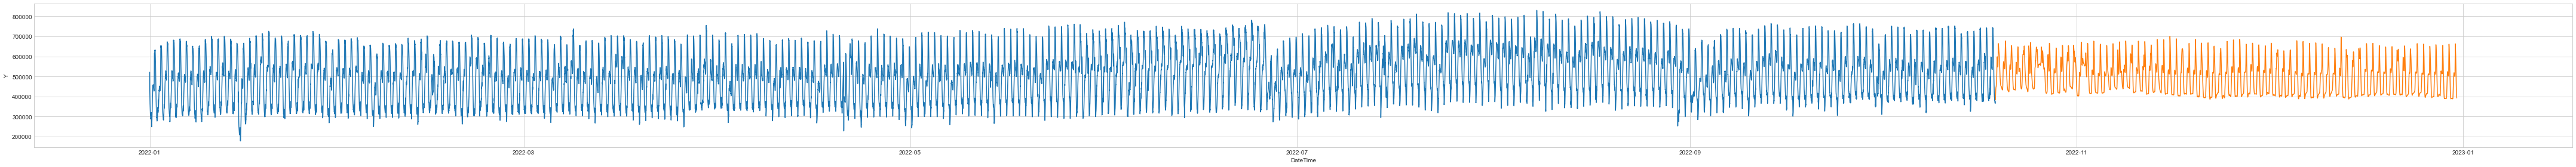

In [23]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(60, 4))
sns.lineplot(df['DateTime'], df['Y'])
sns.lineplot(test_df['DateTime'], test_df['Y'])

In [22]:
test_df.to_csv(r'D:/Documents/Materials/Jan29/result.csv')

In [12]:
result = pd.read_csv('result.csv')
hourly_Y=[]
hourly_Y.append((result.Y[0]+result.Y[1])/2)
for i in range(int((result.shape[0]-2)/6)):
    hourly_Y.append(np.mean(result.Y[i+2:i+8]))
output = pd.DataFrame(hourly_Y)
output.to_csv(r'D:/Documents/Materials/Jan29/result.csv')